<a href="https://colab.research.google.com/github/villafue/Capstone_1-_Predict_House_Prices/blob/master/House_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hello! This is my first Data Science Project. It is also my first Capstone project with Springboard. I'll focus on the business aspect. I created a scenario where I'm trying to convince the Ames company to hire me and hire a data science team, in other words, to convince them that Data Science is valuable for their business model. To that end, I will do my best to keep it simple, marketable, and executable for the company. 

Last, I am thankful for the plethora of notebooks that others were kind enough to share on Kaggle. I adapted many of their codes and processes in my notebook. I'll credit them here:

1. [Comprehensive Data Exploration with Python - Pedro Marcelino, Feb 2017](https://www.kaggle.com/pmarcelino/comprehensive-data-exploration-with-python)
  - He did amazing EDA and helped me to learn as he told a story throughout the process.

2. [Stacked Regressions: Top 4% on LeaderBoard - Serigne, July 2017](https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard)
  - I really liked his data cleaning and imputing process. He described the logic behind what he did, and he also cleaned both the train and test set together (as did others).

3. [House Price Calculation methods for beginners - Bsivavenu, 2018](https://www.kaggle.com/bsivavenu/house-price-calculation-methods-for-beginners)
  - I used parts of his EDA especially for visualizing SalesPrice.

4. [#1 House Prices Solution (top 1%) - Jesuscristo (Nanashi), 2019](https://www.kaggle.com/jesucristo/1-house-prices-solution-top-1?scriptVersionId=20214677)
  - I used parts of his EDA for more detailed analysis

5. [Comprehensive Feature Engineering Tutorial - Pavan Sanagapati, 30 August 2020 ](https://www.kaggle.com/pavansanagapati/comprehensive-feature-engineering-tutorial)
  - Although not related to this specific dataset, his notebook was a big help in explaining the feature engineering in other people's notebooks.

6. [Stacking House Prices - Walkthrough to Top 5% - Arun Godwin Patel, 2018](https://www.kaggle.com/agodwinp/stacking-house-prices-walkthrough-to-top-5)
  - Arun's EDA and walkthrough is inviting, digestible, and beautiful. I adapted his code especially for visualizing the features.

***

## Content

1. **[Import packages](#import_packages)**
2. **[Load data](#load_data)**
3. **[Data preparation](#data_preparation)**
    - 3.1 - [Remove outliers](#remove_outliers)
    - 3.2 - [Treat missing values](#treat_missing_values)   
4. **[Exploratory Data Analysis](#exploratory_data_analysis)**
    - 4.1 - [Correlation matrix](#correlation_matrix)
    - 4.2 - [Feature engineering](#feature_engineering)
        - 4.2.1 - [Polynomials](#polynomials)
        - 4.2.2 - [Interior](#interior)
        - 4.2.3 - [Architectural & Structural](#architectural_&_structural)
        - 4.2.4 - [Exterior](#exterior)
        - 4.2.5 - [Location](#location)
        - 4.2.6 - [Land](#land)
        - 4.2.7 - [Access](#access)
        - 4.2.8 - [Utilities](#utilities)
        - 4.2.9 - [Miscellaneous](#miscellaneous)
    - 4.3 - [Target variable](#target_variable)
    - 4.4 - [Treating skewed features](#treating_skewed_features)
5. **[Modeling](#modeling)**
    - 5.1 - [Preparation of datasets](#preparation_of_datasets)
    - 5.2 - [Training](#training)
    - 5.3 - [Optimisation](#optimisation)
    - 5.4 - [Stacking](#stacking)
    - 5.5 - [Ensemble](#ensemble)
    - 5.6 - [Submission](#submission)
6. **[Conclusion](#conclusion)**   

***

<a id='import_packages'></a>
# 1. 
## Import packages

In [213]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from IPython.display import display
from scipy.stats.stats import pearsonr
pd.set_option('display.notebook_repr_html', True)
# I want to see all the columns in my output.
pd.set_option('max_columns', 82)
%matplotlib inline
pd.options.display.max_rows = 100
mycols = ["#66c2ff", "#5cd6d6", "#00cc99", "#85e085", "#ffd966", "#ffb366", "#ffb3b3", "#dab3ff", "#c2c2d6"]
sns.set_palette(palette = mycols, n_colors = 4)

In [214]:
# This first set of packages include Pandas, for data manipulation, numpy for mathematical computation and matplotlib & seaborn, for visualisation.
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style='white', context='notebook', palette='deep')
print('Data Manipulation, Mathematical Computation and Visualisation packages imported!')

# Statistical packages used for transformations
from scipy import stats
from scipy.stats import skew, norm
from scipy.special import boxcox1p
from scipy.stats.stats import pearsonr
print('Statistical packages imported!')

# Metrics used for measuring the accuracy and performance of the models
#from sklearn import metrics
#from sklearn.metrics import mean_squared_error
print('Metrics packages imported!')

# Algorithms used for modeling
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.kernel_ridge import KernelRidge
import xgboost as xgb
print('Algorithm packages imported!')

# Pipeline and scaling preprocessing will be used for models that are sensitive
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
print('Pipeline and preprocessing packages imported!')

# Model selection packages used for sampling dataset and optimising parameters
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
print('Model selection packages imported!')

# Set visualisation colours
mycols = ["#66c2ff", "#5cd6d6", "#00cc99", "#85e085", "#ffd966", "#ffb366", "#ffb3b3", "#dab3ff", "#c2c2d6"]
sns.set_palette(palette = mycols, n_colors = 4)
print('My colours are ready! :)')

# To ignore annoying warning
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn #ignore annoying warning (from sklearn and seaborn)
warnings.filterwarnings("ignore", category=DeprecationWarning)
print('Deprecation warning will be ignored!')

Data Manipulation, Mathematical Computation and Visualisation packages imported!
Statistical packages imported!
Metrics packages imported!
Algorithm packages imported!
Pipeline and preprocessing packages imported!
Model selection packages imported!
My colours are ready! :)
Deprecation warning will be ignored!


The following code make's plots viewable in Colab's darkmode.

In [215]:
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use(['seaborn-whitegrid'])

I'll change my home directory because this is where I upload files, from my computer, into Colab.

In [216]:
# os.chdir('sample_data')

<a id='load_data'></a>
# 2. 
## Load data

- The Pandas package helps us work with our datasets. We start by reading the training and test datasets into DataFrames.
- We want to save the 'Id' columns from both datasets for later use when preparing the submission data.
- But we can drop them from the training and test datasets as they are redundant.

I import the train and test files directly from my Github. I also print out the head and shapes so can take a quick look at the data. 

In [217]:
url = 'https://raw.githubusercontent.com/villafue/Capstone_1-_Predict_House_Prices/master/Data/test.csv'
test = pd.read_csv(url)
url = 'https://raw.githubusercontent.com/villafue/Capstone_1-_Predict_House_Prices/master/Data/train.csv'
train = pd.read_csv(url)
print(test.shape, train.shape, '\n' * 2, 'Train has: ', train.shape[0], 'rows and ', train.shape[1], 'columns.', '\n', 
      'Test has: ', test.shape[0], 'rows and ', test.shape[1], 'columns.')
# This makes a little barrier between printed outputs.
print('\n', '=' * 136, '\n' * 2, 'Train Set:', '\n')
display(train.head())
print('\n', '=' * 136, '\n' * 2, 'Test Set:', '\n')
test.head()

(1459, 80) (1460, 81) 

 Train has:  1460 rows and  81 columns. 
 Test has:  1459 rows and  80 columns.


 Train Set: 



Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            



 Test Set: 



Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl        NAmes      Feedr   
1         Lvl    AllPub    Corner       Gtl        NAmes       Norm   
2         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
3         Lvl    AllPub    Inside       Gtl      Gilbert       Norm   
4         HLS    AllPub    Inside       Gtl      StoneBr       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     1Story            5            6       1961   
1       Norm     1Fam     1Story            6            6       1958   
2       Norm     1Fam     2Story            5            5       1997   
3       Norm     1Fam     2Story            6            6       1998   
4       Norm   TwnhsE     1Story            8            5       1992   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          1961     Gable  CompShg     VinylSd     VinylSd       None   
1          1958       Hip  CompShg     Wd Sdng     Wd Sdng    BrkFace   
2          1998     Gable  CompShg     VinylSd     VinylSd       None   
3          1998     Gable  CompShg     VinylSd     VinylSd    BrkFace   
4          1992     Gable  CompShg     HdBoard     HdBoard       None   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0         0.0        TA        TA     CBlock       TA       TA           No   
1       108.0        TA        TA     CBlock       TA       TA           No   
2         0.0        TA        TA      PConc       Gd       TA           No   
3        20.0        TA        TA      PConc       TA       TA           No   
4         0.0        Gd        TA      PConc       Gd       TA           No   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          Rec       468.0          LwQ       144.0      270.0        882.0   
1          ALQ       923.0          Unf         0.0      406.0       1329.0   
2          GLQ       791.0          Unf         0.0      137.0        928.0   
3          GLQ       602.0          Unf         0.0      324.0        926.0   
4          ALQ       263.0          Unf         0.0     1017.0       1280.0   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        TA          Y      SBrkr       896         0             0   
1    GasA        TA          Y      SBrkr      1329         0             0   
2    GasA        Gd          Y      SBrkr       928       701             0   
3    GasA        Ex          Y      SBrkr       926       678             0   
4    GasA        Ex          Y      SBrkr      1280         0             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0        896           0.0           0.0         1         0             2   
1       1329           0.0           0.0         1         1             3   
2       1629           0.0           0.0         2         1             3   
3       1604           0.0           0.0         2         1             3   
4       1280           0.0           0.0         2         0             2   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          TA             5        Typ           0         NaN   
1             1          Gd             6        Typ           0         NaN   
2             1          TA             6        Typ           1          TA   
3             1          Gd  

I want to see the column names. Train and test have the column names except the latter does not have the price column.

In [218]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

I'm going to save the "ID" columns and then drop them from the dataframes as they're unnecessary for modeling. 

Here is a helpful link for ".format" and strings. [Python Format Function](https://www.geeksforgeeks.org/python-format-function/#:~:text=Diamond%20star%20pattern-,Python%20%7C%20format()%20function,a%20string%20through%20positional%20formatting.)

In [219]:
train_ID = train['Id']
test_ID = test['Id']

train.drop("Id", axis = 1, inplace = True)
test.drop("Id", axis = 1, inplace = True)

print("The train data size after dropping Id feature is : {} ".format(train.shape)) 
print("The test data size after dropping Id feature is : {} ".format(test.shape))


The train data size after dropping Id feature is : (1460, 80) 
The test data size after dropping Id feature is : (1459, 79) 


***

<a id='data_preparation'></a>
# 3. 
## Data preparation

<a id='remove_outliers'></a>
### 3.1 - Remove outliers

Outliers

The author of the Ames Housing Dataset recommends removing certian observations. These are 'GrLivArea' over over 4000. [Ames Housing Article](http://jse.amstat.org/v19n3/decock.pdf)

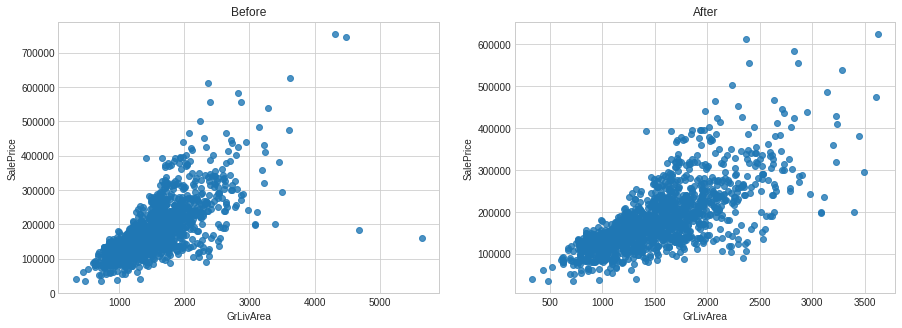

In [220]:
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
g = sns.regplot(x=train['GrLivArea'], y=train['SalePrice'], fit_reg=False).set_title("Before")

# Delete outliers
plt.subplot(1, 2, 2)                                                                                
train = train.drop(train[(train['GrLivArea']>4000)].index)
g = sns.regplot(x=train['GrLivArea'], y=train['SalePrice'], fit_reg=False).set_title("After")

I will concatenate the train and test sets into one dataframe so I can study and clean it. 

In [221]:
# I'm saving the shape of the train and test set.
ntrain = train.shape[0]
ntest = test.shape[0]
# I guess this is because I'm going to use this for y-train later
y_train = train.SalePrice.values

all = pd.concat((train, test)).reset_index(drop=True)
all.drop(['SalePrice'], axis=1, inplace=True)
print("The full data size is : {}".format(all.shape))

The full data size is : (2915, 79)


I'm going to transform some numerical variables into strings because they are really categorical variables. If I keep them numeric, then the model will treat them as continuous variables.

In [222]:
# MSSubClass: Identifies the type of dwelling involved in the sale.
all['MSSubClass'] = all['MSSubClass'].apply(str)


# OverallCond: Rates the overall condition of the house
# all['OverallCond'] = all['OverallCond'].astype(str)


# Year (YYYY) and month (MM) sold are transformed into categorical features.
all['YrSold'] = all['YrSold'].astype(str)
all['MoSold'] = all['MoSold'].astype(str)

# GarageYrBlt: Year garage was built
#all['GarageYrBlt'] = all['GarageYrBlt'].astype(str)



I want to see the count of non-null values and if the columns are numeric or categorical.

In [223]:
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915 entries, 0 to 2914
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2915 non-null   object 
 1   MSZoning       2911 non-null   object 
 2   LotFrontage    2429 non-null   float64
 3   LotArea        2915 non-null   int64  
 4   Street         2915 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2915 non-null   object 
 7   LandContour    2915 non-null   object 
 8   Utilities      2913 non-null   object 
 9   LotConfig      2915 non-null   object 
 10  LandSlope      2915 non-null   object 
 11  Neighborhood   2915 non-null   object 
 12  Condition1     2915 non-null   object 
 13  Condition2     2915 non-null   object 
 14  BldgType       2915 non-null   object 
 15  HouseStyle     2915 non-null   object 
 16  OverallQual    2915 non-null   int64  
 17  OverallCond    2915 non-null   int64  
 18  YearBuil

I want to see which columns have categorical features (strings).

In [224]:
all_object = [f for f in all.columns if all.dtypes[f] == 'object']
all_object = pd.DataFrame(all_object)
all_object.rename(columns={0: 'Object_Type'}, inplace=True)
all_object

Object_Type
0      MSSubClass
1        MSZoning
2          Street
3           Alley
4        LotShape
5     LandContour
6       Utilities
7       LotConfig
8       LandSlope
9    Neighborhood
10     Condition1
11     Condition2
12       BldgType
13     HouseStyle
14      RoofStyle
15       RoofMatl
16    Exterior1st
17    Exterior2nd
18     MasVnrType
19      ExterQual
20      ExterCond
21     Foundation
22       BsmtQual
23       BsmtCond
24   BsmtExposure
25   BsmtFinType1
26   BsmtFinType2
27        Heating
28      HeatingQC
29     CentralAir
30     Electrical
31    KitchenQual
32     Functional
33    FireplaceQu
34     GarageType
35   GarageFinish
36     GarageQual
37     GarageCond
38     PavedDrive
39         PoolQC
40          Fence
41    MiscFeature
42         MoSold
43         YrSold
44       SaleType
45  SaleCondition

I want to see which columns are numerical (ints and floats).

In [225]:
all_numeric = [f for f in all.columns if all.dtypes[f] != 'object']
all_numeric = pd.DataFrame(all_numeric)
all_numeric.drop([0], inplace=True)
all_numeric.rename(columns={0: 'Numeric_Type'}, inplace=True)
all_numeric.reset_index(inplace=True)
all_numeric.drop(columns='index', inplace=True)
all_numeric

Numeric_Type
0         LotArea
1     OverallQual
2     OverallCond
3       YearBuilt
4    YearRemodAdd
5      MasVnrArea
6      BsmtFinSF1
7      BsmtFinSF2
8       BsmtUnfSF
9     TotalBsmtSF
10       1stFlrSF
11       2ndFlrSF
12   LowQualFinSF
13      GrLivArea
14   BsmtFullBath
15   BsmtHalfBath
16       FullBath
17       HalfBath
18   BedroomAbvGr
19   KitchenAbvGr
20   TotRmsAbvGrd
21     Fireplaces
22    GarageYrBlt
23     GarageCars
24     GarageArea
25     WoodDeckSF
26    OpenPorchSF
27  EnclosedPorch
28      3SsnPorch
29    ScreenPorch
30       PoolArea
31        MiscVal

I want to see how many unique values exist in my dataframe.

In [226]:
all.nunique().sort_values(ascending=False)

LotArea          1947
GrLivArea        1288
BsmtUnfSF        1134
1stFlrSF         1079
TotalBsmtSF      1054
BsmtFinSF1        988
2ndFlrSF          631
GarageArea        600
MasVnrArea        441
WoodDeckSF        379
BsmtFinSF2        272
OpenPorchSF       250
EnclosedPorch     183
LotFrontage       128
ScreenPorch       121
YearBuilt         118
GarageYrBlt       103
YearRemodAdd       61
MiscVal            38
LowQualFinSF       36
3SsnPorch          31
Neighborhood       25
Exterior2nd        16
MSSubClass         16
Exterior1st        15
TotRmsAbvGrd       14
PoolArea           12
MoSold             12
OverallQual        10
OverallCond         9
Condition1          9
SaleType            9
BedroomAbvGr        8
Condition2          8
HouseStyle          8
RoofMatl            7
Functional          7
Foundation          6
BsmtFinType1        6
RoofStyle           6
BsmtFinType2        6
SaleCondition       6
Heating             6
GarageCars          6
GarageType          6
Fireplaces

I want to see the percent of unique values per column.

In [227]:
all.nunique().sort_values(ascending=False)/all.shape[0] * 100

LotArea          66.792453
GrLivArea        44.185249
BsmtUnfSF        38.902230
1stFlrSF         37.015437
TotalBsmtSF      36.157804
BsmtFinSF1       33.893654
2ndFlrSF         21.646655
GarageArea       20.583190
MasVnrArea       15.128645
WoodDeckSF       13.001715
BsmtFinSF2        9.331046
OpenPorchSF       8.576329
EnclosedPorch     6.277873
LotFrontage       4.391081
ScreenPorch       4.150943
YearBuilt         4.048027
GarageYrBlt       3.533448
YearRemodAdd      2.092624
MiscVal           1.303602
LowQualFinSF      1.234991
3SsnPorch         1.063465
Neighborhood      0.857633
Exterior2nd       0.548885
MSSubClass        0.548885
Exterior1st       0.514580
TotRmsAbvGrd      0.480274
PoolArea          0.411664
MoSold            0.411664
OverallQual       0.343053
OverallCond       0.308748
Condition1        0.308748
SaleType          0.308748
BedroomAbvGr      0.274443
Condition2        0.274443
HouseStyle        0.274443
RoofMatl          0.240137
Functional        0.240137
F

I want to see the summary statistics of each numeric column. Some of these columns are categorical and coded as numerical, but I'll deal with them later.

In [228]:
all.describe().T

count          mean          std     min     25%     50%  \
LotFrontage    2429.0     69.128860    22.715440    21.0    59.0    68.0   
LotArea        2915.0  10133.648714  7806.198515  1300.0  7474.0  9450.0   
OverallQual    2915.0      6.083705     1.403444     1.0     5.0     6.0   
OverallCond    2915.0      5.565009     1.113718     1.0     5.0     5.0   
YearBuilt      2915.0   1971.271698    30.290998  1872.0  1953.0  1973.0   
YearRemodAdd   2915.0   1984.240480    20.897341  1950.0  1965.0  1993.0   
MasVnrArea     2892.0    101.399378   177.452915     0.0     0.0     0.0   
BsmtFinSF1     2914.0    438.098147   442.872077     0.0     0.0   368.0   
BsmtFinSF2     2914.0     49.650309   169.311762     0.0     0.0     0.0   
BsmtUnfSF      2914.0    560.638298   439.704419     0.0   220.0   467.0   
TotalBsmtSF    2914.0   1048.386754   427.746555     0.0   793.0   988.0   
1stFlrSF       2915.0   1156.821269   383.956821   334.0   876.0  1082.0   
2ndFlrSF       2915.0    334.741338   426.116353     0.0     0.0     0.0   
LowQualFinSF   2915.0      4.700858    46.428331     0.0     0.0     0.0   
GrLivArea      2915.0   1496.263465   491.239383   334.0  1125.5  1442.0   
BsmtFullBath   2913.0      0.429111     0.524015     0.0     0.0     0.0   
BsmtHalfBath   2913.0      0.061105     0.245231     0.0     0.0     0.0   
FullBath       2915.0      1.566381     0.551377     0.0     1.0     2.0   
HalfBath       2915.0      0.379417     0.502692     0.0     0.0     0.0   
BedroomAbvGr   2915.0      2.859348     0.822707     0.0     2.0     3.0   
KitchenAbvGr   2915.0      1.044597     0.214603     0.0     1.0     1.0   
TotRmsAbvGrd   2915.0      6.445626     1.562047     2.0     5.0     6.0   
Fireplaces     2915.0      0.595197     0.643945     0.0     0.0     1.0   
GarageYrBlt    2756.0   1978.079826    25.576507  1895.0  1960.0  1979.0   
GarageCars     2914.0      1.765271     0.761105     0.0     1.0     2.0   
GarageArea     2914.0    472.169183   214.498199     0.0   320.0   479.5   
WoodDeckSF     2915.0     93.503945   126.455095     0.0     0.0     0.0   
OpenPorchSF    2915.0     47.268611    67.139563     0.0     0.0    26.0   
EnclosedPorch  2915.0     23.130017    64.282620     0.0     0.0     0.0   
3SsnPorch      2915.0      2.605832    25.205266     0.0     0.0     0.0   
ScreenPorch    2915.0     16.084391    56.219760     0.0     0.0     0.0   
PoolArea       2915.0      1.899828    33.020598     0.0     0.0     0.0   
MiscVal        2915.0     50.895712   567.788382     0.0     0.0     0.0   

                    75%       max  
LotFrontage       80.00     313.0  
LotArea        11554.50  215245.0  
OverallQual        7.00      10.0  
OverallCond        6.00       9.0  
YearBuilt       2001.00    2010.0  
YearRemodAdd    2004.00    2010.0  
MasVnrArea       164.00    1600.0  
BsmtFinSF1       732.00    4010.0  
BsmtFinSF2         0.00    1526.0  
BsmtUnfSF        803.75    2336.0  
TotalBsmtSF     1300.00    5095.0  
1stFlrSF        1383.50    5095.0  
2ndFlrSF         703.50    1862.0  
LowQualFinSF       0.00    1064.0  
GrLivArea       1742.50    5095.0  
BsmtFullBath       1.00       3.0  
BsmtHalfBath       0.00       2.0  
FullBath           2.00       4.0  
HalfBath           1.00       2.0  
BedroomAbvGr       3.00       8.0  
KitchenAbvGr       1.00       3.0  
TotRmsAbvGrd       7.00      15.0  
Fireplaces         1.00       4.0  
GarageYrBlt     2002.00    2207.0  
GarageCars         2.00       5.0  
GarageArea       576.00    1488.0  
WoodDeckSF       168.00    1424.0  
OpenPorchSF       70.00     742.0  
EnclosedPorch      0.00    1012.0  
3SsnPorch          0.00     508.0  
ScreenPorch        0.00     576.0  
PoolArea           0.00     800.0  
MiscVal            0.00   17000.0

***

<a id='treat_missing_values'></a>
### 3.2 - Treat missing values

I want to visualize the missing values in my data.

Text(0.5, 1.0, 'Percent missing data by feature')

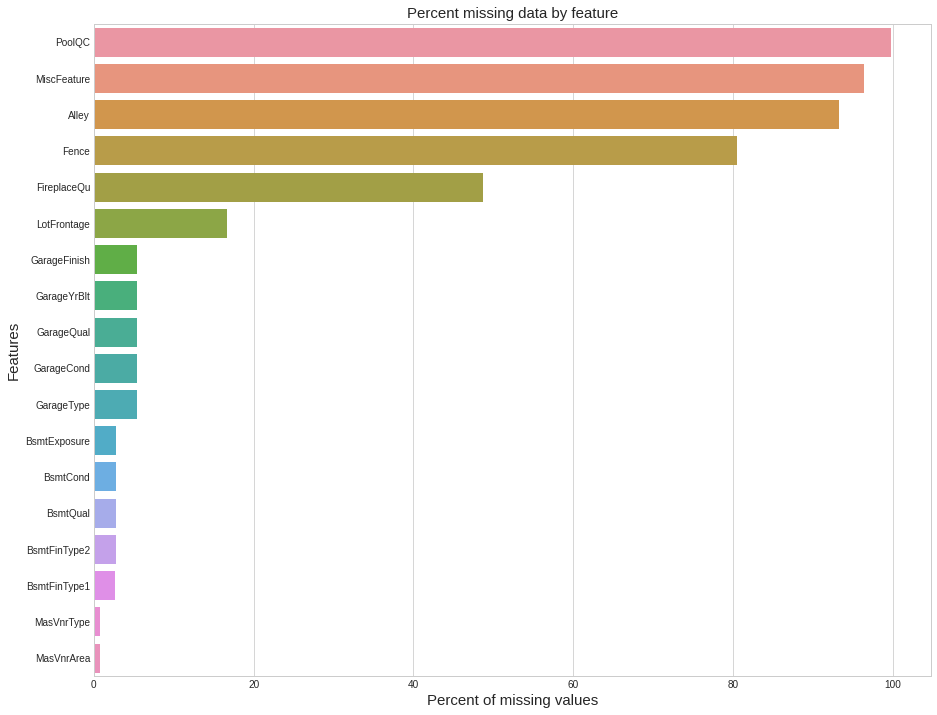

In [229]:
all_na = (all.isnull().sum() / len(all)) * 100
all_na = all_na.drop(all_na[all_na == 0].index).sort_values(ascending=False)[:18]
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks()
sns.barplot(x=all_na, y=all_na.index, orient="h")
plt.xlabel('Percent of missing values', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

I want a more detailed look at my missing values.

In [230]:
total = all.isnull().sum().sort_values(ascending=False)
percent = (all.isnull().sum()/all.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Percent']>0]

Total   Percent
PoolQC         2907  0.997256
MiscFeature    2810  0.963979
Alley          2717  0.932075
Fence          2345  0.804460
FireplaceQu    1420  0.487136
LotFrontage     486  0.166724
GarageCond      159  0.054545
GarageQual      159  0.054545
GarageYrBlt     159  0.054545
GarageFinish    159  0.054545
GarageType      157  0.053859
BsmtCond         82  0.028130
BsmtExposure     82  0.028130
BsmtQual         81  0.027787
BsmtFinType2     80  0.027444
BsmtFinType1     79  0.027101
MasVnrType       24  0.008233
MasVnrArea       23  0.007890
MSZoning          4  0.001372
BsmtHalfBath      2  0.000686
Utilities         2  0.000686
Functional        2  0.000686
BsmtFullBath      2  0.000686
BsmtFinSF2        1  0.000343
BsmtFinSF1        1  0.000343
Exterior2nd       1  0.000343
BsmtUnfSF         1  0.000343
TotalBsmtSF       1  0.000343
Exterior1st       1  0.000343
SaleType          1  0.000343
Electrical        1  0.000343
KitchenQual       1  0.000343
GarageArea        1  0.000343
GarageCars        1  0.000343

The following cells are imputations of the missing values. 
When a variable does not have it's respective feature, I used "None" value  for categorical features and "0" for numerical features. This is because N/A does not work for some computations and models.
"Data Description Text file" is abbreviated to DDTF. 

**PoolQC**: DDTF says NA means "No Pool". This makes sense as most homes probably do not have pools.

In [231]:
all["PoolQC"] = all["PoolQC"].fillna("None")

**MiscFeature**: DDTF says NA means "no misc feature". 

In [232]:
all["MiscFeature"] = all["MiscFeature"].fillna("None")

**Alley**: DDTF says NA means "no alley access".

In [233]:
all["Alley"] = all["Alley"].fillna("None")

**Fence**: DDTF data description says NA means "no fence".

In [234]:
all["Fence"] = all["Fence"].fillna("None")

**FireplaceQu**: DDTF says NA means "no fireplace".

In [235]:
all["FireplaceQu"] = all["FireplaceQu"].fillna("None")

**LotFrontage**: I imputed using the median as the area of the connecting street, to the property, should be similar to other homes in it's neighborhood. 

In [236]:
all["LotFrontage"] = all.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

**GarageType, GarageFinish, GarageQual, GarageCond**: Replaced missing data with None as NA means "no garage".

In [237]:
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    all[col] = all[col].fillna('None')

**GarageYrBlt, GarageArea and GarageCars**: I replace the missing data with 0 because no garage = no cars. 

HOWEVER, I will keep GarageYrBlt in mind as imputing with a year of 0 does not make sense.

In [238]:
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    all[col] = all[col].fillna(0)

**BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath**: missing values are likely 0 for having no basement.


In [239]:
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    all[col] = all[col].fillna(0)

**BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 and BsmtFinType2**: For all these categorical basement-related features, NaN means no basement.

In [240]:
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    all[col] = all[col].fillna('None')

**MasVnrArea and MasVnrType**: I'll fill in None for no masonry veneer and 0 for the area. However, I still disagree with this.

In [241]:
all["MasVnrType"] = all["MasVnrType"].fillna("None")
all["MasVnrArea"] = all["MasVnrArea"].fillna(0)

**MSZoning (The general zoning classification)**: 'RL' is by far the most common value. So we can fill in missing values with 'RL'

In [242]:
all['MSZoning'] = all['MSZoning'].fillna(all['MSZoning'].mode()[0])

**Functional**: DDTF says NA means typical (Typ) which is also the mode. Thus, if it's missing values it is most probably 'Typ.'

In [243]:
all["Functional"] = all["Functional"].fillna("Typ")

**Electrical**: Electrical only has one NA value so I imputed using the Mode.

In [244]:
all['Electrical'] = all['Electrical'].fillna(all['Electrical'].mode()[0])

**KitchenQual**: It has only one NA value, and like Electrical, we set it to the mode which is TA for Typical/Average.

In [245]:
all['KitchenQual'] = all['KitchenQual'].fillna(all['KitchenQual'].mode()[0])

**Exterior1st and Exterior2nd**: Both Exterior 1 and 2 only have 1 missing value and I will just impute it using the mode.

In [246]:
all['Exterior1st'] = all['Exterior1st'].fillna(all['Exterior1st'].mode()[0])
all['Exterior2nd'] = all['Exterior2nd'].fillna(all['Exterior2nd'].mode()[0])

**SaleType**: I will fill using it's most common value which is WD for Warranty Deed - Conventional

In [247]:
all['SaleType'] = all['SaleType'].fillna(all['SaleType'].mode()[0])

**MSSubClass**: This identifies the type of dwelling involved in the sale, and I will impute using the mode. 

In [248]:
all['MSSubClass'] = all['MSSubClass'].fillna(all['MSSubClass'].mode()[0])

**Utilities**: For this categorical feature all records are "AllPub", except for one "NoSeWa" and 2 NA. However, because the Test dataset has only 1 value for this column, and it is constant, it holds no predictive power. I'll drop this column.

In [249]:
# From inspection, we can remove Utilities
all = all.drop(['Utilities'], axis=1)

all_na = all.isnull().sum()
print("Features with missing values: ", len(all_na.drop(all_na[all_na == 0].index)))

Features with missing values:  0


Are there any remaining missing values?

In [250]:
total = all.isnull().sum().sort_values(ascending=False)
percent = (all.isnull().sum()/all.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Percent']>0]
all_data_na = all.isnull().sum()
print("Features with missing values: ", len(all_data_na.drop(all_data_na[all_data_na == 0].index)))

Features with missing values:  0


Are there any duplicate rows?

In [251]:
duplicateRowsDF = all[all.duplicated()]
duplicateRowsDF

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
2709        160       FV         24.0     2544   Pave  Pave      Reg   
2861        160       RM         24.0     2522   Pave  None      Reg   

     LandContour LotConfig LandSlope Neighborhood Condition1 Condition2  \
2709         Lvl    Inside       Gtl      Somerst       Norm       Norm   
2861         Lvl    Inside       Gtl      Edwards       Norm       Norm   

     BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
2709    Twnhs     2Story            7            5       2005          2005   
2861    Twnhs     2Story            7            5       2004          2004   

     RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea  \
2709     Gable  CompShg     MetalSd     MetalSd       None         0.0   
2861     Gable  CompShg     VinylSd     VinylSd      Stone        50.0   

     ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
2709        Gd        TA      PConc       Gd       TA           No   
2861        Gd        TA      PConc       Gd       TA           No   

     BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  \
2709          Unf         0.0          Unf         0.0      600.0   
2861          Unf         0.0          Unf         0.0      970.0   

      TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
2709        600.0    GasA        Ex          Y      SBrkr       520       623   
2861        970.0    GasA        Ex          Y      SBrkr       970       739   

      LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
2709            80       1223           0.0           0.0         2         1   
2861             0       1709           0.0           0.0         2         0   

      BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
2709             2             1          Gd             4        Typ   
2861             3             1          Gd             7       Maj1   

      Fireplaces FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  \
2709           0        None     Detchd       2005.0          RFn         2.0   
2861           0        None     Detchd       2004.0          Unf         2.0   

      GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  \
2709       480.0         TA         TA          Y           0          166   
2861       380.0         TA         TA          Y           0           40   

      EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence  \
2709              0          0            0         0   None  None   
2861              0          0            0         0   None  None   

     MiscFeature  MiscVal MoSold YrSold SaleType SaleCondition  
2709        None        0      7   2006       WD        Normal  
2861        None        0      5   2006       WD        Normal

There are no duplicate rows. 

***

<a id='exploratory_data_analysis'></a>
# 4. 
## Exploratory Data Analysis

<a id='correlation_matrix'></a>
### 4.1 - Correlation matrix

Sale Price is our target variable. I want to see the distribution.

I want to see a general overview of the correlated features.

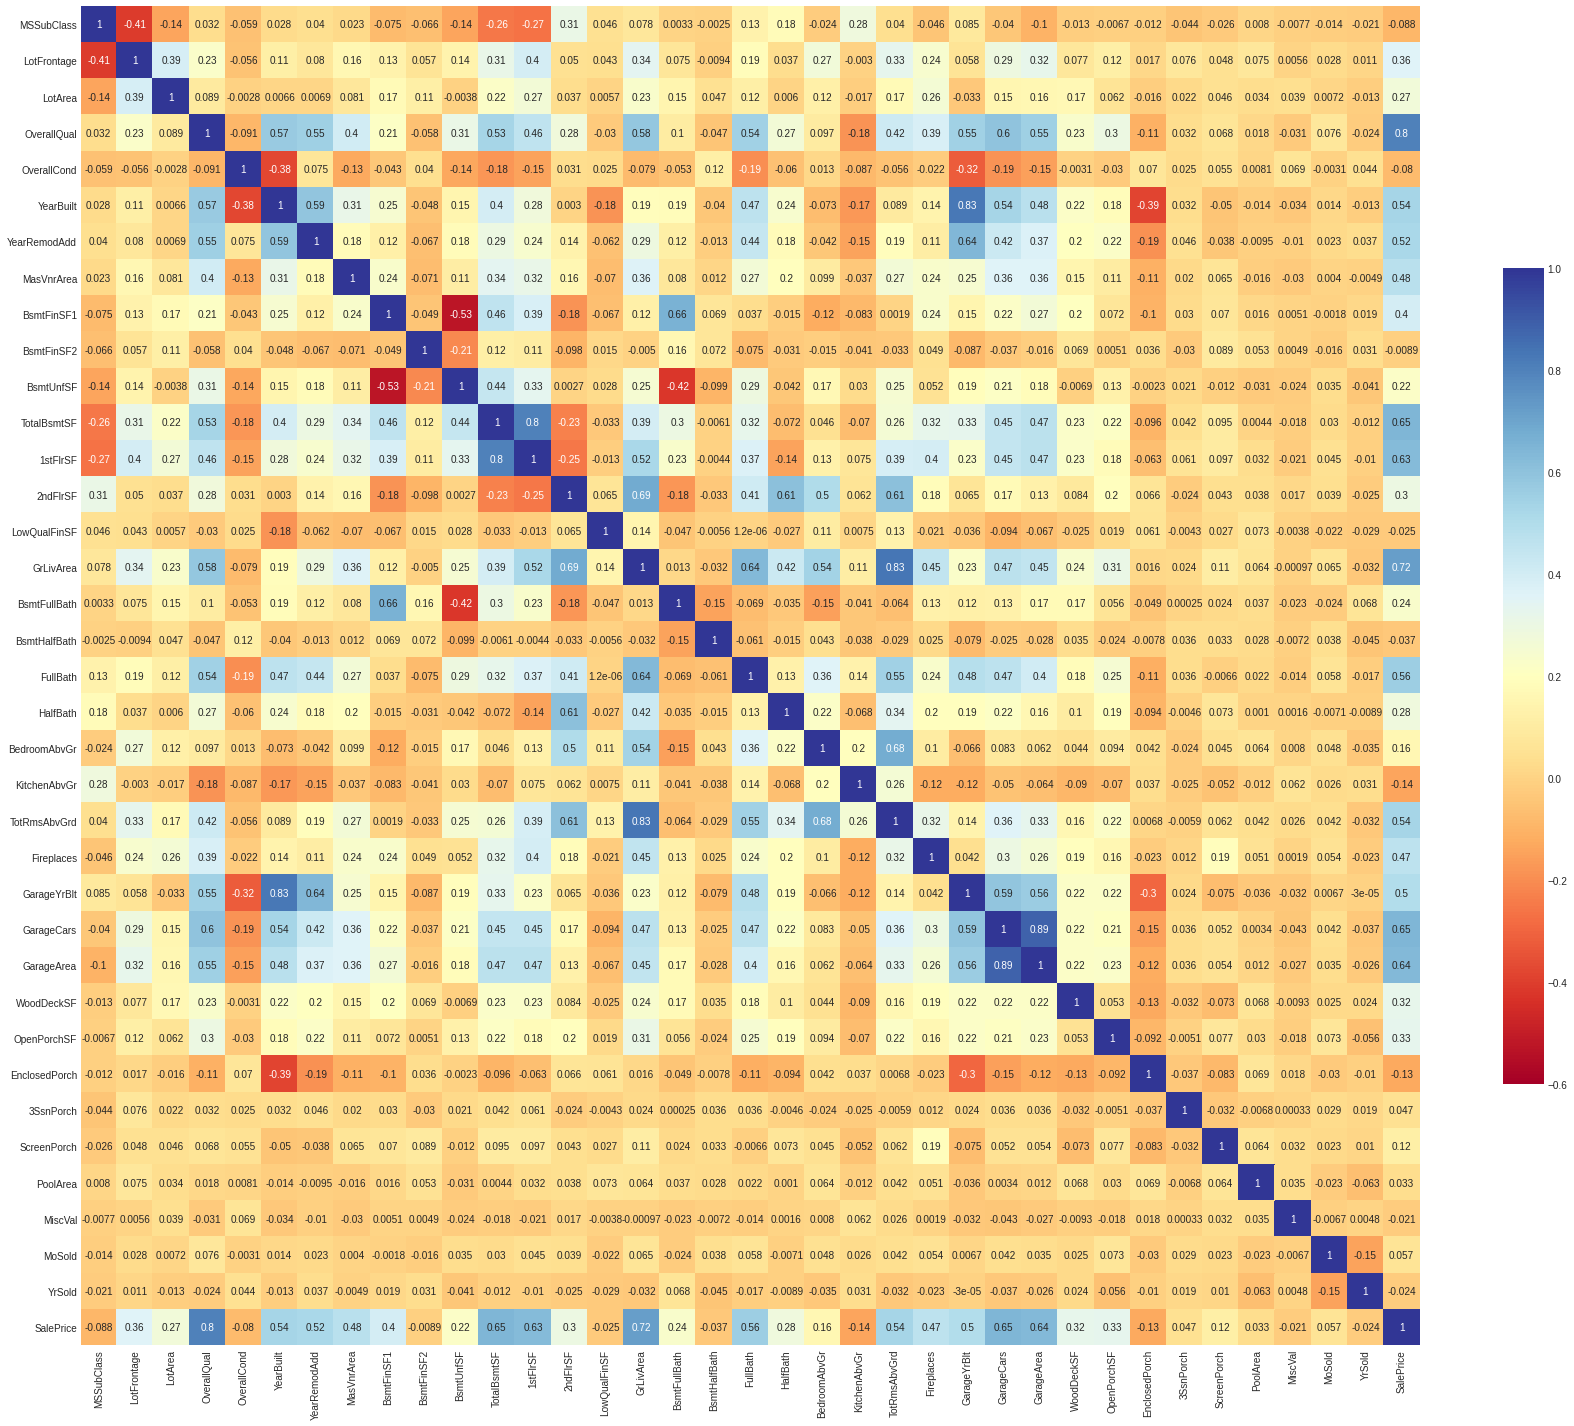

In [252]:
corr = train.corr()
plt.subplots(figsize=(30, 30))
cmap = sns.diverging_palette(150, 250, as_cmap=True)
sns.heatmap(corr, cmap="RdYlBu", vmax=1, vmin=-0.6, center=0.2, square=True, linewidths=0, cbar_kws={"shrink": .5}, annot = True);

In [253]:
#correlation matrix
# corrmat = train.corr()
# f, ax = plt.subplots(figsize=(25, 15))
# sns.heatmap(corrmat, vmax=.8, annot=True);

Generally speaking, a Pearson Correlation Coefficient of .5 is moderately positive. I'll filter the features by that metric.
![](http://intranet.tdmu.edu.ua/data/kafedra/internal/distance/classes_stud/english/1course/Medical%20statistics/08.%20Types%20of%20correlation.files/image013.gif)

[Text(0, 0.5, 'OverallQual'),
 Text(0, 1.5, 'YearBuilt'),
 Text(0, 2.5, 'YearRemodAdd'),
 Text(0, 3.5, 'TotalBsmtSF'),
 Text(0, 4.5, '1stFlrSF'),
 Text(0, 5.5, 'GrLivArea'),
 Text(0, 6.5, 'FullBath'),
 Text(0, 7.5, 'TotRmsAbvGrd'),
 Text(0, 8.5, 'GarageCars'),
 Text(0, 9.5, 'GarageArea'),
 Text(0, 10.5, 'SalePrice')]

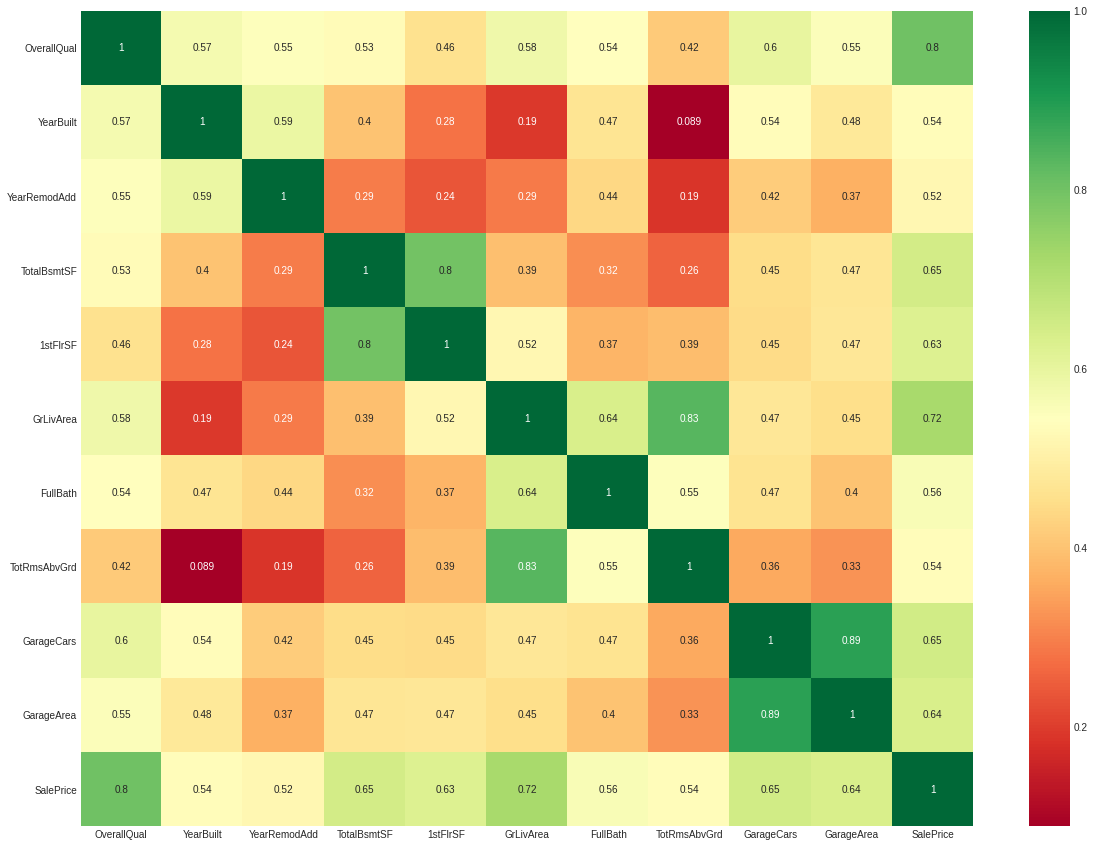

In [254]:
# most correlated features
corrmat = train.corr()
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
plt.figure(figsize=(20,15))
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")
g.set_yticklabels(g.get_yticklabels(), rotation=360)

***

<a id='feature_engineering'></a>
### 4.2 - Feature engineering

This section is quite lengthy, so I have added hyperlinks to each subsection below in case you want to skip through...

- 4.2.1 - [Polynomials](#polynomials)
- 4.2.2 - [Interior](#interior)
- 4.2.3 - [Architectural & Structural](#architectural_&_structural)
- 4.2.4 - [Exterior](#exterior)
- 4.2.5 - [Location](#location)
- 4.2.6 - [Land](#land)
- 4.2.7 - [Access](#access)
- 4.2.8 - [Utilities](#utilities)
- 4.2.9 - [Miscellaneous](#miscellaneous)

<a id='polynomials'></a>
#### 4.2.1 - Polynomials

The most common relationship we may think of between two variables, would be a straight line or a linear relationship. What this means is that if we increase the predictor by 1 unit, the response always increases by X units. However, not all data has a linear relationship and therefore it may be necessary for your model to fit the more complex relationships in the data. 

But how do you fit a model to data with complex relationships, unexplainable by a linear function? There are a variety of curve-fitting methods you can choose from to help you with this.

- The most common way to fit curves to the data is to include polynomial terms, such as squared or cubed predictors.
- Typically, you choose the model order by the number of bends you need in your line. Each increase in the exponent produces one more bend in the curved fitted line. It’s very rare to use more than a cubic term.

Using the correlation matrix, the top influencing factors that I will use to create polynomials are:
1. **OverallQual**
2. **GrLivArea**
3. **GarageCars**
4. **GarageArea**
5. **TotalBsmtSF**
6. **1stFlrSF**
7. **FullBath**
8. **TotRmsAbvGrd**
9. **YearBuilt**
10. **YearRemodAdd**


In [255]:
# Quadratic
all["OverallQual-2"] = all["OverallQual"] ** 2
all["GrLivArea-2"] = all["GrLivArea"] ** 2
all["GarageCars-2"] = all["GarageCars"] ** 2
all["GarageArea-2"] = all["GarageArea"] ** 2
all["TotalBsmtSF-2"] = all["TotalBsmtSF"] ** 2
all["1stFlrSF-2"] = all["1stFlrSF"] ** 2
all["FullBath-2"] = all["FullBath"] ** 2
all["TotRmsAbvGrd-2"] = all["TotRmsAbvGrd"] ** 2
all["YearBuilt-2"] = all["YearBuilt"] ** 2
all["YearRemodAdd-2"] = all["YearRemodAdd"] ** 2
print("Quadratics done!...")

# Cubic
all["OverallQual-3"] = all["OverallQual"] ** 3
all["GrLivArea-3"] = all["GrLivArea"] ** 3
all["GarageCars-3"] = all["GarageCars"] ** 3
all["GarageArea-3"] = all["GarageArea"] ** 3
all["TotalBsmtSF-3"] = all["TotalBsmtSF"] ** 3
all["1stFlrSF-3"] = all["1stFlrSF"] ** 3
all["FullBath-3"] = all["FullBath"] ** 3
all["TotRmsAbvGrd-3"] = all["TotRmsAbvGrd"] ** 3
all["YearBuilt-3"] = all["YearBuilt"] ** 3
all["YearRemodAdd-3"] = all["YearRemodAdd"] ** 3
print("Cubics done!...")

# Square Root
all["OverallQual-Sq"] = np.sqrt(all["OverallQual"])
all["GrLivArea-Sq"] = np.sqrt(all["GrLivArea"])
all["GarageCars-Sq"] = np.sqrt(all["GarageCars"])
all["GarageArea-Sq"] = np.sqrt(all["GarageArea"])
all["TotalBsmtSF-Sq"] = np.sqrt(all["TotalBsmtSF"])
all["1stFlrSF-Sq"] = np.sqrt(all["1stFlrSF"])
all["FullBath-Sq"] = np.sqrt(all["FullBath"])
all["TotRmsAbvGrd-Sq"] = np.sqrt(all["TotRmsAbvGrd"])
all["YearBuilt-Sq"] = np.sqrt(all["YearBuilt"])
all["YearRemodAdd-Sq"] = np.sqrt(all["YearRemodAdd"])
print("Roots done!...")
print('\n', '-' * 136)
print(all.shape)

Quadratics done!...
Cubics done!...
Roots done!...

 ----------------------------------------------------------------------------------------------------------------------------------------
(2915, 108)


<a id='interior'></a>
#### 4.2.2 - Interior

***BsmtQual***

- Evaluates the height of the basement.
       Ex	Excellent (100+ inches)	
       Gd	Good (90-99 inches)
       TA	Typical (80-89 inches)
       Fa	Fair (70-79 inches)
       Po	Poor (<70 inches)
       NA	No Basement

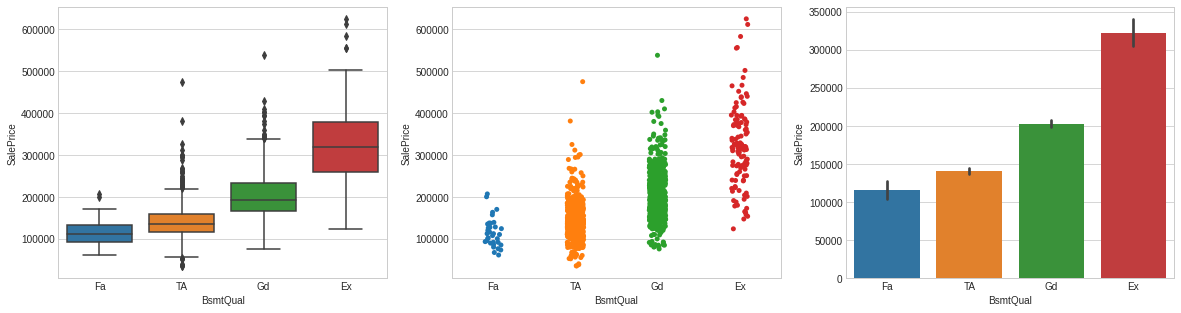

In [256]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BsmtQual", y="SalePrice", data=train, order=['Fa', 'TA', 'Gd', 'Ex']);

plt.subplot(1, 3, 2)
sns.stripplot(x="BsmtQual", y="SalePrice", data=train, size = 5, jitter = True, order=['Fa', 'TA', 'Gd', 'Ex']);

plt.subplot(1, 3, 3)
sns.barplot(x="BsmtQual", y="SalePrice", data=train, order=['Fa', 'TA', 'Gd', 'Ex']);

SalePrice is clearly affected by BsmtQual with higher quality commanding a higher price. Since this feature is ordinal, I'll encode it myself.

In [257]:
all['BsmtQual'] = all['BsmtQual'].map({"None":0, "Fa":1, "TA":2, "Gd":3, "Ex":4})
print(all.shape)
print('\n', '-' * 136)
all['BsmtQual'].unique()

(2915, 108)

 ----------------------------------------------------------------------------------------------------------------------------------------


array([3, 2, 4, 0, 1])

***BsmtCond***
- Evaluates the general condition of the basement.
       Ex	Excellent
       Gd	Good
       TA	Typical - slight dampness allowed
       Fa	Fair - dampness or some cracking or settling
       Po	Poor - Severe cracking, settling, or wetness
       NA	No Basement

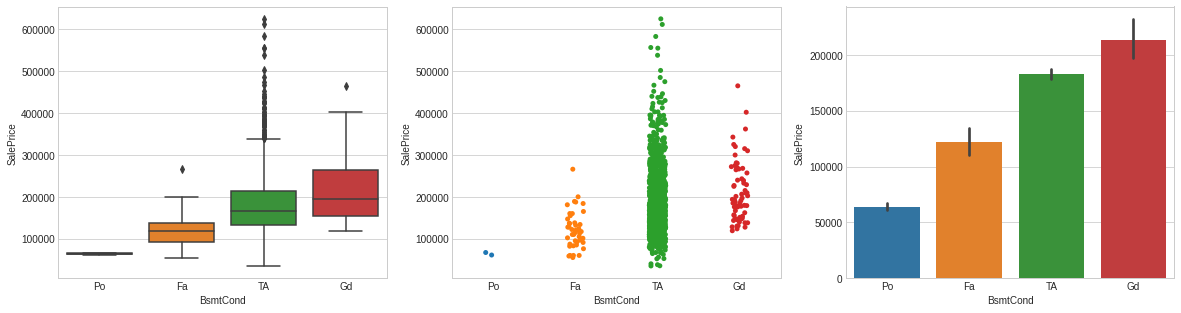

In [258]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BsmtCond", y="SalePrice", data=train, order=['Po', 'Fa', 'TA', 'Gd']);

plt.subplot(1, 3, 2)
sns.stripplot(x="BsmtCond", y="SalePrice", data=train, size = 5, jitter = True, order=['Po', 'Fa', 'TA', 'Gd']);

plt.subplot(1, 3, 3)
sns.barplot(x="BsmtCond", y="SalePrice", data=train, order=['Po', 'Fa', 'TA', 'Gd']);

As basement quality improves, Saleprice increases. However, we see some very high prices in the "typical" category, while also being where the majority of data lies. This is an ordinal feature so I will replace by hand.

In [259]:
all['BsmtCond'] = all['BsmtCond'].map({"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})
print(all.shape)
print('\n', '-' * 136)
all['BsmtCond'].unique()

(2915, 108)

 ----------------------------------------------------------------------------------------------------------------------------------------


array([3, 4, 0, 2, 1])

***BsmtExposure***
- Refers to walkout or garden level walls
       Gd	Good Exposure
       Av	Average Exposure (split levels or foyers typically score average or above)	
       Mn	Mimimum Exposure
       No	No Exposure
       NA	No Basement

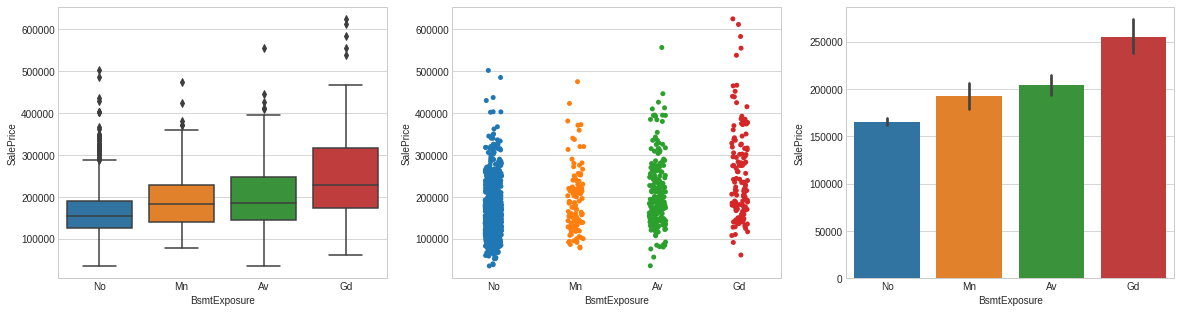

In [260]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BsmtExposure", y="SalePrice", data=train, order=['No', 'Mn', 'Av', 'Gd']);

plt.subplot(1, 3, 2)
sns.stripplot(x="BsmtExposure", y="SalePrice", data=train, size = 5, jitter = True, order=['No', 'Mn', 'Av', 'Gd']);

plt.subplot(1, 3, 3)
sns.barplot(x="BsmtExposure", y="SalePrice", data=train, order=['No', 'Mn', 'Av', 'Gd']);

SalePrice slightly increases as the amount of exposure increases. However, the average price between categories doesn't have much difference. Because these are ordinal, I will replace these values by hand. 

In [261]:
all['BsmtExposure'] = all['BsmtExposure'].map({"None":0, "No":1, "Mn":2, "Av":3, "Gd":4})
all['BsmtExposure'].unique()

array([1, 4, 2, 3, 0])

***BsmtFinType1***
- Rating of basement finished area
       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

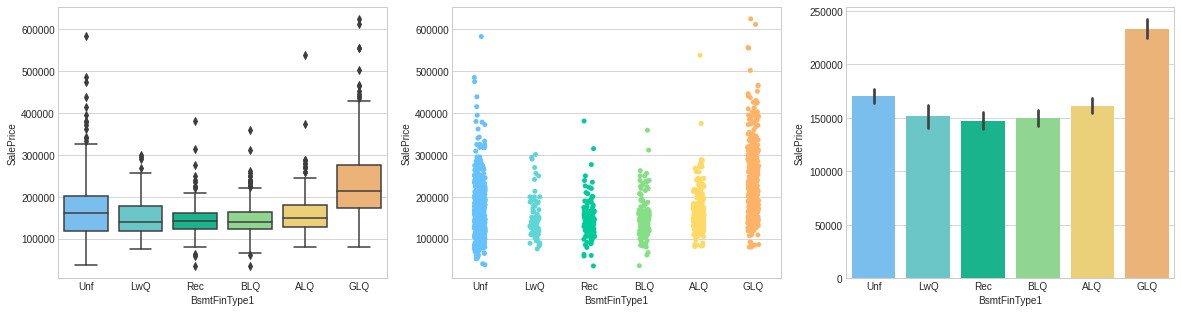

In [262]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BsmtFinType1", y="SalePrice", data=train, order=["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], palette = mycols);

plt.subplot(1, 3, 2)
sns.stripplot(x="BsmtFinType1", y="SalePrice", data=train, size = 5, jitter = True, order=["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="BsmtFinType1", y="SalePrice", data=train, order=["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], palette = mycols);

This is interesting as houses with an unfinished basement tended to have an average SalePrice higher than all finished basements except the highest quality finished basement. This is supposed to be an ordinal feature, but because SalePrice does not increase amongst all categories, I will creae dummy variables instead.

In [263]:
all = pd.get_dummies(all, columns = ["BsmtFinType1"], prefix="BsmtFinType1")
print(all.shape)
print('\n', '-' * 136)
all.head(3)

(2915, 114)

 ----------------------------------------------------------------------------------------------------------------------------------------


MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour  \
0         60       RL         65.0     8450   Pave  None      Reg         Lvl   
1         20       RL         80.0     9600   Pave  None      Reg         Lvl   
2         60       RL         68.0    11250   Pave  None      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            7            5       2003          2003     Gable  CompShg   
1            6            8       1976          1976     Gable  CompShg   
2            7            5       2001          2002     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   

  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinSF1 BsmtFinType2  \
0      PConc         3         3             1       706.0          Unf   
1     CBlock         3         3             4       978.0          Unf   
2      PConc         3         3             2       486.0          Unf   

   BsmtFinSF2  BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  \
0         0.0      150.0        856.0    GasA        Ex          Y      SBrkr   
1         0.0      284.0       1262.0    GasA        Ex          Y      SBrkr   
2         0.0      434.0        920.0    GasA        Ex          Y      SBrkr   

   1stFlrSF  ...  MoSold  YrSold  SaleType  SaleCondition  OverallQual-2  \
0       856  ...       2    2008        WD         Normal             49   
1      1262  ...       5    2007        WD         Normal             36   
2       920  ...       9    2008        WD         Normal             49   

   GrLivArea-2  GarageCars-2  GarageArea-2  TotalBsmtSF-2 1stFlrSF-2  \
0      2924100           4.0      300304.0       732736.0     732736   
1      1592644           4.0      211600.0      1592644.0    1592644   
2      3189796           4.0      369664.0       846400.0     846400   

   FullBath-2 TotRmsAbvGrd-2  YearBuilt-2 YearRemodAdd-2 OverallQual-3  \
0           4             64      4012009        4012009           343   
1           4             36      3904576        3904576           216   
2           4             36      4004001        4008004           343   

   GrLivArea-3 GarageCars-3  GarageArea-3  TotalBsmtSF-3  1stFlrSF-3  \
0   5000211000          8.0   164566592.0   6.272220e+08   627222016   
1   2009916728          8.0    97336000.0   2.009917e+09  2009916728   
2   5696975656          8.0   224755712.0   7.786880e+08   778688000   

  FullBath-3 TotRmsAbvGrd-3  YearBuilt-3  YearRemodAdd-3  OverallQual-Sq  \
0          8            512   8036054027      8036054027        2.645751   
1          8            216   7715442176      7715442176        2.449490   
2          8            216   8012006001      8024024008        2.645751   

   GrLivArea-Sq  GarageCars-Sq  GarageArea-Sq TotalBsmtSF-Sq 1stFlrSF-Sq  \
0     41.352146       1.414214      23.409400      29.257478   29.257478   
1     35.524639       1.414214      21.447611      35.524639   35.524639   
2     42.261093       1.414214      24.657656      30.331502   30.331502   

  FullBath-Sq  TotRmsAbvGrd-Sq YearBuilt-Sq YearRemodAdd-Sq BsmtFinType1_ALQ  \
0    1.414214         2.828427    44.754888       44.754888                0   
1    1.414214         2.449490    44.452222       44.452222                1   
2    1.414214         2.449490    44.732538       44.743715                0   

  BsmtFinType1_BLQ  BsmtFinTy

***BsmtFinSF1***
- Type 1 finished square feet.

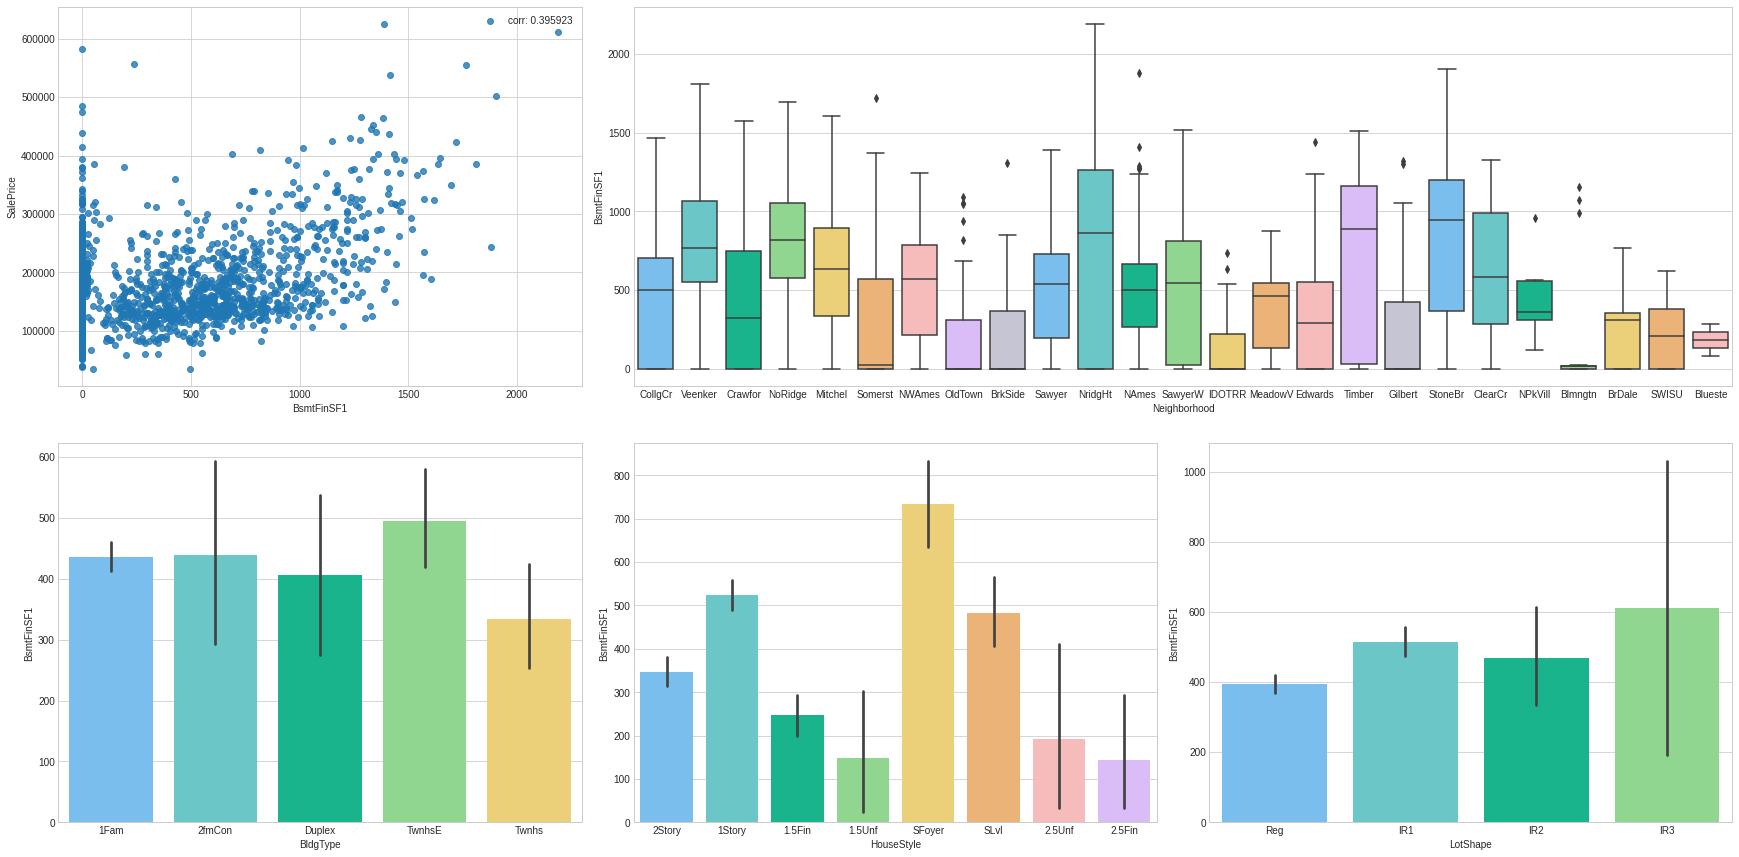

In [264]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['BsmtFinSF1'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['BsmtFinSF1'], train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="BsmtFinSF1", data=train, palette = mycols)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="BsmtFinSF1", data=train, palette = mycols)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="BsmtFinSF1", data=train, palette = mycols)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="BsmtFinSF1", data=train, palette = mycols);


The reason for binning continuous features: [Binning](https://towardsdatascience.com/understanding-feature-engineering-part-1-continuous-numeric-data-da4e47099a7b)

BsmtFinSF1 has a positive correlation with SalePrice but the spread of the data is huge and varies depending on Neighborhood, BldgType, HouseStyle, and LotShape. I will bin this data into four quantiles.

In [265]:
all['BsmtFinSF1_Band'] = pd.cut(all['BsmtFinSF1'], 4)
all['BsmtFinSF1_Band'].unique()

[(-4.01, 1002.5], (1002.5, 2005.0], (2005.0, 3007.5], (3007.5, 4010.0]]
Categories (4, interval[float64]): [(-4.01, 1002.5] < (1002.5, 2005.0] < (2005.0, 3007.5] <
                                    (3007.5, 4010.0]]

In [266]:
all.loc[all['BsmtFinSF1']<=1002.5, 'BsmtFinSF1'] = 1
all.loc[(all['BsmtFinSF1']>1002.5) & (all['BsmtFinSF1']<=2005), 'BsmtFinSF1'] = 2
all.loc[(all['BsmtFinSF1']>2005) & (all['BsmtFinSF1']<=3007.5), 'BsmtFinSF1'] = 3
all.loc[all['BsmtFinSF1']>3007.5, 'BsmtFinSF1'] = 4
all['BsmtFinSF1'] = all['BsmtFinSF1'].astype(int)

all.drop('BsmtFinSF1_Band', axis=1, inplace=True)

all = pd.get_dummies(all, columns = ["BsmtFinSF1"], prefix="BsmtFinSF1")
all.head(3)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour  \
0         60       RL         65.0     8450   Pave  None      Reg         Lvl   
1         20       RL         80.0     9600   Pave  None      Reg         Lvl   
2         60       RL         68.0    11250   Pave  None      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            7            5       2003          2003     Gable  CompShg   
1            6            8       1976          1976     Gable  CompShg   
2            7            5       2001          2002     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   

  Foundation  BsmtQual  BsmtCond  BsmtExposure BsmtFinType2  BsmtFinSF2  \
0      PConc         3         3             1          Unf         0.0   
1     CBlock         3         3             4          Unf         0.0   
2      PConc         3         3             2          Unf         0.0   

   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
0      150.0        856.0    GasA        Ex          Y      SBrkr       856   
1      284.0       1262.0    GasA        Ex          Y      SBrkr      1262   
2      434.0        920.0    GasA        Ex          Y      SBrkr       920   

   2ndFlrSF  ...  OverallQual-2  GrLivArea-2  GarageCars-2  GarageArea-2  \
0       854  ...             49      2924100           4.0      300304.0   
1         0  ...             36      1592644           4.0      211600.0   
2       866  ...             49      3189796           4.0      369664.0   

   TotalBsmtSF-2  1stFlrSF-2  FullBath-2  TotRmsAbvGrd-2 YearBuilt-2  \
0       732736.0      732736           4              64     4012009   
1      1592644.0     1592644           4              36     3904576   
2       846400.0      846400           4              36     4004001   

   YearRemodAdd-2 OverallQual-3  GrLivArea-3 GarageCars-3 GarageArea-3  \
0         4012009           343   5000211000          8.0  164566592.0   
1         3904576           216   2009916728          8.0   97336000.0   
2         4008004           343   5696975656          8.0  224755712.0   

   TotalBsmtSF-3  1stFlrSF-3  FullBath-3  TotRmsAbvGrd-3 YearBuilt-3  \
0   6.272220e+08   627222016           8             512  8036054027   
1   2.009917e+09  2009916728           8             216  7715442176   
2   7.786880e+08   778688000           8             216  8012006001   

  YearRemodAdd-3 OverallQual-Sq  GrLivArea-Sq  GarageCars-Sq  GarageArea-Sq  \
0     8036054027       2.645751     41.352146       1.414214      23.409400   
1     7715442176       2.449490     35.524639       1.414214      21.447611   
2     8024024008       2.645751     42.261093       1.414214      24.657656   

   TotalBsmtSF-Sq  1stFlrSF-Sq  FullBath-Sq TotRmsAbvGrd-Sq YearBuilt-Sq  \
0       29.257478    29.257478     1.414214        2.828427    44.754888   
1       35.524639    35.524639     1.414214        2.449490    44.452222   
2       30.331502    30.331502     1.414214        2.449490    44.732538   

  YearRemodAdd-Sq  BsmtFinType1_ALQ BsmtFinType1_BLQ BsmtFinType1_GLQ  \
0       44.754888                 0                0                1   
1       44.452222                 1                0                0   
2       44.743715                 0                0                1   

  BsmtFinType1_LwQ BsmtFinType1_None  BsmtFinType1_Re

***BsmtFinType2***
- Rating of basement finished area (if multiple types)
BsmtFinType2: Rating of basement finished area (if multiple types)

       GLQ	Good Living Quarters
       ALQ	Average Living Quarters
       BLQ	Below Average Living Quarters	
       Rec	Average Rec Room
       LwQ	Low Quality
       Unf	Unfinshed
       NA	No Basement

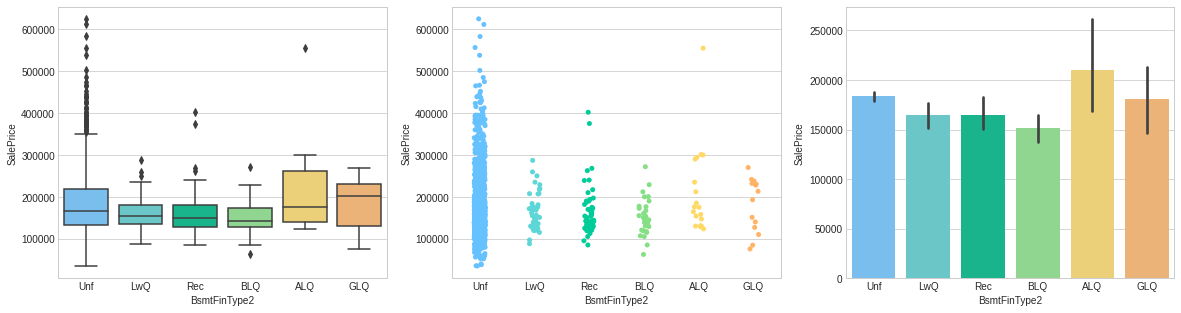

In [267]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BsmtFinType2", y="SalePrice", data=train, order=["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], palette = mycols);

plt.subplot(1, 3, 2)
sns.stripplot(x="BsmtFinType2", y="SalePrice", data=train, size = 5, jitter = True, order=["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="BsmtFinType2", y="SalePrice", data=train, order=["Unf", "LwQ", "Rec", "BLQ", "ALQ", "GLQ"], palette = mycols);

Most of the houses have unfinished second basements, and relatively few for the other categories. Although, this is meant to be an ordinal feature, I will create dummy variables.

In [268]:
all = pd.get_dummies(all, columns = ["BsmtFinType2"], prefix="BsmtFinType2")
all.head(3)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour  \
0         60       RL         65.0     8450   Pave  None      Reg         Lvl   
1         20       RL         80.0     9600   Pave  None      Reg         Lvl   
2         60       RL         68.0    11250   Pave  None      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            7            5       2003          2003     Gable  CompShg   
1            6            8       1976          1976     Gable  CompShg   
2            7            5       2001          2002     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   

  Foundation  BsmtQual  BsmtCond  BsmtExposure  BsmtFinSF2  BsmtUnfSF  \
0      PConc         3         3             1         0.0      150.0   
1     CBlock         3         3             4         0.0      284.0   
2      PConc         3         3             2         0.0      434.0   

   TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  \
0        856.0    GasA        Ex          Y      SBrkr       856       854   
1       1262.0    GasA        Ex          Y      SBrkr      1262         0   
2        920.0    GasA        Ex          Y      SBrkr       920       866   

   LowQualFinSF  ...  TotRmsAbvGrd-2  YearBuilt-2  YearRemodAdd-2  \
0             0  ...              64      4012009         4012009   
1             0  ...              36      3904576         3904576   
2             0  ...              36      4004001         4008004   

   OverallQual-3  GrLivArea-3  GarageCars-3  GarageArea-3 TotalBsmtSF-3  \
0            343   5000211000           8.0   164566592.0  6.272220e+08   
1            216   2009916728           8.0    97336000.0  2.009917e+09   
2            343   5696975656           8.0   224755712.0  7.786880e+08   

   1stFlrSF-3 FullBath-3  TotRmsAbvGrd-3 YearBuilt-3 YearRemodAdd-3  \
0   627222016          8             512  8036054027     8036054027   
1  2009916728          8             216  7715442176     7715442176   
2   778688000          8             216  8012006001     8024024008   

   OverallQual-Sq GrLivArea-Sq  GarageCars-Sq  GarageArea-Sq TotalBsmtSF-Sq  \
0        2.645751    41.352146       1.414214      23.409400      29.257478   
1        2.449490    35.524639       1.414214      21.447611      35.524639   
2        2.645751    42.261093       1.414214      24.657656      30.331502   

  1stFlrSF-Sq FullBath-Sq  TotRmsAbvGrd-Sq  YearBuilt-Sq  YearRemodAdd-Sq  \
0   29.257478    1.414214         2.828427     44.754888        44.754888   
1   35.524639    1.414214         2.449490     44.452222        44.452222   
2   30.331502    1.414214         2.449490     44.732538        44.743715   

   BsmtFinType1_ALQ  BsmtFinType1_BLQ  BsmtFinType1_GLQ BsmtFinType1_LwQ  \
0                 0                 0                 1                0   
1                 1                 0                 0                0   
2                 0                 0                 1                0   

  BsmtFinType1_None BsmtFinType1_Rec  BsmtFinType1_Unf BsmtFinSF1_1  \
0                 0                0                 0            1   
1                 0                0                 0            1   
2                 0                0                 0            1   

  BsmtFinSF1_2 BsmtFinSF1_3 BsmtFinSF1_4  BsmtFinType2_ALQ  BsmtFinType2_BLQ  \
0

***BsmtFinSF2***
- Type 2 finished square feet.

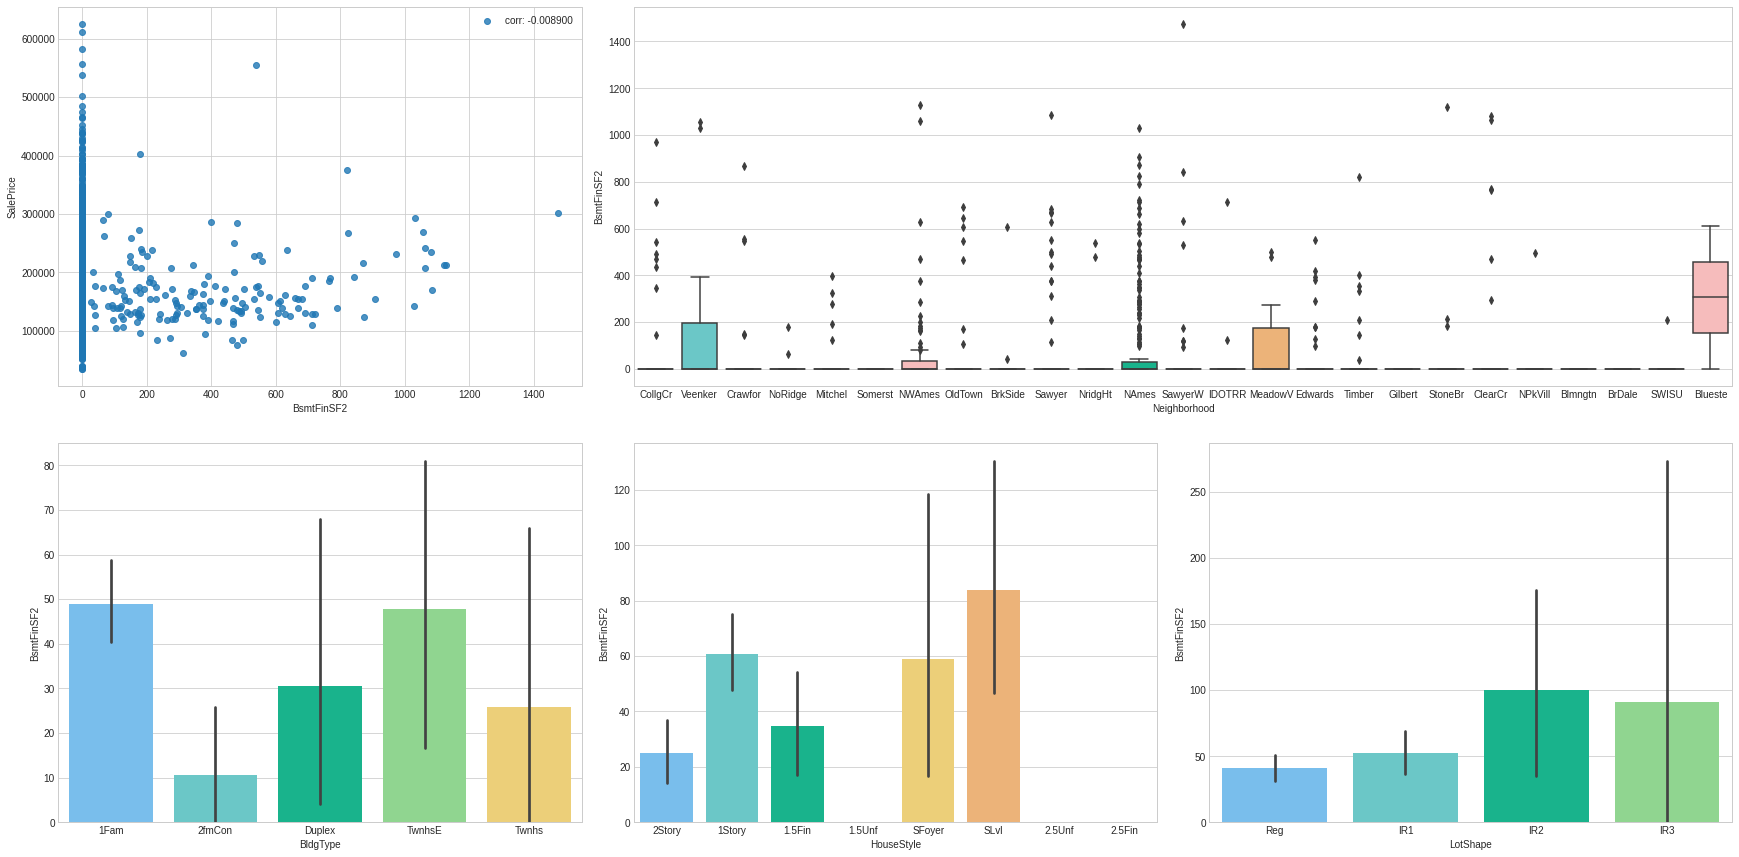

In [269]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['BsmtFinSF2'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['BsmtFinSF2'], train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="BsmtFinSF2", data=train, palette = mycols)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="BsmtFinSF2", data=train, palette = mycols)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="BsmtFinSF2", data=train, palette = mycols)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="BsmtFinSF2", data=train, palette = mycols);

Most of the values, for this feature, are zero. There does not seem to be a significant correlation, so I will flag this variable.

In [270]:
all['BsmtFinSf2_Flag'] = all['BsmtFinSF2'].map(lambda x:0 if x==0 else 1)
all.drop('BsmtFinSF2', axis=1, inplace=True)

***BsmtUnfSF***
- Unfinished square feet of basement area

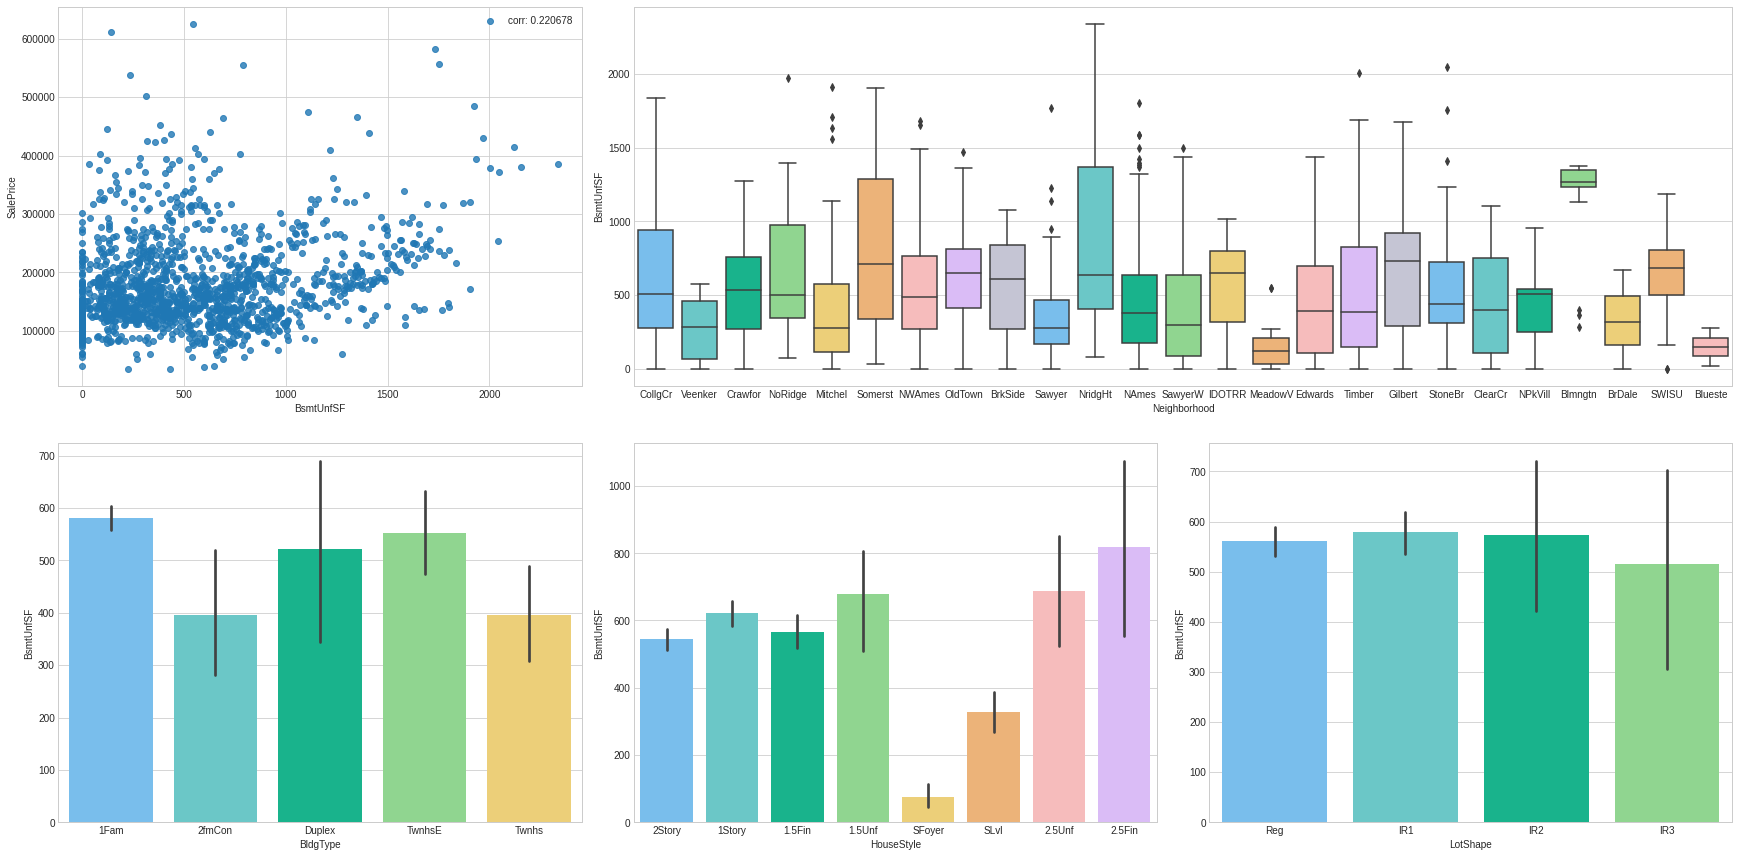

In [271]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['BsmtUnfSF'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['BsmtUnfSF'], train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="BsmtUnfSF", data=train, palette = mycols)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="BsmtUnfSF", data=train, palette = mycols)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="BsmtUnfSF", data=train, palette = mycols)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="BsmtUnfSF", data=train, palette = mycols);

This feature has positive correlation with SalePrice, with a proportion of data points equaling zero. The amount of square feet varies widely based on location and style, but is fairly consistent across lot shapes. I will create three bins.

In [272]:
all['BsmtUnfSF_Band'] = pd.cut(all['BsmtUnfSF'], 3)
all['BsmtUnfSF_Band'].unique()

[(-2.336, 778.667], (778.667, 1557.333], (1557.333, 2336.0]]
Categories (3, interval[float64]): [(-2.336, 778.667] < (778.667, 1557.333] < (1557.333, 2336.0]]

In [273]:
all.loc[all['BsmtUnfSF']<=778.667, 'BsmtUnfSF'] = 1
all.loc[(all['BsmtUnfSF']>778.667) & (all['BsmtUnfSF']<=1557.333), 'BsmtUnfSF'] = 2
all.loc[all['BsmtUnfSF']>1557.333, 'BsmtUnfSF'] = 3
all['BsmtUnfSF'] = all['BsmtUnfSF'].astype(int)

all.drop('BsmtUnfSF_Band', axis=1, inplace=True)

all = pd.get_dummies(all, columns = ["BsmtUnfSF"], prefix="BsmtUnfSF")
all.head(3)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour  \
0         60       RL         65.0     8450   Pave  None      Reg         Lvl   
1         20       RL         80.0     9600   Pave  None      Reg         Lvl   
2         60       RL         68.0    11250   Pave  None      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            7            5       2003          2003     Gable  CompShg   
1            6            8       1976          1976     Gable  CompShg   
2            7            5       2001          2002     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   

  Foundation  BsmtQual  BsmtCond  BsmtExposure  TotalBsmtSF Heating HeatingQC  \
0      PConc         3         3             1        856.0    GasA        Ex   
1     CBlock         3         3             4       1262.0    GasA        Ex   
2      PConc         3         3             2        920.0    GasA        Ex   

  CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
0          Y      SBrkr       856       854             0       1710   
1          Y      SBrkr      1262         0             0       1262   
2          Y      SBrkr       920       866             0       1786   

   BsmtFullBath  ...  GrLivArea-3  GarageCars-3  GarageArea-3  TotalBsmtSF-3  \
0           1.0  ...   5000211000           8.0   164566592.0   6.272220e+08   
1           0.0  ...   2009916728           8.0    97336000.0   2.009917e+09   
2           1.0  ...   5696975656           8.0   224755712.0   7.786880e+08   

   1stFlrSF-3 FullBath-3  TotRmsAbvGrd-3 YearBuilt-3  YearRemodAdd-3  \
0   627222016          8             512  8036054027      8036054027   
1  2009916728          8             216  7715442176      7715442176   
2   778688000          8             216  8012006001      8024024008   

  OverallQual-Sq GrLivArea-Sq  GarageCars-Sq GarageArea-Sq  TotalBsmtSF-Sq  \
0       2.645751    41.352146       1.414214     23.409400       29.257478   
1       2.449490    35.524639       1.414214     21.447611       35.524639   
2       2.645751    42.261093       1.414214     24.657656       30.331502   

   1stFlrSF-Sq FullBath-Sq TotRmsAbvGrd-Sq YearBuilt-Sq  YearRemodAdd-Sq  \
0    29.257478    1.414214        2.828427    44.754888        44.754888   
1    35.524639    1.414214        2.449490    44.452222        44.452222   
2    30.331502    1.414214        2.449490    44.732538        44.743715   

   BsmtFinType1_ALQ  BsmtFinType1_BLQ  BsmtFinType1_GLQ  BsmtFinType1_LwQ  \
0                 0                 0                 1                 0   
1                 1                 0                 0                 0   
2                 0                 0                 1                 0   

   BsmtFinType1_None BsmtFinType1_Rec BsmtFinType1_Unf BsmtFinSF1_1  \
0                  0                0                0            1   
1                  0                0                0            1   
2                  0                0                0            1   

   BsmtFinSF1_2 BsmtFinSF1_3 BsmtFinSF1_4 BsmtFinType2_ALQ BsmtFinType2_BLQ  \
0             0            0            0                0                0   
1             0            0            0                0                0   
2             0            0            0                0                0   

   BsmtFinTyp

***TotalBsmtSF***
- Total square feet of basement area.

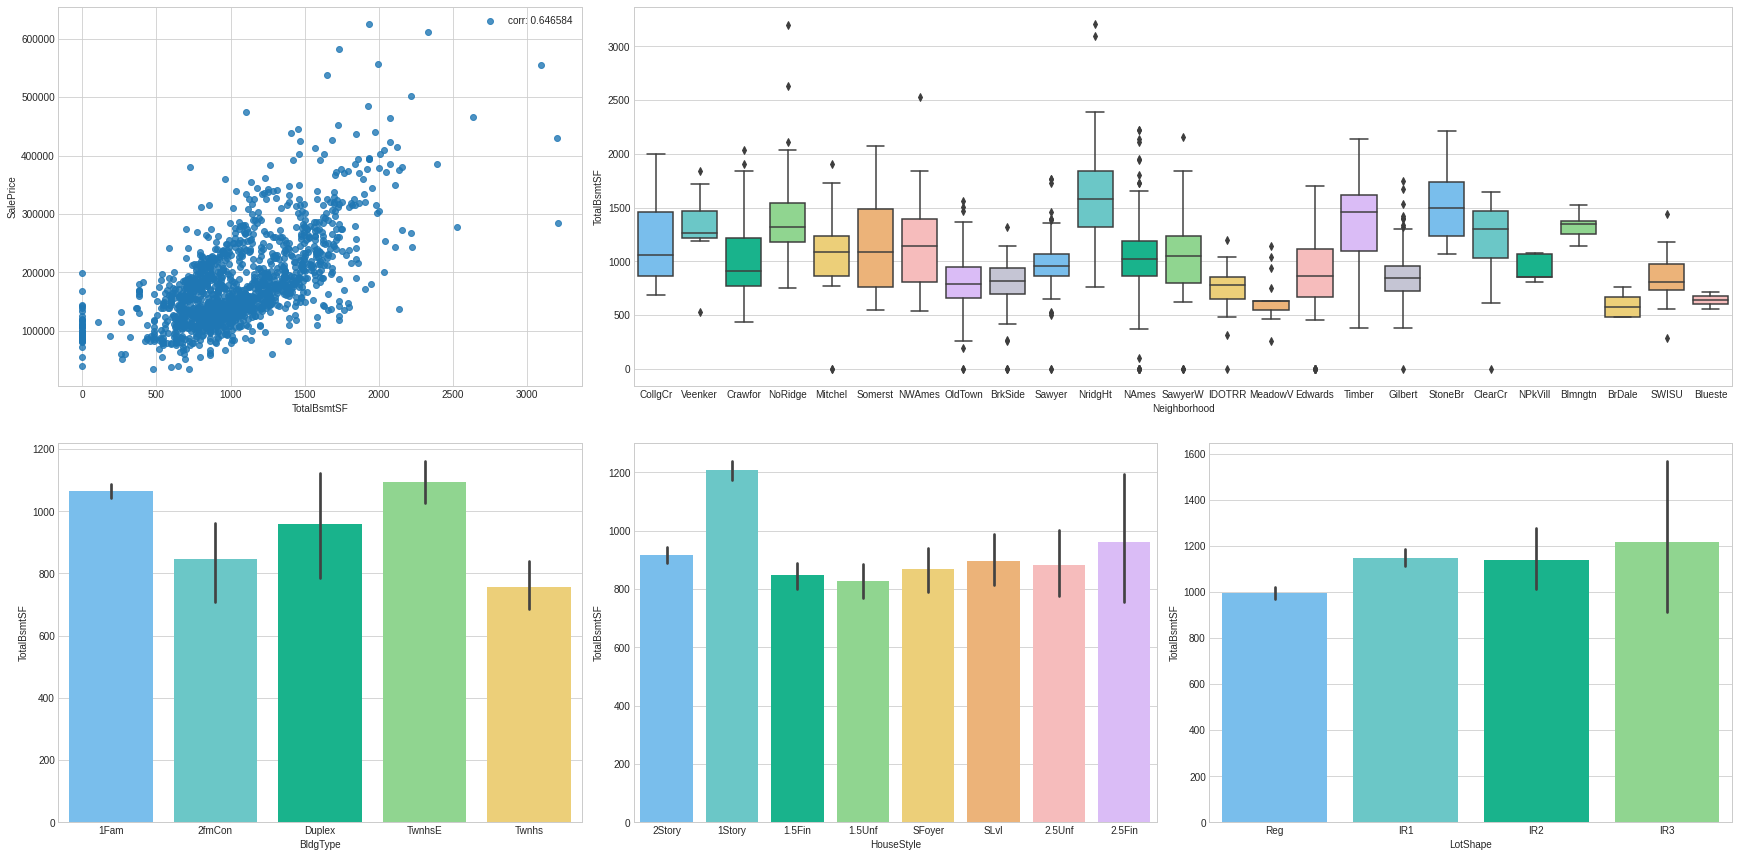

In [274]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['TotalBsmtSF'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['TotalBsmtSF'], train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="TotalBsmtSF", data=train, palette = mycols)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="TotalBsmtSF", data=train, palette = mycols)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="TotalBsmtSF", data=train, palette = mycols)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="TotalBsmtSF", data=train, palette = mycols);

This feature has a high correlation with Salesprice. It varies widely based on location but less so with type, style, and lot shape. I will cut this continuous variable into ten bins.

- This will be a very important feature within my analysis, due to such a high correlation with Saleprice.
- We can see that it varies widely based on location, however the average basement size has a lower variance based on type, style and lot shape.
- Due to this being a continuous numeric feature and also being a very significant feature when describing SalePrice, I believe there could be more value to be mined within this feature. Hence, I will create some binnings and dummy variables. 

In [275]:
all['TotalBsmtSF_Band'] = pd.cut(all['TotalBsmtSF'], 10)
all['TotalBsmtSF_Band'].unique()

[(509.5, 1019.0], (1019.0, 1528.5], (1528.5, 2038.0], (-5.095, 509.5], (2038.0, 2547.5], (3057.0, 3566.5], (2547.5, 3057.0], (4585.5, 5095.0]]
Categories (8, interval[float64]): [(-5.095, 509.5] < (509.5, 1019.0] < (1019.0, 1528.5] <
                                    (1528.5, 2038.0] < (2038.0, 2547.5] < (2547.5, 3057.0] <
                                    (3057.0, 3566.5] < (4585.5, 5095.0]]

In [276]:
all.loc[all['TotalBsmtSF']<=509.5, 'TotalBsmtSF'] = 1
all.loc[(all['TotalBsmtSF']>509.5) & (all['TotalBsmtSF']<=1019), 'TotalBsmtSF'] = 2
all.loc[(all['TotalBsmtSF']>1019) & (all['TotalBsmtSF']<=1528.5), 'TotalBsmtSF'] = 3
all.loc[(all['TotalBsmtSF']>1528.5) & (all['TotalBsmtSF']<=2038), 'TotalBsmtSF'] = 4
all.loc[(all['TotalBsmtSF']>2038) & (all['TotalBsmtSF']<=2547.5), 'TotalBsmtSF'] = 5
all.loc[(all['TotalBsmtSF']>2547.5) & (all['TotalBsmtSF']<=3057), 'TotalBsmtSF'] = 6
all.loc[(all['TotalBsmtSF']>3057) & (all['TotalBsmtSF']<=3566.5), 'TotalBsmtSF'] = 7
all.loc[all['TotalBsmtSF']>3566.5, 'TotalBsmtSF'] = 8
all['TotalBsmtSF'] = all['TotalBsmtSF'].astype(int)

all.drop('TotalBsmtSF_Band', axis=1, inplace=True)

all = pd.get_dummies(all, columns = ["TotalBsmtSF"], prefix="TotalBsmtSF")
all.head(3)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour  \
0         60       RL         65.0     8450   Pave  None      Reg         Lvl   
1         20       RL         80.0     9600   Pave  None      Reg         Lvl   
2         60       RL         68.0    11250   Pave  None      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            7            5       2003          2003     Gable  CompShg   
1            6            8       1976          1976     Gable  CompShg   
2            7            5       2001          2002     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   

  Foundation  BsmtQual  BsmtCond  BsmtExposure Heating HeatingQC CentralAir  \
0      PConc         3         3             1    GasA        Ex          Y   
1     CBlock         3         3             4    GasA        Ex          Y   
2      PConc         3         3             2    GasA        Ex          Y   

  Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  \
0      SBrkr       856       854             0       1710           1.0   
1      SBrkr      1262         0             0       1262           0.0   
2      SBrkr       920       866             0       1786           1.0   

   BsmtHalfBath  ...  YearRemodAdd-3  OverallQual-Sq  GrLivArea-Sq  \
0           0.0  ...      8036054027        2.645751     41.352146   
1           1.0  ...      7715442176        2.449490     35.524639   
2           0.0  ...      8024024008        2.645751     42.261093   

   GarageCars-Sq GarageArea-Sq  TotalBsmtSF-Sq 1stFlrSF-Sq  FullBath-Sq  \
0       1.414214     23.409400       29.257478   29.257478     1.414214   
1       1.414214     21.447611       35.524639   35.524639     1.414214   
2       1.414214     24.657656       30.331502   30.331502     1.414214   

  TotRmsAbvGrd-Sq YearBuilt-Sq  YearRemodAdd-Sq BsmtFinType1_ALQ  \
0        2.828427    44.754888        44.754888                0   
1        2.449490    44.452222        44.452222                1   
2        2.449490    44.732538        44.743715                0   

   BsmtFinType1_BLQ  BsmtFinType1_GLQ BsmtFinType1_LwQ BsmtFinType1_None  \
0                 0                 1                0                 0   
1                 0                 0                0                 0   
2                 0                 1                0                 0   

  BsmtFinType1_Rec  BsmtFinType1_Unf  BsmtFinSF1_1  BsmtFinSF1_2  \
0                0                 0             1             0   
1                0                 0             1             0   
2                0                 0             1             0   

   BsmtFinSF1_3  BsmtFinSF1_4  BsmtFinType2_ALQ BsmtFinType2_BLQ  \
0             0             0                 0                0   
1             0             0                 0                0   
2             0             0                 0                0   

  BsmtFinType2_GLQ BsmtFinType2_LwQ  BsmtFinType2_None BsmtFinType2_Rec  \
0                0                0                  0                0   
1                0                0                  0                0   
2                0                0                  0                0   

  BsmtFinType2_Unf BsmtFinSf2_Flag BsmtUnfSF_1  BsmtUnfSF_2  BsmtUnfSF_3  \
0                1               0           1            0      

***1stFlrSF***
- First floor square feet.

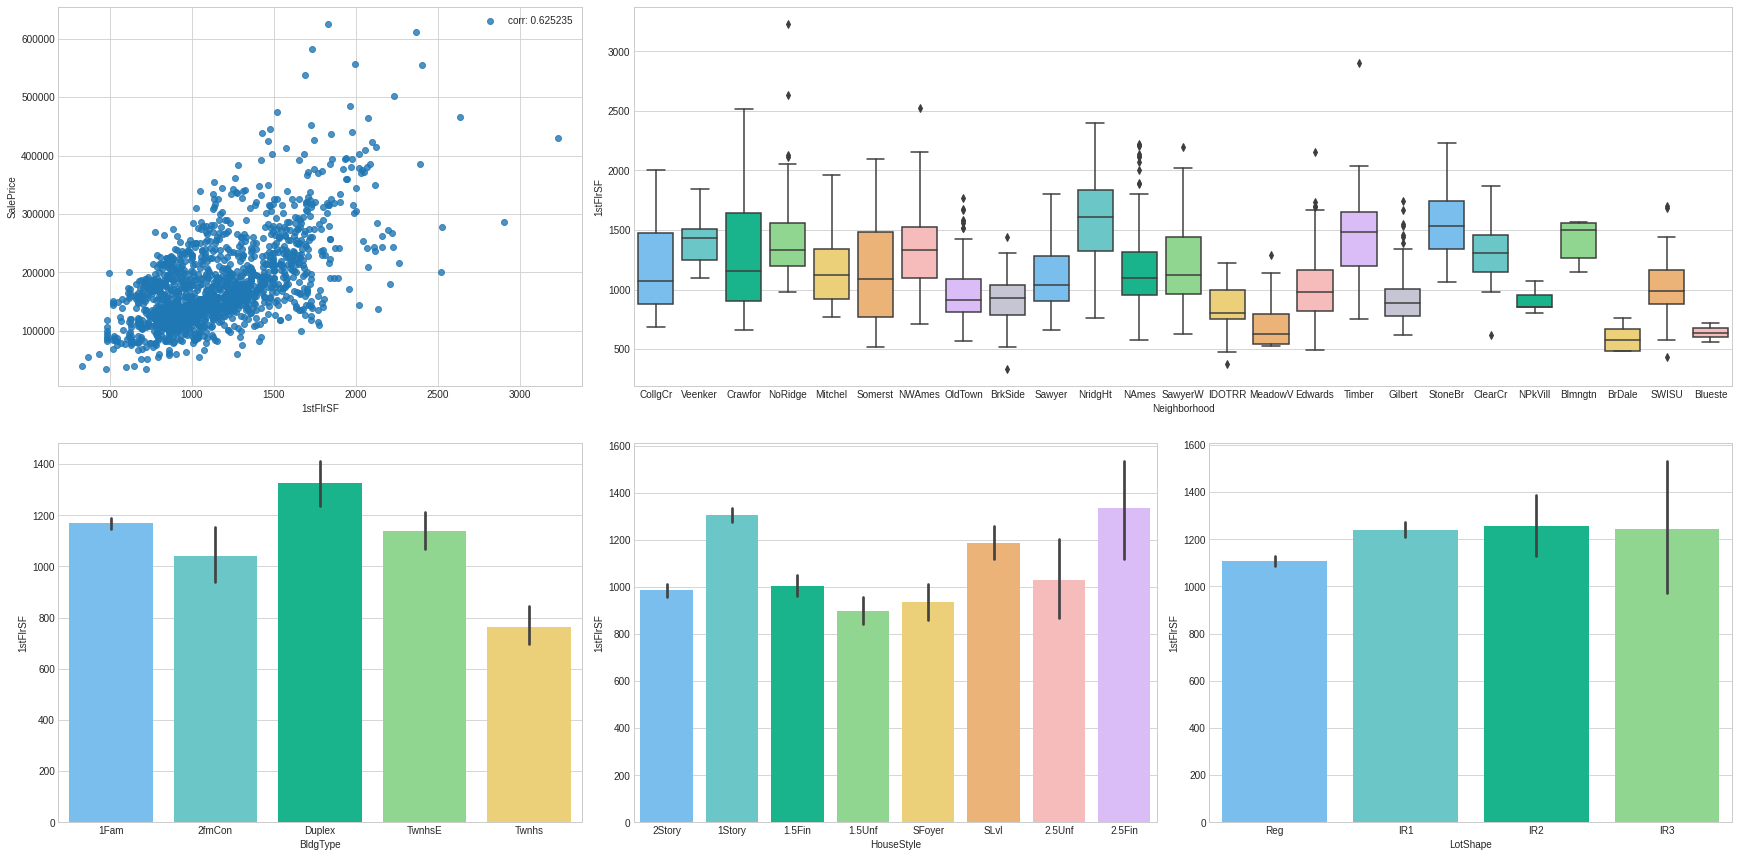

In [277]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['1stFlrSF'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['1stFlrSF'], train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="1stFlrSF", data=train, palette = mycols)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="1stFlrSF", data=train, palette = mycols)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="1stFlrSF", data=train, palette = mycols)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="1stFlrSF", data=train, palette = mycols);

This feature is important because it has high positive correlation with SalePrice. It varies greatly across neighborhoods, building types, and styles. It does not vary much between lot styles. Because it is continuous, I will turn it into six equal bins.

In [278]:
all['1stFlrSF_Band'] = pd.cut(all['1stFlrSF'], 6)
all['1stFlrSF_Band'].unique()

[(329.239, 1127.5], (1127.5, 1921.0], (1921.0, 2714.5], (2714.5, 3508.0], (3508.0, 4301.5], (4301.5, 5095.0]]
Categories (6, interval[float64]): [(329.239, 1127.5] < (1127.5, 1921.0] < (1921.0, 2714.5] <
                                    (2714.5, 3508.0] < (3508.0, 4301.5] < (4301.5, 5095.0]]

In [279]:
all.loc[all['1stFlrSF']<=1127.5, '1stFlrSF'] = 1
all.loc[(all['1stFlrSF']>1127.5) & (all['1stFlrSF']<=1921), '1stFlrSF'] = 2
all.loc[(all['1stFlrSF']>1921) & (all['1stFlrSF']<=2714.5), '1stFlrSF'] = 3
all.loc[(all['1stFlrSF']>2714.5) & (all['1stFlrSF']<=3508), '1stFlrSF'] = 4
all.loc[(all['1stFlrSF']>3508) & (all['1stFlrSF']<=4301.5), '1stFlrSF'] = 5
all.loc[all['1stFlrSF']>4301.5, '1stFlrSF'] = 6
all['1stFlrSF'] = all['1stFlrSF'].astype(int)

all.drop('1stFlrSF_Band', axis=1, inplace=True)

all = pd.get_dummies(all, columns = ["1stFlrSF"], prefix="1stFlrSF")
all.head(3)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour  \
0         60       RL         65.0     8450   Pave  None      Reg         Lvl   
1         20       RL         80.0     9600   Pave  None      Reg         Lvl   
2         60       RL         68.0    11250   Pave  None      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            7            5       2003          2003     Gable  CompShg   
1            6            8       1976          1976     Gable  CompShg   
2            7            5       2001          2002     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   

  Foundation  BsmtQual  BsmtCond  BsmtExposure Heating HeatingQC CentralAir  \
0      PConc         3         3             1    GasA        Ex          Y   
1     CBlock         3         3             4    GasA        Ex          Y   
2      PConc         3         3             2    GasA        Ex          Y   

  Electrical  2ndFlrSF  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  \
0      SBrkr       854             0       1710           1.0           0.0   
1      SBrkr         0             0       1262           0.0           1.0   
2      SBrkr       866             0       1786           1.0           0.0   

   FullBath  ...  1stFlrSF-Sq  FullBath-Sq  TotRmsAbvGrd-Sq YearBuilt-Sq  \
0         2  ...    29.257478     1.414214         2.828427    44.754888   
1         2  ...    35.524639     1.414214         2.449490    44.452222   
2         2  ...    30.331502     1.414214         2.449490    44.732538   

   YearRemodAdd-Sq BsmtFinType1_ALQ  BsmtFinType1_BLQ BsmtFinType1_GLQ  \
0        44.754888                0                 0                1   
1        44.452222                1                 0                0   
2        44.743715                0                 0                1   

  BsmtFinType1_LwQ  BsmtFinType1_None BsmtFinType1_Rec  BsmtFinType1_Unf  \
0                0                  0                0                 0   
1                0                  0                0                 0   
2                0                  0                0                 0   

   BsmtFinSF1_1 BsmtFinSF1_2 BsmtFinSF1_3 BsmtFinSF1_4  BsmtFinType2_ALQ  \
0             1            0            0            0                 0   
1             1            0            0            0                 0   
2             1            0            0            0                 0   

   BsmtFinType2_BLQ  BsmtFinType2_GLQ  BsmtFinType2_LwQ  BsmtFinType2_None  \
0                 0                 0                 0                  0   
1                 0                 0                 0                  0   
2                 0                 0                 0                  0   

   BsmtFinType2_Rec BsmtFinType2_Unf BsmtFinSf2_Flag BsmtUnfSF_1  BsmtUnfSF_2  \
0                 0                1               0           1            0   
1                 0                1               0           1            0   
2                 0                1               0           1            0   

  BsmtUnfSF_3 TotalBsmtSF_1 TotalBsmtSF_2 TotalBsmtSF_3  TotalBsmtSF_4  \
0           0             0             1             0              0   
1           0             0             0             1              0   
2           0             0             1             0     

***2ndFlrSF***
- Second floor square feet.

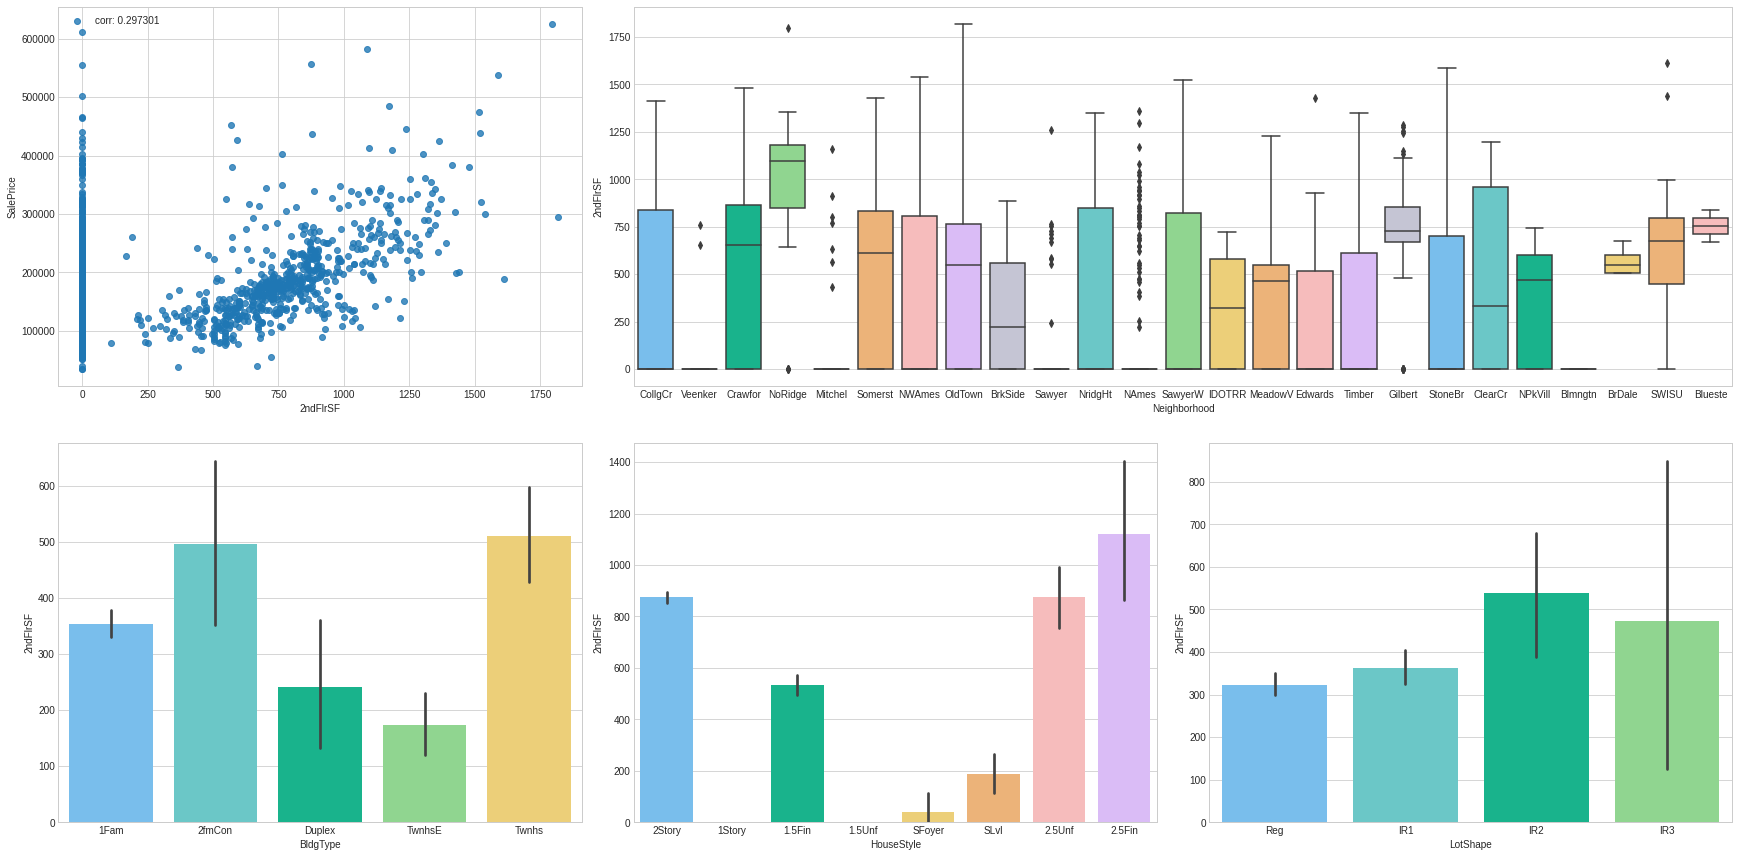

In [280]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['2ndFlrSF'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['2ndFlrSF'], train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="2ndFlrSF", data=train, palette = mycols)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="2ndFlrSF", data=train, palette = mycols)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="2ndFlrSF", data=train, palette = mycols)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="2ndFlrSF", data=train, palette = mycols);

There is a positive correlation with SalePrice, but it also has a significant number of houses with value = 0. The reason for this could be because not all homes have more than "1Story." Also, there is variation between BldgType, LotShap, and Neighborhood. Because it is continuous, I will cut it into six bins.

In [281]:
all['2ndFlrSF_Band'] = pd.cut(all['2ndFlrSF'], 6)
all['2ndFlrSF_Band'].unique()

[(620.667, 931.0], (-1.862, 310.333], (931.0, 1241.333], (310.333, 620.667], (1241.333, 1551.667], (1551.667, 1862.0]]
Categories (6, interval[float64]): [(-1.862, 310.333] < (310.333, 620.667] < (620.667, 931.0] <
                                    (931.0, 1241.333] < (1241.333, 1551.667] < (1551.667, 1862.0]]

In [282]:
all.loc[all['2ndFlrSF']<=310.333, '2ndFlrSF'] = 1
all.loc[(all['2ndFlrSF']>310.333) & (all['2ndFlrSF']<=620.667), '2ndFlrSF'] = 2
all.loc[(all['2ndFlrSF']>620.667) & (all['2ndFlrSF']<=931), '2ndFlrSF'] = 3
all.loc[(all['2ndFlrSF']>931) & (all['2ndFlrSF']<=1241.333), '2ndFlrSF'] = 4
all.loc[(all['2ndFlrSF']>1241.333) & (all['2ndFlrSF']<=1551.667), '2ndFlrSF'] = 5
all.loc[all['2ndFlrSF']>1551.667, '2ndFlrSF'] = 6
all['2ndFlrSF'] = all['2ndFlrSF'].astype(int)

all.drop('2ndFlrSF_Band', axis=1, inplace=True)

all = pd.get_dummies(all, columns = ["2ndFlrSF"], prefix="2ndFlrSF")
all.head(3)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour  \
0         60       RL         65.0     8450   Pave  None      Reg         Lvl   
1         20       RL         80.0     9600   Pave  None      Reg         Lvl   
2         60       RL         68.0    11250   Pave  None      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            7            5       2003          2003     Gable  CompShg   
1            6            8       1976          1976     Gable  CompShg   
2            7            5       2001          2002     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   

  Foundation  BsmtQual  BsmtCond  BsmtExposure Heating HeatingQC CentralAir  \
0      PConc         3         3             1    GasA        Ex          Y   
1     CBlock         3         3             4    GasA        Ex          Y   
2      PConc         3         3             2    GasA        Ex          Y   

  Electrical  LowQualFinSF  GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  \
0      SBrkr             0       1710           1.0           0.0         2   
1      SBrkr             0       1262           0.0           1.0         2   
2      SBrkr             0       1786           1.0           0.0         2   

   HalfBath  ...  BsmtFinType1_BLQ  BsmtFinType1_GLQ BsmtFinType1_LwQ  \
0         1  ...                 0                 1                0   
1         0  ...                 0                 0                0   
2         1  ...                 0                 1                0   

   BsmtFinType1_None BsmtFinType1_Rec  BsmtFinType1_Unf BsmtFinSF1_1  \
0                  0                0                 0            1   
1                  0                0                 0            1   
2                  0                0                 0            1   

  BsmtFinSF1_2  BsmtFinSF1_3 BsmtFinSF1_4  BsmtFinType2_ALQ  BsmtFinType2_BLQ  \
0            0             0            0                 0                 0   
1            0             0            0                 0                 0   
2            0             0            0                 0                 0   

  BsmtFinType2_GLQ BsmtFinType2_LwQ BsmtFinType2_None  BsmtFinType2_Rec  \
0                0                0                 0                 0   
1                0                0                 0                 0   
2                0                0                 0                 0   

   BsmtFinType2_Unf  BsmtFinSf2_Flag  BsmtUnfSF_1  BsmtUnfSF_2  BsmtUnfSF_3  \
0                 1                0            1            0            0   
1                 1                0            1            0            0   
2                 1                0            1            0            0   

  TotalBsmtSF_1 TotalBsmtSF_2 TotalBsmtSF_3  TotalBsmtSF_4 TotalBsmtSF_5  \
0             0             1             0              0             0   
1             0             0             1              0             0   
2             0             1             0              0             0   

  TotalBsmtSF_6 TotalBsmtSF_7 TotalBsmtSF_8  1stFlrSF_1  1stFlrSF_2  \
0             0             0             0           1           0   
1             0             0             0           0           1   
2             0             0             0           1           0   

   1stFlrSF_3  1s

***LowQualFinSF***
- Low quality finished square feet (all floors)

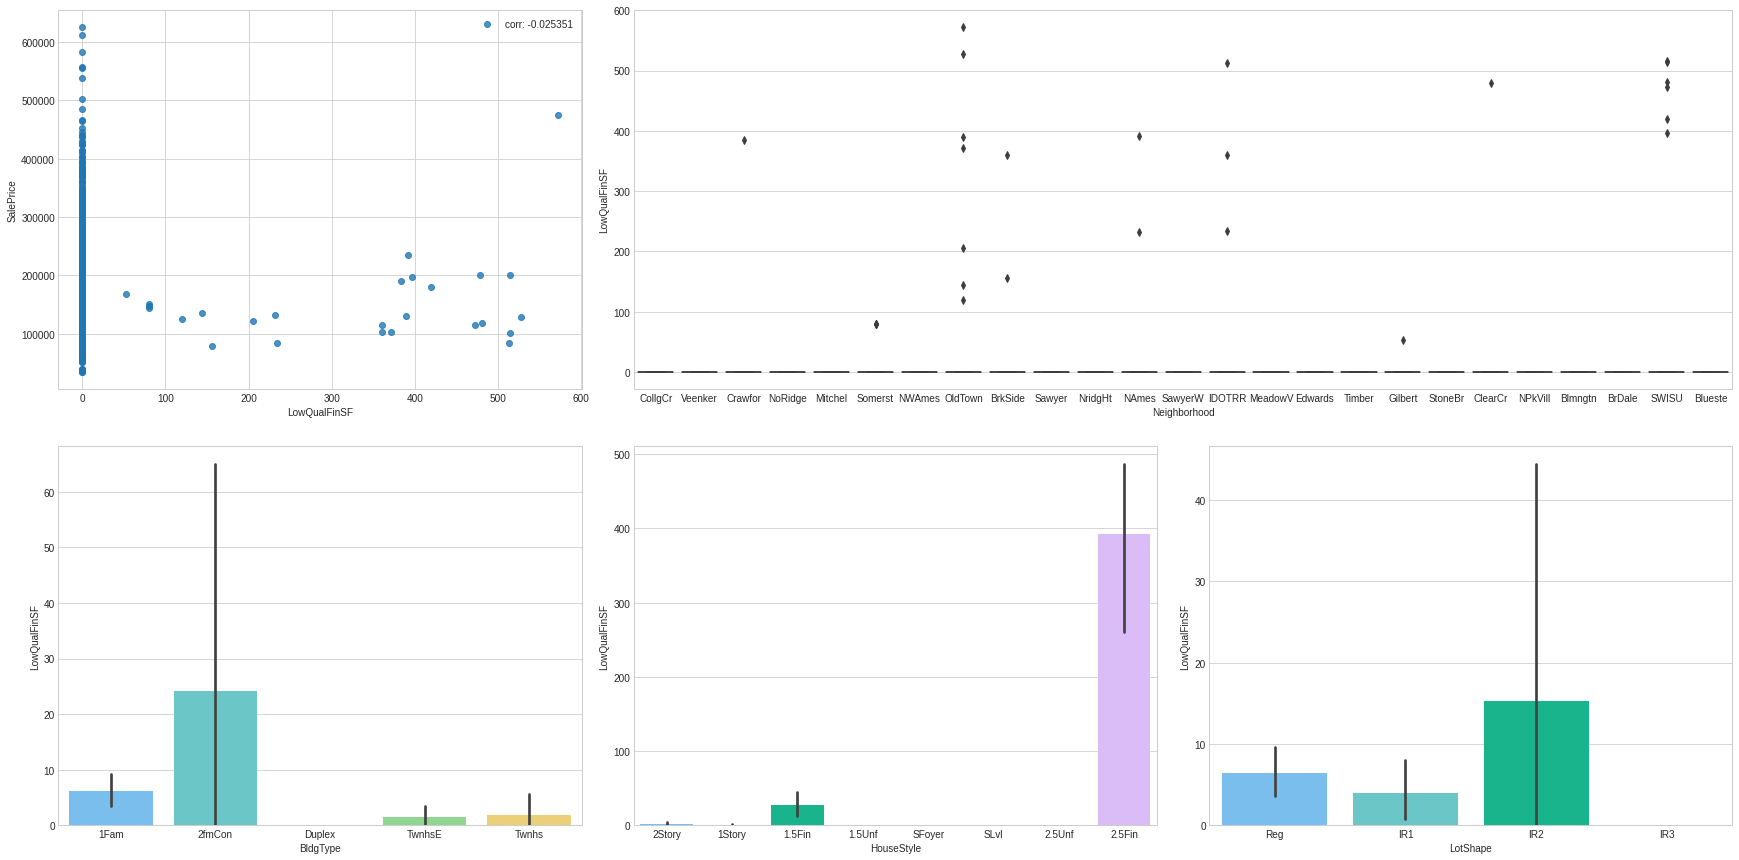

In [283]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['LowQualFinSF'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['LowQualFinSF'], train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="LowQualFinSF", data=train, palette = mycols)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="LowQualFinSF", data=train, palette = mycols)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="LowQualFinSF", data=train, palette = mycols)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="LowQualFinSF", data=train, palette = mycols);

There are a large number of properties with a value of zero, and very few for anything else. I will flag this continuous variable.

In [284]:
all['LowQualFinSF_Flag'] = all['LowQualFinSF'].map(lambda x:0 if x==0 else 1)
all.drop('LowQualFinSF', axis=1, inplace=True)

***BsmtHalfBath***, ***BsmtFullBath***, ***HalfBath***, ***FullBath***

- Number of bathrooms.

I just summed these variables to get the total amount of bathrooms.

In [285]:
all['TotalBathrooms'] = all['BsmtHalfBath'] + all['BsmtFullBath'] + all['HalfBath'] + all['FullBath']

columns = ['BsmtHalfBath', 'BsmtFullBath', 'HalfBath', 'FullBath']
all.drop(columns, axis=1, inplace=True)

***Bedroom***
- Bedrooms above grade (does not include basement bedrooms)

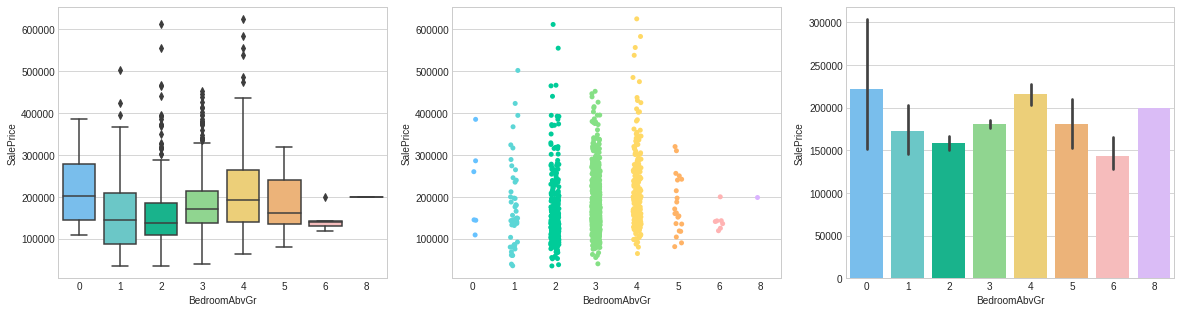

In [286]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BedroomAbvGr", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="BedroomAbvGr", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="BedroomAbvGr", y="SalePrice", data=train, palette = mycols);

- We see a lot of houses with 2 3 and 4 bedrooms above ground, and a very low number of houses with 6 or above.
- Since this is a continuous numeric feature, I will leave it how it is.

***Kitchen***
- Kitchens above grade.

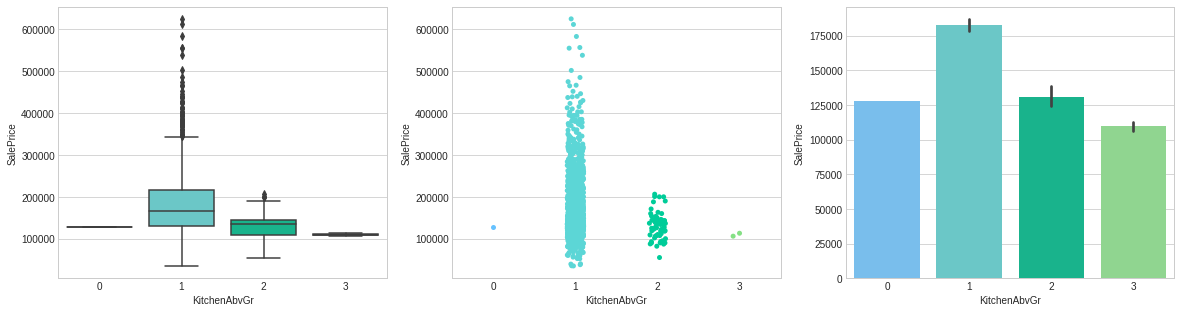

In [287]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="KitchenAbvGr", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="KitchenAbvGr", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="KitchenAbvGr", y="SalePrice", data=train, palette = mycols);

- Similarly to last previous feature, we see just a small number of houses with a large number of kitchens above grade. This shows that most houses have 1 kitchen above grade.
- Since this is a continuous numeric feature, I will leave it as it is.

***KitchenQual***
- Kitchen quality.
       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor


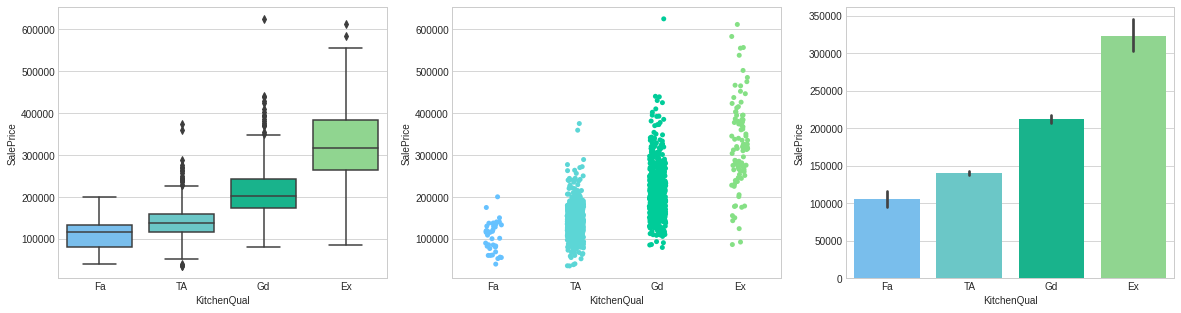

In [288]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="KitchenQual", y="SalePrice", data=train, order=["Fa", "TA", "Gd", "Ex"], palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="KitchenQual", y="SalePrice", data=train, size = 5, jitter = True, order=["Fa", "TA", "Gd", "Ex"], palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="KitchenQual", y="SalePrice", data=train, order=["Fa", "TA", "Gd", "Ex"], palette = mycols);

There is a clear positive correlation between SalePrice and KitchenQual. These values are ordinal so I will replace them by hand.

In [289]:
all['KitchenQual'] = all['KitchenQual'].map({"Fa":1, "TA":2, "Gd":3, "Ex":4})
all['KitchenQual'].unique()

array([3, 2, 4, 1])

***TotRmsAbvGrd***
- Total rooms above grade (does not include bathrooms)

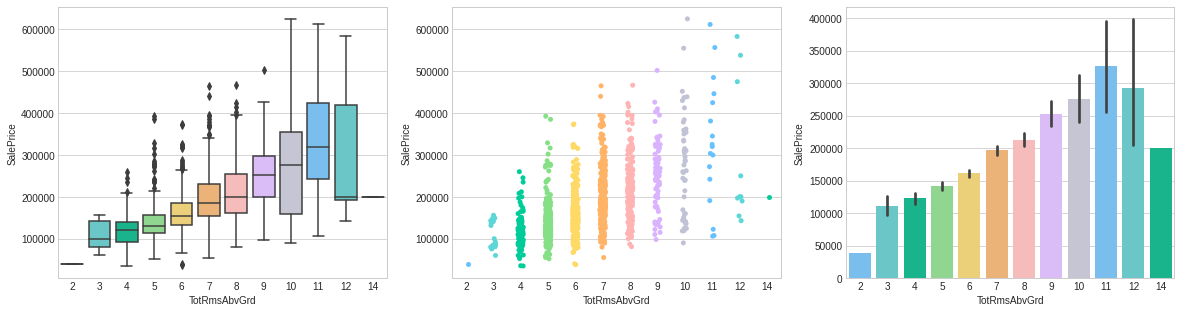

In [290]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="TotRmsAbvGrd", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="TotRmsAbvGrd", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="TotRmsAbvGrd", y="SalePrice", data=train, palette = mycols);

There is a positive correlation between SalePrice and the number of rooms. However, most of the data is concentrated around the middle points so the extreme high and low values are less reliable. I will leave this continuous feature as is.

***Fireplaces***
- Number of fireplaces.

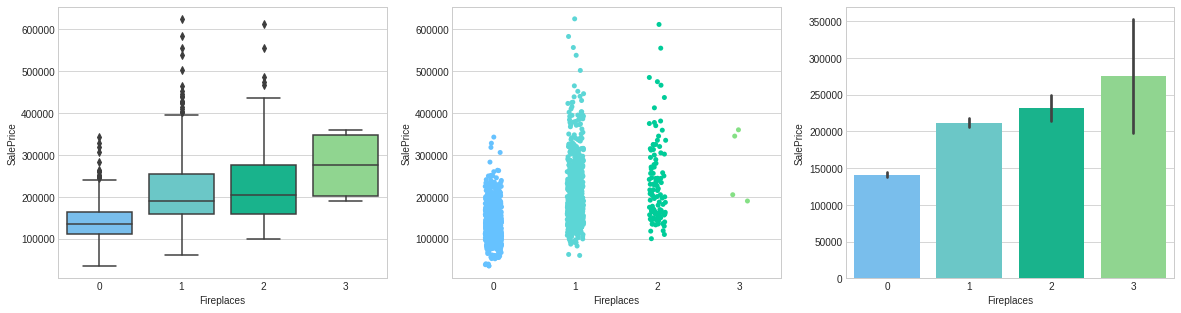

In [291]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="Fireplaces", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="Fireplaces", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="Fireplaces", y="SalePrice", data=train, palette = mycols);

There is a positive correlation between SalePrice and the number of fire places, but most homes either have 1 or no fire places. I will leave this continuous feature as is.

***FireplaceQu***
- Fireplace quality.
       Ex	Excellent - Exceptional Masonry Fireplace
       Gd	Good - Masonry Fireplace in main level
       TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
       Fa	Fair - Prefabricated Fireplace in basement
       Po	Poor - Ben Franklin Stove
       NA	No Fireplace

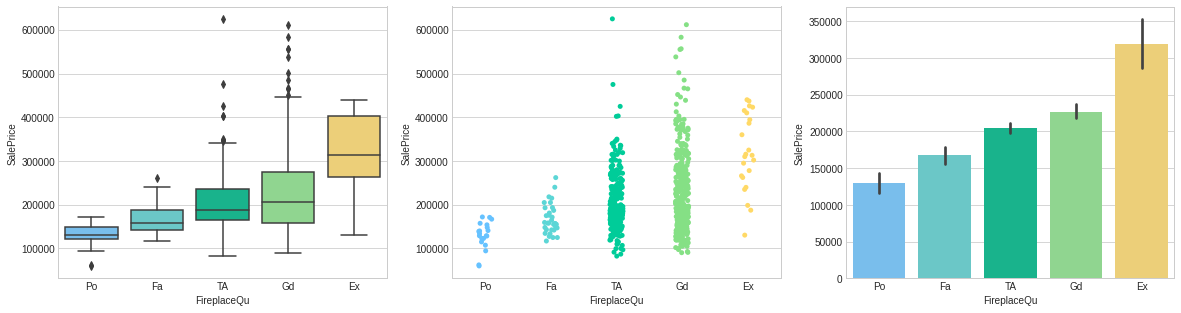

In [292]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="FireplaceQu", y="SalePrice", data=train, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="FireplaceQu", y="SalePrice", data=train, size = 5, jitter = True, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="FireplaceQu", y="SalePrice", data=train, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols);

There is a positive correlation between SalePrice and the quality of the fireplace, and most houses either have Average or Fair quality fireplaces. Because this is an ordinal feature, I will replace the values by hand.

In [293]:
all['FireplaceQu'] = all['FireplaceQu'].map({"None":0, "Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})
all['FireplaceQu'].unique()

array([0, 3, 4, 2, 5, 1])

***GrLivArea***
- Above grade ground living area in square feet.

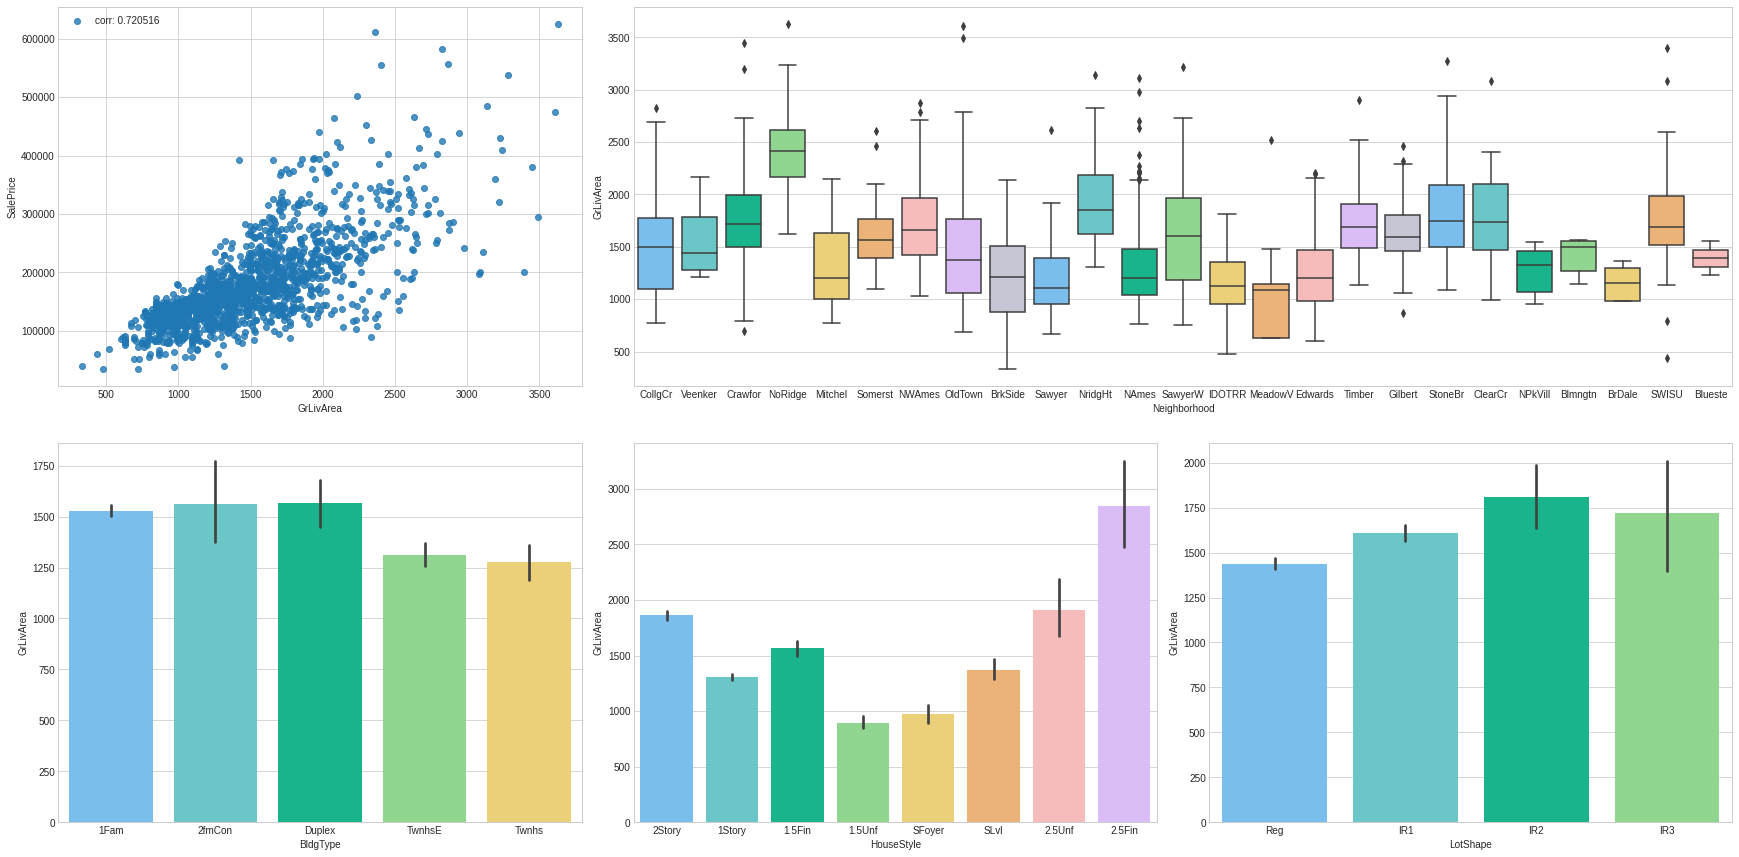

In [294]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['GrLivArea'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['GrLivArea'], train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="GrLivArea", data=train, palette = mycols)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="GrLivArea", data=train, palette = mycols)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="GrLivArea", data=train, palette = mycols)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="GrLivArea", data=train, palette = mycols);

There is a high positive correlation between between SalePrice and the amount of living area above grade. It also varies between BldgType, HouseStyle, LotShape, and Neighborhood. Because this feature is continuous, I will cut it into six bins.

In [295]:
all['GrLivArea_Band'] = pd.cut(all['GrLivArea'], 6)
all['GrLivArea_Band'].unique()

[(1127.5, 1921.0], (1921.0, 2714.5], (329.239, 1127.5], (2714.5, 3508.0], (3508.0, 4301.5], (4301.5, 5095.0]]
Categories (6, interval[float64]): [(329.239, 1127.5] < (1127.5, 1921.0] < (1921.0, 2714.5] <
                                    (2714.5, 3508.0] < (3508.0, 4301.5] < (4301.5, 5095.0]]

In [296]:
all.loc[all['GrLivArea']<=1127.5, 'GrLivArea'] = 1
all.loc[(all['GrLivArea']>1127.5) & (all['GrLivArea']<=1921), 'GrLivArea'] = 2
all.loc[(all['GrLivArea']>1921) & (all['GrLivArea']<=2714.5), 'GrLivArea'] = 3
all.loc[(all['GrLivArea']>2714.5) & (all['GrLivArea']<=3508), 'GrLivArea'] = 4
all.loc[(all['GrLivArea']>3508) & (all['GrLivArea']<=4301.5), 'GrLivArea'] = 5
all.loc[all['GrLivArea']>4301.5, 'GrLivArea'] = 6
all['GrLivArea'] = all['GrLivArea'].astype(int)

all.drop('GrLivArea_Band', axis=1, inplace=True)

all = pd.get_dummies(all, columns = ["GrLivArea"], prefix="GrLivArea")
all.head(3)

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour  \
0         60       RL         65.0     8450   Pave  None      Reg         Lvl   
1         20       RL         80.0     9600   Pave  None      Reg         Lvl   
2         60       RL         68.0    11250   Pave  None      IR1         Lvl   

  LotConfig LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       FR2       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2    Inside       Gtl      CollgCr       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            7            5       2003          2003     Gable  CompShg   
1            6            8       1976          1976     Gable  CompShg   
2            7            5       2001          2002     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   

  Foundation  BsmtQual  BsmtCond  BsmtExposure Heating HeatingQC CentralAir  \
0      PConc         3         3             1    GasA        Ex          Y   
1     CBlock         3         3             4    GasA        Ex          Y   
2      PConc         3         3             2    GasA        Ex          Y   

  Electrical  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0      SBrkr             3             1            3             8   
1      SBrkr             3             1            2             6   
2      SBrkr             3             1            3             6   

  Functional  Fireplaces  ...  BsmtFinSF1_3 BsmtFinSF1_4  BsmtFinType2_ALQ  \
0        Typ           0  ...             0            0                 0   
1        Typ           1  ...             0            0                 0   
2        Typ           1  ...             0            0                 0   

  BsmtFinType2_BLQ  BsmtFinType2_GLQ  BsmtFinType2_LwQ BsmtFinType2_None  \
0                0                 0                 0                 0   
1                0                 0                 0                 0   
2                0                 0                 0                 0   

  BsmtFinType2_Rec BsmtFinType2_Unf  BsmtFinSf2_Flag  BsmtUnfSF_1  \
0                0                1                0            1   
1                0                1                0            1   
2                0                1                0            1   

   BsmtUnfSF_2  BsmtUnfSF_3  TotalBsmtSF_1  TotalBsmtSF_2 TotalBsmtSF_3  \
0            0            0              0              1             0   
1            0            0              0              0             1   
2            0            0              0              1             0   

  TotalBsmtSF_4 TotalBsmtSF_5  TotalBsmtSF_6 TotalBsmtSF_7 TotalBsmtSF_8  \
0             0             0              0             0             0   
1             0             0              0             0             0   
2             0             0              0             0             0   

  1stFlrSF_1 1stFlrSF_2  1stFlrSF_3  1stFlrSF_4  1stFlrSF_5  1stFlrSF_6  \
0          1          0           0           0           0           0   
1          0          1           0           0           0           0   
2          1          0           0           0           0           0   

   2ndFlrSF_1  2ndFlrSF_2  2ndFlrSF_3  2ndFlrSF_4  2ndFlrSF_5  2ndFlrSF_6  \
0           0           0           1           0           0           0   
1           1           0           0           0           0           0   
2           0           0           1           0           0           0   

   LowQualFinSF_Flag  TotalBathrooms  GrLivArea_1  Gr

<a id='architectural_&_structural'></a>
#### 4.2.3 - Architectural & Structural

***MSSubClass***
- Identifies the type of dwelling involved in the sale.

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

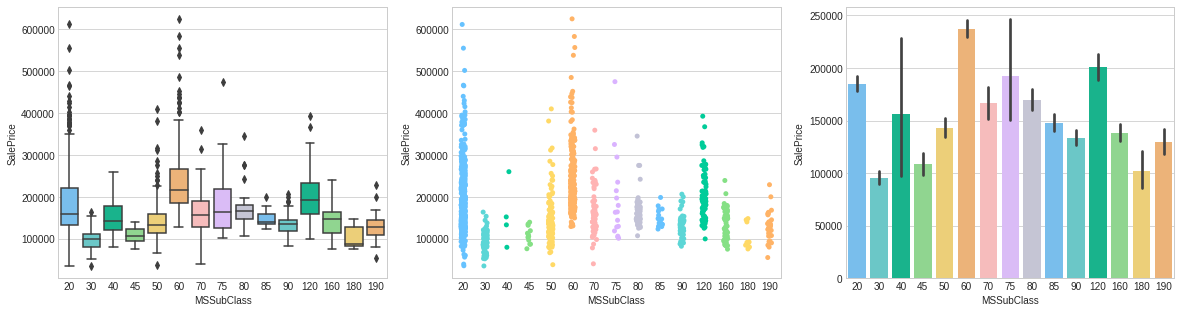

In [297]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="MSSubClass", y="SalePrice", data=train, palette = mycols);

plt.subplot(1, 3, 2)
sns.stripplot(x="MSSubClass", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="MSSubClass", y="SalePrice", data=train, palette = mycols);

Each class represents a style of the building with the highest averages for 1 and 2 story homes built after 1946. There is also large variance between each class, and although it is a continuous variable, it actually should be categorical. I will create dummy variables.

In [298]:
all['MSSubClass'] = all['MSSubClass'].astype(str)

all = pd.get_dummies(all, columns = ["MSSubClass"], prefix="MSSubClass")
all.head(3)

MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour LotConfig  \
0       RL         65.0     8450   Pave  None      Reg         Lvl    Inside   
1       RL         80.0     9600   Pave  None      Reg         Lvl       FR2   
2       RL         68.0    11250   Pave  None      IR1         Lvl    Inside   

  LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
0       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
1       Gtl      Veenker      Feedr       Norm     1Fam     1Story   
2       Gtl      CollgCr       Norm       Norm     1Fam     2Story   

   OverallQual  OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl  \
0            7            5       2003          2003     Gable  CompShg   
1            6            8       1976          1976     Gable  CompShg   
2            7            5       2001          2002     Gable  CompShg   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   

  Foundation  BsmtQual  BsmtCond  BsmtExposure Heating HeatingQC CentralAir  \
0      PConc         3         3             1    GasA        Ex          Y   
1     CBlock         3         3             4    GasA        Ex          Y   
2      PConc         3         3             2    GasA        Ex          Y   

  Electrical  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0      SBrkr             3             1            3             8   
1      SBrkr             3             1            2             6   
2      SBrkr             3             1            3             6   

  Functional  Fireplaces  FireplaceQu  ... TotalBsmtSF_4  TotalBsmtSF_5  \
0        Typ           0            0  ...             0              0   
1        Typ           1            3  ...             0              0   
2        Typ           1            3  ...             0              0   

  TotalBsmtSF_6  TotalBsmtSF_7  TotalBsmtSF_8 1stFlrSF_1 1stFlrSF_2  \
0             0              0              0          1          0   
1             0              0              0          0          1   
2             0              0              0          1          0   

  1stFlrSF_3  1stFlrSF_4  1stFlrSF_5  1stFlrSF_6  2ndFlrSF_1  2ndFlrSF_2  \
0          0           0           0           0           0           0   
1          0           0           0           0           1           0   
2          0           0           0           0           0           0   

   2ndFlrSF_3 2ndFlrSF_4 2ndFlrSF_5 2ndFlrSF_6  LowQualFinSF_Flag  \
0           1          0          0          0                  0   
1           0          0          0          0                  0   
2           1          0          0          0                  0   

  TotalBathrooms GrLivArea_1 GrLivArea_2 GrLivArea_3  GrLivArea_4  \
0            4.0           0           1           0            0   
1            3.0           0           1           0            0   
2            4.0           0           1           0            0   

   GrLivArea_5  GrLivArea_6  MSSubClass_120  MSSubClass_150  MSSubClass_160  \
0            0            0               0               0               0   
1            0            0               0               0               0   
2            0            0               0               0               0   

   MSSubClass_180  MSSubClass_190  MSSubClass_20  MSSubClass_30  \
0               0               0              0              0   
1               0               0              1              0   
2               0               0              0              0   

   MSSubClass_40  MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  \
0              0              0              0              1              0   
1              0 

***BldgType***
- Type of dwelling.

       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit

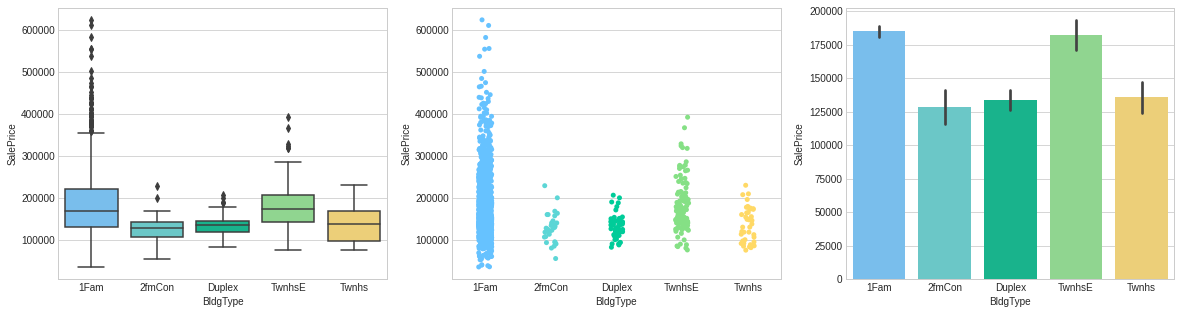

In [299]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="BldgType", y="SalePrice", data=train, palette = mycols);

plt.subplot(1, 3, 2)
sns.stripplot(x="BldgType", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="BldgType", y="SalePrice", data=train, palette = mycols);

The majority of the data fall within the "1Fam" category, and not much variance in the other categories. I will create dummy features.

In [300]:
all['BldgType'] = all['BldgType'].astype(str)

all = pd.get_dummies(all, columns = ["BldgType"], prefix="BldgType")
all.head(3)

MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour LotConfig  \
0       RL         65.0     8450   Pave  None      Reg         Lvl    Inside   
1       RL         80.0     9600   Pave  None      Reg         Lvl       FR2   
2       RL         68.0    11250   Pave  None      IR1         Lvl    Inside   

  LandSlope Neighborhood Condition1 Condition2 HouseStyle  OverallQual  \
0       Gtl      CollgCr       Norm       Norm     2Story            7   
1       Gtl      Veenker      Feedr       Norm     1Story            6   
2       Gtl      CollgCr       Norm       Norm     2Story            7   

   OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st  \
0            5       2003          2003     Gable  CompShg     VinylSd   
1            8       1976          1976     Gable  CompShg     MetalSd   
2            5       2001          2002     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation  BsmtQual  \
0     VinylSd    BrkFace       196.0        Gd        TA      PConc         3   
1     MetalSd       None         0.0        TA        TA     CBlock         3   
2     VinylSd    BrkFace       162.0        Gd        TA      PConc         3   

   BsmtCond  BsmtExposure Heating HeatingQC CentralAir Electrical  \
0         3             1    GasA        Ex          Y      SBrkr   
1         3             4    GasA        Ex          Y      SBrkr   
2         3             2    GasA        Ex          Y      SBrkr   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd Functional  \
0             3             1            3             8        Typ   
1             3             1            2             6        Typ   
2             3             1            3             6        Typ   

   Fireplaces  FireplaceQu GarageType  ...  1stFlrSF_1 1stFlrSF_2  1stFlrSF_3  \
0           0            0     Attchd  ...           1          0           0   
1           1            3     Attchd  ...           0          1           0   
2           1            3     Attchd  ...           1          0           0   

   1stFlrSF_4 1stFlrSF_5 1stFlrSF_6 2ndFlrSF_1  2ndFlrSF_2  2ndFlrSF_3  \
0           0          0          0          0           0           1   
1           0          0          0          1           0           0   
2           0          0          0          0           0           1   

   2ndFlrSF_4  2ndFlrSF_5  2ndFlrSF_6  LowQualFinSF_Flag TotalBathrooms  \
0           0           0           0                  0            4.0   
1           0           0           0                  0            3.0   
2           0           0           0                  0            4.0   

  GrLivArea_1 GrLivArea_2  GrLivArea_3 GrLivArea_4 GrLivArea_5 GrLivArea_6  \
0           0           1            0           0           0           0   
1           0           1            0           0           0           0   
2           0           1            0           0           0           0   

  MSSubClass_120  MSSubClass_150  MSSubClass_160  MSSubClass_180  \
0              0               0               0               0   
1              0               0               0               0   
2              0               0               0               0   

   MSSubClass_190  MSSubClass_20  MSSubClass_30  MSSubClass_40  MSSubClass_45  \
0               0              0              0              0              0   
1               0              1              0              0              0   
2               0              0              0              0              0   

   MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
0              0              1              0              0              0   
1              0              0              0              0              0   
2              0              1              0              0              0   

   MSSubClass_85  MSSubClass_90  BldgType_1Fa

***HouseStyle***
- Style of dwelling.
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

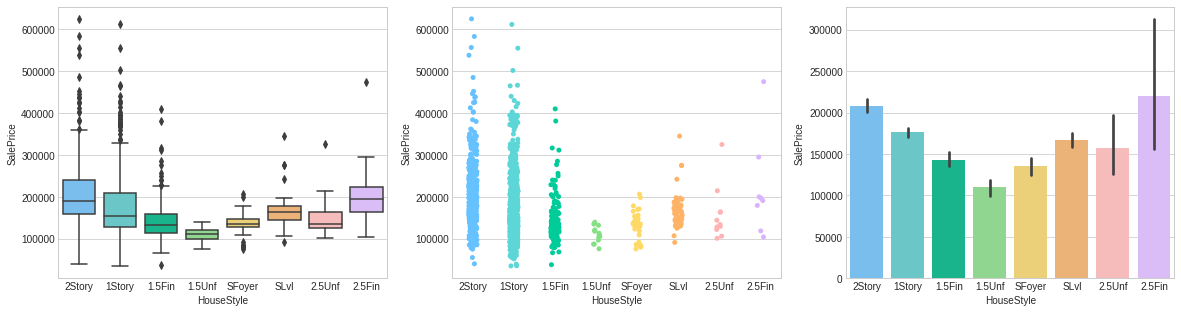

In [301]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="HouseStyle", y="SalePrice", data=train, palette = mycols);

plt.subplot(1, 3, 2)
sns.stripplot(x="HouseStyle", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="HouseStyle", y="SalePrice", data=train, palette = mycols);

Most of the data belongs to both the 2Story and 1Story categories. There are also some extremes especially in the 2.5 level categories. I will cluster a few of these categories because some have so few values in it.

In [302]:
all['HouseStyle'] = all['HouseStyle'].map({"2Story":"2Story", "1Story":"1Story", "1.5Fin":"1.5Story", "1.5Unf":"1.5Story", 
                                                     "SFoyer":"SFoyer", "SLvl":"SLvl", "2.5Unf":"2.5Story", "2.5Fin":"2.5Story"})

all = pd.get_dummies(all, columns = ["HouseStyle"], prefix="HouseStyle")
all.head(3)

MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour LotConfig  \
0       RL         65.0     8450   Pave  None      Reg         Lvl    Inside   
1       RL         80.0     9600   Pave  None      Reg         Lvl       FR2   
2       RL         68.0    11250   Pave  None      IR1         Lvl    Inside   

  LandSlope Neighborhood Condition1 Condition2  OverallQual  OverallCond  \
0       Gtl      CollgCr       Norm       Norm            7            5   
1       Gtl      Veenker      Feedr       Norm            6            8   
2       Gtl      CollgCr       Norm       Norm            7            5   

   YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd  \
0       2003          2003     Gable  CompShg     VinylSd     VinylSd   
1       1976          1976     Gable  CompShg     MetalSd     MetalSd   
2       2001          2002     Gable  CompShg     VinylSd     VinylSd   

  MasVnrType  MasVnrArea ExterQual ExterCond Foundation  BsmtQual  BsmtCond  \
0    BrkFace       196.0        Gd        TA      PConc         3         3   
1       None         0.0        TA        TA     CBlock         3         3   
2    BrkFace       162.0        Gd        TA      PConc         3         3   

   BsmtExposure Heating HeatingQC CentralAir Electrical  BedroomAbvGr  \
0             1    GasA        Ex          Y      SBrkr             3   
1             4    GasA        Ex          Y      SBrkr             3   
2             2    GasA        Ex          Y      SBrkr             3   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd Functional  Fireplaces  \
0             1            3             8        Typ           0   
1             1            2             6        Typ           1   
2             1            3             6        Typ           1   

   FireplaceQu GarageType  GarageYrBlt  ... 2ndFlrSF_1  2ndFlrSF_2  \
0            0     Attchd       2003.0  ...          0           0   
1            3     Attchd       1976.0  ...          1           0   
2            3     Attchd       2001.0  ...          0           0   

   2ndFlrSF_3 2ndFlrSF_4 2ndFlrSF_5 2ndFlrSF_6  LowQualFinSF_Flag  \
0           1          0          0          0                  0   
1           0          0          0          0                  0   
2           1          0          0          0                  0   

   TotalBathrooms  GrLivArea_1  GrLivArea_2  GrLivArea_3  GrLivArea_4  \
0             4.0            0            1            0            0   
1             3.0            0            1            0            0   
2             4.0            0            1            0            0   

  GrLivArea_5 GrLivArea_6 MSSubClass_120  MSSubClass_150 MSSubClass_160  \
0           0           0              0               0              0   
1           0           0              0               0              0   
2           0           0              0               0              0   

  MSSubClass_180 MSSubClass_190 MSSubClass_20  MSSubClass_30  MSSubClass_40  \
0              0              0             0              0              0   
1              0              0             1              0              0   
2              0              0             0              0              0   

   MSSubClass_45  MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  \
0              0              0              1              0              0   
1              0              0              0              0              0   
2              0              0              1              0              0   

   MSSubClass_80  MSSubClass_85  MSSubClass_90  BldgType_1Fam  \
0              0              0              0              1   
1              0              0              0              1   
2              0              0              0              1   

   BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  \
0                0                0               0                0   
1

***OverallQual***
- Rates the overall material and finish of the house.
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

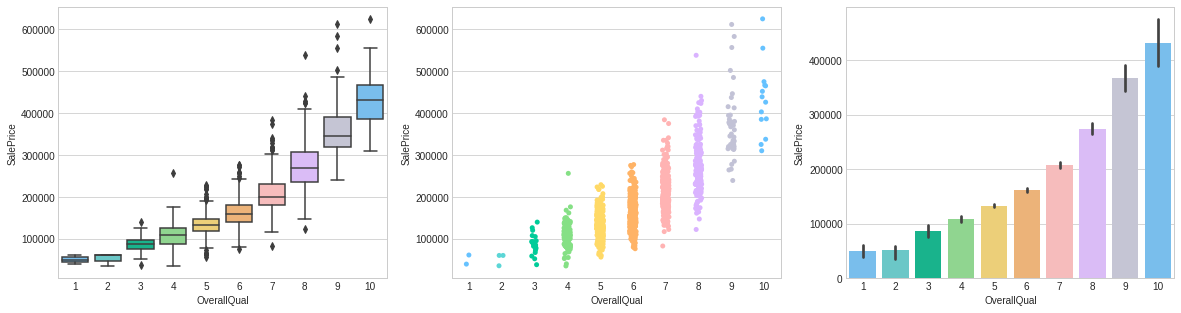

In [303]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="OverallQual", y="SalePrice", data=train, palette = mycols);

plt.subplot(1, 3, 2)
sns.stripplot(x="OverallQual", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="OverallQual", y="SalePrice", data=train, palette = mycols);

This numeric feature is actually ordinal with SalePrice increasing as OverallQual increases. I will keep it as is. 

***OverallCond***
- Rates the overall condition of the house.
       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

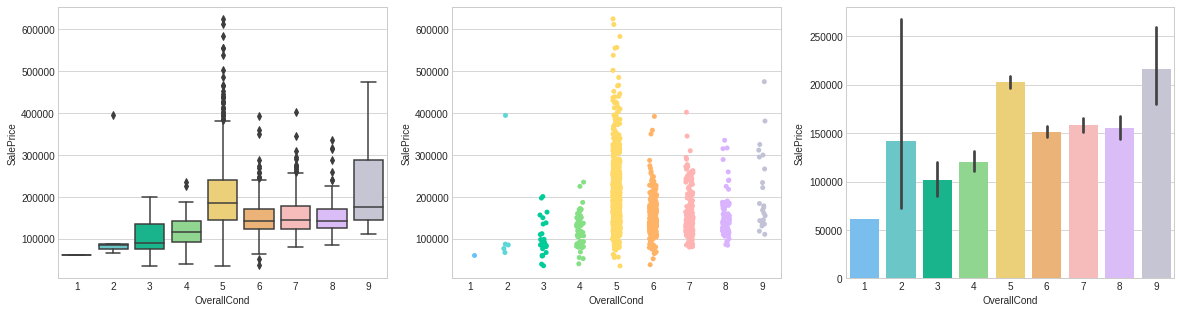

In [304]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="OverallCond", y="SalePrice", data=train, palette = mycols);

plt.subplot(1, 3, 2)
sns.stripplot(x="OverallCond", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="OverallCond", y="SalePrice", data=train, palette = mycols);

OverallCond is an ordinal feature despite it being numeric. It's interesting as the category 5 has the most number of data points and the highest median. I will leave it as is.

***YearRemodAdd***
- Remodel date (same as construction date if no remodeling or additions).

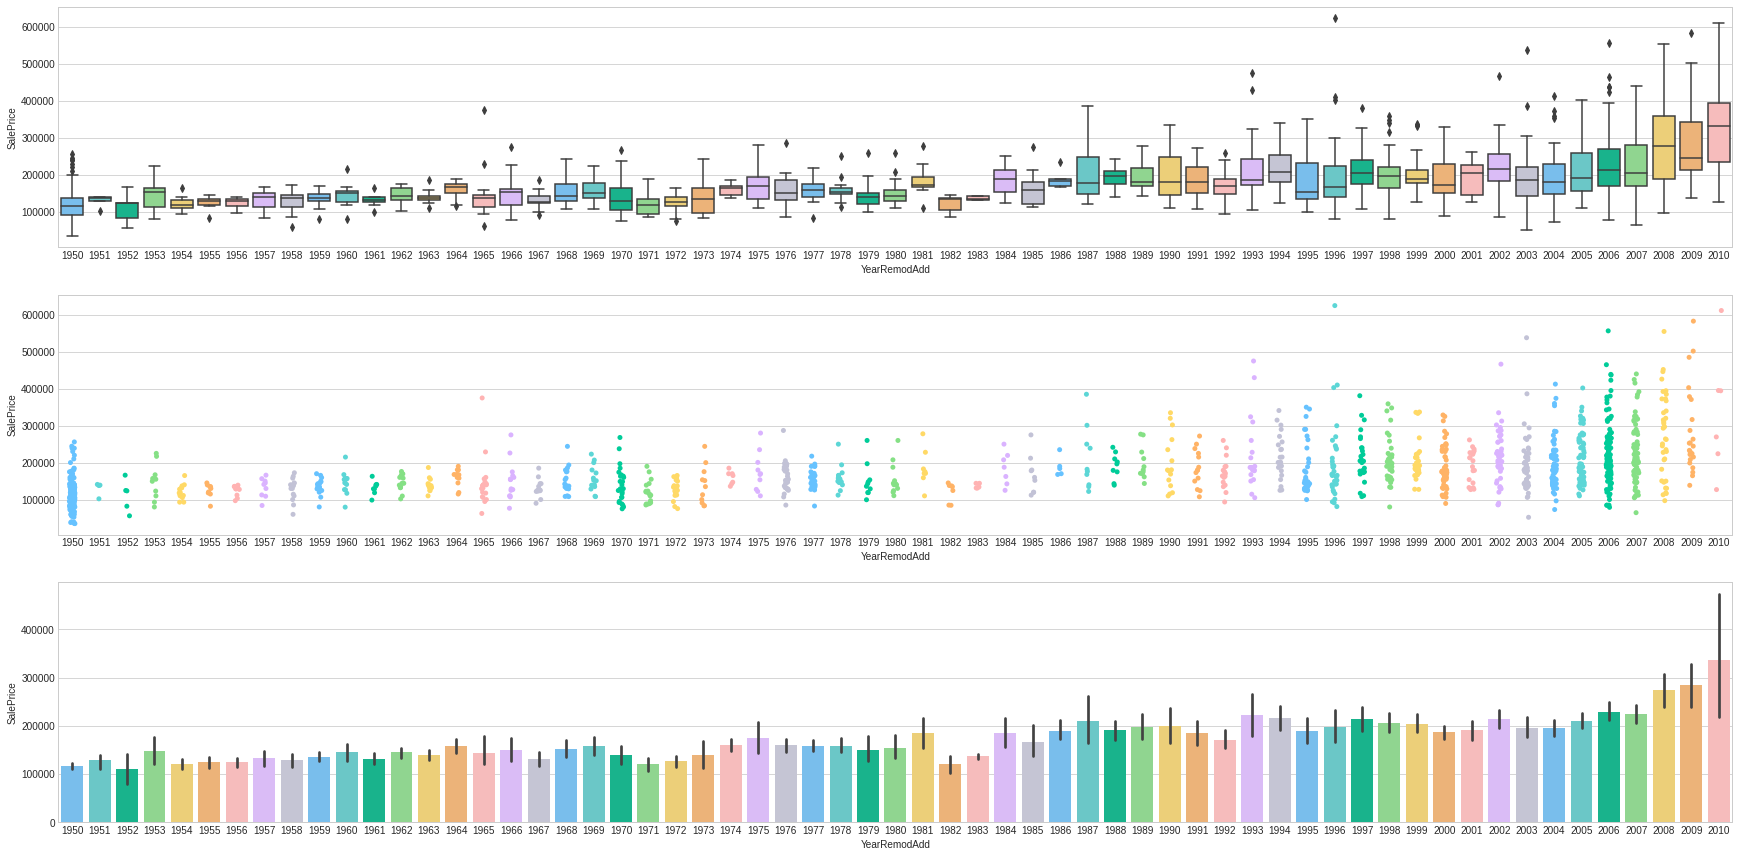

In [305]:
plt.subplots(figsize =(30, 15))

plt.subplot(3, 1, 1)
sns.boxplot(x="YearRemodAdd", y="SalePrice", data=train, palette = mycols);

plt.subplot(3, 1, 2)
sns.stripplot(x="YearRemodAdd", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(3, 1, 3)
sns.barplot(x="YearRemodAdd", y="SalePrice", data=train, palette = mycols);

This feature shows that the newer the remodeling of a home, the higher the SalePrice. However, creating a new feature that takes the difference in number of years between remodeling and original construction might be a better feature.

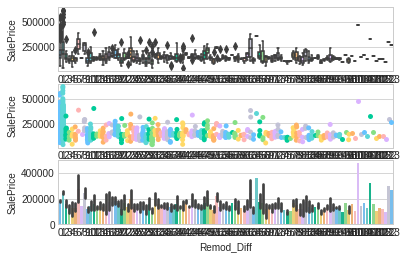

In [306]:
train['Remod_Diff'] = train['YearRemodAdd'] - train['YearBuilt']

plt.subplot(3, 1, 1)
sns.boxplot(x="Remod_Diff", y="SalePrice", data=train, palette = mycols);

plt.subplot(3, 1, 2)
sns.stripplot(x="Remod_Diff", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(3, 1, 3)
sns.barplot(x="Remod_Diff", y="SalePrice", data=train, palette = mycols);

This new feature does not show a strictly positive correlation between SalePrice and years between remodels. I will leave the variable as is and remove Remod_Diff

In [307]:
all['Remod_Diff'] = all['YearRemodAdd'] - all['YearBuilt']

all.drop('YearRemodAdd', axis=1, inplace=True)

***YearBuilt***
- Original construction date.

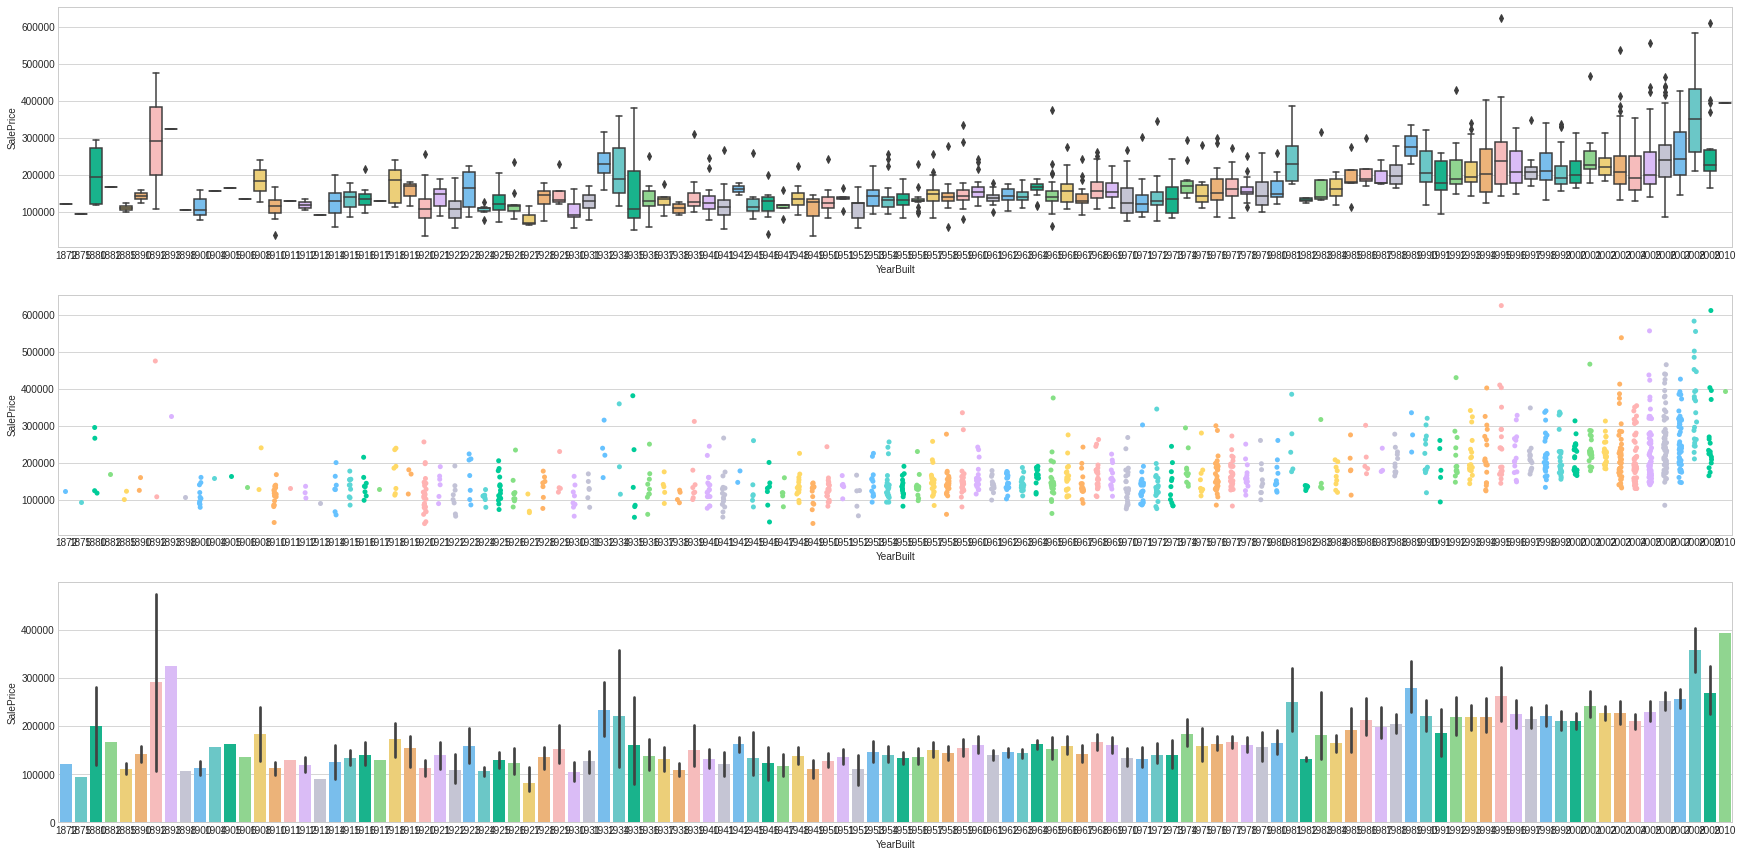

In [308]:
plt.subplots(figsize =(30, 15))

plt.subplot(3, 1, 1)
sns.boxplot(x="YearBuilt", y="SalePrice", data=train, palette = mycols);

plt.subplot(3, 1, 2)
sns.stripplot(x="YearBuilt", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(3, 1, 3)
sns.barplot(x="YearBuilt", y="SalePrice", data=train, palette = mycols);


As houses become more modern, I can see a fairly consistent positive trend. I will cut and bin this feature.

In [309]:
all['YearBuilt_Band'] = pd.cut(all['YearBuilt'], 7)
all['YearBuilt_Band'].unique()

[(1990.286, 2010.0], (1970.571, 1990.286], (1911.429, 1931.143], (1931.143, 1950.857], (1950.857, 1970.571], (1891.714, 1911.429], (1871.862, 1891.714]]
Categories (7, interval[float64]): [(1871.862, 1891.714] < (1891.714, 1911.429] < (1911.429, 1931.143] <
                                    (1931.143, 1950.857] < (1950.857, 1970.571] < (1970.571, 1990.286] <
                                    (1990.286, 2010.0]]

In [310]:
all.loc[all['YearBuilt']<=1892, 'YearBuilt'] = 1
all.loc[(all['YearBuilt']>1892) & (all['YearBuilt']<=1911), 'YearBuilt'] = 2
all.loc[(all['YearBuilt']>1911) & (all['YearBuilt']<=1931), 'YearBuilt'] = 3
all.loc[(all['YearBuilt']>1931) & (all['YearBuilt']<=1951), 'YearBuilt'] = 4
all.loc[(all['YearBuilt']>1951) & (all['YearBuilt']<=1971), 'YearBuilt'] = 5
all.loc[(all['YearBuilt']>1971) & (all['YearBuilt']<=1990), 'YearBuilt'] = 6
all.loc[all['YearBuilt']>1990, 'YearBuilt'] = 7
all['YearBuilt'] = all['YearBuilt'].astype(int)

all.drop('YearBuilt_Band', axis=1, inplace=True)

all = pd.get_dummies(all, columns = ["YearBuilt"], prefix="YearBuilt")
all.head(3)

MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour LotConfig  \
0       RL         65.0     8450   Pave  None      Reg         Lvl    Inside   
1       RL         80.0     9600   Pave  None      Reg         Lvl       FR2   
2       RL         68.0    11250   Pave  None      IR1         Lvl    Inside   

  LandSlope Neighborhood Condition1 Condition2  OverallQual  OverallCond  \
0       Gtl      CollgCr       Norm       Norm            7            5   
1       Gtl      Veenker      Feedr       Norm            6            8   
2       Gtl      CollgCr       Norm       Norm            7            5   

  RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd   
1     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA   
2     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd   

  ExterCond Foundation  BsmtQual  BsmtCond  BsmtExposure Heating HeatingQC  \
0        TA      PConc         3         3             1    GasA        Ex   
1        TA     CBlock         3         3             4    GasA        Ex   
2        TA      PConc         3         3             2    GasA        Ex   

  CentralAir Electrical  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0          Y      SBrkr             3             1            3   
1          Y      SBrkr             3             1            2   
2          Y      SBrkr             3             1            3   

   TotRmsAbvGrd Functional  Fireplaces  FireplaceQu GarageType  GarageYrBlt  \
0             8        Typ           0            0     Attchd       2003.0   
1             6        Typ           1            3     Attchd       1976.0   
2             6        Typ           1            3     Attchd       2001.0   

  GarageFinish  GarageCars  ...  GrLivArea_1 GrLivArea_2 GrLivArea_3  \
0          RFn         2.0  ...            0           1           0   
1          RFn         2.0  ...            0           1           0   
2          RFn         2.0  ...            0           1           0   

  GrLivArea_4  GrLivArea_5  GrLivArea_6  MSSubClass_120  MSSubClass_150  \
0           0            0            0               0               0   
1           0            0            0               0               0   
2           0            0            0               0               0   

   MSSubClass_160  MSSubClass_180 MSSubClass_190 MSSubClass_20 MSSubClass_30  \
0               0               0              0             0             0   
1               0               0              0             1             0   
2               0               0              0             0             0   

   MSSubClass_40 MSSubClass_45 MSSubClass_50 MSSubClass_60 MSSubClass_70  \
0              0             0             0             1             0   
1              0             0             0             0             0   
2              0             0             0             1             0   

   MSSubClass_75  MSSubClass_80  MSSubClass_85  MSSubClass_90  BldgType_1Fam  \
0              0              0              0              0              1   
1              0              0              0              0              1   
2              0              0              0              0              1   

   BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  \
0                0                0               0                0   
1                0                0               0                0   
2                0                0               0                0   

   HouseStyle_1.5Story  HouseStyle_1Story  HouseStyle_2.5Story  \
0                    0                  0                    0   
1                    0                  1                    0   
2                    0                  0                    0   

   HouseStyle_2Story  HouseStyle_SFoyer  HouseStyle_SLvl 

***Foundation***
- Type of foundation.
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Contrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood

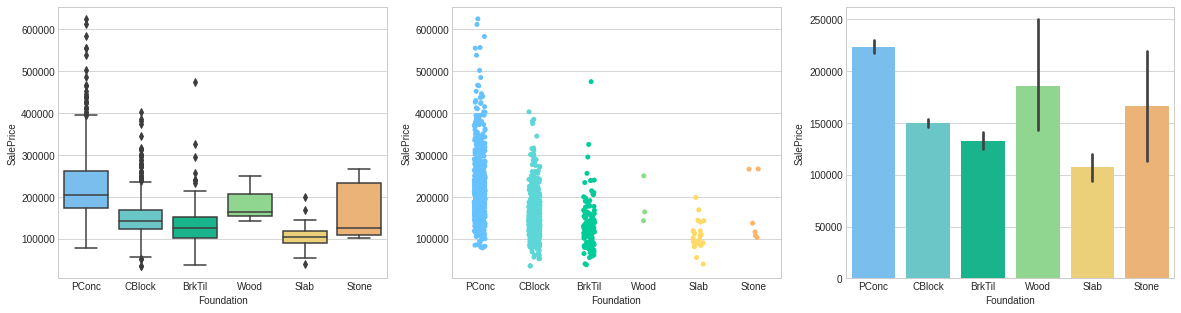

In [311]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="Foundation", y="SalePrice", data=train, palette = mycols);

plt.subplot(1, 3, 2)
sns.stripplot(x="Foundation", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="Foundation", y="SalePrice", data=train, palette = mycols);

The first three classes contain most of the data while the last three are very sparse. I will not cluster the last three together because SalePrice's mean and median are too different from each other. I will create dummy variables for this feature.

In [312]:
all = pd.get_dummies(all, columns = ["Foundation"], prefix="Foundation")
all.head(3)

MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour LotConfig  \
0       RL         65.0     8450   Pave  None      Reg         Lvl    Inside   
1       RL         80.0     9600   Pave  None      Reg         Lvl       FR2   
2       RL         68.0    11250   Pave  None      IR1         Lvl    Inside   

  LandSlope Neighborhood Condition1 Condition2  OverallQual  OverallCond  \
0       Gtl      CollgCr       Norm       Norm            7            5   
1       Gtl      Veenker      Feedr       Norm            6            8   
2       Gtl      CollgCr       Norm       Norm            7            5   

  RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual  \
0     Gable  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd   
1     Gable  CompShg     MetalSd     MetalSd       None         0.0        TA   
2     Gable  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd   

  ExterCond  BsmtQual  BsmtCond  BsmtExposure Heating HeatingQC CentralAir  \
0        TA         3         3             1    GasA        Ex          Y   
1        TA         3         3             4    GasA        Ex          Y   
2        TA         3         3             2    GasA        Ex          Y   

  Electrical  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0      SBrkr             3             1            3             8   
1      SBrkr             3             1            2             6   
2      SBrkr             3             1            3             6   

  Functional  Fireplaces  FireplaceQu GarageType  GarageYrBlt GarageFinish  \
0        Typ           0            0     Attchd       2003.0          RFn   
1        Typ           1            3     Attchd       1976.0          RFn   
2        Typ           1            3     Attchd       2001.0          RFn   

   GarageCars  GarageArea  ... MSSubClass_120 MSSubClass_150 MSSubClass_160  \
0         2.0       548.0  ...              0              0              0   
1         2.0       460.0  ...              0              0              0   
2         2.0       608.0  ...              0              0              0   

   MSSubClass_180  MSSubClass_190  MSSubClass_20  MSSubClass_30  \
0               0               0              0              0   
1               0               0              1              0   
2               0               0              0              0   

   MSSubClass_40  MSSubClass_45 MSSubClass_50 MSSubClass_60 MSSubClass_70  \
0              0              0             0             1             0   
1              0              0             0             0             0   
2              0              0             0             1             0   

   MSSubClass_75 MSSubClass_80 MSSubClass_85 MSSubClass_90 BldgType_1Fam  \
0              0             0             0             0             1   
1              0             0             0             0             1   
2              0             0             0             0             1   

   BldgType_2fmCon  BldgType_Duplex  BldgType_Twnhs  BldgType_TwnhsE  \
0                0                0               0                0   
1                0                0               0                0   
2                0                0               0                0   

   HouseStyle_1.5Story  HouseStyle_1Story  HouseStyle_2.5Story  \
0                    0                  0                    0   
1                    0                  1                    0   
2                    0                  0                    0   

   HouseStyle_2Story  HouseStyle_SFoyer  HouseStyle_SLvl  Remod_Diff  \
0                  1                  0                0           0   
1                  0                  0                0           0   
2                  1                  0                0           1   

   YearBuilt_1  YearBuilt_2  YearBuilt_3  YearBuilt_4  YearBuilt_5  \
0            0            0

***Functional***
- Home functionality.
       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only

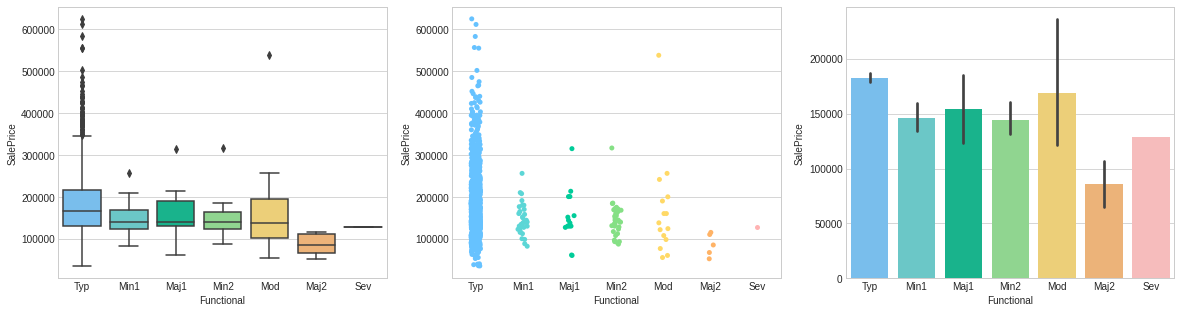

In [313]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="Functional", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="Functional", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="Functional", y="SalePrice", data=train, palette = mycols);

The vast majority of data lie in the Typ category. This is an ordinal feature so I will manually replace each category with a number.

In [314]:
all['Functional'] = all['Functional'].map({"Sev":1, "Maj2":2, "Maj1":3, "Mod":4, "Min2":5, "Min1":6, "Typ":7})
all['Functional'].unique()

array([7, 6, 3, 5, 4, 2, 1])

<a id='exterior'></a>
#### 4.2.4 - Exterior

***RoofStyle***
- Type of roof.

       Flat	    Flat
       Gable	   Gable
       Gambrel	 Gabrel (Barn)
       Hip	     Hip
       Mansard	 Mansard
       Shed	    Shed

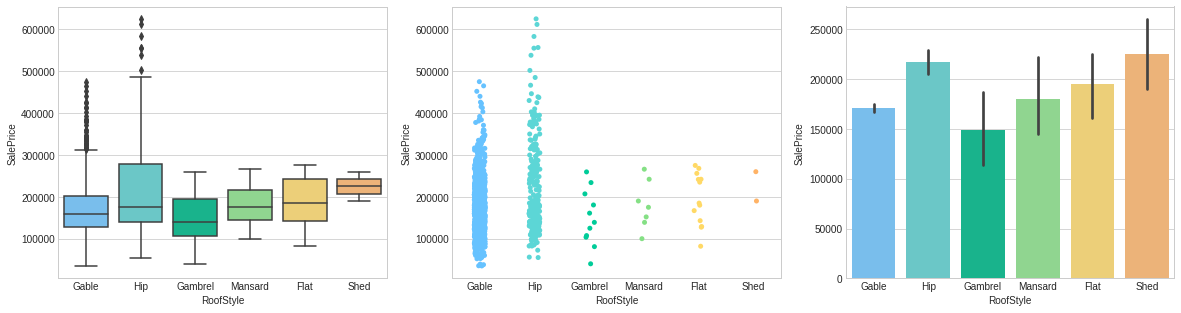

In [315]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="RoofStyle", y="SalePrice", data=train, palette = mycols);

plt.subplot(1, 3, 2)
sns.stripplot(x="RoofStyle", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="RoofStyle", y="SalePrice", data=train, palette = mycols);

Most data lie in the first two categories. I will create dummy features.

In [316]:
all = pd.get_dummies(all, columns = ["RoofStyle"], prefix="RoofStyle")
all.head(3)

MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour LotConfig  \
0       RL         65.0     8450   Pave  None      Reg         Lvl    Inside   
1       RL         80.0     9600   Pave  None      Reg         Lvl       FR2   
2       RL         68.0    11250   Pave  None      IR1         Lvl    Inside   

  LandSlope Neighborhood Condition1 Condition2  OverallQual  OverallCond  \
0       Gtl      CollgCr       Norm       Norm            7            5   
1       Gtl      Veenker      Feedr       Norm            6            8   
2       Gtl      CollgCr       Norm       Norm            7            5   

  RoofMatl Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0  CompShg     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1  CompShg     MetalSd     MetalSd       None         0.0        TA        TA   
2  CompShg     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   

   BsmtQual  BsmtCond  BsmtExposure Heating HeatingQC CentralAir Electrical  \
0         3         3             1    GasA        Ex          Y      SBrkr   
1         3         3             4    GasA        Ex          Y      SBrkr   
2         3         3             2    GasA        Ex          Y      SBrkr   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0             3             1            3             8           7   
1             3             1            2             6           7   
2             3             1            3             6           7   

   Fireplaces  FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  \
0           0            0     Attchd       2003.0          RFn         2.0   
1           1            3     Attchd       1976.0          RFn         2.0   
2           1            3     Attchd       2001.0          RFn         2.0   

   GarageArea GarageQual  ... MSSubClass_30 MSSubClass_40  MSSubClass_45  \
0       548.0         TA  ...             0             0              0   
1       460.0         TA  ...             0             0              0   
2       608.0         TA  ...             0             0              0   

   MSSubClass_50  MSSubClass_60  MSSubClass_70  MSSubClass_75  MSSubClass_80  \
0              0              1              0              0              0   
1              0              0              0              0              0   
2              0              1              0              0              0   

  MSSubClass_85 MSSubClass_90 BldgType_1Fam  BldgType_2fmCon BldgType_Duplex  \
0             0             0             1                0               0   
1             0             0             1                0               0   
2             0             0             1                0               0   

  BldgType_Twnhs BldgType_TwnhsE HouseStyle_1.5Story  HouseStyle_1Story  \
0              0               0                   0                  0   
1              0               0                   0                  1   
2              0               0                   0                  0   

   HouseStyle_2.5Story  HouseStyle_2Story  HouseStyle_SFoyer  HouseStyle_SLvl  \
0                    0                  1                  0                0   
1                    0                  0                  0                0   
2                    0                  1                  0                0   

   Remod_Diff  YearBuilt_1  YearBuilt_2  YearBuilt_3  YearBuilt_4  \
0           0            0            0            0            0   
1           0            0            0            0            0   
2           1            0            0            0            0   

   YearBuilt_5  YearBuilt_6  YearBuilt_7  Foundation_BrkTil  \
0            0            0            1                  0   
1            0            1            0                  0   
2            0            0            1                  0   

   Foundation_CBlock  Fou

***RoofMatl***
- Roof material.
       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	  Metal
       Roll	   Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingle

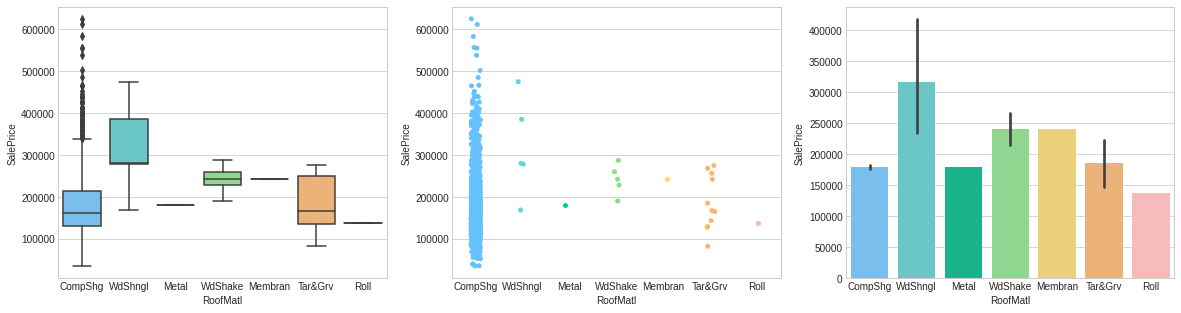

In [317]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="RoofMatl", y="SalePrice", data=train, palette = mycols);

plt.subplot(1, 3, 2)
sns.stripplot(x="RoofMatl", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="RoofMatl", y="SalePrice", data=train, palette = mycols);

Virtually all the data belongs to the CompShg category. I will create dummy variables for now.

In [318]:
all = pd.get_dummies(all, columns = ["RoofMatl"], prefix="RoofMatl")
all.head(3)

MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour LotConfig  \
0       RL         65.0     8450   Pave  None      Reg         Lvl    Inside   
1       RL         80.0     9600   Pave  None      Reg         Lvl       FR2   
2       RL         68.0    11250   Pave  None      IR1         Lvl    Inside   

  LandSlope Neighborhood Condition1 Condition2  OverallQual  OverallCond  \
0       Gtl      CollgCr       Norm       Norm            7            5   
1       Gtl      Veenker      Feedr       Norm            6            8   
2       Gtl      CollgCr       Norm       Norm            7            5   

  Exterior1st Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond  \
0     VinylSd     VinylSd    BrkFace       196.0        Gd        TA   
1     MetalSd     MetalSd       None         0.0        TA        TA   
2     VinylSd     VinylSd    BrkFace       162.0        Gd        TA   

   BsmtQual  BsmtCond  BsmtExposure Heating HeatingQC CentralAir Electrical  \
0         3         3             1    GasA        Ex          Y      SBrkr   
1         3         3             4    GasA        Ex          Y      SBrkr   
2         3         3             2    GasA        Ex          Y      SBrkr   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0             3             1            3             8           7   
1             3             1            2             6           7   
2             3             1            3             6           7   

   Fireplaces  FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  \
0           0            0     Attchd       2003.0          RFn         2.0   
1           1            3     Attchd       1976.0          RFn         2.0   
2           1            3     Attchd       2001.0          RFn         2.0   

   GarageArea GarageQual GarageCond  ... MSSubClass_80  MSSubClass_85  \
0       548.0         TA         TA  ...             0              0   
1       460.0         TA         TA  ...             0              0   
2       608.0         TA         TA  ...             0              0   

   MSSubClass_90  BldgType_1Fam  BldgType_2fmCon  BldgType_Duplex  \
0              0              1                0                0   
1              0              1                0                0   
2              0              1                0                0   

   BldgType_Twnhs BldgType_TwnhsE HouseStyle_1.5Story HouseStyle_1Story  \
0               0               0                   0                 0   
1               0               0                   0                 1   
2               0               0                   0                 0   

   HouseStyle_2.5Story HouseStyle_2Story HouseStyle_SFoyer HouseStyle_SLvl  \
0                    0                 1                 0               0   
1                    0                 0                 0               0   
2                    0                 1                 0               0   

  Remod_Diff  YearBuilt_1  YearBuilt_2  YearBuilt_3  YearBuilt_4  YearBuilt_5  \
0          0            0            0            0            0            0   
1          0            0            0            0            0            0   
2          1            0            0            0            0            0   

   YearBuilt_6  YearBuilt_7  Foundation_BrkTil  Foundation_CBlock  \
0            0            1                  0                  0   
1            1            0                  0                  1   
2            0            1                  0                  0   

   Foundation_PConc  Foundation_Slab  Foundation_Stone  Foundation_Wood  \
0                 1                0                 0                0   
1                 0                0                 0                0   
2                 1                0                 0                0   

   RoofStyle_Flat  RoofStyle_Gable  RoofStyle_Gambrel  RoofStyle_Hip  \
0    

***Exterior1st*** & ***Exterior2nd***
- Exterior covering on house.

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	 Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	  Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	  Stone
       Stucco	 Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles

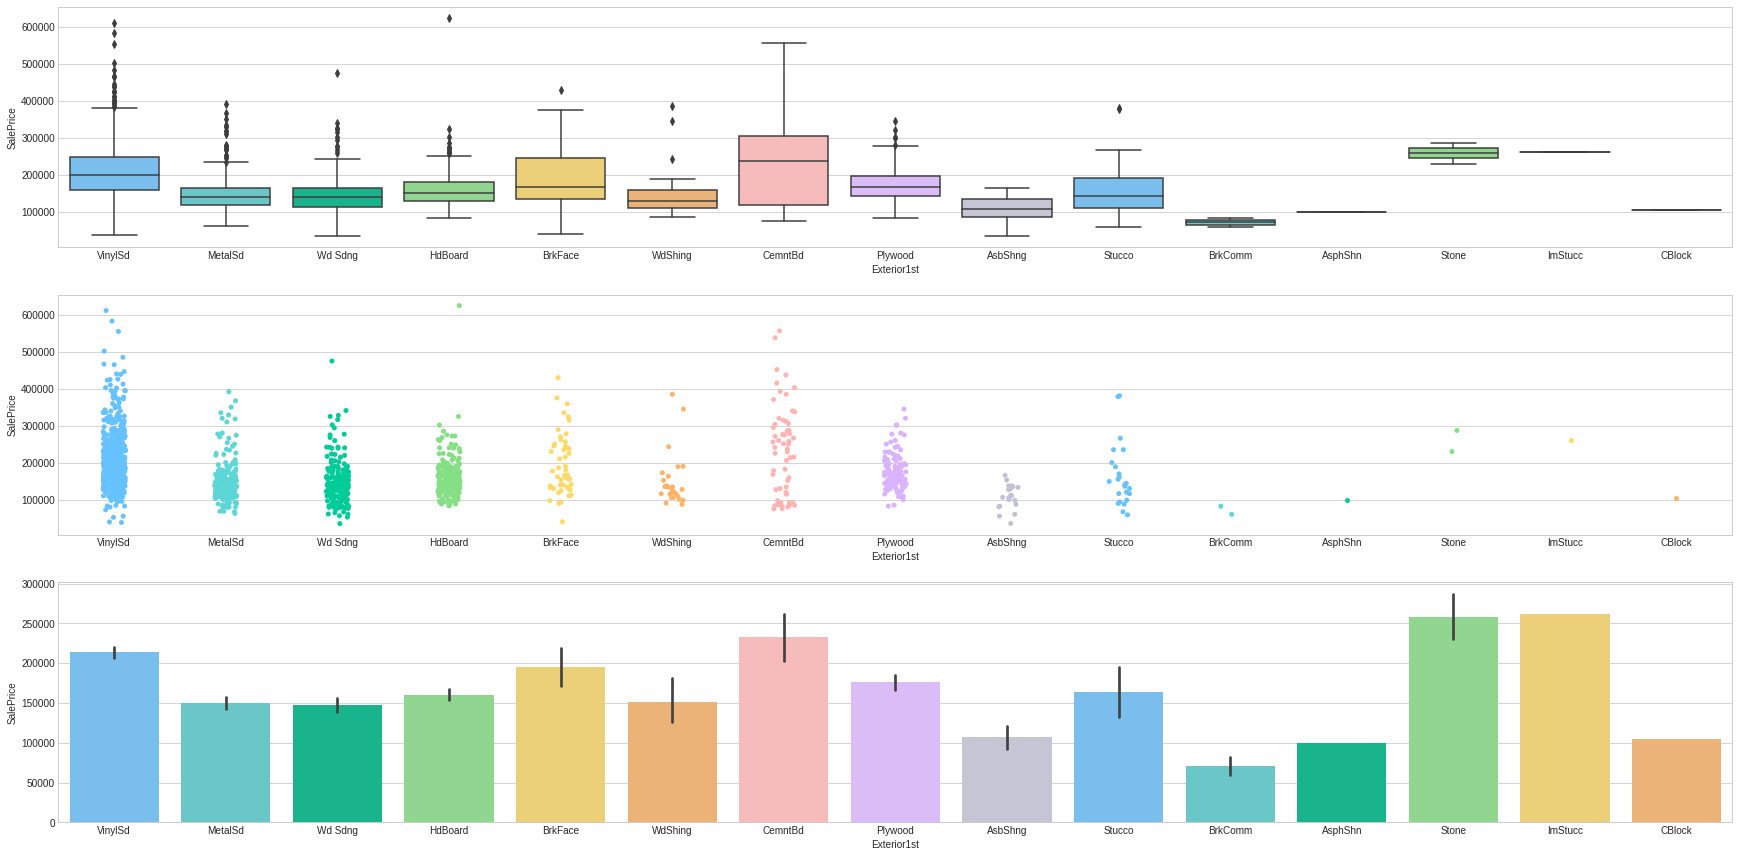

In [319]:
plt.subplots(figsize =(30, 15))

plt.subplot(3, 1, 1)
sns.boxplot(x="Exterior1st", y="SalePrice", data=train, palette = mycols);

plt.subplot(3, 1, 2)
sns.stripplot(x="Exterior1st", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(3, 1, 3)
sns.barplot(x="Exterior1st", y="SalePrice", data=train, palette = mycols);

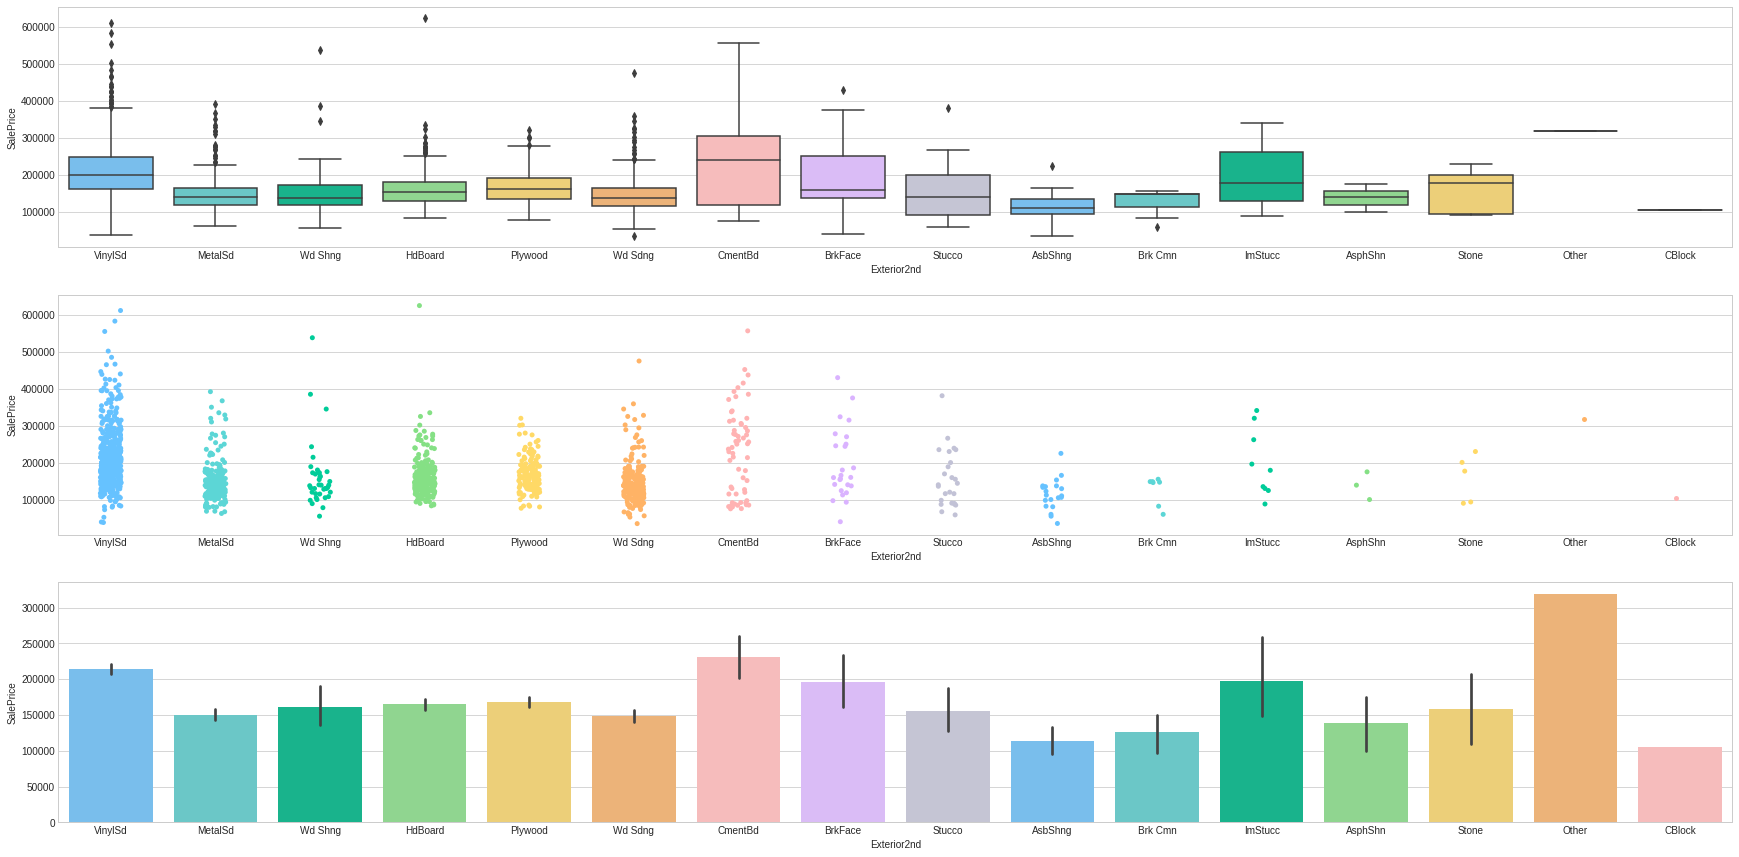

In [320]:
plt.subplots(figsize =(30, 15))

plt.subplot(3, 1, 1)
sns.boxplot(x="Exterior2nd", y="SalePrice", data=train, palette = mycols);

plt.subplot(3, 1, 2)
sns.stripplot(x="Exterior2nd", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(3, 1, 3)
sns.barplot(x="Exterior2nd", y="SalePrice", data=train, palette = mycols);

These two variables look almost the same. I will drop the 2nd feature and create dummy variables from the first one.

In [321]:
def Exter2(col):
    if col['Exterior2nd'] == col['Exterior1st']:
        return 1
    else:
        return 0
    
all['ExteriorMatch_Flag'] = all.apply(Exter2, axis=1)
all.drop('Exterior2nd', axis=1, inplace=True)

all = pd.get_dummies(all, columns = ["Exterior1st"], prefix="Exterior1st")
all.head(3)

MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour LotConfig  \
0       RL         65.0     8450   Pave  None      Reg         Lvl    Inside   
1       RL         80.0     9600   Pave  None      Reg         Lvl       FR2   
2       RL         68.0    11250   Pave  None      IR1         Lvl    Inside   

  LandSlope Neighborhood Condition1 Condition2  OverallQual  OverallCond  \
0       Gtl      CollgCr       Norm       Norm            7            5   
1       Gtl      Veenker      Feedr       Norm            6            8   
2       Gtl      CollgCr       Norm       Norm            7            5   

  MasVnrType  MasVnrArea ExterQual ExterCond  BsmtQual  BsmtCond  \
0    BrkFace       196.0        Gd        TA         3         3   
1       None         0.0        TA        TA         3         3   
2    BrkFace       162.0        Gd        TA         3         3   

   BsmtExposure Heating HeatingQC CentralAir Electrical  BedroomAbvGr  \
0             1    GasA        Ex          Y      SBrkr             3   
1             4    GasA        Ex          Y      SBrkr             3   
2             2    GasA        Ex          Y      SBrkr             3   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0             1            3             8           7           0   
1             1            2             6           7           1   
2             1            3             6           7           1   

   FireplaceQu GarageType  GarageYrBlt GarageFinish  GarageCars  GarageArea  \
0            0     Attchd       2003.0          RFn         2.0       548.0   
1            3     Attchd       1976.0          RFn         2.0       460.0   
2            3     Attchd       2001.0          RFn         2.0       608.0   

  GarageQual GarageCond PavedDrive  WoodDeckSF  ...  YearBuilt_2  YearBuilt_3  \
0         TA         TA          Y           0  ...            0            0   
1         TA         TA          Y         298  ...            0            0   
2         TA         TA          Y           0  ...            0            0   

   YearBuilt_4  YearBuilt_5  YearBuilt_6 YearBuilt_7 Foundation_BrkTil  \
0            0            0            0           1                 0   
1            0            0            1           0                 0   
2            0            0            0           1                 0   

  Foundation_CBlock  Foundation_PConc Foundation_Slab Foundation_Stone  \
0                 0                 1               0                0   
1                 1                 0               0                0   
2                 0                 1               0                0   

  Foundation_Wood RoofStyle_Flat  RoofStyle_Gable  RoofStyle_Gambrel  \
0               0              0                1                  0   
1               0              0                1                  0   
2               0              0                1                  0   

   RoofStyle_Hip  RoofStyle_Mansard  RoofStyle_Shed  RoofMatl_CompShg  \
0              0                  0               0                 1   
1              0                  0               0                 1   
2              0                  0               0                 1   

   RoofMatl_Membran  RoofMatl_Metal  RoofMatl_Roll  RoofMatl_Tar&Grv  \
0                 0               0              0                 0   
1                 0               0              0                 0   
2                 0               0              0                 0   

   RoofMatl_WdShake  RoofMatl_WdShngl  ExteriorMatch_Flag  \
0                 0                 0                   1   
1                 0                 0                   1   
2                 0                 0                   1   

   Exterior1st_AsbShng  Exterior1st_AsphShn  Exterior1st_BrkComm  \
0                    0                    0                    0   
1                    0                   

***MasVnrType***
- Masonry veneer type.

       BrkCmn	 Brick Common
       BrkFace	Brick Face
       CBlock	 Cinder Block
       None	   None
       Stone	  Stone

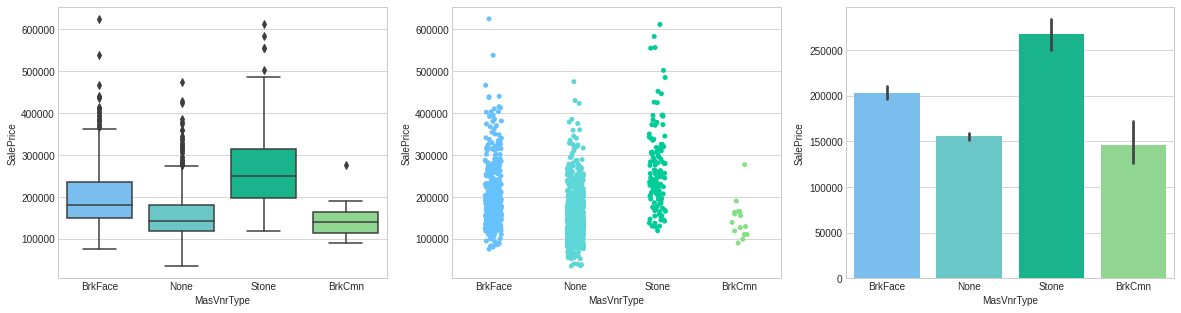

In [322]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="MasVnrType", y="SalePrice", data=train, palette = mycols);

plt.subplot(1, 3, 2)
sns.stripplot(x="MasVnrType", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="MasVnrType", y="SalePrice", data=train, palette = mycols);

With the exception of the last class, there seems to be a good spread of the data between the classes. I will create dummy variables.

In [323]:
all = pd.get_dummies(all, columns = ["MasVnrType"], prefix="MasVnrType")
all.head(3)

MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour LotConfig  \
0       RL         65.0     8450   Pave  None      Reg         Lvl    Inside   
1       RL         80.0     9600   Pave  None      Reg         Lvl       FR2   
2       RL         68.0    11250   Pave  None      IR1         Lvl    Inside   

  LandSlope Neighborhood Condition1 Condition2  OverallQual  OverallCond  \
0       Gtl      CollgCr       Norm       Norm            7            5   
1       Gtl      Veenker      Feedr       Norm            6            8   
2       Gtl      CollgCr       Norm       Norm            7            5   

   MasVnrArea ExterQual ExterCond  BsmtQual  BsmtCond  BsmtExposure Heating  \
0       196.0        Gd        TA         3         3             1    GasA   
1         0.0        TA        TA         3         3             4    GasA   
2       162.0        Gd        TA         3         3             2    GasA   

  HeatingQC CentralAir Electrical  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0        Ex          Y      SBrkr             3             1            3   
1        Ex          Y      SBrkr             3             1            2   
2        Ex          Y      SBrkr             3             1            3   

   TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu GarageType  GarageYrBlt  \
0             8           7           0            0     Attchd       2003.0   
1             6           7           1            3     Attchd       1976.0   
2             6           7           1            3     Attchd       2001.0   

  GarageFinish  GarageCars  GarageArea GarageQual GarageCond PavedDrive  \
0          RFn         2.0       548.0         TA         TA          Y   
1          RFn         2.0       460.0         TA         TA          Y   
2          RFn         2.0       608.0         TA         TA          Y   

   WoodDeckSF  OpenPorchSF  ...  YearBuilt_6  YearBuilt_7  Foundation_BrkTil  \
0           0           61  ...            0            1                  0   
1         298            0  ...            1            0                  0   
2           0           42  ...            0            1                  0   

   Foundation_CBlock Foundation_PConc Foundation_Slab Foundation_Stone  \
0                  0                1               0                0   
1                  1                0               0                0   
2                  0                1               0                0   

   Foundation_Wood RoofStyle_Flat RoofStyle_Gable RoofStyle_Gambrel  \
0                0              0               1                 0   
1                0              0               1                 0   
2                0              0               1                 0   

  RoofStyle_Hip  RoofStyle_Mansard  RoofStyle_Shed  RoofMatl_CompShg  \
0             0                  0               0                 1   
1             0                  0               0                 1   
2             0                  0               0                 1   

   RoofMatl_Membran  RoofMatl_Metal  RoofMatl_Roll  RoofMatl_Tar&Grv  \
0                 0               0              0                 0   
1                 0               0              0                 0   
2                 0               0              0                 0   

   RoofMatl_WdShake  RoofMatl_WdShngl  ExteriorMatch_Flag  \
0                 0                 0                   1   
1                 0                 0                   1   
2                 0                 0                   1   

   Exterior1st_AsbShng  Exterior1st_AsphShn  Exterior1st_BrkComm  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   

   Exterior1st_BrkFace  Exterior1st_CBlock  Exterior1st_CemntBd  \
0                    0                   0                

***MasVnrArea***
- Masonry veneer area in square feet.

In [324]:
# grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
# plt.subplots(figsize =(30, 15))

# plt.subplot(grid[0, 0])
# g = sns.regplot(x=train['MasVnrArea'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['MasVnrArea'], train['SalePrice'])[0]))
# g = g.legend(loc="best")

# plt.subplot(grid[0, 1:])
# sns.boxplot(x="Neighborhood", y="MasVnrArea", data=train, palette = mycols)

# plt.subplot(grid[1, 0]);
# sns.barplot(x="BldgType", y="MasVnrArea", data=train, palette = mycols)

# plt.subplot(grid[1, 1]);
# sns.barplot(x="HouseStyle", y="MasVnrArea", data=train, palette = mycols)

# plt.subplot(grid[1, 2]);
# sns.barplot(x="LotShape", y="MasVnrArea", data=train, palette = mycols);

I will drop this feature because it has negligible correlation with SalePrice and also correlates highly with MasVnrType. This is because if MasVnrType = None then this feature has to be zero.

In [325]:
all.drop('MasVnrArea', axis=1, inplace=True)

***ExterQual***
- Evaluates the quality of the material on the exterior.
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor


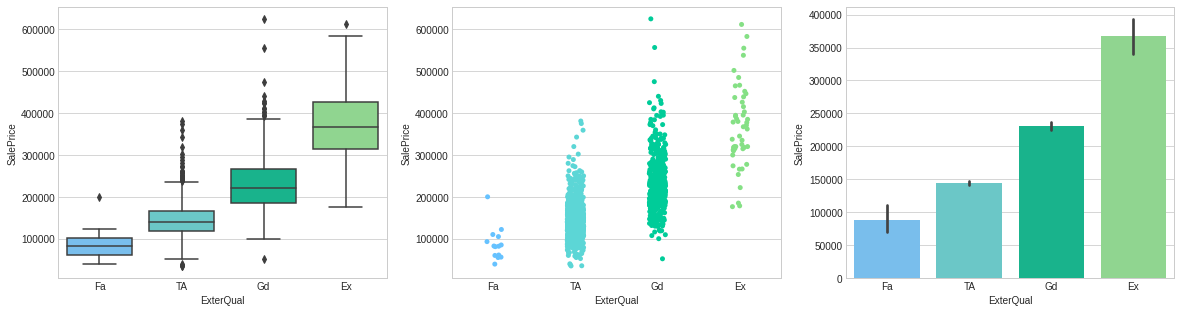

In [326]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="ExterQual", y="SalePrice", data=train, order=['Fa','TA','Gd', 'Ex'], palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="ExterQual", y="SalePrice", data=train, size = 5, jitter = True, order=['Fa','TA','Gd', 'Ex'], palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="ExterQual", y="SalePrice", data=train, order=['Fa','TA','Gd', 'Ex'], palette = mycols);

As ExterQual increases, SalePrice increases. Because there is clear order in this variable, I will manually code these features.

In [327]:
all['ExterQual'] = all['ExterQual'].map({"Fa":1, "TA":2, "Gd":3, "Ex":4})
all['ExterQual'].unique()

array([3, 2, 4, 1])

***ExterCond***
- Evaluates the present condition of the material on the exterior. 
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

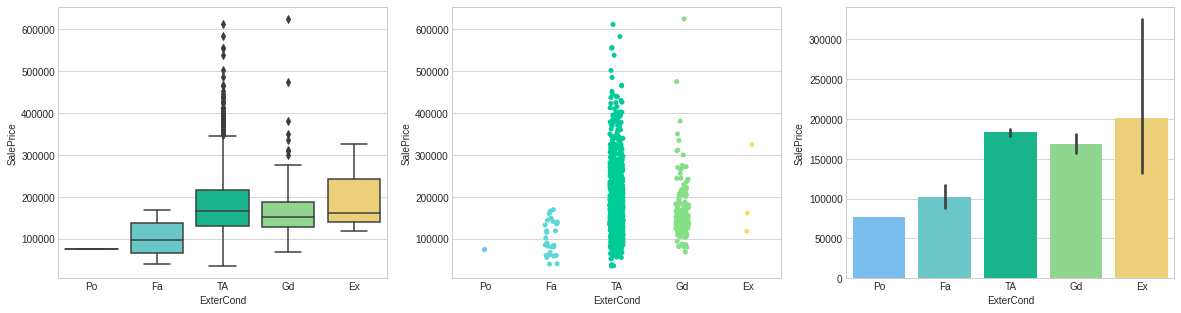

In [328]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="ExterCond", y="SalePrice", data=train, order=['Po','Fa','TA','Gd', 'Ex'], palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="ExterCond", y="SalePrice", data=train, size = 5, jitter = True, order=['Po','Fa','TA','Gd', 'Ex'], palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="ExterCond", y="SalePrice", data=train, order=['Po','Fa','TA','Gd', 'Ex'], palette = mycols);

Most of the values belong in the Ta and Gd categories, and a combined total of four values on either ends. This feature is supposed to be ordinal, but it truly is not. I will create dummy features.

In [329]:
all = pd.get_dummies(all, columns = ["ExterCond"], prefix="ExterCond")
all.head(3)

MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour LotConfig  \
0       RL         65.0     8450   Pave  None      Reg         Lvl    Inside   
1       RL         80.0     9600   Pave  None      Reg         Lvl       FR2   
2       RL         68.0    11250   Pave  None      IR1         Lvl    Inside   

  LandSlope Neighborhood Condition1 Condition2  OverallQual  OverallCond  \
0       Gtl      CollgCr       Norm       Norm            7            5   
1       Gtl      Veenker      Feedr       Norm            6            8   
2       Gtl      CollgCr       Norm       Norm            7            5   

   ExterQual  BsmtQual  BsmtCond  BsmtExposure Heating HeatingQC CentralAir  \
0          3         3         3             1    GasA        Ex          Y   
1          2         3         3             4    GasA        Ex          Y   
2          3         3         3             2    GasA        Ex          Y   

  Electrical  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0      SBrkr             3             1            3             8   
1      SBrkr             3             1            2             6   
2      SBrkr             3             1            3             6   

   Functional  Fireplaces  FireplaceQu GarageType  GarageYrBlt GarageFinish  \
0           7           0            0     Attchd       2003.0          RFn   
1           7           1            3     Attchd       1976.0          RFn   
2           7           1            3     Attchd       2001.0          RFn   

   GarageCars  GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  \
0         2.0       548.0         TA         TA          Y           0   
1         2.0       460.0         TA         TA          Y         298   
2         2.0       608.0         TA         TA          Y           0   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ...  Foundation_Slab  \
0           61              0          0  ...                0   
1            0              0          0  ...                0   
2           42              0          0  ...                0   

   Foundation_Stone Foundation_Wood RoofStyle_Flat RoofStyle_Gable  \
0                 0               0              0               1   
1                 0               0              0               1   
2                 0               0              0               1   

   RoofStyle_Gambrel RoofStyle_Hip RoofStyle_Mansard RoofStyle_Shed  \
0                  0             0                 0              0   
1                  0             0                 0              0   
2                  0             0                 0              0   

  RoofMatl_CompShg  RoofMatl_Membran  RoofMatl_Metal  RoofMatl_Roll  \
0                1                 0               0              0   
1                1                 0               0              0   
2                1                 0               0              0   

   RoofMatl_Tar&Grv  RoofMatl_WdShake  RoofMatl_WdShngl  ExteriorMatch_Flag  \
0                 0                 0                 0                   1   
1                 0                 0                 0                   1   
2                 0                 0                 0                   1   

   Exterior1st_AsbShng  Exterior1st_AsphShn  Exterior1st_BrkComm  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   

   Exterior1st_BrkFace  Exterior1st_CBlock  Exterior1st_CemntBd  \
0                    0                   0                    0   
1                    0                   0                    0   
2                    0                   0                    0   

   Exterior1st_HdBoard  Exterior1st_ImStucc  Exterior1st_MetalSd  \
0                    0                    0                    0   
1                    0                    0      

***GarageType***
- Garage location.
       2Types	 More than one type of garage
       Attchd	 Attached to home
       Basment	Basement Garage
       BuiltIn	Built-In (Garage part of house - typically has room above garage)
       CarPort	Car Port
       Detchd	 Detached from home
       NA	     No Garage

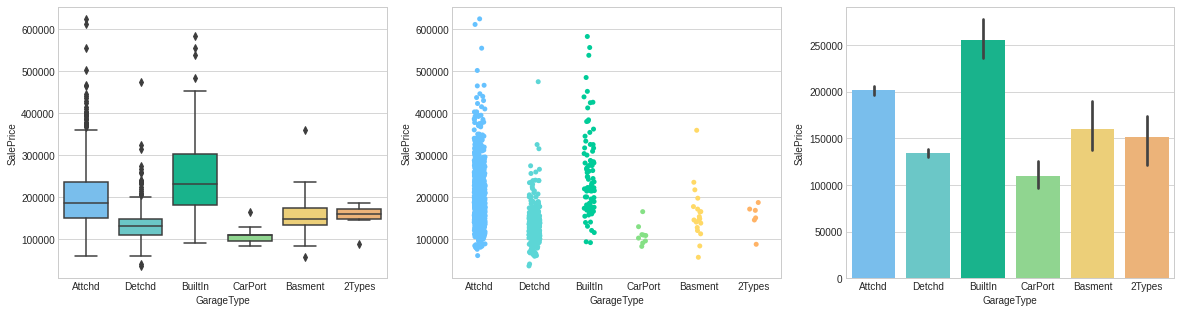

In [330]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="GarageType", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="GarageType", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="GarageType", y="SalePrice", data=train, palette = mycols);

The plots do not show clear correlation between GarageType and SalePrice. Because this feature is categorical, I will create dummy features.

In [331]:
all = pd.get_dummies(all, columns = ["GarageType"], prefix="GarageType")
all.head(3)

MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour LotConfig  \
0       RL         65.0     8450   Pave  None      Reg         Lvl    Inside   
1       RL         80.0     9600   Pave  None      Reg         Lvl       FR2   
2       RL         68.0    11250   Pave  None      IR1         Lvl    Inside   

  LandSlope Neighborhood Condition1 Condition2  OverallQual  OverallCond  \
0       Gtl      CollgCr       Norm       Norm            7            5   
1       Gtl      Veenker      Feedr       Norm            6            8   
2       Gtl      CollgCr       Norm       Norm            7            5   

   ExterQual  BsmtQual  BsmtCond  BsmtExposure Heating HeatingQC CentralAir  \
0          3         3         3             1    GasA        Ex          Y   
1          2         3         3             4    GasA        Ex          Y   
2          3         3         3             2    GasA        Ex          Y   

  Electrical  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0      SBrkr             3             1            3             8   
1      SBrkr             3             1            2             6   
2      SBrkr             3             1            3             6   

   Functional  Fireplaces  FireplaceQu  GarageYrBlt GarageFinish  GarageCars  \
0           7           0            0       2003.0          RFn         2.0   
1           7           1            3       1976.0          RFn         2.0   
2           7           1            3       2001.0          RFn         2.0   

   GarageArea GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  \
0       548.0         TA         TA          Y           0           61   
1       460.0         TA         TA          Y         298            0   
2       608.0         TA         TA          Y           0           42   

   EnclosedPorch  3SsnPorch  ScreenPorch  ...  RoofStyle_Mansard  \
0              0          0            0  ...                  0   
1              0          0            0  ...                  0   
2              0          0            0  ...                  0   

  RoofStyle_Shed RoofMatl_CompShg RoofMatl_Membran  RoofMatl_Metal  \
0              0                1                0               0   
1              0                1                0               0   
2              0                1                0               0   

  RoofMatl_Roll RoofMatl_Tar&Grv RoofMatl_WdShake RoofMatl_WdShngl  \
0             0                0                0                0   
1             0                0                0                0   
2             0                0                0                0   

   ExteriorMatch_Flag  Exterior1st_AsbShng  Exterior1st_AsphShn  \
0                   1                    0                    0   
1                   1                    0                    0   
2                   1                    0                    0   

   Exterior1st_BrkComm  Exterior1st_BrkFace  Exterior1st_CBlock  \
0                    0                    0                   0   
1                    0                    0                   0   
2                    0                    0                   0   

   Exterior1st_CemntBd  Exterior1st_HdBoard  Exterior1st_ImStucc  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   

   Exterior1st_MetalSd  Exterior1st_Plywood  Exterior1st_Stone  \
0                    0                    0                  0   
1                    1                    0                  0   
2                    0                    0                  0   

   Exterior1st_Stucco  Exterior1st_VinylSd  Exterior1st_Wd Sdng  \
0                   0                    1                    0   
1                   0                    0                    0   
2                   0                   

***GarageYrBlt***
- Year garage was built.

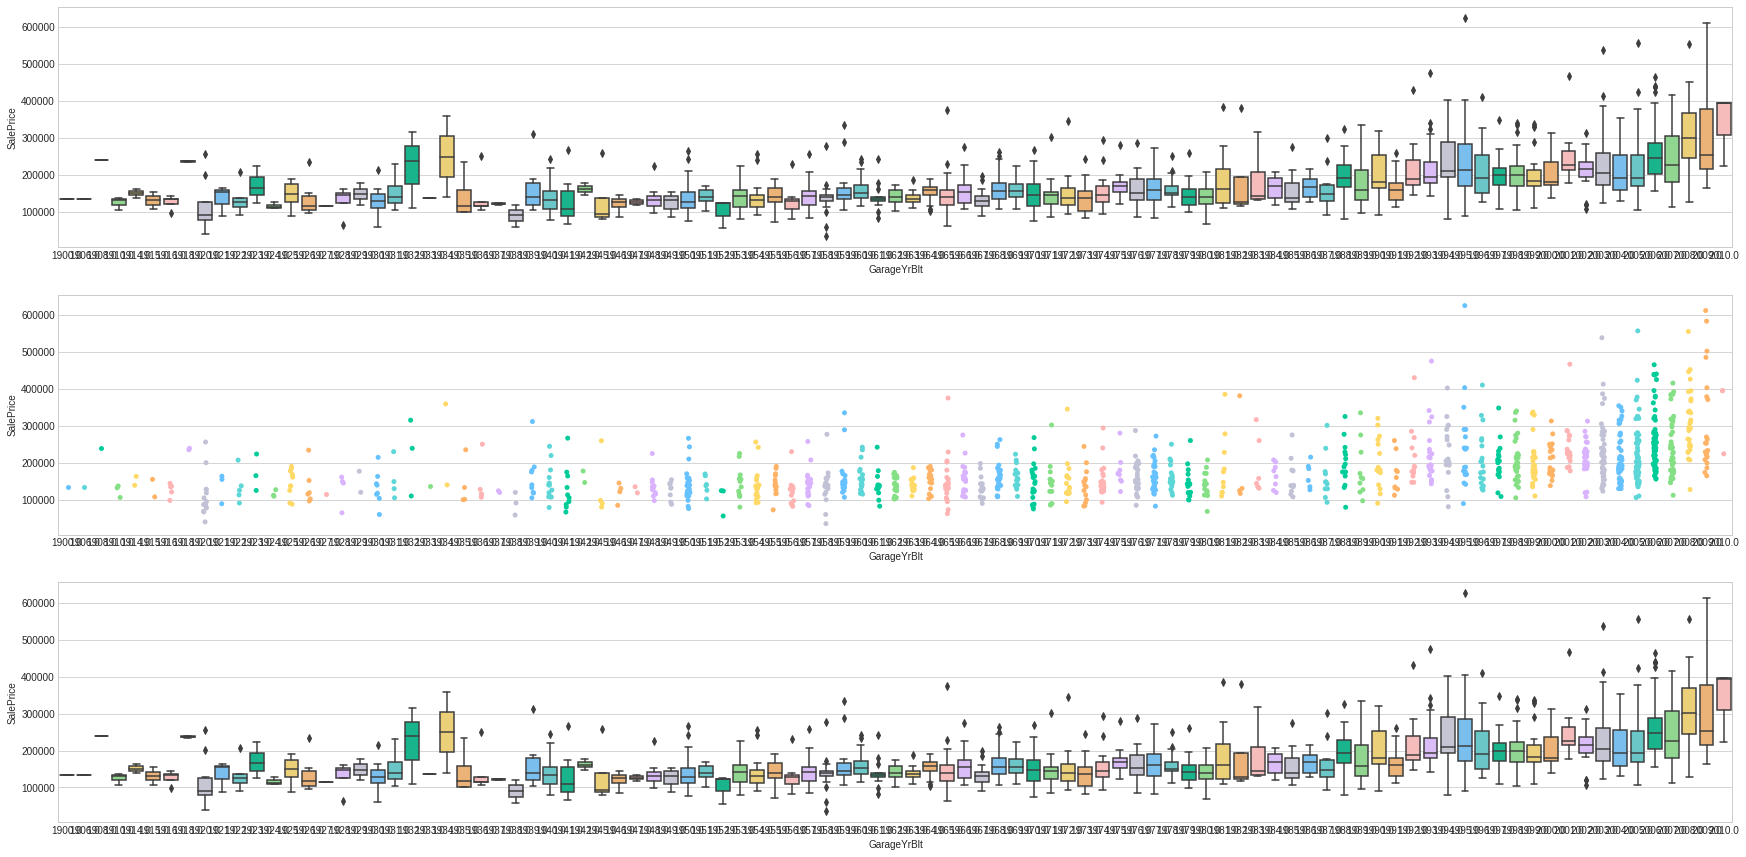

In [332]:
plt.subplots(figsize =(30, 15))

plt.subplot(3, 1, 1)
sns.boxplot(x="GarageYrBlt", y="SalePrice", data=train, palette = mycols);

plt.subplot(3, 1, 2)
sns.stripplot(x="GarageYrBlt", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(3, 1, 3)
sns.boxplot(x="GarageYrBlt", y="SalePrice", data=train, palette = mycols);

In [333]:
all['GarageYrBlt_Band'] = pd.qcut(all['GarageYrBlt'], 3)
all['GarageYrBlt_Band'].unique()

[(1996.0, 2207.0], (1964.0, 1996.0], (-0.001, 1964.0]]
Categories (3, interval[float64]): [(-0.001, 1964.0] < (1964.0, 1996.0] < (1996.0, 2207.0]]

In [334]:
all.loc[all['GarageYrBlt']<=1964, 'GarageYrBlt'] = 1
all.loc[(all['GarageYrBlt']>1964) & (all['GarageYrBlt']<=1996), 'GarageYrBlt'] = 2
all.loc[all['GarageYrBlt']>1996, 'GarageYrBlt'] = 3
all['GarageYrBlt'] = all['GarageYrBlt'].astype(int)

all.drop('GarageYrBlt_Band', axis=1, inplace=True)

all = pd.get_dummies(all, columns = ["GarageYrBlt"], prefix="GarageYrBlt")
all.head(3)

MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour LotConfig  \
0       RL         65.0     8450   Pave  None      Reg         Lvl    Inside   
1       RL         80.0     9600   Pave  None      Reg         Lvl       FR2   
2       RL         68.0    11250   Pave  None      IR1         Lvl    Inside   

  LandSlope Neighborhood Condition1 Condition2  OverallQual  OverallCond  \
0       Gtl      CollgCr       Norm       Norm            7            5   
1       Gtl      Veenker      Feedr       Norm            6            8   
2       Gtl      CollgCr       Norm       Norm            7            5   

   ExterQual  BsmtQual  BsmtCond  BsmtExposure Heating HeatingQC CentralAir  \
0          3         3         3             1    GasA        Ex          Y   
1          2         3         3             4    GasA        Ex          Y   
2          3         3         3             2    GasA        Ex          Y   

  Electrical  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0      SBrkr             3             1            3             8   
1      SBrkr             3             1            2             6   
2      SBrkr             3             1            3             6   

   Functional  Fireplaces  FireplaceQu GarageFinish  GarageCars  GarageArea  \
0           7           0            0          RFn         2.0       548.0   
1           7           1            3          RFn         2.0       460.0   
2           7           1            3          RFn         2.0       608.0   

  GarageQual GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  \
0         TA         TA          Y           0           61              0   
1         TA         TA          Y         298            0              0   
2         TA         TA          Y           0           42              0   

   3SsnPorch  ScreenPorch  PoolArea  ... RoofMatl_Membran RoofMatl_Metal  \
0          0            0         0  ...                0              0   
1          0            0         0  ...                0              0   
2          0            0         0  ...                0              0   

  RoofMatl_Roll  RoofMatl_Tar&Grv RoofMatl_WdShake RoofMatl_WdShngl  \
0             0                 0                0                0   
1             0                 0                0                0   
2             0                 0                0                0   

  ExteriorMatch_Flag Exterior1st_AsbShng  Exterior1st_AsphShn  \
0                  1                   0                    0   
1                  1                   0                    0   
2                  1                   0                    0   

   Exterior1st_BrkComm  Exterior1st_BrkFace  Exterior1st_CBlock  \
0                    0                    0                   0   
1                    0                    0                   0   
2                    0                    0                   0   

   Exterior1st_CemntBd  Exterior1st_HdBoard  Exterior1st_ImStucc  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   

   Exterior1st_MetalSd  Exterior1st_Plywood  Exterior1st_Stone  \
0                    0                    0                  0   
1                    1                    0                  0   
2                    0                    0                  0   

   Exterior1st_Stucco  Exterior1st_VinylSd  Exterior1st_Wd Sdng  \
0                   0                    1                    0   
1                   0                    0                    0   
2                   0                    1                    0   

   Exterior1st_WdShing  MasVnrType_BrkCmn  MasVnrType_BrkFace  \
0                    0                  0                   1   
1                    0                  0                   0   
2                    0

There is a slight upward trend as the homes become more modern. I will bin this variable and create dummy variables.

***GarageFinish***
- Interior finish of the garage.
       Fin	Finished
       RFn	Rough Finished	
       Unf	Unfinished
       NA	No Garage



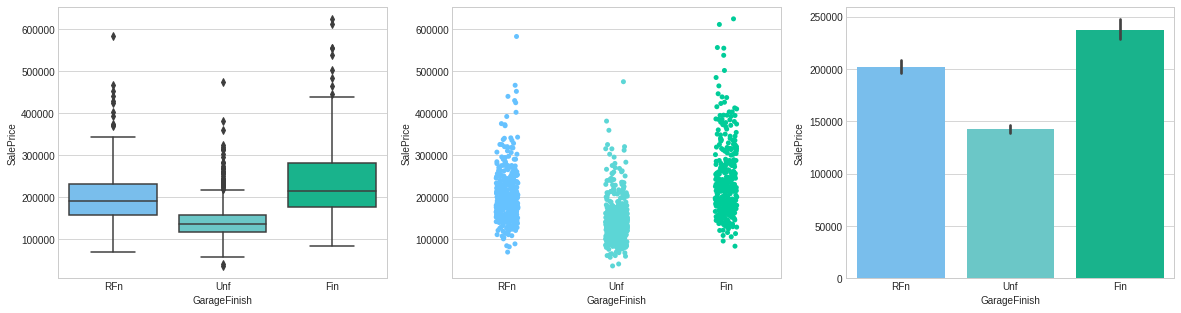

In [335]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="GarageFinish", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="GarageFinish", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="GarageFinish", y="SalePrice", data=train, palette = mycols);

There is a nice distripution of the data between the three categories. I will create dummy features.

In [336]:
all = pd.get_dummies(all, columns = ["GarageFinish"], prefix="GarageFinish")
all.head(3)

MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour LotConfig  \
0       RL         65.0     8450   Pave  None      Reg         Lvl    Inside   
1       RL         80.0     9600   Pave  None      Reg         Lvl       FR2   
2       RL         68.0    11250   Pave  None      IR1         Lvl    Inside   

  LandSlope Neighborhood Condition1 Condition2  OverallQual  OverallCond  \
0       Gtl      CollgCr       Norm       Norm            7            5   
1       Gtl      Veenker      Feedr       Norm            6            8   
2       Gtl      CollgCr       Norm       Norm            7            5   

   ExterQual  BsmtQual  BsmtCond  BsmtExposure Heating HeatingQC CentralAir  \
0          3         3         3             1    GasA        Ex          Y   
1          2         3         3             4    GasA        Ex          Y   
2          3         3         3             2    GasA        Ex          Y   

  Electrical  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0      SBrkr             3             1            3             8   
1      SBrkr             3             1            2             6   
2      SBrkr             3             1            3             6   

   Functional  Fireplaces  FireplaceQu  GarageCars  GarageArea GarageQual  \
0           7           0            0         2.0       548.0         TA   
1           7           1            3         2.0       460.0         TA   
2           7           1            3         2.0       608.0         TA   

  GarageCond PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0         TA          Y           0           61              0          0   
1         TA          Y         298            0              0          0   
2         TA          Y           0           42              0          0   

   ScreenPorch  PoolArea PoolQC  ... RoofMatl_WdShake RoofMatl_WdShngl  \
0            0         0   None  ...                0                0   
1            0         0   None  ...                0                0   
2            0         0   None  ...                0                0   

   ExteriorMatch_Flag Exterior1st_AsbShng Exterior1st_AsphShn  \
0                   1                   0                   0   
1                   1                   0                   0   
2                   1                   0                   0   

  Exterior1st_BrkComm Exterior1st_BrkFace  Exterior1st_CBlock  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   

   Exterior1st_CemntBd  Exterior1st_HdBoard  Exterior1st_ImStucc  \
0                    0                    0                    0   
1                    0                    0                    0   
2                    0                    0                    0   

   Exterior1st_MetalSd  Exterior1st_Plywood  Exterior1st_Stone  \
0                    0                    0                  0   
1                    1                    0                  0   
2                    0                    0                  0   

   Exterior1st_Stucco  Exterior1st_VinylSd  Exterior1st_Wd Sdng  \
0                   0                    1                    0   
1                   0                    0                    0   
2                   0                    1                    0   

   Exterior1st_WdShing  MasVnrType_BrkCmn  MasVnrType_BrkFace  \
0                    0                  0                   1   
1                    0                  0                   0   
2                    0                  0                   1   

   MasVnrType_None  MasVnrType_Stone  ExterCond_Ex  ExterCond_Fa  \
0                0                 0             0             0   
1                1                 0             0             0   
2                0                 0             0           

***GarageCars***
- Size of the garage in car capacity.

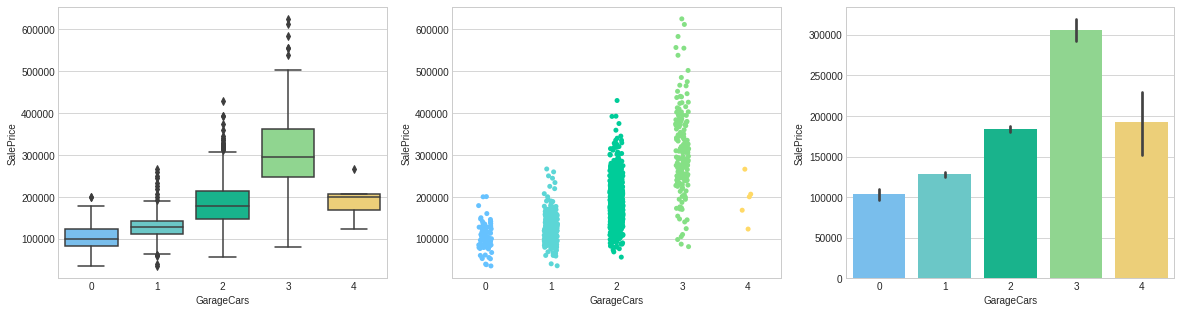

In [337]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="GarageCars", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="GarageCars", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="GarageCars", y="SalePrice", data=train, palette = mycols);

There is generally a positive correlation between the SalePrice and garage-car capacity. The exception is four cars but this could be due the low frequency of that category. Because this feature is continuous I will leave it as is.

***GarageArea***
- Size of the garage in square feet.

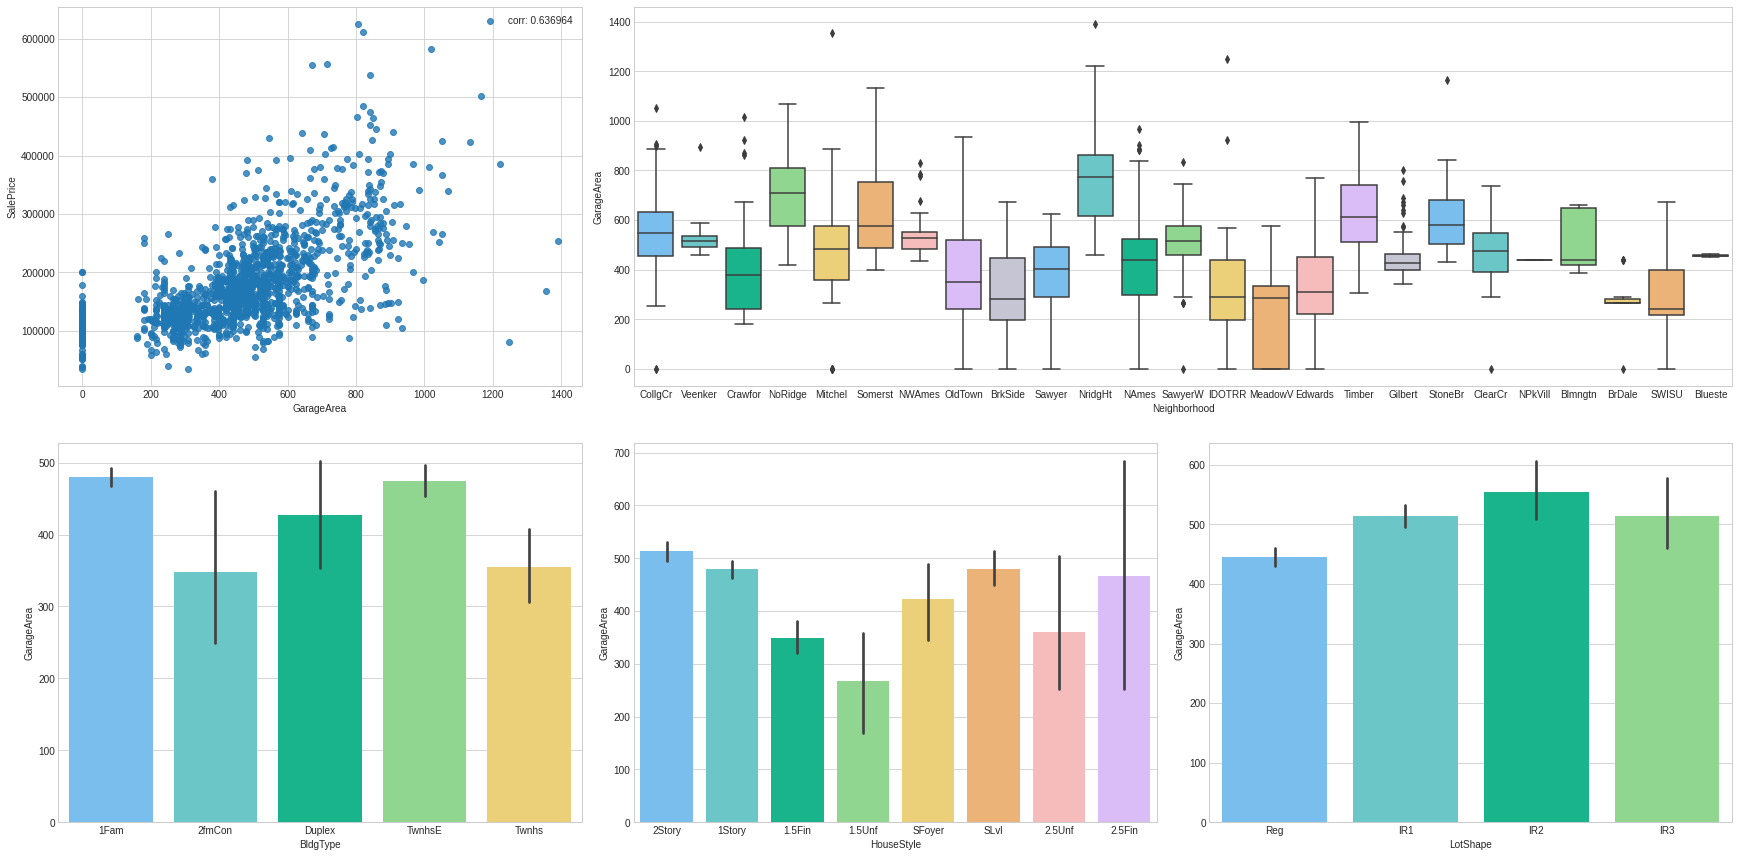

In [338]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['GarageArea'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['GarageArea'], train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="GarageArea", data=train, palette = mycols)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="GarageArea", data=train, palette = mycols)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="GarageArea", data=train, palette = mycols)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="GarageArea", data=train, palette = mycols);

GarageArea has a high positive correlation with SalePrice. I will bin this feature and create dummy variables.

In [339]:
all['GarageArea_Band'] = pd.cut(all['GarageArea'], 3)
all['GarageArea_Band'].unique()

[(496.0, 992.0], (-1.488, 496.0], (992.0, 1488.0]]
Categories (3, interval[float64]): [(-1.488, 496.0] < (496.0, 992.0] < (992.0, 1488.0]]

In [340]:
all.loc[all['GarageArea']<=496, 'GarageArea'] = 1
all.loc[(all['GarageArea']>496) & (all['GarageArea']<=992), 'GarageArea'] = 2
all.loc[all['GarageArea']>992, 'GarageArea'] = 3
all['GarageArea'] = all['GarageArea'].astype(int)

all.drop('GarageArea_Band', axis=1, inplace=True)

all = pd.get_dummies(all, columns = ["GarageArea"], prefix="GarageArea")
all.head(3)

MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour LotConfig  \
0       RL         65.0     8450   Pave  None      Reg         Lvl    Inside   
1       RL         80.0     9600   Pave  None      Reg         Lvl       FR2   
2       RL         68.0    11250   Pave  None      IR1         Lvl    Inside   

  LandSlope Neighborhood Condition1 Condition2  OverallQual  OverallCond  \
0       Gtl      CollgCr       Norm       Norm            7            5   
1       Gtl      Veenker      Feedr       Norm            6            8   
2       Gtl      CollgCr       Norm       Norm            7            5   

   ExterQual  BsmtQual  BsmtCond  BsmtExposure Heating HeatingQC CentralAir  \
0          3         3         3             1    GasA        Ex          Y   
1          2         3         3             4    GasA        Ex          Y   
2          3         3         3             2    GasA        Ex          Y   

  Electrical  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0      SBrkr             3             1            3             8   
1      SBrkr             3             1            2             6   
2      SBrkr             3             1            3             6   

   Functional  Fireplaces  FireplaceQu  GarageCars GarageQual GarageCond  \
0           7           0            0         2.0         TA         TA   
1           7           1            3         2.0         TA         TA   
2           7           1            3         2.0         TA         TA   

  PavedDrive  WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0          Y           0           61              0          0            0   
1          Y         298            0              0          0            0   
2          Y           0           42              0          0            0   

   PoolArea PoolQC Fence  ... Exterior1st_AsbShng  Exterior1st_AsphShn  \
0         0   None  None  ...                   0                    0   
1         0   None  None  ...                   0                    0   
2         0   None  None  ...                   0                    0   

  Exterior1st_BrkComm Exterior1st_BrkFace Exterior1st_CBlock  \
0                   0                   0                  0   
1                   0                   0                  0   
2                   0                   0                  0   

  Exterior1st_CemntBd  Exterior1st_HdBoard  Exterior1st_ImStucc  \
0                   0                    0                    0   
1                   0                    0                    0   
2                   0                    0                    0   

   Exterior1st_MetalSd  Exterior1st_Plywood  Exterior1st_Stone  \
0                    0                    0                  0   
1                    1                    0                  0   
2                    0                    0                  0   

   Exterior1st_Stucco  Exterior1st_VinylSd  Exterior1st_Wd Sdng  \
0                   0                    1                    0   
1                   0                    0                    0   
2                   0                    1                    0   

   Exterior1st_WdShing  MasVnrType_BrkCmn  MasVnrType_BrkFace  \
0                    0                  0                   1   
1                    0                  0                   0   
2                    0                  0                   1   

   MasVnrType_None  MasVnrType_Stone  ExterCond_Ex  ExterCond_Fa  \
0                0                 0             0             0   
1                1                 0             0             0   
2                0                 0             0             0   

   ExterCond_Gd  ExterCond_Po  ExterCond_TA  GarageType_2Types  \
0             0             0             1                  0   
1             0             0             1                  0   
2             0             0             1                

***GarageQual***
- Garage quality.
       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

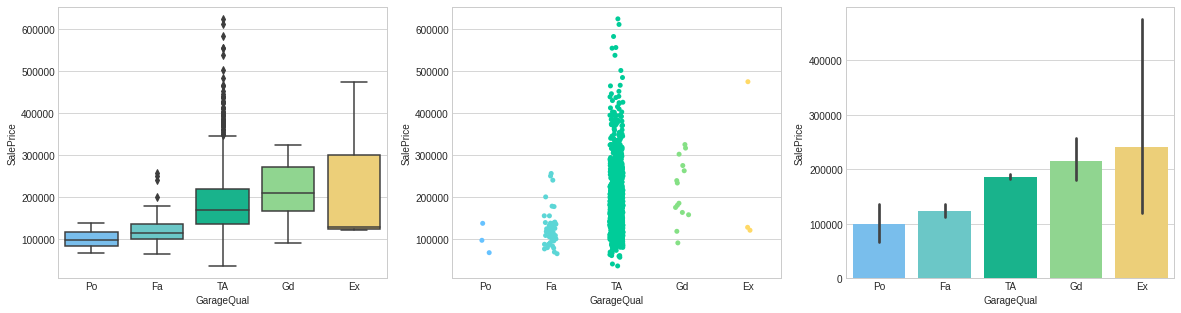

In [341]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="GarageQual", y="SalePrice", data=train, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="GarageQual", y="SalePrice", data=train, size = 5, jitter = True, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="GarageQual", y="SalePrice", data=train, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols);

Most of the values belong to the TA category, and I will cluster the lower categories together. Last, I will create dummy variables.

In [342]:
all['GarageQual'] = all['GarageQual'].map({"None":"None", "Po":"Low", "Fa":"Low", "TA":"TA", "Gd":"High", "Ex":"High"})
all['GarageQual'].unique()

array(['TA', 'Low', 'High', 'None'], dtype=object)

In [343]:
all = pd.get_dummies(all, columns = ["GarageQual"], prefix="GarageQual")
all.head(3)

MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour LotConfig  \
0       RL         65.0     8450   Pave  None      Reg         Lvl    Inside   
1       RL         80.0     9600   Pave  None      Reg         Lvl       FR2   
2       RL         68.0    11250   Pave  None      IR1         Lvl    Inside   

  LandSlope Neighborhood Condition1 Condition2  OverallQual  OverallCond  \
0       Gtl      CollgCr       Norm       Norm            7            5   
1       Gtl      Veenker      Feedr       Norm            6            8   
2       Gtl      CollgCr       Norm       Norm            7            5   

   ExterQual  BsmtQual  BsmtCond  BsmtExposure Heating HeatingQC CentralAir  \
0          3         3         3             1    GasA        Ex          Y   
1          2         3         3             4    GasA        Ex          Y   
2          3         3         3             2    GasA        Ex          Y   

  Electrical  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0      SBrkr             3             1            3             8   
1      SBrkr             3             1            2             6   
2      SBrkr             3             1            3             6   

   Functional  Fireplaces  FireplaceQu  GarageCars GarageCond PavedDrive  \
0           7           0            0         2.0         TA          Y   
1           7           1            3         2.0         TA          Y   
2           7           1            3         2.0         TA          Y   

   WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  \
0           0           61              0          0            0         0   
1         298            0              0          0            0         0   
2           0           42              0          0            0         0   

  PoolQC Fence MiscFeature  ...  Exterior1st_CBlock Exterior1st_CemntBd  \
0   None  None        None  ...                   0                   0   
1   None  None        None  ...                   0                   0   
2   None  None        None  ...                   0                   0   

  Exterior1st_HdBoard Exterior1st_ImStucc Exterior1st_MetalSd  \
0                   0                   0                   0   
1                   0                   0                   1   
2                   0                   0                   0   

   Exterior1st_Plywood  Exterior1st_Stone  Exterior1st_Stucco  \
0                    0                  0                   0   
1                    0                  0                   0   
2                    0                  0                   0   

   Exterior1st_VinylSd  Exterior1st_Wd Sdng  Exterior1st_WdShing  \
0                    1                    0                    0   
1                    0                    0                    0   
2                    1                    0                    0   

   MasVnrType_BrkCmn  MasVnrType_BrkFace  MasVnrType_None  MasVnrType_Stone  \
0                  0                   1                0                 0   
1                  0                   0                1                 0   
2                  0                   1                0                 0   

   ExterCond_Ex  ExterCond_Fa  ExterCond_Gd  ExterCond_Po  ExterCond_TA  \
0             0             0             0             0             1   
1             0             0             0             0             1   
2             0             0             0             0             1   

   GarageType_2Types  GarageType_Attchd  GarageType_Basment  \
0                  0                  1                   0   
1                  0                  1                   0   
2                  0                  1                   0   

   GarageType_BuiltIn  GarageType_CarPort  GarageType_Detchd  GarageType_None  \
0                   0                   0                  0                0   
1                   0  

***GarageCond***
- Garage condition.
       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor
       NA	No Garage

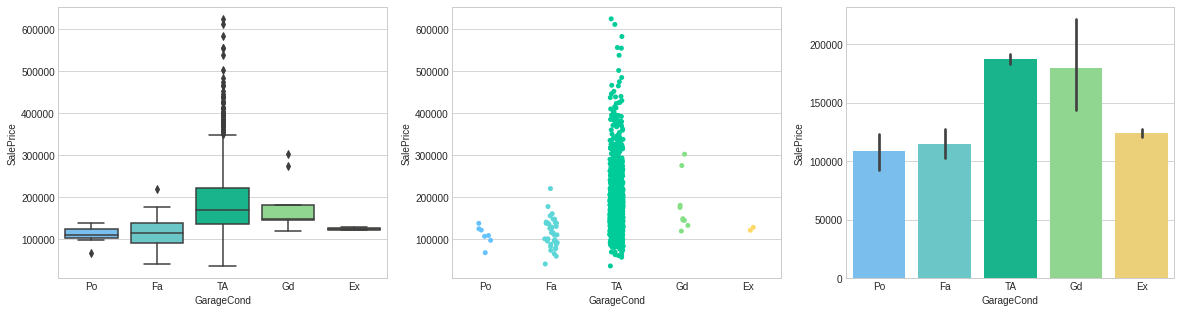

In [344]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="GarageCond", y="SalePrice", data=train, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="GarageCond", y="SalePrice", data=train, size = 5, jitter = True, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="GarageCond", y="SalePrice", data=train, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols);

The feature here is very similar to the last one. I will also cluster and then use dummy features.

In [345]:
all['GarageCond'] = all['GarageCond'].map({"None":"None", "Po":"Low", "Fa":"Low", "TA":"TA", "Gd":"High", "Ex":"High"})
all['GarageCond'].unique()

array(['TA', 'Low', 'None', 'High'], dtype=object)

In [346]:
all = pd.get_dummies(all, columns = ["GarageCond"], prefix="GarageCond")
all.head(3)

MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour LotConfig  \
0       RL         65.0     8450   Pave  None      Reg         Lvl    Inside   
1       RL         80.0     9600   Pave  None      Reg         Lvl       FR2   
2       RL         68.0    11250   Pave  None      IR1         Lvl    Inside   

  LandSlope Neighborhood Condition1 Condition2  OverallQual  OverallCond  \
0       Gtl      CollgCr       Norm       Norm            7            5   
1       Gtl      Veenker      Feedr       Norm            6            8   
2       Gtl      CollgCr       Norm       Norm            7            5   

   ExterQual  BsmtQual  BsmtCond  BsmtExposure Heating HeatingQC CentralAir  \
0          3         3         3             1    GasA        Ex          Y   
1          2         3         3             4    GasA        Ex          Y   
2          3         3         3             2    GasA        Ex          Y   

  Electrical  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0      SBrkr             3             1            3             8   
1      SBrkr             3             1            2             6   
2      SBrkr             3             1            3             6   

   Functional  Fireplaces  FireplaceQu  GarageCars PavedDrive  WoodDeckSF  \
0           7           0            0         2.0          Y           0   
1           7           1            3         2.0          Y         298   
2           7           1            3         2.0          Y           0   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence  \
0           61              0          0            0         0   None  None   
1            0              0          0            0         0   None  None   
2           42              0          0            0         0   None  None   

  MiscFeature  MiscVal  ... Exterior1st_MetalSd Exterior1st_Plywood  \
0        None        0  ...                   0                   0   
1        None        0  ...                   1                   0   
2        None        0  ...                   0                   0   

  Exterior1st_Stone Exterior1st_Stucco  Exterior1st_VinylSd  \
0                 0                  0                    1   
1                 0                  0                    0   
2                 0                  0                    1   

   Exterior1st_Wd Sdng  Exterior1st_WdShing  MasVnrType_BrkCmn  \
0                    0                    0                  0   
1                    0                    0                  0   
2                    0                    0                  0   

   MasVnrType_BrkFace  MasVnrType_None  MasVnrType_Stone  ExterCond_Ex  \
0                   1                0                 0             0   
1                   0                1                 0             0   
2                   1                0                 0             0   

   ExterCond_Fa  ExterCond_Gd  ExterCond_Po  ExterCond_TA  GarageType_2Types  \
0             0             0             0             1                  0   
1             0             0             0             1                  0   
2             0             0             0             1                  0   

   GarageType_Attchd  GarageType_Basment  GarageType_BuiltIn  \
0                  1                   0                   0   
1                  1                   0                   0   
2                  1                   0                   0   

   GarageType_CarPort  GarageType_Detchd  GarageType_None  GarageYrBlt_1  \
0                   0                  0                0              0   
1                   0                  0                0              0   
2                   0                  0                0              0   

   GarageYrBlt_2  GarageYrBlt_3  GarageFinish_Fin  GarageFinish_None  \
0              0              1                 0                  0   
1              1 

***WoodDeckSF***
- Wood deck area in SF.

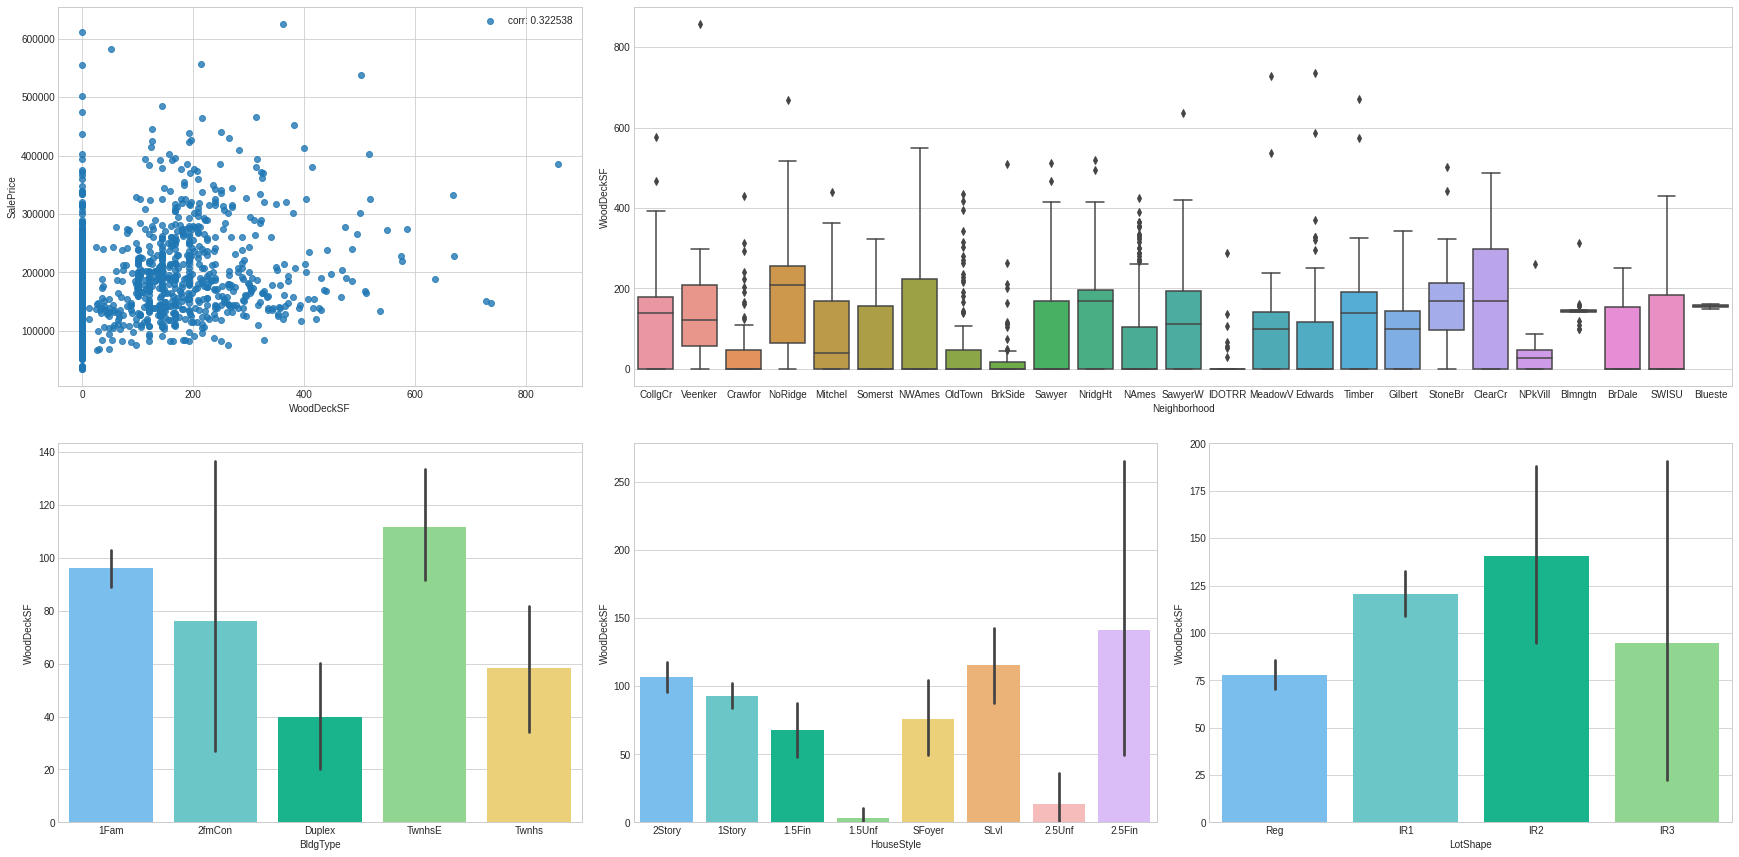

In [347]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['WoodDeckSF'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['WoodDeckSF'], train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="WoodDeckSF", data=train)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="WoodDeckSF", data=train, palette = mycols)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="WoodDeckSF", data=train, palette = mycols)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="WoodDeckSF", data=train, palette = mycols);

This feature has positive correlation with SalePrice, and we can see that it varies with location, building type, style, and lot size. Because there are so many 0 values, I will flag it in it's own column. I will then bin it and create dummy variables.

In [348]:
def WoodDeckFlag(col):
    if col['WoodDeckSF'] == 0:
        return 1
    else:
        return 0
    
all['NoWoodDeck_Flag'] = all.apply(WoodDeckFlag, axis=1)

all['WoodDeckSF_Band'] = pd.cut(all['WoodDeckSF'], 4)

all.loc[all['WoodDeckSF']<=356, 'WoodDeckSF'] = 1
all.loc[(all['WoodDeckSF']>356) & (all['WoodDeckSF']<=712), 'WoodDeckSF'] = 2
all.loc[(all['WoodDeckSF']>712) & (all['WoodDeckSF']<=1068), 'WoodDeckSF'] = 3
all.loc[all['WoodDeckSF']>1068, 'WoodDeckSF'] = 4
all['WoodDeckSF'] = all['WoodDeckSF'].astype(int)

all.drop('WoodDeckSF_Band', axis=1, inplace=True)

all = pd.get_dummies(all, columns = ["WoodDeckSF"], prefix="WoodDeckSF")
all.head(3)

MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour LotConfig  \
0       RL         65.0     8450   Pave  None      Reg         Lvl    Inside   
1       RL         80.0     9600   Pave  None      Reg         Lvl       FR2   
2       RL         68.0    11250   Pave  None      IR1         Lvl    Inside   

  LandSlope Neighborhood Condition1 Condition2  OverallQual  OverallCond  \
0       Gtl      CollgCr       Norm       Norm            7            5   
1       Gtl      Veenker      Feedr       Norm            6            8   
2       Gtl      CollgCr       Norm       Norm            7            5   

   ExterQual  BsmtQual  BsmtCond  BsmtExposure Heating HeatingQC CentralAir  \
0          3         3         3             1    GasA        Ex          Y   
1          2         3         3             4    GasA        Ex          Y   
2          3         3         3             2    GasA        Ex          Y   

  Electrical  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0      SBrkr             3             1            3             8   
1      SBrkr             3             1            2             6   
2      SBrkr             3             1            3             6   

   Functional  Fireplaces  FireplaceQu  GarageCars PavedDrive  OpenPorchSF  \
0           7           0            0         2.0          Y           61   
1           7           1            3         2.0          Y            0   
2           7           1            3         2.0          Y           42   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  \
0              0          0            0         0   None  None        None   
1              0          0            0         0   None  None        None   
2              0          0            0         0   None  None        None   

   MiscVal MoSold  ... Exterior1st_Wd Sdng Exterior1st_WdShing  \
0        0      2  ...                   0                   0   
1        0      5  ...                   0                   0   
2        0      9  ...                   0                   0   

  MasVnrType_BrkCmn  MasVnrType_BrkFace  MasVnrType_None  MasVnrType_Stone  \
0                 0                   1                0                 0   
1                 0                   0                1                 0   
2                 0                   1                0                 0   

   ExterCond_Ex  ExterCond_Fa  ExterCond_Gd  ExterCond_Po  ExterCond_TA  \
0             0             0             0             0             1   
1             0             0             0             0             1   
2             0             0             0             0             1   

   GarageType_2Types  GarageType_Attchd  GarageType_Basment  \
0                  0                  1                   0   
1                  0                  1                   0   
2                  0                  1                   0   

   GarageType_BuiltIn  GarageType_CarPort  GarageType_Detchd  GarageType_None  \
0                   0                   0                  0                0   
1                   0                   0                  0                0   
2                   0                   0                  0                0   

   GarageYrBlt_1  GarageYrBlt_2  GarageYrBlt_3  GarageFinish_Fin  \
0              0              0              1                 0   
1              0              1              0                 0   
2              0              0              1                 0   

   GarageFinish_None  GarageFinish_RFn  GarageFinish_Unf  GarageArea_1  \
0                  0                 1                 0             0   
1                  0                 1                 0             1   
2                  0                 1                 0             0   

   GarageArea_2  GarageArea_3  GarageQual_High  GarageQual_Low  \
0             1             0                0     

***OpenPorchSF***, ***EnclosedPorch***, ***3SsnPorch*** & ***ScreenPorch***
- Because these are essentially all porches, I will sum them together for a total square footage.

In [349]:
all['TotalPorchSF'] = all['OpenPorchSF'] + all['OpenPorchSF'] + all['EnclosedPorch'] + all['3SsnPorch'] + all['ScreenPorch'] 
train['TotalPorchSF'] = train['OpenPorchSF'] + train['OpenPorchSF'] + train['EnclosedPorch'] + train['3SsnPorch'] + train['ScreenPorch']

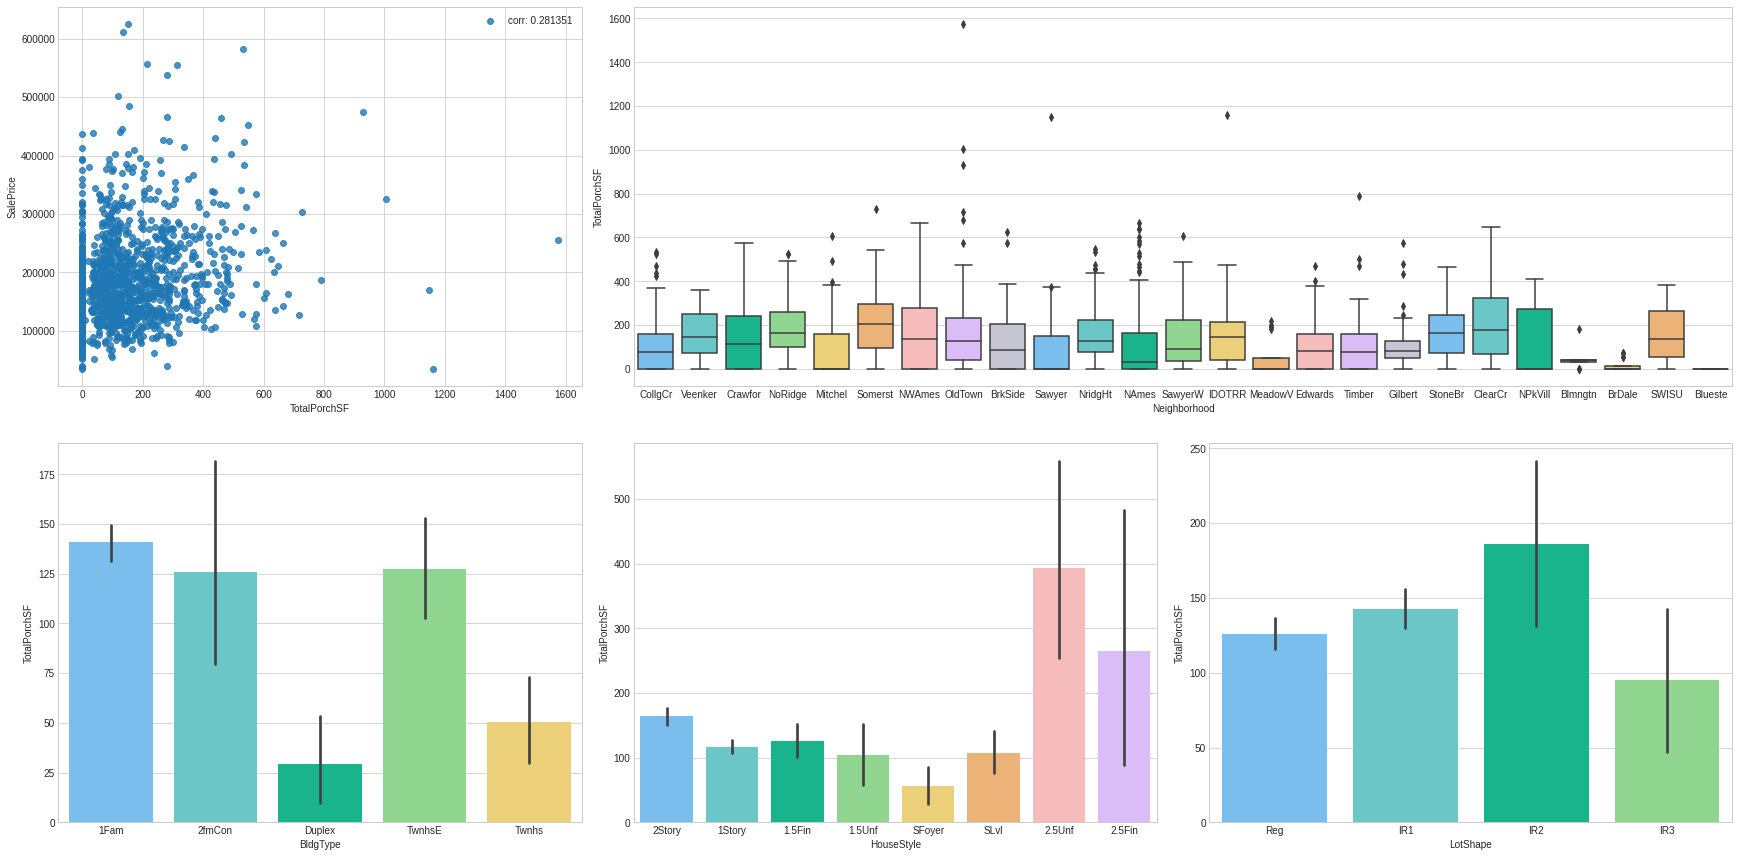

In [350]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['TotalPorchSF'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['TotalPorchSF'], train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="TotalPorchSF", data=train, palette = mycols)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="TotalPorchSF", data=train, palette = mycols)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="TotalPorchSF", data=train, palette = mycols)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="TotalPorchSF", data=train, palette = mycols);

There are many data points with a value of 0, and there is positive correlation for the size of the porch and the price of the home. There is also much variation based on location, building type, style, and lot. I will create a new feature flagging the absence of a porch, bin, and create dummy variables for the rest.

In [351]:
def PorchFlag(col):
    if col['TotalPorchSF'] == 0:
        return 1
    else:
        return 0
    
all['NoPorch_Flag'] = all.apply(PorchFlag, axis=1)

all['TotalPorchSF_Band'] = pd.cut(all['TotalPorchSF'], 4)
all['TotalPorchSF_Band'].unique()

[(-1.724, 431.0], (431.0, 862.0], (862.0, 1293.0], (1293.0, 1724.0]]
Categories (4, interval[float64]): [(-1.724, 431.0] < (431.0, 862.0] < (862.0, 1293.0] <
                                    (1293.0, 1724.0]]

In [352]:
all.loc[all['TotalPorchSF']<=431, 'TotalPorchSF'] = 1
all.loc[(all['TotalPorchSF']>431) & (all['TotalPorchSF']<=862), 'TotalPorchSF'] = 2
all.loc[(all['TotalPorchSF']>862) & (all['TotalPorchSF']<=1293), 'TotalPorchSF'] = 3
all.loc[all['TotalPorchSF']>1293, 'TotalPorchSF'] = 4
all['TotalPorchSF'] = all['TotalPorchSF'].astype(int)

all.drop('TotalPorchSF_Band', axis=1, inplace=True)

all = pd.get_dummies(all, columns = ["TotalPorchSF"], prefix="TotalPorchSF")
all.head(3)

MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour LotConfig  \
0       RL         65.0     8450   Pave  None      Reg         Lvl    Inside   
1       RL         80.0     9600   Pave  None      Reg         Lvl       FR2   
2       RL         68.0    11250   Pave  None      IR1         Lvl    Inside   

  LandSlope Neighborhood Condition1 Condition2  OverallQual  OverallCond  \
0       Gtl      CollgCr       Norm       Norm            7            5   
1       Gtl      Veenker      Feedr       Norm            6            8   
2       Gtl      CollgCr       Norm       Norm            7            5   

   ExterQual  BsmtQual  BsmtCond  BsmtExposure Heating HeatingQC CentralAir  \
0          3         3         3             1    GasA        Ex          Y   
1          2         3         3             4    GasA        Ex          Y   
2          3         3         3             2    GasA        Ex          Y   

  Electrical  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0      SBrkr             3             1            3             8   
1      SBrkr             3             1            2             6   
2      SBrkr             3             1            3             6   

   Functional  Fireplaces  FireplaceQu  GarageCars PavedDrive  OpenPorchSF  \
0           7           0            0         2.0          Y           61   
1           7           1            3         2.0          Y            0   
2           7           1            3         2.0          Y           42   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea PoolQC Fence MiscFeature  \
0              0          0            0         0   None  None        None   
1              0          0            0         0   None  None        None   
2              0          0            0         0   None  None        None   

   MiscVal MoSold  ... MasVnrType_Stone ExterCond_Ex ExterCond_Fa  \
0        0      2  ...                0            0            0   
1        0      5  ...                0            0            0   
2        0      9  ...                0            0            0   

   ExterCond_Gd  ExterCond_Po  ExterCond_TA  GarageType_2Types  \
0             0             0             1                  0   
1             0             0             1                  0   
2             0             0             1                  0   

   GarageType_Attchd  GarageType_Basment  GarageType_BuiltIn  \
0                  1                   0                   0   
1                  1                   0                   0   
2                  1                   0                   0   

   GarageType_CarPort  GarageType_Detchd  GarageType_None  GarageYrBlt_1  \
0                   0                  0                0              0   
1                   0                  0                0              0   
2                   0                  0                0              0   

   GarageYrBlt_2  GarageYrBlt_3  GarageFinish_Fin  GarageFinish_None  \
0              0              1                 0                  0   
1              1              0                 0                  0   
2              0              1                 0                  0   

   GarageFinish_RFn  GarageFinish_Unf  GarageArea_1  GarageArea_2  \
0                 1                 0             0             1   
1                 1                 0             1             0   
2                 1                 0             0             1   

   GarageArea_3  GarageQual_High  GarageQual_Low  GarageQual_None  \
0             0                0               0                0   
1             0                0               0                0   
2             0                0               0                0   

   GarageQual_TA  GarageCond_High  GarageCond_Low  GarageCond_None  \
0              1                0               0                0   
1              1                0               0        

***PoolArea***
- Pool area in square feet. 

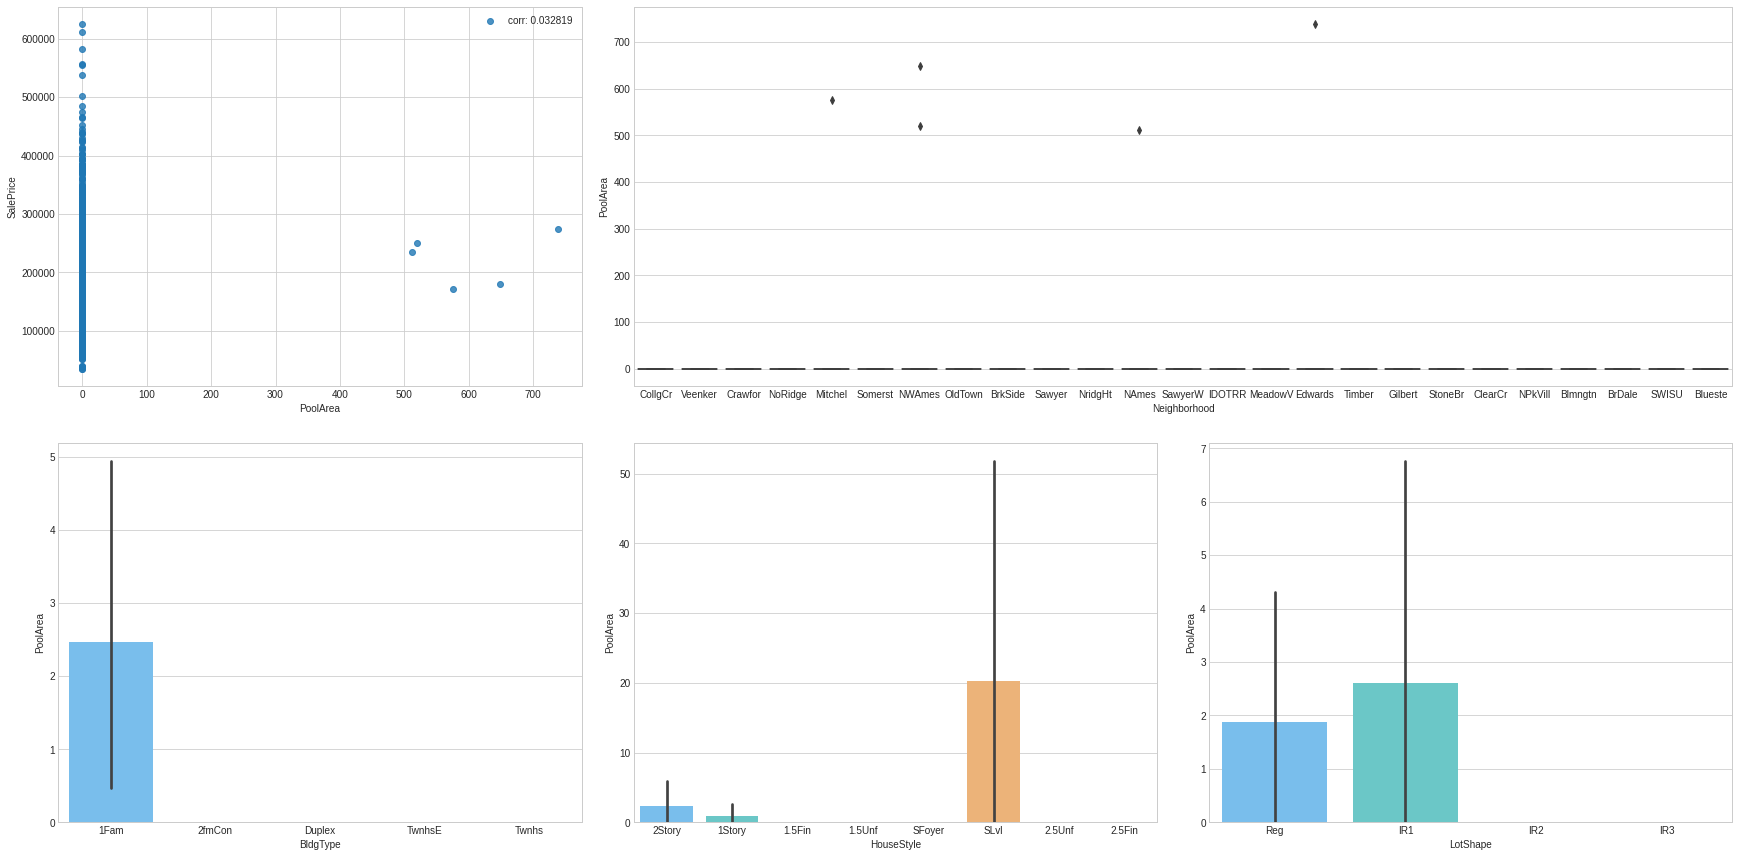

In [353]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['PoolArea'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['PoolArea'], train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="PoolArea", data=train, palette = mycols)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="PoolArea", data=train, palette = mycols)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="PoolArea", data=train, palette = mycols)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="PoolArea", data=train, palette = mycols);

Virtually, all the data is zero as most homes do not have a pool. I will flag the variable instead.

In [354]:
def PoolFlag(col):
    if col['PoolArea'] == 0:
        return 0
    else:
        return 1
    
all['HasPool_Flag'] = all.apply(PoolFlag, axis=1)
all.drop('PoolArea', axis=1, inplace=True)

***PoolQC***
- Pool quality.
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       NA	No Pool
		

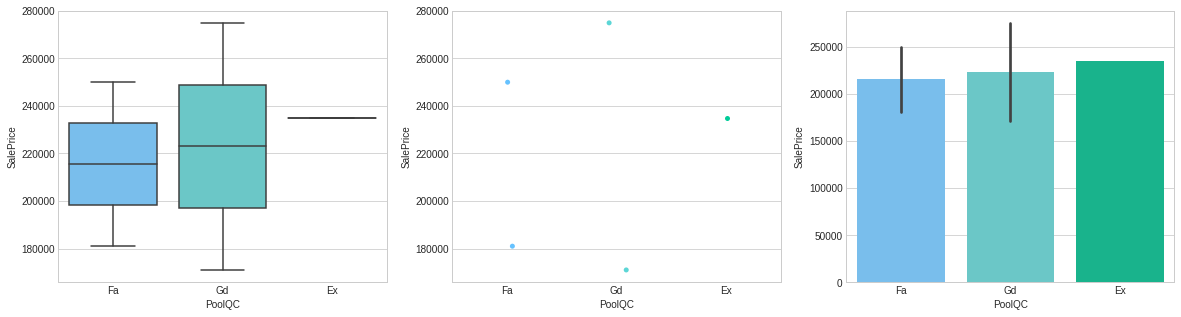

In [355]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="PoolQC", y="SalePrice", data=train, order=["Fa", "Gd", "Ex"], palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="PoolQC", y="SalePrice", data=train, size = 5, jitter = True, order=["Fa", "Gd", "Ex"], palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="PoolQC", y="SalePrice", data=train, order=["Fa", "Gd", "Ex"], palette = mycols);

This variable is dependent on the last one, and since we know virtually all the homes do not have a pool, I will just remove this feature all together.

In [356]:
all.drop('PoolQC', axis=1, inplace=True)

***Fence***
- Fence quality.
       GdPrv	Good Privacy
       MnPrv	Minimum Privacy
       GdWo	Good Wood
       MnWw	Minimum Wood/Wire
       NA	No Fence

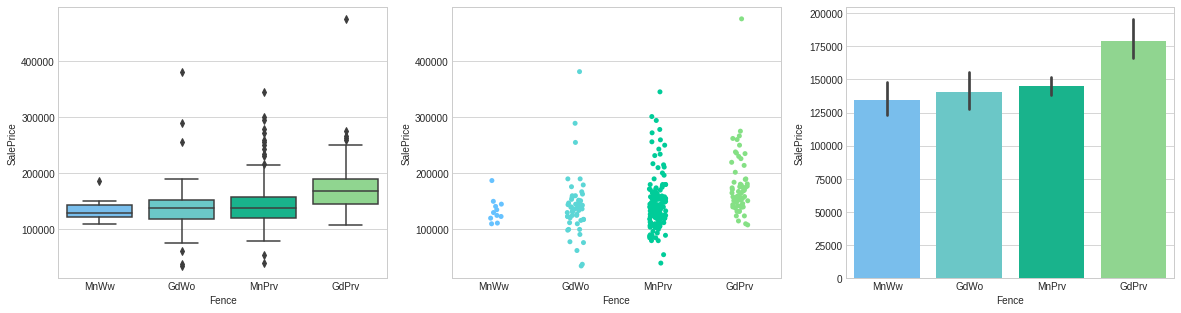

In [357]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="Fence", y="SalePrice", data=train, order = ["MnWw", "GdWo", "MnPrv", "GdPrv"], palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="Fence", y="SalePrice", data=train, size = 5, jitter = True, order = ["MnWw", "GdWo", "MnPrv", "GdPrv"], palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="Fence", y="SalePrice", data=train, order = ["MnWw", "GdWo", "MnPrv", "GdPrv"], palette = mycols);

There is a slight positive correlation between fences with "good privacy" the price of the home. However, it is not enough to consider it ordinal, especially as "good wood" and "minimum privacy" categories are ambiguous. I will create dummy features instead.

In [358]:
all = pd.get_dummies(all, columns = ["Fence"], prefix="Fence")
all.head(3)

MSZoning  LotFrontage  LotArea Street Alley LotShape LandContour LotConfig  \
0       RL         65.0     8450   Pave  None      Reg         Lvl    Inside   
1       RL         80.0     9600   Pave  None      Reg         Lvl       FR2   
2       RL         68.0    11250   Pave  None      IR1         Lvl    Inside   

  LandSlope Neighborhood Condition1 Condition2  OverallQual  OverallCond  \
0       Gtl      CollgCr       Norm       Norm            7            5   
1       Gtl      Veenker      Feedr       Norm            6            8   
2       Gtl      CollgCr       Norm       Norm            7            5   

   ExterQual  BsmtQual  BsmtCond  BsmtExposure Heating HeatingQC CentralAir  \
0          3         3         3             1    GasA        Ex          Y   
1          2         3         3             4    GasA        Ex          Y   
2          3         3         3             2    GasA        Ex          Y   

  Electrical  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0      SBrkr             3             1            3             8   
1      SBrkr             3             1            2             6   
2      SBrkr             3             1            3             6   

   Functional  Fireplaces  FireplaceQu  GarageCars PavedDrive  OpenPorchSF  \
0           7           0            0         2.0          Y           61   
1           7           1            3         2.0          Y            0   
2           7           1            3         2.0          Y           42   

   EnclosedPorch  3SsnPorch  ScreenPorch MiscFeature  MiscVal MoSold YrSold  \
0              0          0            0        None        0      2   2008   
1              0          0            0        None        0      5   2007   
2              0          0            0        None        0      9   2008   

  SaleType SaleCondition  ...  GarageType_2Types  GarageType_Attchd  \
0       WD        Normal  ...                  0                  1   
1       WD        Normal  ...                  0                  1   
2       WD        Normal  ...                  0                  1   

   GarageType_Basment  GarageType_BuiltIn  GarageType_CarPort  \
0                   0                   0                   0   
1                   0                   0                   0   
2                   0                   0                   0   

   GarageType_Detchd  GarageType_None  GarageYrBlt_1  GarageYrBlt_2  \
0                  0                0              0              0   
1                  0                0              0              1   
2                  0                0              0              0   

   GarageYrBlt_3  GarageFinish_Fin  GarageFinish_None  GarageFinish_RFn  \
0              1                 0                  0                 1   
1              0                 0                  0                 1   
2              1                 0                  0                 1   

   GarageFinish_Unf  GarageArea_1  GarageArea_2  GarageArea_3  \
0                 0             0             1             0   
1                 0             1             0             0   
2                 0             0             1             0   

   GarageQual_High  GarageQual_Low  GarageQual_None  GarageQual_TA  \
0                0               0                0              1   
1                0               0                0              1   
2                0               0                0              1   

   GarageCond_High  GarageCond_Low  GarageCond_None  GarageCond_TA  \
0                0               0                0              1   
1                0               0                0              1   
2                0               0                0              1   

   NoWoodDeck_Flag  WoodDeckSF_1  WoodDeckSF_2  WoodDeckSF_3  WoodDeckSF_4  \
0                1             1             0             0             0   
1                0             1 

<a id='location'></a>
#### 4.2.5 - Location

***MSZoning***
- Identifies the general zoning classification of the sale. 
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

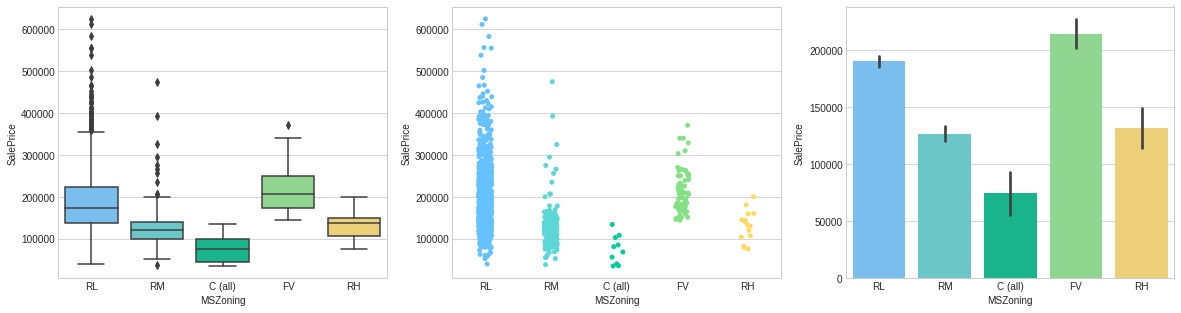

In [359]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="MSZoning", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="MSZoning", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="MSZoning", y="SalePrice", data=train, palette = mycols);

This is a categorical feature without order. I will create dummy features.

In [360]:
all = pd.get_dummies(all, columns = ["MSZoning"], prefix="MSZoning")
all.head(3)

LotFrontage  LotArea Street Alley LotShape LandContour LotConfig LandSlope  \
0         65.0     8450   Pave  None      Reg         Lvl    Inside       Gtl   
1         80.0     9600   Pave  None      Reg         Lvl       FR2       Gtl   
2         68.0    11250   Pave  None      IR1         Lvl    Inside       Gtl   

  Neighborhood Condition1 Condition2  OverallQual  OverallCond  ExterQual  \
0      CollgCr       Norm       Norm            7            5          3   
1      Veenker      Feedr       Norm            6            8          2   
2      CollgCr       Norm       Norm            7            5          3   

   BsmtQual  BsmtCond  BsmtExposure Heating HeatingQC CentralAir Electrical  \
0         3         3             1    GasA        Ex          Y      SBrkr   
1         3         3             4    GasA        Ex          Y      SBrkr   
2         3         3             2    GasA        Ex          Y      SBrkr   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0             3             1            3             8           7   
1             3             1            2             6           7   
2             3             1            3             6           7   

   Fireplaces  FireplaceQu  GarageCars PavedDrive  OpenPorchSF  EnclosedPorch  \
0           0            0         2.0          Y           61              0   
1           1            3         2.0          Y            0              0   
2           1            3         2.0          Y           42              0   

   3SsnPorch  ScreenPorch MiscFeature  MiscVal MoSold YrSold SaleType  \
0          0            0        None        0      2   2008       WD   
1          0            0        None        0      5   2007       WD   
2          0            0        None        0      9   2008       WD   

  SaleCondition  OverallQual-2  ...  GarageType_Detchd  GarageType_None  \
0        Normal             49  ...                  0                0   
1        Normal             36  ...                  0                0   
2        Normal             49  ...                  0                0   

   GarageYrBlt_1  GarageYrBlt_2  GarageYrBlt_3  GarageFinish_Fin  \
0              0              0              1                 0   
1              0              1              0                 0   
2              0              0              1                 0   

   GarageFinish_None  GarageFinish_RFn  GarageFinish_Unf  GarageArea_1  \
0                  0                 1                 0             0   
1                  0                 1                 0             1   
2                  0                 1                 0             0   

   GarageArea_2  GarageArea_3  GarageQual_High  GarageQual_Low  \
0             1             0                0               0   
1             0             0                0               0   
2             1             0                0               0   

   GarageQual_None  GarageQual_TA  GarageCond_High  GarageCond_Low  \
0                0              1                0               0   
1                0              1                0               0   
2                0              1                0               0   

   GarageCond_None  GarageCond_TA  NoWoodDeck_Flag  WoodDeckSF_1  \
0                0              1                1             1   
1                0              1                0             1   
2                0              1                1             1   

   WoodDeckSF_2  WoodDeckSF_3  WoodDeckSF_4  NoPorch_Flag  TotalPorchSF_1  \
0             0             0             0             0               1   
1             0             0             0             1               1   
2             0             0             0             0               1   

   TotalPorchSF_2  TotalPorchSF_3  TotalPorchSF_4  HasPool_Flag  Fence_GdPrv  \
0               0               0               0             0   

***Neighborhood***
- Physical locations within Ames city limits.
       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	 Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	 Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	  North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	 Northwest Ames
       OldTown	Old Town
       SWISU	  South & West of Iowa State University
       Sawyer	 Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	 Timberland
       Veenker	Veenker

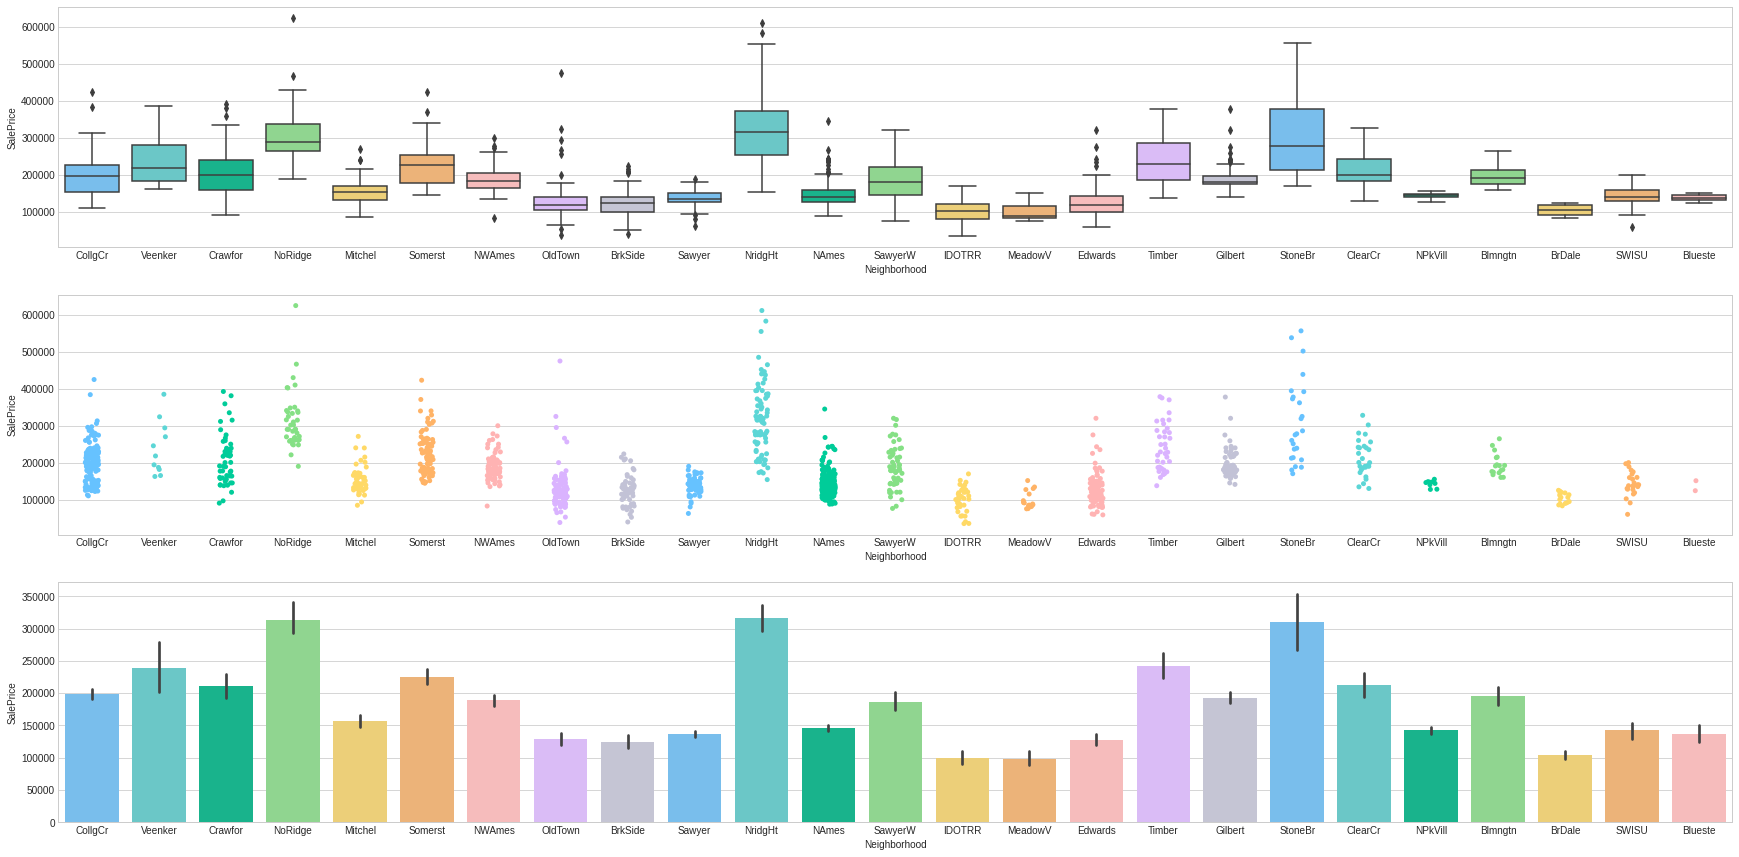

In [361]:
plt.subplots(figsize =(30, 15))

plt.subplot(3, 1, 1)
sns.boxplot(x="Neighborhood", y="SalePrice", data=train, palette = mycols)

plt.subplot(3, 1, 2)
sns.stripplot(x="Neighborhood", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(3, 1, 3)
sns.barplot(x="Neighborhood", y="SalePrice", data=train, palette = mycols);

Neighborhood is an important feature because we have such a high average range in some categories and low average in others. I will craete dummy features.

In [362]:
all = pd.get_dummies(all, columns = ["Neighborhood"], prefix="Neighborhood")
all.head(3)

LotFrontage  LotArea Street Alley LotShape LandContour LotConfig LandSlope  \
0         65.0     8450   Pave  None      Reg         Lvl    Inside       Gtl   
1         80.0     9600   Pave  None      Reg         Lvl       FR2       Gtl   
2         68.0    11250   Pave  None      IR1         Lvl    Inside       Gtl   

  Condition1 Condition2  OverallQual  OverallCond  ExterQual  BsmtQual  \
0       Norm       Norm            7            5          3         3   
1      Feedr       Norm            6            8          2         3   
2       Norm       Norm            7            5          3         3   

   BsmtCond  BsmtExposure Heating HeatingQC CentralAir Electrical  \
0         3             1    GasA        Ex          Y      SBrkr   
1         3             4    GasA        Ex          Y      SBrkr   
2         3             2    GasA        Ex          Y      SBrkr   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0             3             1            3             8           7   
1             3             1            2             6           7   
2             3             1            3             6           7   

   Fireplaces  FireplaceQu  GarageCars PavedDrive  OpenPorchSF  EnclosedPorch  \
0           0            0         2.0          Y           61              0   
1           1            3         2.0          Y            0              0   
2           1            3         2.0          Y           42              0   

   3SsnPorch  ScreenPorch MiscFeature  MiscVal MoSold YrSold SaleType  \
0          0            0        None        0      2   2008       WD   
1          0            0        None        0      5   2007       WD   
2          0            0        None        0      9   2008       WD   

  SaleCondition  OverallQual-2  GrLivArea-2  ...  NoPorch_Flag  \
0        Normal             49      2924100  ...             0   
1        Normal             36      1592644  ...             1   
2        Normal             49      3189796  ...             0   

   TotalPorchSF_1  TotalPorchSF_2  TotalPorchSF_3  TotalPorchSF_4  \
0               1               0               0               0   
1               1               0               0               0   
2               1               0               0               0   

   HasPool_Flag  Fence_GdPrv  Fence_GdWo  Fence_MnPrv  Fence_MnWw  Fence_None  \
0             0            0           0            0           0           1   
1             0            0           0            0           0           1   
2             0            0           0            0           0           1   

   MSZoning_C (all)  MSZoning_FV  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
0                 0            0            0            1            0   
1                 0            0            0            1            0   
2                 0            0            0            1            0   

   Neighborhood_Blmngtn  Neighborhood_Blueste  Neighborhood_BrDale  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   

   Neighborhood_BrkSide  Neighborhood_ClearCr  Neighborhood_CollgCr  \
0                     0                     0                     1   
1                     0                     0                     0   
2                     0                     0                     1   

   Neighborhood_Crawfor  Neighborhood_Edwards  Neighborhood_Gilbert  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   

   Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0                    0                     0                     0   
1                    0                

***Condition1*** & ***Condition2***
- Proximity to various conditions.
       Artery	Adjacent to arterial street
       Feedr	 Adjacent to feeder street	
       Norm	  Normal	
       RRNn	  Within 200' of North-South Railroad
       RRAn	  Adjacent to North-South Railroad
       PosN	  Near positive off-site feature--park, greenbelt, etc.
       PosA	  Adjacent to postive off-site feature
       RRNe	  Within 200' of East-West Railroad
       RRAe	  Adjacent to East-West Railroad

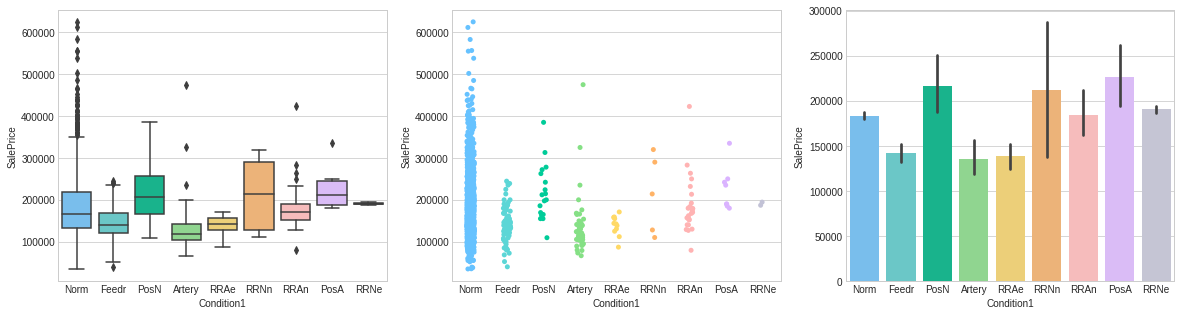

In [363]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="Condition1", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="Condition1", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="Condition1", y="SalePrice", data=train, palette = mycols);

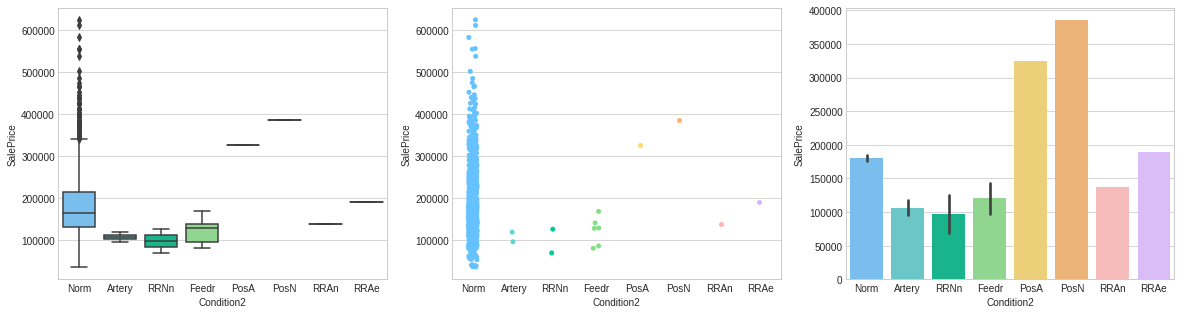

In [364]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="Condition2", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="Condition2", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="Condition2", y="SalePrice", data=train, palette = mycols);

For this feature, I'm going to cluster categories based upon the description. For example, all "Railroad" categories will be clustered together. After, I will dummy the features, and then flag Condition 2 to indicate if the value is different from Condition 1. This is because Condition 2 is dependent on Condition 1 and the values are very similar.

In [365]:
all['Condition1'] = all['Condition1'].map({"Norm":"Norm", "Feedr":"Street", "PosN":"Pos", "Artery":"Street", "RRAe":"Train",
                                                    "RRNn":"Train", "RRAn":"Train", "PosA":"Pos", "RRNe":"Train"})
all['Condition2'] = all['Condition2'].map({"Norm":"Norm", "Feedr":"Street", "PosN":"Pos", "Artery":"Street", "RRAe":"Train",
                                                    "RRNn":"Train", "RRAn":"Train", "PosA":"Pos", "RRNe":"Train"})

In [366]:
def ConditionMatch(col):
    if col['Condition1'] == col['Condition2']:
        return 0
    else:
        return 1
    
all['Diff2ndCondition_Flag'] = all.apply(ConditionMatch, axis=1)
all.drop('Condition2', axis=1, inplace=True)

all = pd.get_dummies(all, columns = ["Condition1"], prefix="Condition1")
all.head(3)

LotFrontage  LotArea Street Alley LotShape LandContour LotConfig LandSlope  \
0         65.0     8450   Pave  None      Reg         Lvl    Inside       Gtl   
1         80.0     9600   Pave  None      Reg         Lvl       FR2       Gtl   
2         68.0    11250   Pave  None      IR1         Lvl    Inside       Gtl   

   OverallQual  OverallCond  ExterQual  BsmtQual  BsmtCond  BsmtExposure  \
0            7            5          3         3         3             1   
1            6            8          2         3         3             4   
2            7            5          3         3         3             2   

  Heating HeatingQC CentralAir Electrical  BedroomAbvGr  KitchenAbvGr  \
0    GasA        Ex          Y      SBrkr             3             1   
1    GasA        Ex          Y      SBrkr             3             1   
2    GasA        Ex          Y      SBrkr             3             1   

   KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageCars  \
0            3             8           7           0            0         2.0   
1            2             6           7           1            3         2.0   
2            3             6           7           1            3         2.0   

  PavedDrive  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch MiscFeature  \
0          Y           61              0          0            0        None   
1          Y            0              0          0            0        None   
2          Y           42              0          0            0        None   

   MiscVal MoSold YrSold SaleType SaleCondition  OverallQual-2  GrLivArea-2  \
0        0      2   2008       WD        Normal             49      2924100   
1        0      5   2007       WD        Normal             36      1592644   
2        0      9   2008       WD        Normal             49      3189796   

   GarageCars-2  GarageArea-2  ...  HasPool_Flag  Fence_GdPrv  Fence_GdWo  \
0           4.0      300304.0  ...             0            0           0   
1           4.0      211600.0  ...             0            0           0   
2           4.0      369664.0  ...             0            0           0   

   Fence_MnPrv  Fence_MnWw  Fence_None  MSZoning_C (all)  MSZoning_FV  \
0            0           0           1                 0            0   
1            0           0           1                 0            0   
2            0           0           1                 0            0   

   MSZoning_RH  MSZoning_RL  MSZoning_RM  Neighborhood_Blmngtn  \
0            0            1            0                     0   
1            0            1            0                     0   
2            0            1            0                     0   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   

   Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  \
0                     0                    0            

#### 4.2.6 - Land

***LotFrontage***
- Linear feet of street connected to property.

In [367]:
# grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
# plt.subplots(figsize =(30, 15))

# plt.subplot(grid[0, 0])
# g = sns.regplot(x=train['LotFrontage'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['LotFrontage'], train['SalePrice'])[0]))
# g = g.legend(loc="best")

# plt.subplot(grid[0, 1:])
# sns.boxplot(x="Neighborhood", y="LotFrontage", data=train, palette = mycols)

# plt.subplot(grid[1, 0]);
# sns.barplot(x="BldgType", y="LotFrontage", data=train, palette = mycols)

# plt.subplot(grid[1, 1]);
# sns.barplot(x="HouseStyle", y="LotFrontage", data=train, palette = mycols)

# plt.subplot(grid[1, 2]);
# sns.barplot(x="LotShape", y="LotFrontage", data=train, palette = mycols);

This feature seems to be slightly positively correlated with SalePrice. This is a continuous feature and I will leave it as is for now.

***LotArea***
- Lot size in square feet.

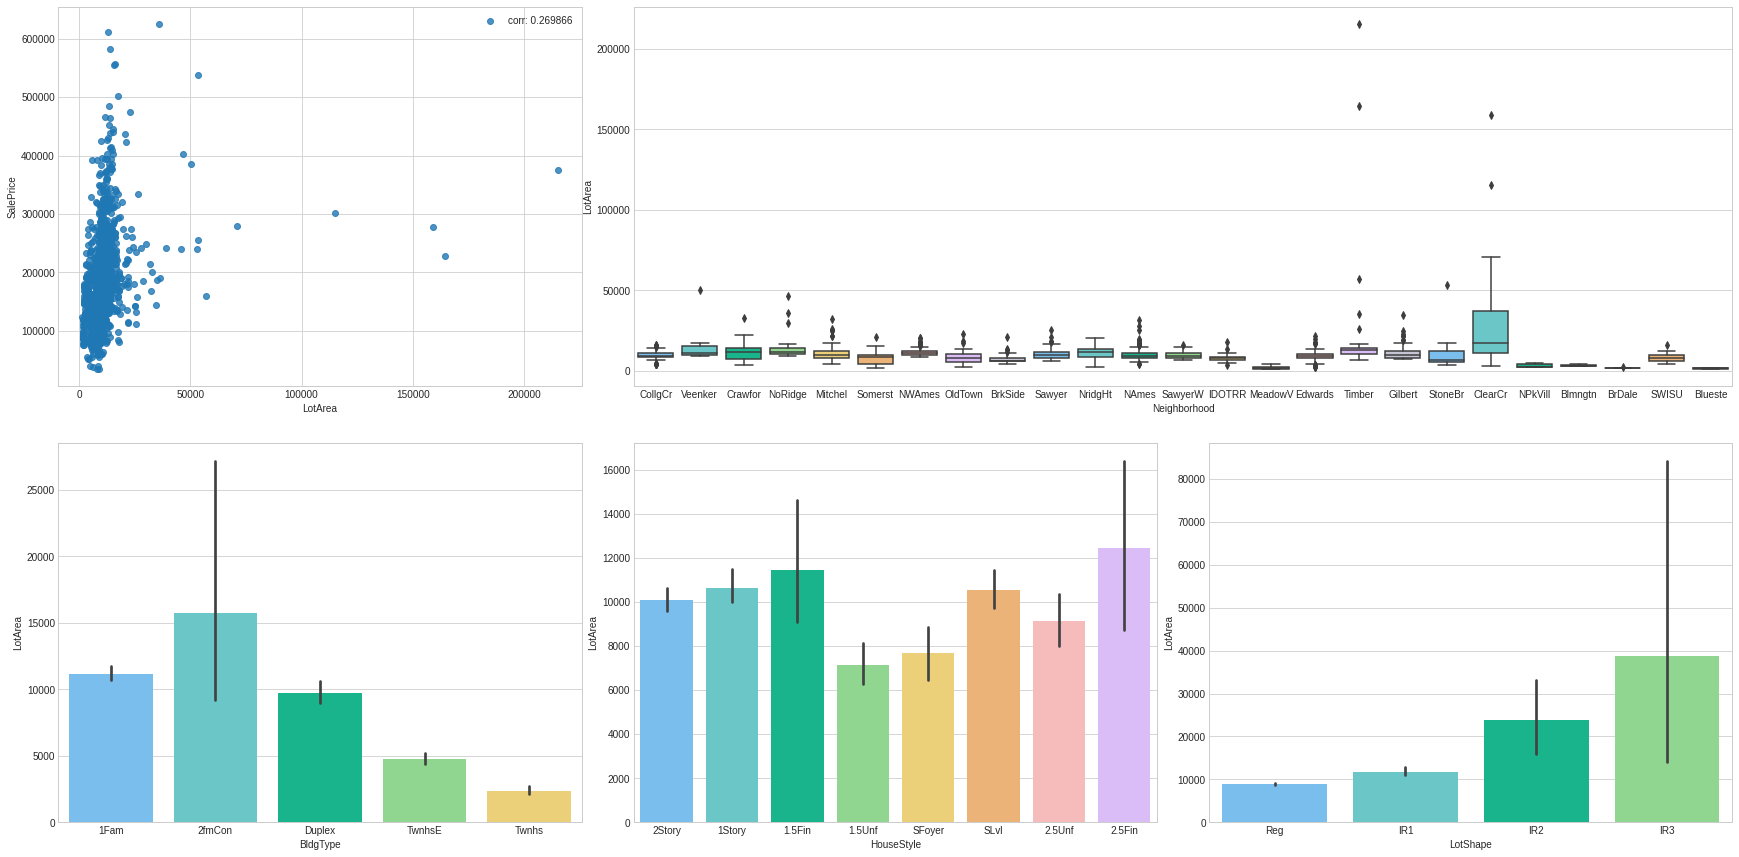

In [368]:
grid = plt.GridSpec(2, 3, wspace=0.1, hspace=0.15)
plt.subplots(figsize =(30, 15))

plt.subplot(grid[0, 0])
g = sns.regplot(x=train['LotArea'], y=train['SalePrice'], fit_reg=False, label = "corr: %2f"%(pearsonr(train['LotArea'], train['SalePrice'])[0]))
g = g.legend(loc="best")

plt.subplot(grid[0, 1:])
sns.boxplot(x="Neighborhood", y="LotArea", data=train, palette = mycols)

plt.subplot(grid[1, 0]);
sns.barplot(x="BldgType", y="LotArea", data=train, palette = mycols)

plt.subplot(grid[1, 1]);
sns.barplot(x="HouseStyle", y="LotArea", data=train, palette = mycols)

plt.subplot(grid[1, 2]);
sns.barplot(x="LotShape", y="LotArea", data=train, palette = mycols);

LotArea has a positive correlation with SalePrice. For this feature, I will use pandas qcut which divides the data into an equal amount of points per bin. After, I will turn them into dummy features.

In [369]:
all['LotArea_Band'] = pd.qcut(all['LotArea'], 8)
all['LotArea_Band'].unique()

[(7474.0, 8520.0], (9450.0, 10355.25], (10355.25, 11554.5], (13613.0, 215245.0], (5684.75, 7474.0], (11554.5, 13613.0], (1299.999, 5684.75], (8520.0, 9450.0]]
Categories (8, interval[float64]): [(1299.999, 5684.75] < (5684.75, 7474.0] < (7474.0, 8520.0] <
                                    (8520.0, 9450.0] < (9450.0, 10355.25] < (10355.25, 11554.5] <
                                    (11554.5, 13613.0] < (13613.0, 215245.0]]

In [370]:
all.loc[all['LotArea']<=5684.75, 'LotArea'] = 1
all.loc[(all['LotArea']>5684.75) & (all['LotArea']<=7474), 'LotArea'] = 2
all.loc[(all['LotArea']>7474) & (all['LotArea']<=8520), 'LotArea'] = 3
all.loc[(all['LotArea']>8520) & (all['LotArea']<=9450), 'LotArea'] = 4
all.loc[(all['LotArea']>9450) & (all['LotArea']<=10355.25), 'LotArea'] = 5
all.loc[(all['LotArea']>10355.25) & (all['LotArea']<=11554.25), 'LotArea'] = 6
all.loc[(all['LotArea']>11554.25) & (all['LotArea']<=13613), 'LotArea'] = 7
all.loc[all['LotArea']>13613, 'LotArea'] = 8
all['LotArea'] = all['LotArea'].astype(int)

all.drop('LotArea_Band', axis=1, inplace=True)

all = pd.get_dummies(all, columns = ["LotArea"], prefix="LotArea")
all.head(3)

LotFrontage Street Alley LotShape LandContour LotConfig LandSlope  \
0         65.0   Pave  None      Reg         Lvl    Inside       Gtl   
1         80.0   Pave  None      Reg         Lvl       FR2       Gtl   
2         68.0   Pave  None      IR1         Lvl    Inside       Gtl   

   OverallQual  OverallCond  ExterQual  BsmtQual  BsmtCond  BsmtExposure  \
0            7            5          3         3         3             1   
1            6            8          2         3         3             4   
2            7            5          3         3         3             2   

  Heating HeatingQC CentralAir Electrical  BedroomAbvGr  KitchenAbvGr  \
0    GasA        Ex          Y      SBrkr             3             1   
1    GasA        Ex          Y      SBrkr             3             1   
2    GasA        Ex          Y      SBrkr             3             1   

   KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageCars  \
0            3             8           7           0            0         2.0   
1            2             6           7           1            3         2.0   
2            3             6           7           1            3         2.0   

  PavedDrive  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch MiscFeature  \
0          Y           61              0          0            0        None   
1          Y            0              0          0            0        None   
2          Y           42              0          0            0        None   

   MiscVal MoSold YrSold SaleType SaleCondition  OverallQual-2  GrLivArea-2  \
0        0      2   2008       WD        Normal             49      2924100   
1        0      5   2007       WD        Normal             36      1592644   
2        0      9   2008       WD        Normal             49      3189796   

   GarageCars-2  GarageArea-2  TotalBsmtSF-2  ...  MSZoning_RH  MSZoning_RL  \
0           4.0      300304.0       732736.0  ...            0            1   
1           4.0      211600.0      1592644.0  ...            0            1   
2           4.0      369664.0       846400.0  ...            0            1   

   MSZoning_RM  Neighborhood_Blmngtn  Neighborhood_Blueste  \
0            0                     0                     0   
1            0                     0                     0   
2            0                     0                     0   

   Neighborhood_BrDale  Neighborhood_BrkSide  Neighborhood_ClearCr  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   

   Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
0                     1                     0                     0   
1                     0                     0                     0   
2                     1                     0                     0   

   Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   

   Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  \
0                     0                   0                     0   
1                     0                   0                     0   
2                     0                   0                     0   

   Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   

   Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  \
0                     0                   0                    0   
1                     0                   0   

***LotShape***
- General shape of property.
       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

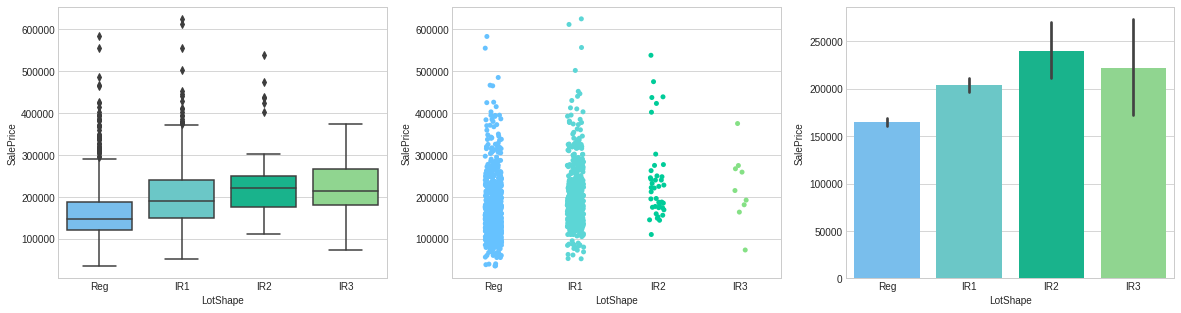

In [371]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="LotShape", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="LotShape", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="LotShape", y="SalePrice", data=train, palette = mycols);

Most of the data points lie in the first two categories, and all the classes have extremes. I will create dummy features as there's no order to them.

In [372]:
all = pd.get_dummies(all, columns = ["LotShape"], prefix="LotShape")
all.head(3)

LotFrontage Street Alley LandContour LotConfig LandSlope  OverallQual  \
0         65.0   Pave  None         Lvl    Inside       Gtl            7   
1         80.0   Pave  None         Lvl       FR2       Gtl            6   
2         68.0   Pave  None         Lvl    Inside       Gtl            7   

   OverallCond  ExterQual  BsmtQual  BsmtCond  BsmtExposure Heating HeatingQC  \
0            5          3         3         3             1    GasA        Ex   
1            8          2         3         3             4    GasA        Ex   
2            5          3         3         3             2    GasA        Ex   

  CentralAir Electrical  BedroomAbvGr  KitchenAbvGr  KitchenQual  \
0          Y      SBrkr             3             1            3   
1          Y      SBrkr             3             1            2   
2          Y      SBrkr             3             1            3   

   TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageCars PavedDrive  \
0             8           7           0            0         2.0          Y   
1             6           7           1            3         2.0          Y   
2             6           7           1            3         2.0          Y   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch MiscFeature  MiscVal  \
0           61              0          0            0        None        0   
1            0              0          0            0        None        0   
2           42              0          0            0        None        0   

  MoSold YrSold SaleType SaleCondition  OverallQual-2  GrLivArea-2  \
0      2   2008       WD        Normal             49      2924100   
1      5   2007       WD        Normal             36      1592644   
2      9   2008       WD        Normal             49      3189796   

   GarageCars-2  GarageArea-2  TotalBsmtSF-2  1stFlrSF-2  ...  \
0           4.0      300304.0       732736.0      732736  ...   
1           4.0      211600.0      1592644.0     1592644  ...   
2           4.0      369664.0       846400.0      846400  ...   

   Neighborhood_Blueste  Neighborhood_BrDale  Neighborhood_BrkSide  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   

   Neighborhood_ClearCr  Neighborhood_CollgCr  Neighborhood_Crawfor  \
0                     0                     1                     0   
1                     0                     0                     0   
2                     0                     1                     0   

   Neighborhood_Edwards  Neighborhood_Gilbert  Neighborhood_IDOTRR  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   

   Neighborhood_MeadowV  Neighborhood_Mitchel  Neighborhood_NAmes  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   

   Neighborhood_NPkVill  Neighborhood_NWAmes  Neighborhood_NoRidge  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   

   Neighborhood_NridgHt  Neighborhood_OldTown  Neighborhood_SWISU  \
0                     0                     0                   0   
1                     0                     0                   0   
2                     0                     0                   0   

   Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0              

***LandContour***
- Flatness of the property
       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression

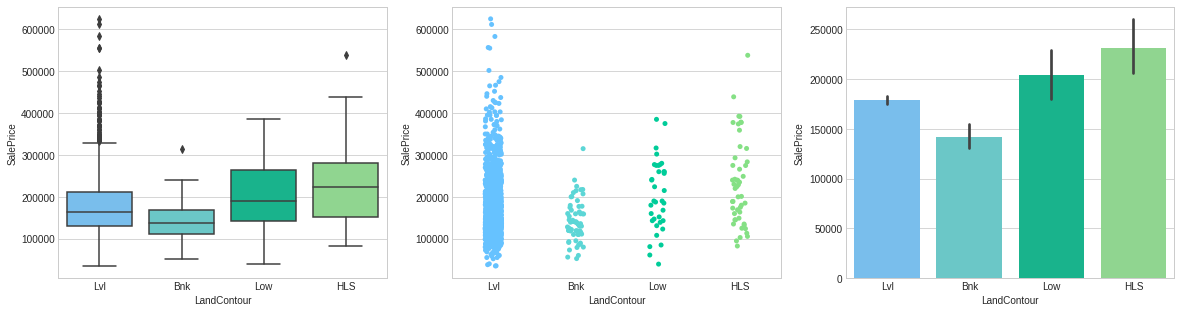

In [373]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="LandContour", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="LandContour", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="LandContour", y="SalePrice", data=train, palette = mycols);

Most homes are on "level" ground and it seems the highest average prices are for homes on hills. I will create dummy features.

In [374]:
all = pd.get_dummies(all, columns = ["LandContour"], prefix="LandContour")
all.head(3)

LotFrontage Street Alley LotConfig LandSlope  OverallQual  OverallCond  \
0         65.0   Pave  None    Inside       Gtl            7            5   
1         80.0   Pave  None       FR2       Gtl            6            8   
2         68.0   Pave  None    Inside       Gtl            7            5   

   ExterQual  BsmtQual  BsmtCond  BsmtExposure Heating HeatingQC CentralAir  \
0          3         3         3             1    GasA        Ex          Y   
1          2         3         3             4    GasA        Ex          Y   
2          3         3         3             2    GasA        Ex          Y   

  Electrical  BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  \
0      SBrkr             3             1            3             8   
1      SBrkr             3             1            2             6   
2      SBrkr             3             1            3             6   

   Functional  Fireplaces  FireplaceQu  GarageCars PavedDrive  OpenPorchSF  \
0           7           0            0         2.0          Y           61   
1           7           1            3         2.0          Y            0   
2           7           1            3         2.0          Y           42   

   EnclosedPorch  3SsnPorch  ScreenPorch MiscFeature  MiscVal MoSold YrSold  \
0              0          0            0        None        0      2   2008   
1              0          0            0        None        0      5   2007   
2              0          0            0        None        0      9   2008   

  SaleType SaleCondition  OverallQual-2  GrLivArea-2  GarageCars-2  \
0       WD        Normal             49      2924100           4.0   
1       WD        Normal             36      1592644           4.0   
2       WD        Normal             49      3189796           4.0   

   GarageArea-2  TotalBsmtSF-2  1stFlrSF-2  FullBath-2  ...  \
0      300304.0       732736.0      732736           4  ...   
1      211600.0      1592644.0     1592644           4  ...   
2      369664.0       846400.0      846400           4  ...   

   Neighborhood_CollgCr  Neighborhood_Crawfor  Neighborhood_Edwards  \
0                     1                     0                     0   
1                     0                     0                     0   
2                     1                     0                     0   

   Neighborhood_Gilbert  Neighborhood_IDOTRR  Neighborhood_MeadowV  \
0                     0                    0                     0   
1                     0                    0                     0   
2                     0                    0                     0   

   Neighborhood_Mitchel  Neighborhood_NAmes  Neighborhood_NPkVill  \
0                     0                   0                     0   
1                     0                   0                     0   
2                     0                   0                     0   

   Neighborhood_NWAmes  Neighborhood_NoRidge  Neighborhood_NridgHt  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   

   Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  \
0                     0                   0                    0   
1                     0                   0                    0   
2                     0                   0                    0   

   Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   

   Neighborhood_Timber  Neighborhood_Veenker  Diff2ndCondition_Flag  \
0                    0                     0                      0   
1                    0                     1                      1   
2                    0           

***LotConfig***
- Lot configuration.
       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

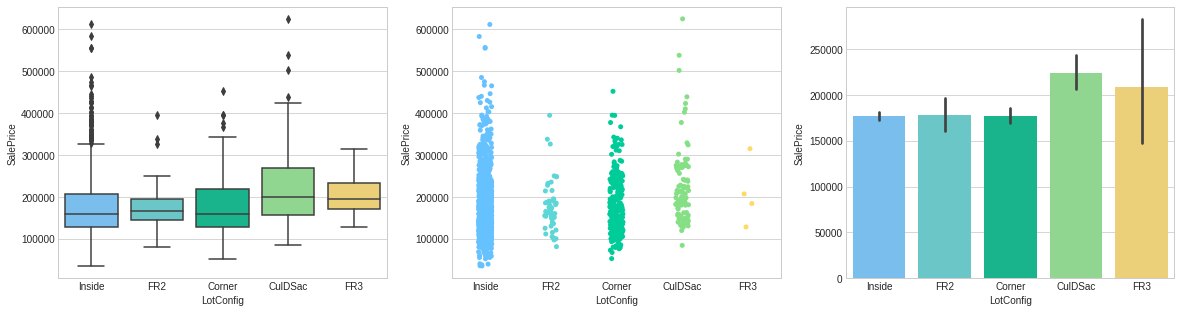

In [375]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="LotConfig", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="LotConfig", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="LotConfig", y="SalePrice", data=train, palette = mycols);

Most houses are either on the inside or the corner of the lot, and Cul de sac's have the highest average. I will cluster the FR2 and FR3 variables and then create dummy features.

In [376]:
all['LotConfig'] = all['LotConfig'].map({"Inside":"Inside", "FR2":"FR", "Corner":"Corner", "CulDSac":"CulDSac", "FR3":"FR"})

all = pd.get_dummies(all, columns = ["LotConfig"], prefix="LotConfig")
all.head(3)

LotFrontage Street Alley LandSlope  OverallQual  OverallCond  ExterQual  \
0         65.0   Pave  None       Gtl            7            5          3   
1         80.0   Pave  None       Gtl            6            8          2   
2         68.0   Pave  None       Gtl            7            5          3   

   BsmtQual  BsmtCond  BsmtExposure Heating HeatingQC CentralAir Electrical  \
0         3         3             1    GasA        Ex          Y      SBrkr   
1         3         3             4    GasA        Ex          Y      SBrkr   
2         3         3             2    GasA        Ex          Y      SBrkr   

   BedroomAbvGr  KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  \
0             3             1            3             8           7   
1             3             1            2             6           7   
2             3             1            3             6           7   

   Fireplaces  FireplaceQu  GarageCars PavedDrive  OpenPorchSF  EnclosedPorch  \
0           0            0         2.0          Y           61              0   
1           1            3         2.0          Y            0              0   
2           1            3         2.0          Y           42              0   

   3SsnPorch  ScreenPorch MiscFeature  MiscVal MoSold YrSold SaleType  \
0          0            0        None        0      2   2008       WD   
1          0            0        None        0      5   2007       WD   
2          0            0        None        0      9   2008       WD   

  SaleCondition  OverallQual-2  GrLivArea-2  GarageCars-2  GarageArea-2  \
0        Normal             49      2924100           4.0      300304.0   
1        Normal             36      1592644           4.0      211600.0   
2        Normal             49      3189796           4.0      369664.0   

   TotalBsmtSF-2  1stFlrSF-2  FullBath-2  TotRmsAbvGrd-2  ...  \
0       732736.0      732736           4              64  ...   
1      1592644.0     1592644           4              36  ...   
2       846400.0      846400           4              36  ...   

   Neighborhood_IDOTRR  Neighborhood_MeadowV  Neighborhood_Mitchel  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   

   Neighborhood_NAmes  Neighborhood_NPkVill  Neighborhood_NWAmes  \
0                   0                     0                    0   
1                   0                     0                    0   
2                   0                     0                    0   

   Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   

   Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  \
0                   0                    0                     0   
1                   0                    0                     0   
2                   0                    0                     0   

   Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   

   Neighborhood_Veenker  Diff2ndCondition_Flag  Condition1_Norm  \
0                     0                      0                1   
1                     1                      1                0   
2                     0                      0                1   

   Condition1_Pos  Condition1_Street  Condition1_Train  LotArea_1  LotArea_2  \
0               0                  0                 0          0          0   
1               0                  1                 0          0          0   
2 

***LandSlope***
- Slope of property.
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

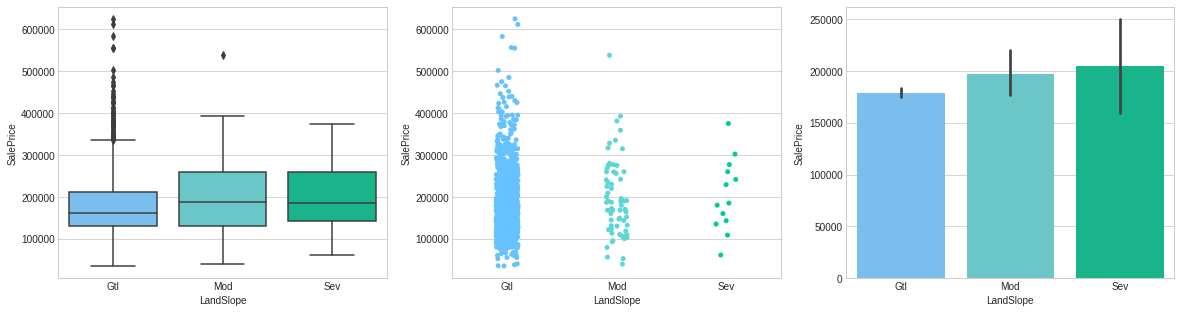

In [377]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="LandSlope", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="LandSlope", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="LandSlope", y="SalePrice", data=train, palette = mycols);

Most homes fall into the "gentle slope" category, and deeper slows don't seem to affect SalePrice much. I will cluster the last two categories flag this variable to indicate a gentle slope.

In [378]:
all['LandSlope'] = all['LandSlope'].map({"Gtl":1, "Mod":2, "Sev":2})

In [379]:
def Slope(col):
    if col['LandSlope'] == 1:
        return 1
    else:
        return 0
    
all['GentleSlope_Flag'] = all.apply(Slope, axis=1)
all.drop('LandSlope', axis=1, inplace=True)

<a id='access'></a>
#### 4.2.7 - Access

***Street***
- Type of road access to the property.
       Grvl	Gravel	
       Pave	Paved

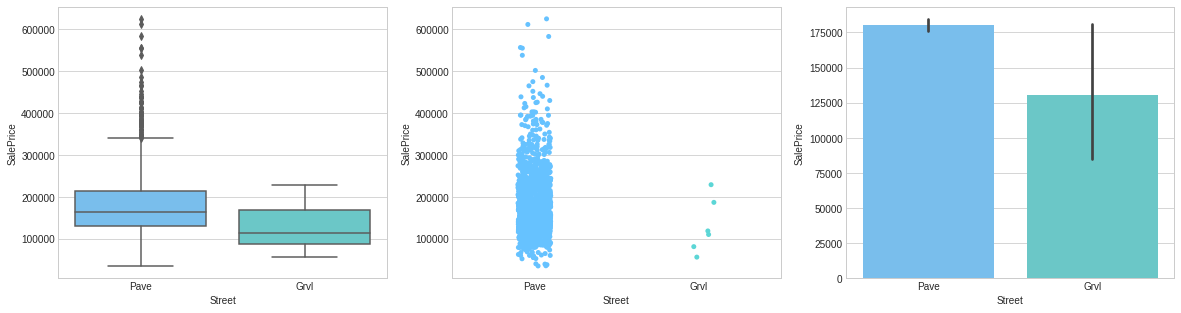

In [380]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="Street", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="Street", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="Street", y="SalePrice", data=train, palette = mycols);

There are only six data points in the Grvl class. I will drop this redundant feature.

In [381]:
all.drop('Street', axis=1, inplace=True)

***Alley***
- Type of alley access to the property.

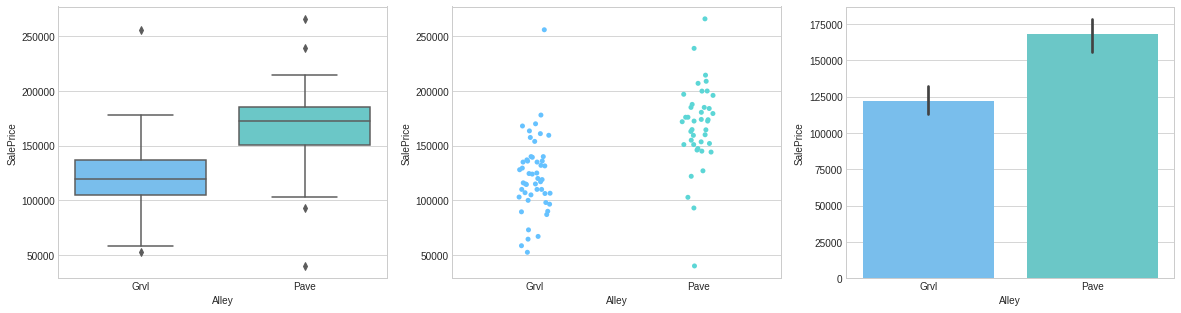

In [382]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="Alley", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="Alley", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="Alley", y="SalePrice", data=train, palette = mycols);

Paved alleys have a higher aver SalePrice than gravel ones, and I will create dummy features from it.

In [383]:
all = pd.get_dummies(all, columns = ["Alley"], prefix="Alley")
all.head(3)

LotFrontage  OverallQual  OverallCond  ExterQual  BsmtQual  BsmtCond  \
0         65.0            7            5          3         3         3   
1         80.0            6            8          2         3         3   
2         68.0            7            5          3         3         3   

   BsmtExposure Heating HeatingQC CentralAir Electrical  BedroomAbvGr  \
0             1    GasA        Ex          Y      SBrkr             3   
1             4    GasA        Ex          Y      SBrkr             3   
2             2    GasA        Ex          Y      SBrkr             3   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0             1            3             8           7           0   
1             1            2             6           7           1   
2             1            3             6           7           1   

   FireplaceQu  GarageCars PavedDrive  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0            0         2.0          Y           61              0          0   
1            3         2.0          Y            0              0          0   
2            3         2.0          Y           42              0          0   

   ScreenPorch MiscFeature  MiscVal MoSold YrSold SaleType SaleCondition  \
0            0        None        0      2   2008       WD        Normal   
1            0        None        0      5   2007       WD        Normal   
2            0        None        0      9   2008       WD        Normal   

   OverallQual-2  GrLivArea-2  GarageCars-2  GarageArea-2  TotalBsmtSF-2  \
0             49      2924100           4.0      300304.0       732736.0   
1             36      1592644           4.0      211600.0      1592644.0   
2             49      3189796           4.0      369664.0       846400.0   

   1stFlrSF-2  FullBath-2  TotRmsAbvGrd-2  YearBuilt-2  YearRemodAdd-2  \
0      732736           4              64      4012009         4012009   
1     1592644           4              36      3904576         3904576   
2      846400           4              36      4004001         4008004   

   OverallQual-3  ...  Neighborhood_NPkVill  Neighborhood_NWAmes  \
0            343  ...                     0                    0   
1            216  ...                     0                    0   
2            343  ...                     0                    0   

   Neighborhood_NoRidge  Neighborhood_NridgHt  Neighborhood_OldTown  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   

   Neighborhood_SWISU  Neighborhood_Sawyer  Neighborhood_SawyerW  \
0                   0                    0                     0   
1                   0                    0                     0   
2                   0                    0                     0   

   Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   

   Neighborhood_Veenker  Diff2ndCondition_Flag  Condition1_Norm  \
0                     0                      0                1   
1                     1                      1                0   
2                     0                      0                1   

   Condition1_Pos  Condition1_Street  Condition1_Train  LotArea_1  LotArea_2  \
0               0                  0                 0          0          0   
1               0                  1                 0          0          0   
2               0                  0                 0          0          0   

   LotArea_3  LotArea_4  LotArea_5  LotArea_6  LotArea_7  LotArea_8  \
0          1          0          0          0          0          0   
1          0          0          1          0          0

***PavedDrive***
- Paved driveway.
       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

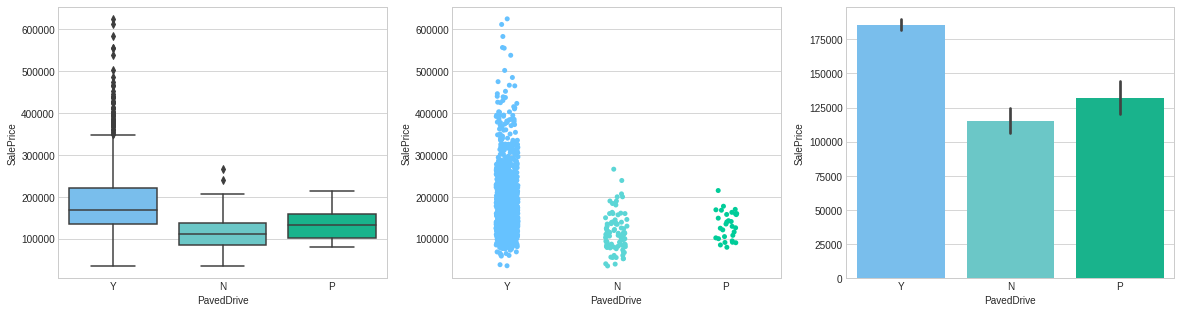

In [384]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="PavedDrive", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="PavedDrive", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="PavedDrive", y="SalePrice", data=train, palette = mycols);

Paved driveways command the highest average SalePrice and also contain the vast majority of data points. I will create dummy variables for this feature.

In [385]:
all = pd.get_dummies(all, columns = ["PavedDrive"], prefix="PavedDrive")
all.head(3)

LotFrontage  OverallQual  OverallCond  ExterQual  BsmtQual  BsmtCond  \
0         65.0            7            5          3         3         3   
1         80.0            6            8          2         3         3   
2         68.0            7            5          3         3         3   

   BsmtExposure Heating HeatingQC CentralAir Electrical  BedroomAbvGr  \
0             1    GasA        Ex          Y      SBrkr             3   
1             4    GasA        Ex          Y      SBrkr             3   
2             2    GasA        Ex          Y      SBrkr             3   

   KitchenAbvGr  KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  \
0             1            3             8           7           0   
1             1            2             6           7           1   
2             1            3             6           7           1   

   FireplaceQu  GarageCars  OpenPorchSF  EnclosedPorch  3SsnPorch  \
0            0         2.0           61              0          0   
1            3         2.0            0              0          0   
2            3         2.0           42              0          0   

   ScreenPorch MiscFeature  MiscVal MoSold YrSold SaleType SaleCondition  \
0            0        None        0      2   2008       WD        Normal   
1            0        None        0      5   2007       WD        Normal   
2            0        None        0      9   2008       WD        Normal   

   OverallQual-2  GrLivArea-2  GarageCars-2  GarageArea-2  TotalBsmtSF-2  \
0             49      2924100           4.0      300304.0       732736.0   
1             36      1592644           4.0      211600.0      1592644.0   
2             49      3189796           4.0      369664.0       846400.0   

   1stFlrSF-2  FullBath-2  TotRmsAbvGrd-2  YearBuilt-2  YearRemodAdd-2  \
0      732736           4              64      4012009         4012009   
1     1592644           4              36      3904576         3904576   
2      846400           4              36      4004001         4008004   

   OverallQual-3  GrLivArea-3  ...  Neighborhood_NridgHt  \
0            343   5000211000  ...                     0   
1            216   2009916728  ...                     0   
2            343   5696975656  ...                     0   

   Neighborhood_OldTown  Neighborhood_SWISU  Neighborhood_Sawyer  \
0                     0                   0                    0   
1                     0                   0                    0   
2                     0                   0                    0   

   Neighborhood_SawyerW  Neighborhood_Somerst  Neighborhood_StoneBr  \
0                     0                     0                     0   
1                     0                     0                     0   
2                     0                     0                     0   

   Neighborhood_Timber  Neighborhood_Veenker  Diff2ndCondition_Flag  \
0                    0                     0                      0   
1                    0                     1                      1   
2                    0                     0                      0   

   Condition1_Norm  Condition1_Pos  Condition1_Street  Condition1_Train  \
0                1               0                  0                 0   
1                0               0                  1                 0   
2                1               0                  0                 0   

   LotArea_1  LotArea_2  LotArea_3  LotArea_4  LotArea_5  LotArea_6  \
0          0          0          1          0          0          0   
1          0          0          0          0          1          0   
2          0          0          0          0          0          1   

   LotArea_7  LotArea_8  LotShape_IR1  LotShape_IR2  LotShape_IR3  \
0          0          0             0             0             0   
1          0          0             0             0             0   
2          0          0             1             0             0  

<a id='utilities'></a>
#### 4.2.8 - Utilities

***Heating***
- Type of heating.
       Floor	Floor Furnace
       GasA	 Gas forced warm air furnace
       GasW	 Gas hot water or steam heat
       Grav	 Gravity furnace	
       OthW	 Hot water or steam heat other than gas
       Wall	 Wall furnace

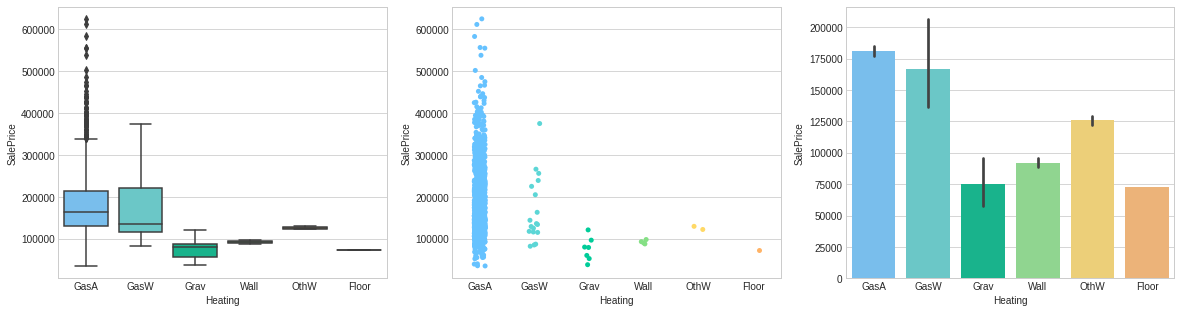

In [386]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="Heating", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="Heating", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="Heating", y="SalePrice", data=train, palette = mycols);

The highest frequency and average SalePrice come from the GasA category, and the other classes have very few data points. I will create a flag to indicate the presence the GasA.

In [387]:
all['GasA_Flag'] = all['Heating'].map({"GasA":1, "GasW":0, "Grav":0, "Wall":0, "OthW":0, "Floor":0})
all.drop('Heating', axis=1, inplace=True)
all.head(3)

LotFrontage  OverallQual  OverallCond  ExterQual  BsmtQual  BsmtCond  \
0         65.0            7            5          3         3         3   
1         80.0            6            8          2         3         3   
2         68.0            7            5          3         3         3   

   BsmtExposure HeatingQC CentralAir Electrical  BedroomAbvGr  KitchenAbvGr  \
0             1        Ex          Y      SBrkr             3             1   
1             4        Ex          Y      SBrkr             3             1   
2             2        Ex          Y      SBrkr             3             1   

   KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageCars  \
0            3             8           7           0            0         2.0   
1            2             6           7           1            3         2.0   
2            3             6           7           1            3         2.0   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch MiscFeature  MiscVal  \
0           61              0          0            0        None        0   
1            0              0          0            0        None        0   
2           42              0          0            0        None        0   

  MoSold YrSold SaleType SaleCondition  OverallQual-2  GrLivArea-2  \
0      2   2008       WD        Normal             49      2924100   
1      5   2007       WD        Normal             36      1592644   
2      9   2008       WD        Normal             49      3189796   

   GarageCars-2  GarageArea-2  TotalBsmtSF-2  1stFlrSF-2  FullBath-2  \
0           4.0      300304.0       732736.0      732736           4   
1           4.0      211600.0      1592644.0     1592644           4   
2           4.0      369664.0       846400.0      846400           4   

   TotRmsAbvGrd-2  YearBuilt-2  YearRemodAdd-2  OverallQual-3  GrLivArea-3  \
0              64      4012009         4012009            343   5000211000   
1              36      3904576         3904576            216   2009916728   
2              36      4004001         4008004            343   5696975656   

   GarageCars-3  ...  Neighborhood_OldTown  Neighborhood_SWISU  \
0           8.0  ...                     0                   0   
1           8.0  ...                     0                   0   
2           8.0  ...                     0                   0   

   Neighborhood_Sawyer  Neighborhood_SawyerW  Neighborhood_Somerst  \
0                    0                     0                     0   
1                    0                     0                     0   
2                    0                     0                     0   

   Neighborhood_StoneBr  Neighborhood_Timber  Neighborhood_Veenker  \
0                     0                    0                     0   
1                     0                    0                     1   
2                     0                    0                     0   

   Diff2ndCondition_Flag  Condition1_Norm  Condition1_Pos  Condition1_Street  \
0                      0                1               0                  0   
1                      1                0               0                  1   
2                      0                1               0                  0   

   Condition1_Train  LotArea_1  LotArea_2  LotArea_3  LotArea_4  LotArea_5  \
0                 0          0          0          1          0          0   
1                 0          0          0          0          0          1   
2                 0          0          0          0          0          0   

   LotArea_6  LotArea_7  LotArea_8  LotShape_IR1  LotShape_IR2  LotShape_IR3  \
0          0          0          0             0             0             0   
1          0          0          0             0             0             0   
2          1          0          0             1             0             0   

   LotShape_Reg  LandContour_Bnk  LandContour_HLS  LandContour_Low  \
0           

***HeatingQC***
- Heating quality and condition.
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

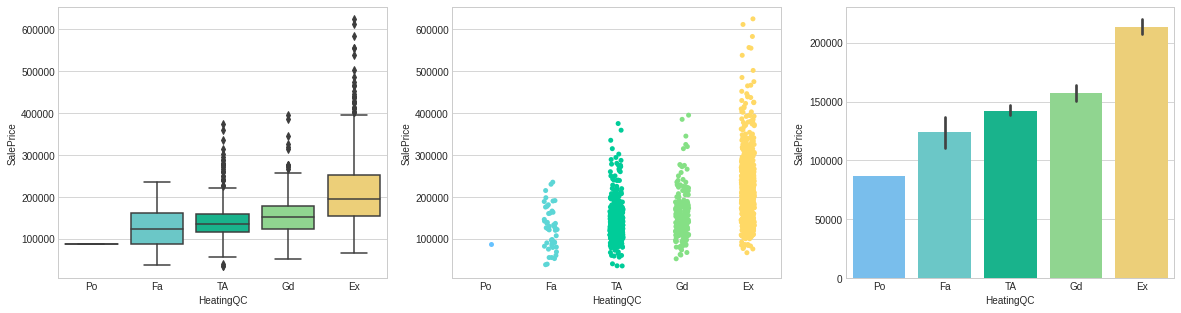

In [388]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="HeatingQC", y="SalePrice", data=train, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="HeatingQC", y="SalePrice", data=train, size = 5, jitter = True, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="HeatingQC", y="SalePrice", data=train, order=["Po", "Fa", "TA", "Gd", "Ex"], palette = mycols);

This feature is ordinal as average SalePrice increases as the "Heating Quality" increases. I will manually code this variable into ordinal dummy variables.

In [389]:
all['HeatingQC'] = all['HeatingQC'].map({"Po":1, "Fa":2, "TA":3, "Gd":4, "Ex":5})
all['HeatingQC'].unique()

array([5, 4, 3, 2, 1])

***CentralAir***
- Central air conditioning.
       N	No
       Y	Yes

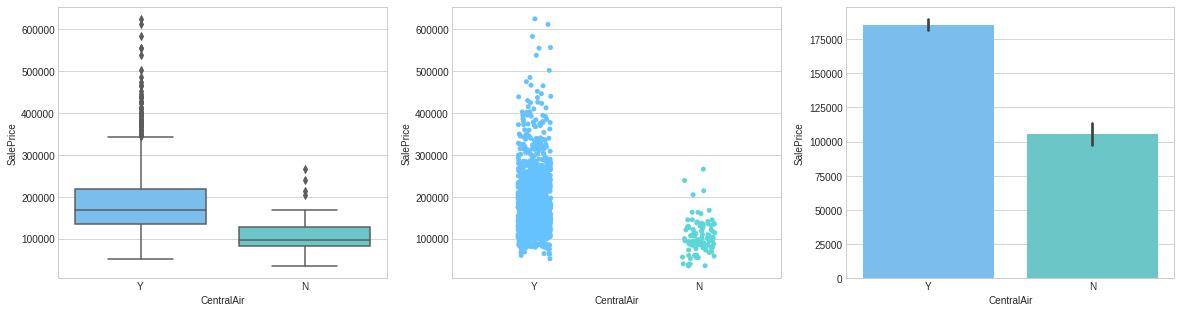

In [390]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="CentralAir", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="CentralAir", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="CentralAir", y="SalePrice", data=train, palette = mycols);

Houses with central air command a higher average salePrice. I will replace the two categories with zero and 1

In [391]:
all['CentralAir'] = all['CentralAir'].map({"Y":1, "N":0})
all['CentralAir'].unique()

array([1, 0])

***Electrical***
- Electrical system.
       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed

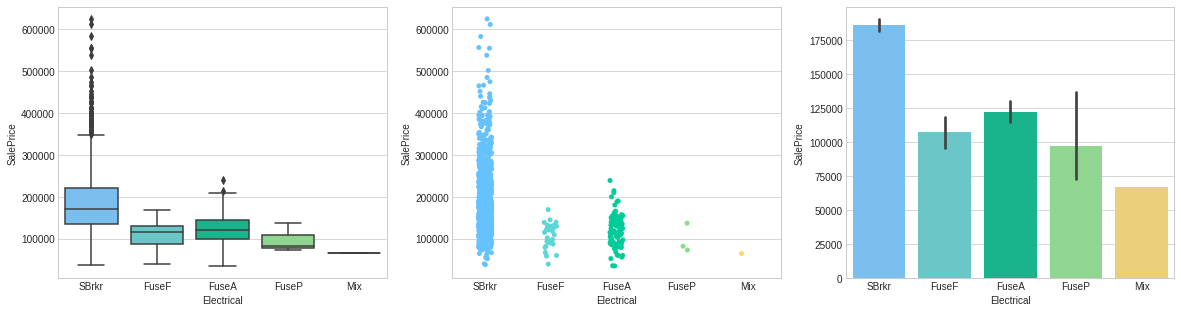

In [392]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="Electrical", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="Electrical", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="Electrical", y="SalePrice", data=train, palette = mycols);

The highest average SalePrice comes from homes with "Standard Circuit Breakers," and also contains the most amount of data points. I will cluster the three fuse classes into one class and create dummy features.

In [393]:
all['Electrical'] = all['Electrical'].map({"SBrkr":"SBrkr", "FuseF":"Fuse", "FuseA":"Fuse", "FuseP":"Fuse", "Mix":"Mix"})

all = pd.get_dummies(all, columns = ["Electrical"], prefix="Electrical")
all.head(3)

LotFrontage  OverallQual  OverallCond  ExterQual  BsmtQual  BsmtCond  \
0         65.0            7            5          3         3         3   
1         80.0            6            8          2         3         3   
2         68.0            7            5          3         3         3   

   BsmtExposure  HeatingQC  CentralAir  BedroomAbvGr  KitchenAbvGr  \
0             1          5           1             3             1   
1             4          5           1             3             1   
2             2          5           1             3             1   

   KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageCars  \
0            3             8           7           0            0         2.0   
1            2             6           7           1            3         2.0   
2            3             6           7           1            3         2.0   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch MiscFeature  MiscVal  \
0           61              0          0            0        None        0   
1            0              0          0            0        None        0   
2           42              0          0            0        None        0   

  MoSold YrSold SaleType SaleCondition  OverallQual-2  GrLivArea-2  \
0      2   2008       WD        Normal             49      2924100   
1      5   2007       WD        Normal             36      1592644   
2      9   2008       WD        Normal             49      3189796   

   GarageCars-2  GarageArea-2  TotalBsmtSF-2  1stFlrSF-2  FullBath-2  \
0           4.0      300304.0       732736.0      732736           4   
1           4.0      211600.0      1592644.0     1592644           4   
2           4.0      369664.0       846400.0      846400           4   

   TotRmsAbvGrd-2  YearBuilt-2  YearRemodAdd-2  OverallQual-3  GrLivArea-3  \
0              64      4012009         4012009            343   5000211000   
1              36      3904576         3904576            216   2009916728   
2              36      4004001         4008004            343   5696975656   

   GarageCars-3  GarageArea-3  ...  Neighborhood_SawyerW  \
0           8.0   164566592.0  ...                     0   
1           8.0    97336000.0  ...                     0   
2           8.0   224755712.0  ...                     0   

   Neighborhood_Somerst  Neighborhood_StoneBr  Neighborhood_Timber  \
0                     0                     0                    0   
1                     0                     0                    0   
2                     0                     0                    0   

   Neighborhood_Veenker  Diff2ndCondition_Flag  Condition1_Norm  \
0                     0                      0                1   
1                     1                      1                0   
2                     0                      0                1   

   Condition1_Pos  Condition1_Street  Condition1_Train  LotArea_1  LotArea_2  \
0               0                  0                 0          0          0   
1               0                  1                 0          0          0   
2               0                  0                 0          0          0   

   LotArea_3  LotArea_4  LotArea_5  LotArea_6  LotArea_7  LotArea_8  \
0          1          0          0          0          0          0   
1          0          0          1          0          0          0   
2          0          0          0          1          0          0   

   LotShape_IR1  LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_Bnk  \
0             0             0             0             1                0   
1             0             0             0             1                0   
2             1             0             0             0                0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_Corner  \
0                0                0                1                 0   
1                0                0       

<a id='miscellaneous'></a>
#### 4.2.9 - Miscellaneous

***MiscFeature***
- Miscellaneous feature not covered in other categories.
       Elev	Elevator
       Gar2	2nd Garage (if not described in garage section)
       Othr	Other
       Shed	Shed (over 100 SF)
       TenC	Tennis Court
       NA	None

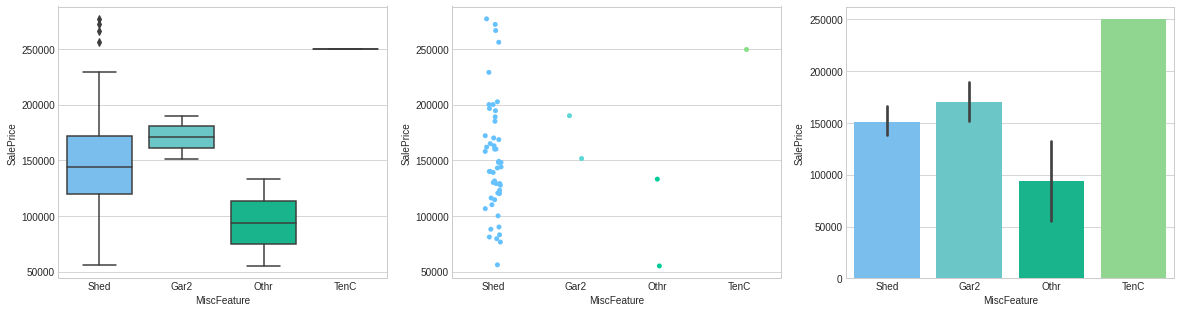

In [394]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="MiscFeature", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="MiscFeature", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="MiscFeature", y="SalePrice", data=train, palette = mycols);

There is not much information here and most of what is available goes in the Shed category. The other categories are virtually empty, and because of this, I will drop this feature.

In [395]:
columns=['MiscFeature', 'MiscVal']
all.drop(columns, axis=1, inplace=True)

***MoSold***
- Month sold (MM).

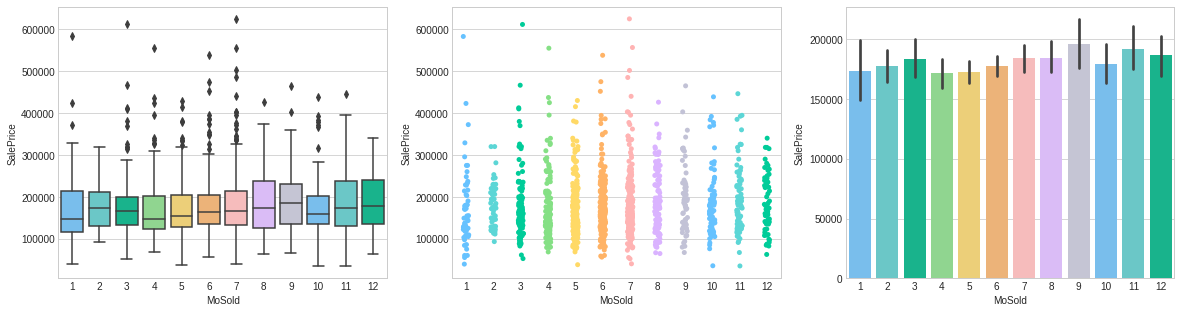

In [396]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="MoSold", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="MoSold", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="MoSold", y="SalePrice", data=train, palette = mycols);

This numeric feature is actually categorical, and the data points are spread all throughout the different months. It does not seem that any particular month commands a clear higher average salePrice. I will create dummy features for this variable.

In [397]:
all = pd.get_dummies(all, columns = ["MoSold"], prefix="MoSold")
all.head(3)

LotFrontage  OverallQual  OverallCond  ExterQual  BsmtQual  BsmtCond  \
0         65.0            7            5          3         3         3   
1         80.0            6            8          2         3         3   
2         68.0            7            5          3         3         3   

   BsmtExposure  HeatingQC  CentralAir  BedroomAbvGr  KitchenAbvGr  \
0             1          5           1             3             1   
1             4          5           1             3             1   
2             2          5           1             3             1   

   KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageCars  \
0            3             8           7           0            0         2.0   
1            2             6           7           1            3         2.0   
2            3             6           7           1            3         2.0   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch YrSold SaleType  \
0           61              0          0            0   2008       WD   
1            0              0          0            0   2007       WD   
2           42              0          0            0   2008       WD   

  SaleCondition  OverallQual-2  GrLivArea-2  GarageCars-2  GarageArea-2  \
0        Normal             49      2924100           4.0      300304.0   
1        Normal             36      1592644           4.0      211600.0   
2        Normal             49      3189796           4.0      369664.0   

   TotalBsmtSF-2  1stFlrSF-2  FullBath-2  TotRmsAbvGrd-2  YearBuilt-2  \
0       732736.0      732736           4              64      4012009   
1      1592644.0     1592644           4              36      3904576   
2       846400.0      846400           4              36      4004001   

   YearRemodAdd-2  OverallQual-3  GrLivArea-3  GarageCars-3  GarageArea-3  \
0         4012009            343   5000211000           8.0   164566592.0   
1         3904576            216   2009916728           8.0    97336000.0   
2         4008004            343   5696975656           8.0   224755712.0   

   TotalBsmtSF-3  1stFlrSF-3  FullBath-3  ...  LotArea_3  LotArea_4  \
0   6.272220e+08   627222016           8  ...          1          0   
1   2.009917e+09  2009916728           8  ...          0          0   
2   7.786880e+08   778688000           8  ...          0          0   

   LotArea_5  LotArea_6  LotArea_7  LotArea_8  LotShape_IR1  LotShape_IR2  \
0          0          0          0          0             0             0   
1          1          0          0          0             0             0   
2          0          1          0          0             1             0   

   LotShape_IR3  LotShape_Reg  LandContour_Bnk  LandContour_HLS  \
0             0             1                0                0   
1             0             1                0                0   
2             0             0                0                0   

   LandContour_Low  LandContour_Lvl  LotConfig_Corner  LotConfig_CulDSac  \
0                0                1                 0                  0   
1                0                1                 0                  0   
2                0                1                 0                  0   

   LotConfig_FR  LotConfig_Inside  GentleSlope_Flag  Alley_Grvl  Alley_None  \
0             0                 1                 1           0           1   
1             1                 0                 1           0           1   
2             0                 1                 1           0           1   

   Alley_Pave  PavedDrive_N  PavedDrive_P  PavedDrive_Y  GasA_Flag  \
0           0             0             0             1          1   
1           0             0             0             1          1   
2           0             0             0             1          1   

   Electrical_Fuse  Electrical_Mix  Electrical_SBrkr  MoSold_1  MoSold_10  \
0                0               0                 1     

***YrSold***
- Year sold (YYYY).

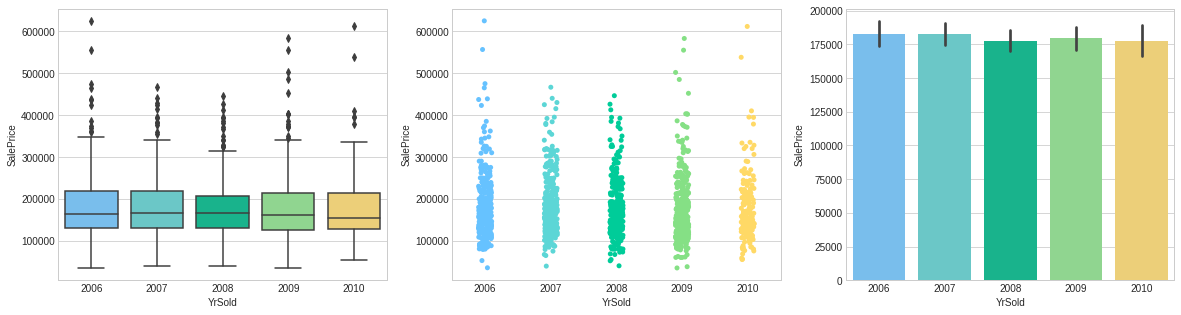

In [398]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="YrSold", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="YrSold", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="YrSold", y="SalePrice", data=train, palette = mycols);

This feature only has five years for when houses were sold. All the data points seem to evenly distributed with similar averages per year. This numeric feature should be categorical and I will create dummy variables.

In [399]:
all = pd.get_dummies(all, columns = ["YrSold"], prefix="YrSold")
all.head(3)

LotFrontage  OverallQual  OverallCond  ExterQual  BsmtQual  BsmtCond  \
0         65.0            7            5          3         3         3   
1         80.0            6            8          2         3         3   
2         68.0            7            5          3         3         3   

   BsmtExposure  HeatingQC  CentralAir  BedroomAbvGr  KitchenAbvGr  \
0             1          5           1             3             1   
1             4          5           1             3             1   
2             2          5           1             3             1   

   KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageCars  \
0            3             8           7           0            0         2.0   
1            2             6           7           1            3         2.0   
2            3             6           7           1            3         2.0   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch SaleType SaleCondition  \
0           61              0          0            0       WD        Normal   
1            0              0          0            0       WD        Normal   
2           42              0          0            0       WD        Normal   

   OverallQual-2  GrLivArea-2  GarageCars-2  GarageArea-2  TotalBsmtSF-2  \
0             49      2924100           4.0      300304.0       732736.0   
1             36      1592644           4.0      211600.0      1592644.0   
2             49      3189796           4.0      369664.0       846400.0   

   1stFlrSF-2  FullBath-2  TotRmsAbvGrd-2  YearBuilt-2  YearRemodAdd-2  \
0      732736           4              64      4012009         4012009   
1     1592644           4              36      3904576         3904576   
2      846400           4              36      4004001         4008004   

   OverallQual-3  GrLivArea-3  GarageCars-3  GarageArea-3  TotalBsmtSF-3  \
0            343   5000211000           8.0   164566592.0   6.272220e+08   
1            216   2009916728           8.0    97336000.0   2.009917e+09   
2            343   5696975656           8.0   224755712.0   7.786880e+08   

   1stFlrSF-3  FullBath-3  TotRmsAbvGrd-3  ...  LotArea_8  LotShape_IR1  \
0   627222016           8             512  ...          0             0   
1  2009916728           8             216  ...          0             0   
2   778688000           8             216  ...          0             1   

   LotShape_IR2  LotShape_IR3  LotShape_Reg  LandContour_Bnk  LandContour_HLS  \
0             0             0             1                0                0   
1             0             0             1                0                0   
2             0             0             0                0                0   

   LandContour_Low  LandContour_Lvl  LotConfig_Corner  LotConfig_CulDSac  \
0                0                1                 0                  0   
1                0                1                 0                  0   
2                0                1                 0                  0   

   LotConfig_FR  LotConfig_Inside  GentleSlope_Flag  Alley_Grvl  Alley_None  \
0             0                 1                 1           0           1   
1             1                 0                 1           0           1   
2             0                 1                 1           0           1   

   Alley_Pave  PavedDrive_N  PavedDrive_P  PavedDrive_Y  GasA_Flag  \
0           0             0             0             1          1   
1           0             0             0             1          1   
2           0             0             0             1          1   

   Electrical_Fuse  Electrical_Mix  Electrical_SBrkr  MoSold_1  MoSold_10  \
0                0               0                 1         0          0   
1                0               0                 1         0          0   
2                0               0                 1         0          0   

   MoSold_11  MoSold_12  MoSol

***SaleType***
- Type of sale.
       WD 	  Warranty Deed - Conventional
       CWD	  Warranty Deed - Cash
       VWD	  Warranty Deed - VA Loan
       New	  Home just constructed and sold
       COD	  Court Officer Deed/Estate
       Con	  Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	  Other


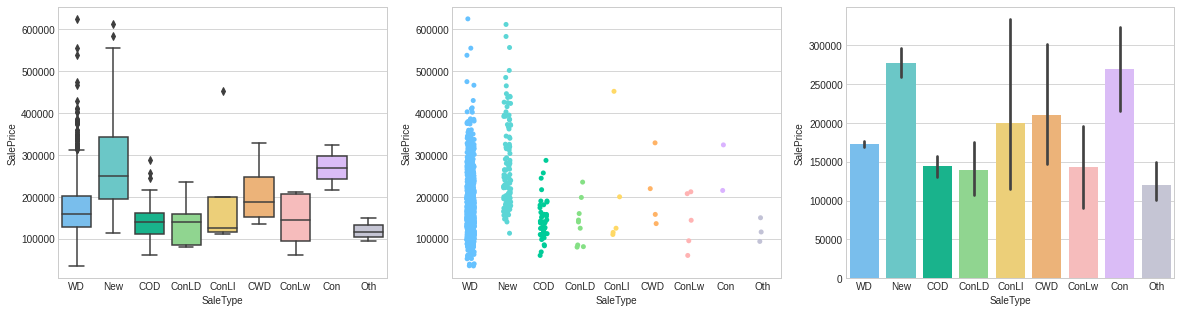

In [400]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="SaleType", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="SaleType", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="SaleType", y="SalePrice", data=train, palette = mycols);

Most houses belong to the "Conventional Warranty Deed" category, and the highest average SalePrice belongs to homes that were sold brand new. I will cluster some classes together and create dummy variables.

In [401]:
all['SaleType'] = all['SaleType'].map({"WD":"WD", "New":"New", "COD":"COD", "CWD":"CWD", "ConLD":"Oth", "ConLI":"Oth", 
                                                 "ConLw":"Oth", "Con":"Oth", "Oth":"Oth"})

all = pd.get_dummies(all, columns = ["SaleType"], prefix="SaleType")
all.head(3)

LotFrontage  OverallQual  OverallCond  ExterQual  BsmtQual  BsmtCond  \
0         65.0            7            5          3         3         3   
1         80.0            6            8          2         3         3   
2         68.0            7            5          3         3         3   

   BsmtExposure  HeatingQC  CentralAir  BedroomAbvGr  KitchenAbvGr  \
0             1          5           1             3             1   
1             4          5           1             3             1   
2             2          5           1             3             1   

   KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageCars  \
0            3             8           7           0            0         2.0   
1            2             6           7           1            3         2.0   
2            3             6           7           1            3         2.0   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch SaleCondition  \
0           61              0          0            0        Normal   
1            0              0          0            0        Normal   
2           42              0          0            0        Normal   

   OverallQual-2  GrLivArea-2  GarageCars-2  GarageArea-2  TotalBsmtSF-2  \
0             49      2924100           4.0      300304.0       732736.0   
1             36      1592644           4.0      211600.0      1592644.0   
2             49      3189796           4.0      369664.0       846400.0   

   1stFlrSF-2  FullBath-2  TotRmsAbvGrd-2  YearBuilt-2  YearRemodAdd-2  \
0      732736           4              64      4012009         4012009   
1     1592644           4              36      3904576         3904576   
2      846400           4              36      4004001         4008004   

   OverallQual-3  GrLivArea-3  GarageCars-3  GarageArea-3  TotalBsmtSF-3  \
0            343   5000211000           8.0   164566592.0   6.272220e+08   
1            216   2009916728           8.0    97336000.0   2.009917e+09   
2            343   5696975656           8.0   224755712.0   7.786880e+08   

   1stFlrSF-3  FullBath-3  TotRmsAbvGrd-3  YearBuilt-3  ...  LandContour_Bnk  \
0   627222016           8             512   8036054027  ...                0   
1  2009916728           8             216   7715442176  ...                0   
2   778688000           8             216   8012006001  ...                0   

   LandContour_HLS  LandContour_Low  LandContour_Lvl  LotConfig_Corner  \
0                0                0                1                 0   
1                0                0                1                 0   
2                0                0                1                 0   

   LotConfig_CulDSac  LotConfig_FR  LotConfig_Inside  GentleSlope_Flag  \
0                  0             0                 1                 1   
1                  0             1                 0                 1   
2                  0             0                 1                 1   

   Alley_Grvl  Alley_None  Alley_Pave  PavedDrive_N  PavedDrive_P  \
0           0           1           0             0             0   
1           0           1           0             0             0   
2           0           1           0             0             0   

   PavedDrive_Y  GasA_Flag  Electrical_Fuse  Electrical_Mix  Electrical_SBrkr  \
0             1          1                0               0                 1   
1             1          1                0               0                 1   
2             1          1                0               0                 1   

   MoSold_1  MoSold_10  MoSold_11  MoSold_12  MoSold_2  MoSold_3  MoSold_4  \
0         0          0          0          0         1         0         0   
1         0          0          0          0         0         0         0   
2         0          0          0          0         0         0         0   

   MoSold_5  MoSold_6  MoSold_7  MoSold_8  MoSold_9  YrSold_2006  YrSold_2

***SaleCondition***
- Condition of sale.
       Normal	 Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	 Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	 Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

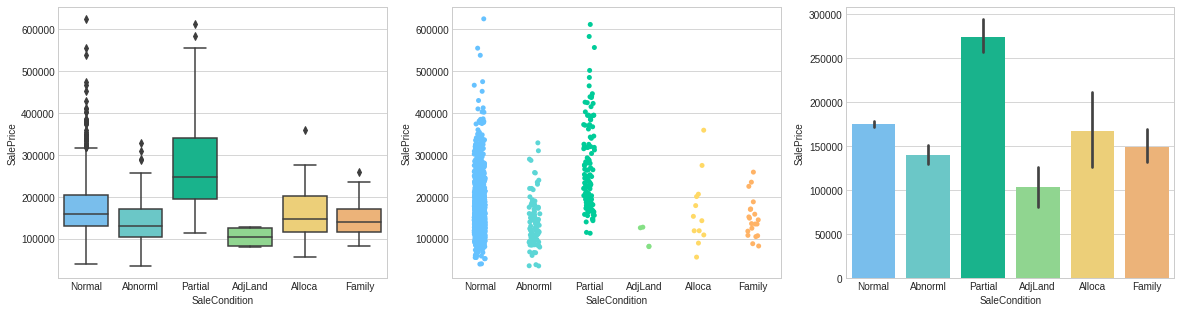

In [402]:
plt.subplots(figsize =(20, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x="SaleCondition", y="SalePrice", data=train, palette = mycols)

plt.subplot(1, 3, 2)
sns.stripplot(x="SaleCondition", y="SalePrice", data=train, size = 5, jitter = True, palette = mycols);

plt.subplot(1, 3, 3)
sns.barplot(x="SaleCondition", y="SalePrice", data=train, palette = mycols);

Most of the data points belong to the Normal category and the highest average SalePrice belong to the Partial category. I will create dummy features for this variable. 

In [403]:
all = pd.get_dummies(all, columns = ["SaleCondition"], prefix="SaleCondition")
all.head(3)

LotFrontage  OverallQual  OverallCond  ExterQual  BsmtQual  BsmtCond  \
0         65.0            7            5          3         3         3   
1         80.0            6            8          2         3         3   
2         68.0            7            5          3         3         3   

   BsmtExposure  HeatingQC  CentralAir  BedroomAbvGr  KitchenAbvGr  \
0             1          5           1             3             1   
1             4          5           1             3             1   
2             2          5           1             3             1   

   KitchenQual  TotRmsAbvGrd  Functional  Fireplaces  FireplaceQu  GarageCars  \
0            3             8           7           0            0         2.0   
1            2             6           7           1            3         2.0   
2            3             6           7           1            3         2.0   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  OverallQual-2  \
0           61              0          0            0             49   
1            0              0          0            0             36   
2           42              0          0            0             49   

   GrLivArea-2  GarageCars-2  GarageArea-2  TotalBsmtSF-2  1stFlrSF-2  \
0      2924100           4.0      300304.0       732736.0      732736   
1      1592644           4.0      211600.0      1592644.0     1592644   
2      3189796           4.0      369664.0       846400.0      846400   

   FullBath-2  TotRmsAbvGrd-2  YearBuilt-2  YearRemodAdd-2  OverallQual-3  \
0           4              64      4012009         4012009            343   
1           4              36      3904576         3904576            216   
2           4              36      4004001         4008004            343   

   GrLivArea-3  GarageCars-3  GarageArea-3  TotalBsmtSF-3  1stFlrSF-3  \
0   5000211000           8.0   164566592.0   6.272220e+08   627222016   
1   2009916728           8.0    97336000.0   2.009917e+09  2009916728   
2   5696975656           8.0   224755712.0   7.786880e+08   778688000   

   FullBath-3  TotRmsAbvGrd-3  YearBuilt-3  YearRemodAdd-3  ...  LotConfig_FR  \
0           8             512   8036054027      8036054027  ...             0   
1           8             216   7715442176      7715442176  ...             1   
2           8             216   8012006001      8024024008  ...             0   

   LotConfig_Inside  GentleSlope_Flag  Alley_Grvl  Alley_None  Alley_Pave  \
0                 1                 1           0           1           0   
1                 0                 1           0           1           0   
2                 1                 1           0           1           0   

   PavedDrive_N  PavedDrive_P  PavedDrive_Y  GasA_Flag  Electrical_Fuse  \
0             0             0             1          1                0   
1             0             0             1          1                0   
2             0             0             1          1                0   

   Electrical_Mix  Electrical_SBrkr  MoSold_1  MoSold_10  MoSold_11  \
0               0                 1         0          0          0   
1               0                 1         0          0          0   
2               0                 1         0          0          0   

   MoSold_12  MoSold_2  MoSold_3  MoSold_4  MoSold_5  MoSold_6  MoSold_7  \
0          0         1         0         0         0         0         0   
1          0         0         0         0         1         0         0   
2          0         0         0         0         0         0         0   

   MoSold_8  MoSold_9  YrSold_2006  YrSold_2007  YrSold_2008  YrSold_2009  \
0         0         0            0            0            1            0   
1         0         0            0            1            0            0   
2         0         1            0            0            1            0   

   YrSold_2010  SaleType_COD  SaleType_CWD  SaleType_New  SaleType_Oth  \
0   

***

<a id='target_variable'></a>
### 4.3 - Target Variable

Now, I want to check the distribution of SalePrice my target variable. For this regression model, I want my data to be as Normally distributed as possible. This works well with most machine learning algorithms.


 mu = 180151.23 and sigma = 76670.25



Text(0.5, 0.98, 'Before transformation')

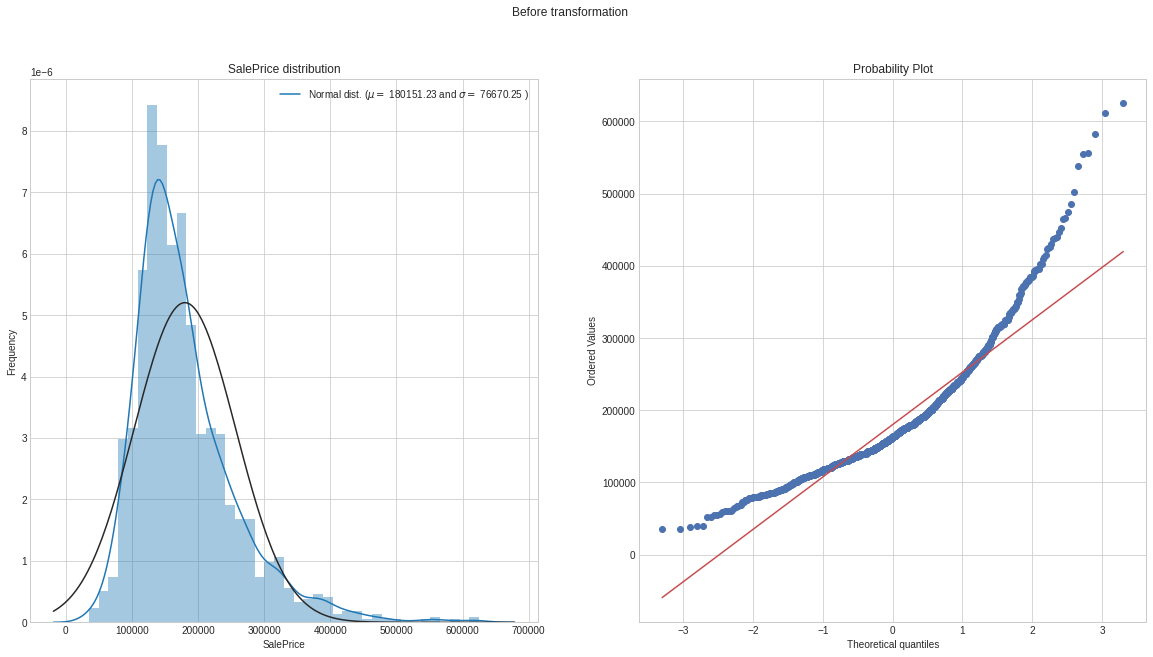

In [404]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

y = train['SalePrice']
fig = plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(train['SalePrice'] , fit=norm);


# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

plt.subplot(1,2,2)
res = stats.probplot(train['SalePrice'], plot=plt)
plt.suptitle('Before transformation')

# plt.subplot(2,2,3)
# plt.title('Log Normal')
# sns.distplot(y, kde=False, fit=stats.lognorm)

# plt.subplot(2,2,4)
# plt.title('Johnson SU')
# plt.ylabel('Frequency')
# sns.distplot(y, kde=False, fit=stats.johnsonsu)

The 4 distributions explain SalesPrice. It is skewed to the right. In the top left distribution, the black line represents the theoretical normal distribution which does not fit the data. The blue line is the KDE and here is a helpful link: [Intro to KDE](https://machinelearningmastery.com/probability-density-estimation/)

Before I can predict the SalesPrice, I need to transform the data. The black lines are the different distributions which would "fit" the data upon transformation.

The top right is a QQ plot which is another visualization which helps to see if the distribution is normal. If it is normal, the blue points lie along the red line. Because they curve away, it shows skewness.

![](https://www.safaribooksonline.com/library/view/clojure-for-data/9781784397180/graphics/7180OS_01_180.jpg)

for more info  click [Here](https://www.google.co.in/url?sa=t&rct=j&q=&esrc=s&source=web&cd=3&cad=rja&uact=8&ved=0ahUKEwi7i-jN-K7XAhWJKo8KHbIHAV4QFgguMAI&url=http%3A%2F%2Fwhatis.techtarget.com%2Fdefinition%2Fskewness&usg=AOvVaw1LJhHdq4KFEYIpfdXjOlF-)

I will transform Saleprice using numpy function log1p. This should help normalize the feature.


 mu = 12.02 and sigma = 0.40



Text(0.5, 0.98, 'Before transformation')

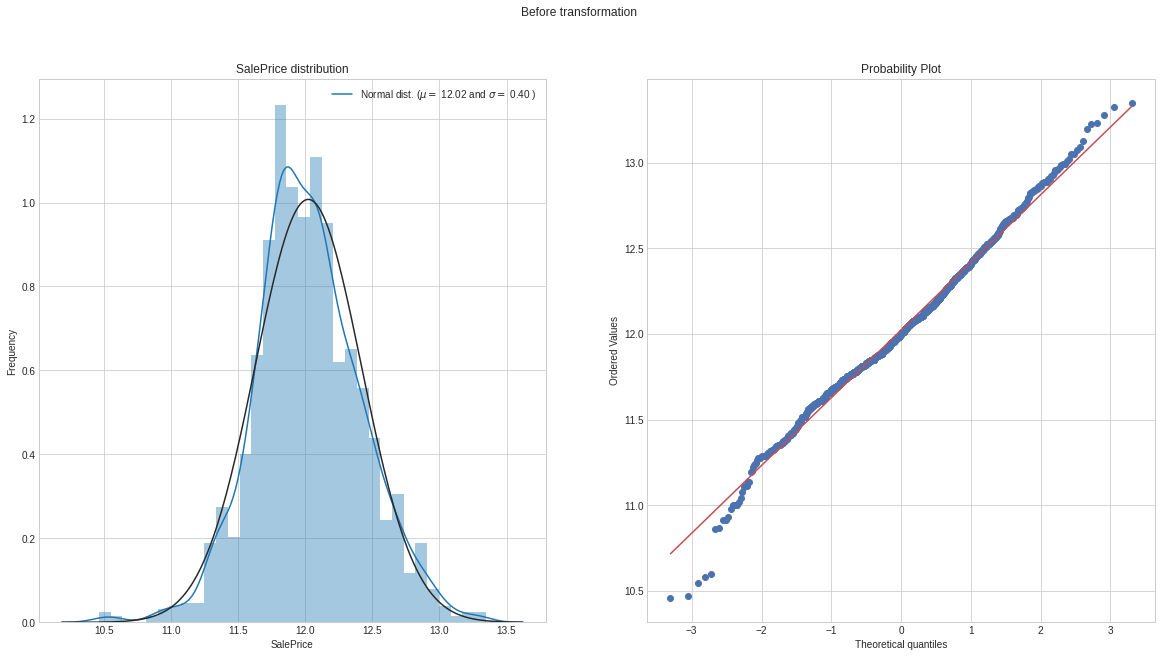

In [405]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train["SalePrice"] = np.log1p(train["SalePrice"])
y_train = train["SalePrice"]

#Check the new distribution 
# plt.subplots(figsize=(15, 10))
# g = sns.distplot(train['SalePrice'], fit=norm, label = "Skewness : %.2f"%(train['SalePrice'].skew()));
# g = g.legend(loc="best")

fig = plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
sns.distplot(train['SalePrice'] , fit=norm, label = "Skewness : %.2f"%(train['SalePrice'].skew()));


# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

plt.subplot(1,2,2)
res = stats.probplot(train['SalePrice'], plot=plt)
plt.suptitle('Before transformation')

***


<a id='treating_skewed_features'></a>
### 4.4 - Treating skewed features

Just like the target variable of SalePrice, I will transform the other skewed numeric variables. This allows the machine learning algorithms to better predict the SalePrice.

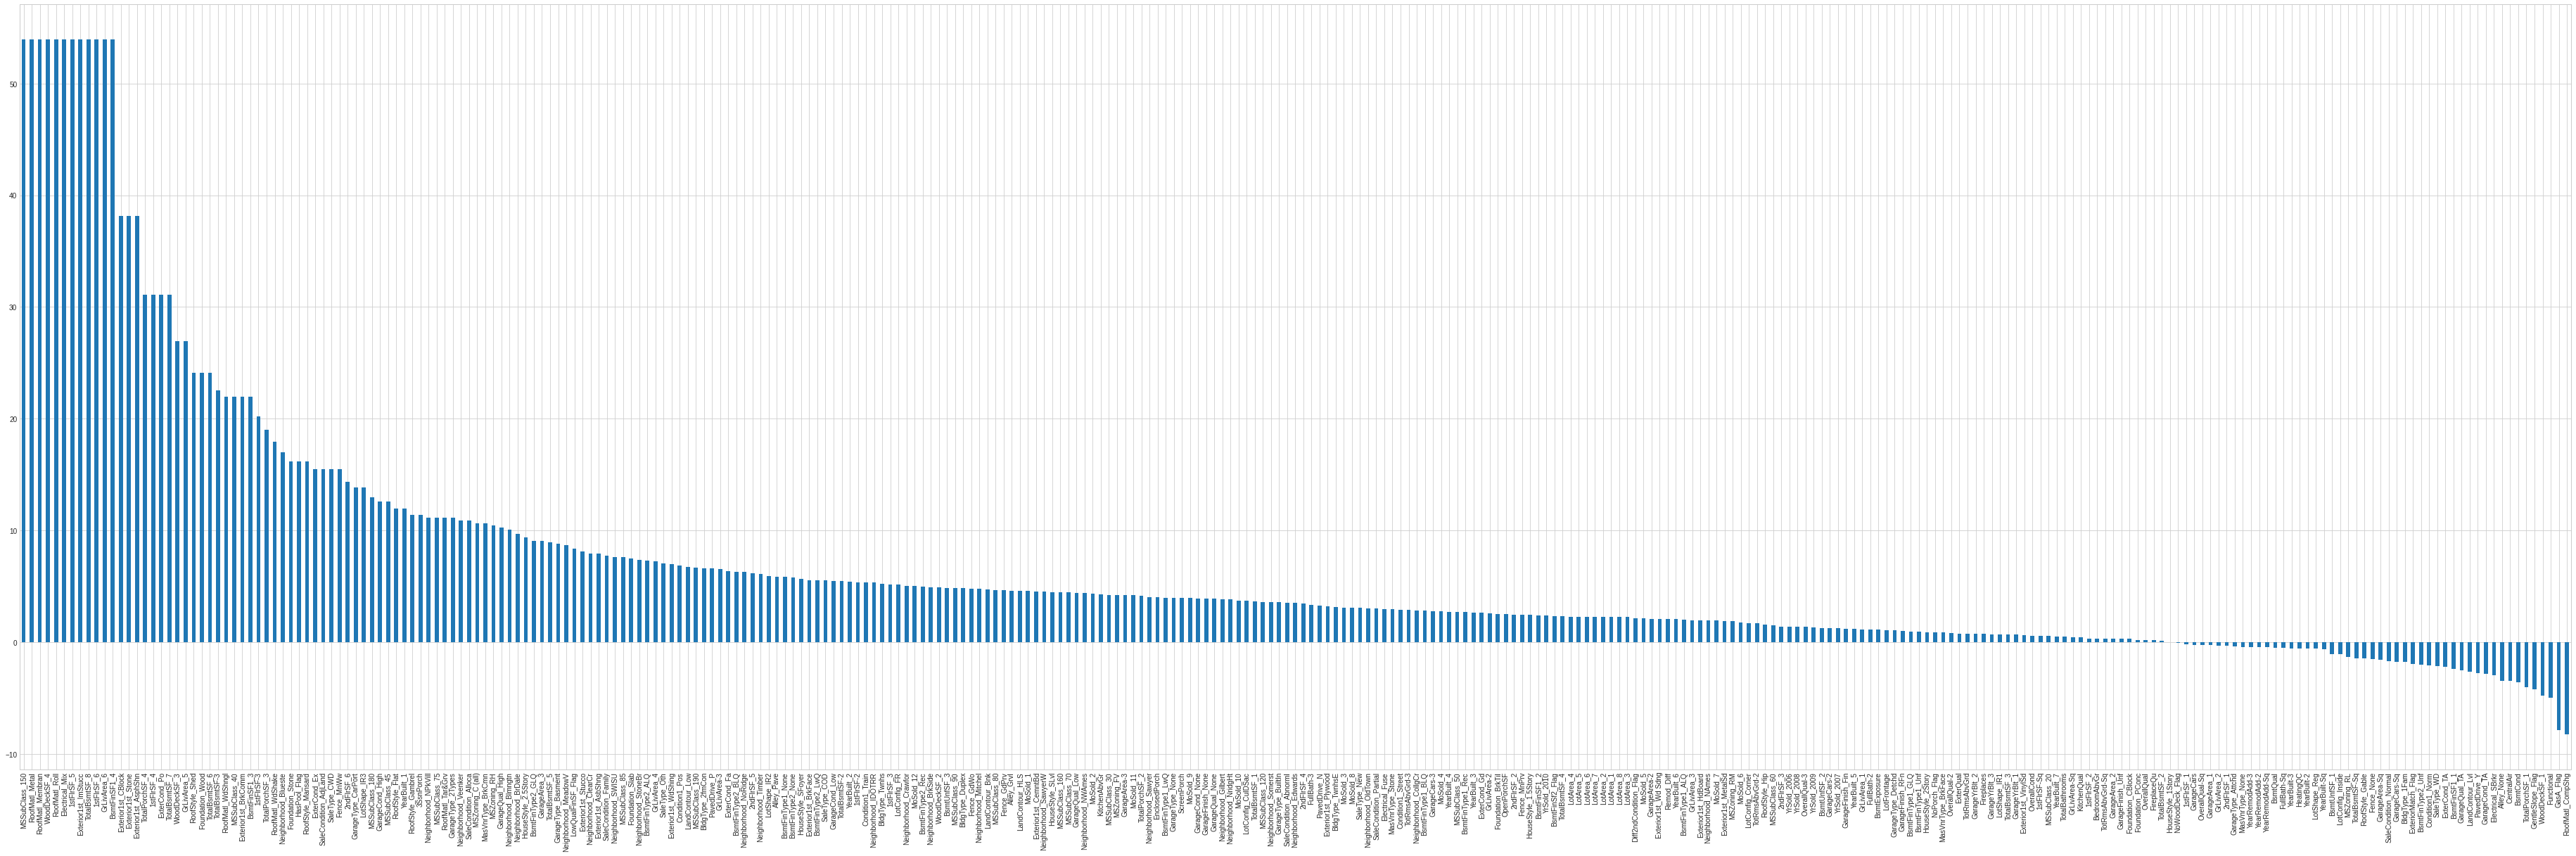

In [406]:
# First lets single out the numeric features
numeric_feats = all.dtypes[all.dtypes != "object"].index

# Check how skewed they are
skewed_feats = all[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)

plt.subplots(figsize =(65, 20))
skewed_feats.plot(kind='bar');

I have numerous positive and negative skewed features. I will transform those features with skewness greater than 0.5 to approximate a normal distribution.

In [407]:
skewness = skewed_feats[abs(skewed_feats) > 0.5]

skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    all[feat] = boxcox1p(all[feat], lam)

print(skewness.shape[0],  "skewed numerical features have been Box-Cox transformed")

288 skewed numerical features have been Box-Cox transformed


<a id='modeling'></a>
# 5. 
## Modeling

<a id='preparation_of_data'></a>
### 5.1 - Preparation of data

I am going to prepare my data for training, testing, and prediction. I will use XGBoost's inbuilt feature importance functionality to identify the most important features.


In [408]:
# First, re-create the training and test datasets
train = all[:ntrain]
test = all[ntrain:]

print(train.shape)
print(test.shape)

(1456, 315)
(1459, 315)


First, I want to have a baseline upon which I will judge my subsequent models. After splitting my data into train and test sets, I will use DummyRegressor to get a baseline upon which all my subsequent models must beat. The scoring metric will be Root Mean Squared Error (RMSE).

In [409]:
# Next we want to sample our training data to test for performance of robustness ans accuracy, before applying to the test data
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(train, y_train, test_size=0.3, random_state=29)

# X_train = predictor features for estimation dataset
# X_test = predictor variables for validation dataset
# Y_train = target variable for the estimation dataset
# Y_test = target variable for the estimation dataset

print('X_train: ', X_train.shape, '\nX_test: ', X_test.shape, '\nY_train: ', Y_train.shape, '\nY_test: ', Y_test.shape)

X_train:  (1019, 315) 
X_test:  (437, 315) 
Y_train:  (1019,) 
Y_test:  (437,)


In [410]:
from sklearn.dummy import DummyRegressor

dr = DummyRegressor()
dr.fit(X_train, Y_train)
dr.score(X_test, Y_test)
training_results = np.sqrt((-cross_val_score(dr, X_train, Y_train, cv = 5, scoring= 'neg_mean_squared_error')).mean())
test_results = np.sqrt(((Y_test-dr.predict(X_test))**2).mean())
print('The training RMSE is: {:.4f}'.format(training_results))
print('The testing RMSE is: {:.4f}'.format(test_results))

The training RMSE is: 0.3859
The testing RMSE is: 0.4188


The baseline Training RMSE is 0.386 and Testing RMSE is 0.419. All my subsequent models must beat this score. Next, I will use a simple Linear Regression

In [411]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)
training_results = np.sqrt((-cross_val_score(lr, X_train, Y_train, cv = 5, scoring= 'neg_mean_squared_error')).mean())
test_results = np.sqrt(((Y_test-lr.predict(X_test))**2).mean())
print('The training RMSE is: {:.4f}'.format(training_results))
print('The testing RMSE is: {:.4f}'.format(test_results))

The training RMSE is: 0.1401
The testing RMSE is: 0.1290


The simple linear regression out-performed my baseline by almost 3-fold. Next, I will try a simple CART (decision tree regressor). 

In [412]:
# Import DecisionTreeRegressor from sklearn.tree
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=29)
dt.fit(X_train, Y_train)
training_results = np.sqrt((-cross_val_score(dt, X_train, Y_train, cv = 5, scoring= 'neg_mean_squared_error')).mean())
test_results = np.sqrt(((Y_test-dt.predict(X_test))**2).mean())
print('The training RMSE is: {:.4f}'.format(training_results))
print('The testing RMSE is: {:.4f}'.format(test_results))

The training RMSE is: 0.2060
The testing RMSE is: 0.2077


The simple CART did worse than my simple linear regression model. Next, I will try Random Forest Model.

In [413]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=200, random_state=29)
rf.fit(X_train, Y_train)
training_results = np.sqrt((-cross_val_score(rf, X_train, Y_train, cv = 5, scoring= 'neg_mean_squared_error')).mean())
test_results = np.sqrt(((Y_test-rf.predict(X_test))**2).mean())
print('The training RMSE is: {:.4f}'.format(training_results))
print('The testing RMSE is: {:.4f}'.format(test_results))

The training RMSE is: 0.1429
The testing RMSE is: 0.1513


The powerful RandomForestRegressor did not perform as well as my simple linear model, but I'm not surprised as I did not tune any hyperparameters. It also took a long time to run.

Next, I will try AdaBoost

In [414]:
# Import AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor

ar = AdaBoostRegressor(n_estimators=200, learning_rate=0.10, random_state=29)
ar.fit(X_train, Y_train)
training_results = np.sqrt((-cross_val_score(ar, X_train, Y_train, cv = 5, scoring= 'neg_mean_squared_error')).mean())
test_results = np.sqrt(((Y_test-ar.predict(X_test))**2).mean())
print('The training RMSE is: {:.4f}'.format(training_results))
print('The testing RMSE is: {:.4f}'.format(test_results))

The training RMSE is: 0.1657
The testing RMSE is: 0.1701


This performed worse than my RandomForest. Next, I will try GradientBoostRegressor

In [415]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4, learning_rate=0.1, 
            n_estimators=200, random_state=29)
gb.fit(X_train, Y_train)
training_results = np.sqrt((-cross_val_score(gb, X_train, Y_train, cv = 5, scoring= 'neg_mean_squared_error')).mean())
test_results = np.sqrt(((Y_test-gb.predict(X_test))**2).mean())
print('The training RMSE is: {:.4f}'.format(training_results))
print('The testing RMSE is: {:.4f}'.format(test_results))

The training RMSE is: 0.1252
The testing RMSE is: 0.1337


My Gradient Boost model performed almost as well as my linear regression model.

Next, I will try a stochastic gradient boost regressor. It's similar to a normal GradientBoostingRegressor but with different hyperparameters

In [416]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate sgbr
sgbr = GradientBoostingRegressor(max_depth=4, 
            subsample=0.9,
            max_features=0.75,
            n_estimators=200, random_state=29)

sgbr.fit(X_train, Y_train)
training_results = np.sqrt((-cross_val_score(sgbr, X_train, Y_train, cv = 5, scoring= 'neg_mean_squared_error')).mean())
test_results = np.sqrt(((Y_test-sgbr.predict(X_test))**2).mean())
print('The training RMSE is: {:.4f}'.format(training_results))
print('The testing RMSE is: {:.4f}'.format(test_results))


The training RMSE is: 0.1251
The testing RMSE is: 0.1314


It performed very similarly to my prior GradientBoostingRegressor. Because it is just a matter of tuning the hyperparameters, I'll just stick to one GBR model moving forward.

Next I will try regularlized linear regression, beginning with Ridge Regression. 

In [417]:
from sklearn.linear_model import Ridge
#normalize=true?
ridge = Ridge(alpha=0.10, normalize=True, random_state=29)
ridge.fit(X_train, Y_train)
training_results = np.sqrt((-cross_val_score(ridge, X_train, Y_train, cv = 5, scoring= 'neg_mean_squared_error')).mean())
test_results = np.sqrt(((Y_test-ridge.predict(X_test))**2).mean())
print('The training RMSE is: {:.4f}'.format(training_results))
print('The testing RMSE is: {:.4f}'.format(test_results))

The training RMSE is: 0.1209
The testing RMSE is: 0.1219


My Ridge model has the best test RMSE so far. There was an error, however, and one potential answer can be found [here](https://stackoverflow.com/questions/58393378/why-does-ridge-model-fitting-show-warning-when-power-of-the-denominator-in-the-a). Following the directions, I just changed the hyperparameter of "normalize=False" to "True."

Ridge penalizes numerous features. Next, I will try Lasso which helps to reduce (and even eliminate) useless features. 

In [418]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.01, random_state=29)
lasso.fit(X_train, Y_train)
training_results = np.sqrt((-cross_val_score(lasso, X_train, Y_train, cv = 5, scoring= 'neg_mean_squared_error')).mean())
test_results = np.sqrt(((Y_test-lasso.predict(X_test))**2).mean())
print('The training RMSE is: {:.4f}'.format(training_results))
print('The testing RMSE is: {:.4f}'.format(test_results))

The training RMSE is: 0.1409
The testing RMSE is: 0.1553


Lasso did not perform as well as it's Ridge counterpart. Next, I will try ElasticNet as it's a combination of both Ridge and Lasso models. 

In [419]:
from sklearn.linear_model import ElasticNet
EN = ElasticNet(alpha=0.10, random_state=29)
EN.fit(X_train, Y_train)
training_results = np.sqrt((-cross_val_score(EN, X_train, Y_train, cv = 5, scoring= 'neg_mean_squared_error')).mean())
test_results = np.sqrt(((Y_test-EN.predict(X_test))**2).mean())
print('The training RMSE is: {:.4f}'.format(training_results))
print('The testing RMSE is: {:.4f}'.format(test_results))

The training RMSE is: 0.1577
The testing RMSE is: 0.1747


Next, I will try two different models with the XGBoost. XGBoost works with SciKit Learn's API when using it's default regressor. It is based on trees as simple learners. 

In [420]:
xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=29, verbose=1, random_state=29)
xg_reg.fit(X_train, Y_train)
training_results = np.sqrt((-cross_val_score(xg_reg, X_train, Y_train, cv = 5, scoring= 'neg_mean_squared_error')).mean())
test_results = np.sqrt(((Y_test-xg_reg.predict(X_test))**2).mean())
print('The training RMSE is: {:.4f}'.format(training_results))
print('The testing RMSE is: {:.4f}'.format(test_results))

The training RMSE is: 0.1268
The testing RMSE is: 0.1327


It performed almost as well as some of my other models. Next, I will try XGBoost with linear regression as it's base model. Unfortunately, it is not compatible with SciKit Learn's API but I can use it's own native API.

In [421]:
# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(data=X_train, label=Y_train)
DM_test =  xgb.DMatrix(data=X_test, label=Y_test)

# Create the parameter dictionary: params
params = {"booster":"gblinear", "objective":"reg:squarederror"}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=DM_train, params=params, nfold=3, num_boost_round=200, metrics="rmse", as_pandas=True, seed=29, early_stopping_rounds=10)

# Extract and print final boosting round metric
print((cv_results["test-rmse-mean"]).tail(10))

0    0.273539
Name: test-rmse-mean, dtype: float64


It did not perform as well as my best performing models.

Next, I will use XGBoost to identify the most important features. By isolating them and using only them (by getting rid of the other features), there is a chance the model may perform better. Other models such as Random Forest have feature selection ability as well, but for this Notebook I'll just use XGBoost. 

***

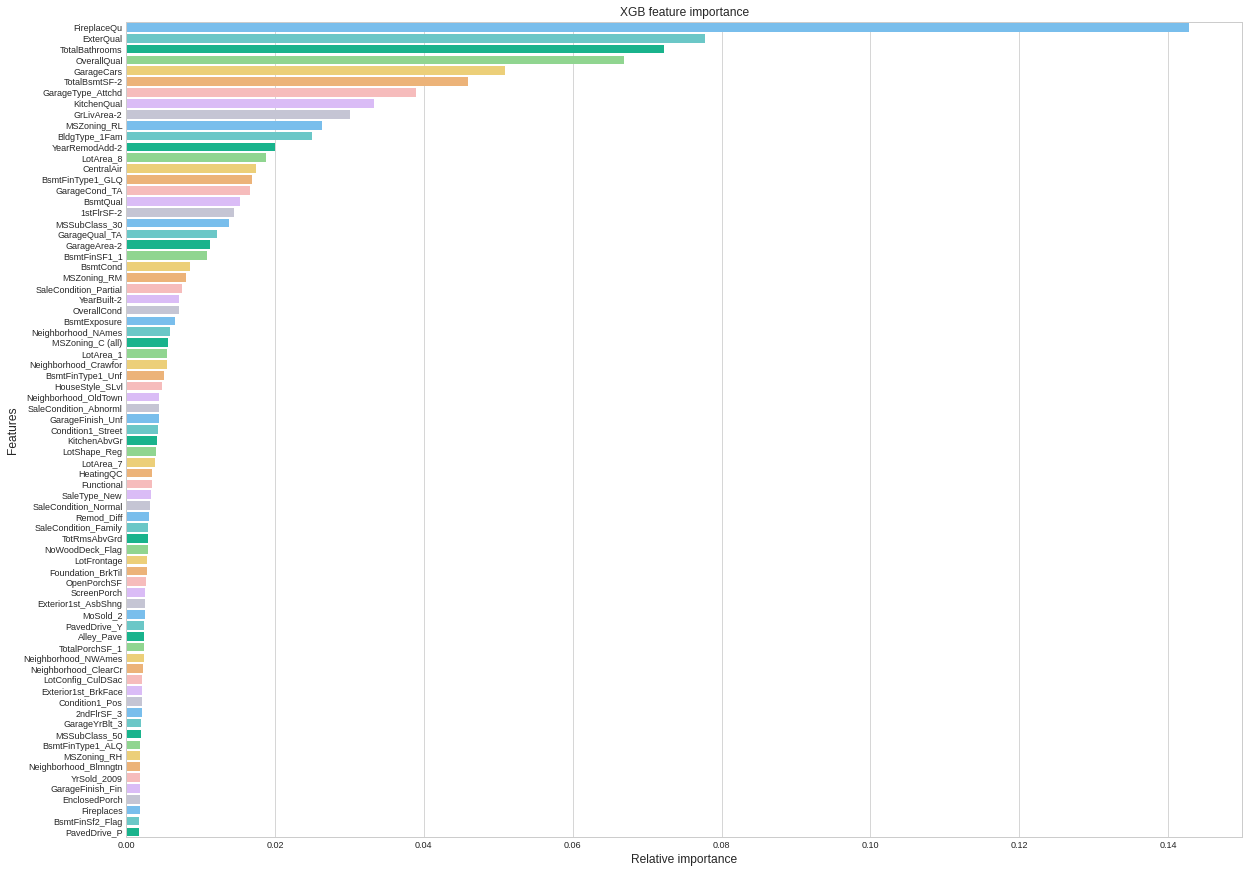

In [422]:
import xgboost as xgb

model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(train, y_train)

# Sort feature importances from GBC model trained earlier
indices = np.argsort(model.feature_importances_)[::-1]
indices = indices[:75]

# Visualise these with a barplot
plt.subplots(figsize=(20, 15))
g = sns.barplot(y=train.columns[indices], x = model.feature_importances_[indices], orient='h', palette = mycols)
g.set_xlabel("Relative importance",fontsize=12)
g.set_ylabel("Features",fontsize=12)
g.tick_params(labelsize=9)
g.set_title("XGB feature importance");

In [423]:
xgb_train = train.copy()
xgb_test = test.copy()


model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(xgb_train, y_train)

# Allow the feature importances attribute to select the most important features
xgb_feat_red = SelectFromModel(model, prefit = True)

# Reduce estimation, validation and test datasets
xgb_train = xgb_feat_red.transform(xgb_train)
xgb_test = xgb_feat_red.transform(xgb_test)


print("Results of 'feature_importances_':")
print('X_train: ', xgb_train.shape, '\nX_test: ', xgb_test.shape)

Results of 'feature_importances_':
X_train:  (1456, 44) 
X_test:  (1459, 44)


SciKit Learn's SelectFromModel allows a compatible regressor to select the most important features. XGBoost reduced my features to only 44. 

Next, I'm going to split the data, as before, and run my best models to see how the scores compare. If the reduced model is at least similar to my models with all 315 columns, then I will go with the reduced model. 

If the reduced model performs worse, then I will tune models based on all my data. 

In [424]:
# Next we want to sample our training data to test for performance of robustness ans accuracy, before applying to the test data
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(xgb_train, y_train, test_size=0.3, random_state=29)

# X_train = predictor features for estimation dataset
# X_test = predictor variables for validation dataset
# Y_train = target variable for the estimation dataset
# Y_test = target variable for the estimation dataset

print('X_train: ', X_train.shape, '\nX_test: ', X_test.shape, '\nY_train: ', Y_train.shape, '\nY_test: ', Y_test.shape)

X_train:  (1019, 44) 
X_test:  (437, 44) 
Y_train:  (1019,) 
Y_test:  (437,)


***

<a id='training'></a>
### 5.2 - Training

We are finally ready to train our models. For this analysis I am using 7 different algorithms:
- **Linear Regression**
- **Random Forest Regressor**
- **AdaBoost Regressor**
- **Gradient Boosting Regressor**
- **Ridge Regressor**
- **ElasticNet Regressor**
- **XGBoost**

I will measure accuracy using **Root Mean Squared Error**, as described within the competition.

In [668]:
#Machine Learning Algorithm (MLA) Selection and Initialization
models = [LinearRegression(), Ridge(alpha=0.10, normalize=True), Lasso(alpha=0.01), ElasticNet(alpha=0.10),
          RandomForestRegressor(n_estimators=200), AdaBoostRegressor(n_estimators=200, learning_rate=0.10), 
          GradientBoostingRegressor(max_depth=4, subsample=0.9, max_features=0.75, n_estimators=200),
          xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, seed=29, verbose=1)]

# First I will use ShuffleSplit as a way of randomising the cross validation samples.
shuff = ShuffleSplit(n_splits=5, test_size=0.2, random_state=42)

#create table to compare MLA metrics
columns = ['Name', 'Parameters', 'Train Accuracy Mean', 'Test Accuracy']
before_model_compare = pd.DataFrame(columns = columns)

#index through models and save performance to table
row_index = 0
for alg in models:

    #set name and parameters
    model_name = alg.__class__.__name__
    before_model_compare.loc[row_index, 'Name'] = model_name
    before_model_compare.loc[row_index, 'Parameters'] = str(alg.get_params())
    
    alg.fit(X_train, Y_train)
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    training_results = np.sqrt((-cross_val_score(alg, X_train, Y_train, cv = shuff, scoring= 'neg_mean_squared_error')).mean())
    test_results = np.sqrt(((Y_test-alg.predict(X_test))**2).mean())
    
    before_model_compare.loc[row_index, 'Train Accuracy Mean'] = (training_results)
    before_model_compare.loc[row_index, 'Test Accuracy'] = (test_results)
    
    row_index+=1
    print(row_index, alg.__class__.__name__, 'trained...')

decimals = 4
before_model_compare['Train Accuracy Mean'] = before_model_compare['Train Accuracy Mean'].apply(lambda x: round(x, decimals))
before_model_compare['Test Accuracy'] = before_model_compare['Test Accuracy'].apply(lambda x: round(x, decimals))
print('\n', '-' * 136)
before_model_compare

1 LinearRegression trained...
2 RandomForestRegressor trained...
3 AdaBoostRegressor trained...
4 GradientBoostingRegressor trained...
5 Ridge trained...
6 Lasso trained...
7 ElasticNet trained...
8 XGBRegressor trained...


Name  \
0           LinearRegression   
1      RandomForestRegressor   
2          AdaBoostRegressor   
3  GradientBoostingRegressor   
4                      Ridge   
5                      Lasso   
6                 ElasticNet   
7               XGBRegressor   

                                          Parameters  Train Accuracy Mean  \
0  {'copy_X': True, 'fit_intercept': True, 'n_job...                0.115   
1  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...                0.135   
2  {'base_estimator': None, 'learning_rate': 0.1,...                0.171   
3  {'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': ...                0.123   
4  {'alpha': 0.1, 'copy_X': True, 'fit_intercept'...                0.115   
5  {'alpha': 0.01, 'copy_X': True, 'fit_intercept...                0.144   
6  {'alpha': 0.1, 'copy_X': True, 'fit_intercept'...                0.162   
7  {'base_score': 0.5, 'booster': 'gbtree', 'cols...                0.130   

   Test Accuracy  
0          0.119  
1          0.144  
2          0.174  
3          0.130  
4          0.122  
5          0.159  
6          0.178  
7          0.123

Linear Regression and Ridge Regression have the lowest RMSE. I wonder why a simple linear regression scores so high as compared to the other models.

Next, I will compare the average of the Test RMSE's for my seven models.  

In [669]:
all_features_test_mean = [(0.129 + 0.1513 + 0.1701 + 0.1337 + 0.1219 + 0.1553 + 0.1747 + 0.1327) / 7]
red_features_test_mean = before_model_compare['Test Accuracy'].sum()/7
features_ratio = red_features_test_mean / all_features_test_mean
features_ratio

array([0.98314366])

The average Test mean, of my reduced features, performed better than the whole dataset by about 2%. I will use the reduced features for my final model as it's more simple than having almost 300 features.

***

Next, I will tune the Hyperparameters starting with the models with the lowest RMSE.

The base LinearRegression model had a training RMSE of 0.1401 and test RMSE of 0.1290. 

In [670]:
from sklearn.linear_model import LinearRegression

lr_int_false = LinearRegression(fit_intercept=False)
lr_int_false.fit(X_train, Y_train)
training_results = np.sqrt((-cross_val_score(lr_int_false, X_train, Y_train, cv = 5, scoring= 'neg_mean_squared_error')).mean())
test_results = np.sqrt(((Y_test-lr_int_false.predict(X_test))**2).mean())
print('The training RMSE is: {:.4f}'.format(training_results))
print('The testing RMSE is: {:.4f}'.format(test_results))

The training RMSE is: 0.1149
The testing RMSE is: 0.1194


This model did worse when setting fit_intercept=False. 

In [671]:
lr_norm_true = LinearRegression(normalize=True)
lr_norm_true.fit(X_train, Y_train)
training_results = np.sqrt((-cross_val_score(lr_norm_true, X_train, Y_train, cv = 5, scoring= 'neg_mean_squared_error')).mean())
test_results = np.sqrt(((Y_test-lr_norm_true.predict(X_test))**2).mean())
print('The training RMSE is: {:.4f}'.format(training_results))
print('The testing RMSE is: {:.4f}'.format(test_results))

The training RMSE is: 26538092171.6938
The testing RMSE is: 0.1194


There is an error when tuning my linear regression. The basic model is good enough.

***



Next, I will tune Ridge. I will start with Random Search. I will set a range to randomly sample between 0.01 and 0.1. I chose this because .1 was the alpha I chose for my base Ridge model. I will sample the smaller side of it first. 

In [672]:
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid
param_grid = {'alpha': np.linspace(0.01, 0.1, 100)} 

# Create a random search object
random_Ridge = RandomizedSearchCV(
    estimator = Ridge(normalize=True),
    param_distributions = param_grid,
    n_iter = 50,
    scoring='neg_mean_squared_error', n_jobs=-1, cv = 5, refit=True, return_train_score = True, random_state=29)

# Fit to the training data
random_Ridge.fit(X_train, Y_train)

training_results = np.sqrt((-cross_val_score(random_Ridge, X_train, Y_train, cv = 5, scoring= 'neg_mean_squared_error')).mean())
test_results = np.sqrt(((Y_test-random_Ridge.predict(X_test))**2).mean())
print('The training RMSE is: {:.4f}'.format(training_results))
print('The testing RMSE is: {:.4f}'.format(test_results))
print(random_Ridge.best_estimator_)

The training RMSE is: 0.1148
The testing RMSE is: 0.1201
Ridge(alpha=0.03727272727272728, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)


My tuned model performed marginally better. Next, I will sample a larger range of values above 0.1. 

In [673]:
from sklearn.model_selection import RandomizedSearchCV

# Create the parameter grid
param_grid = {'alpha': np.linspace(0.1, 100, 100)} 

# Create a random search object
random_Ridge1 = RandomizedSearchCV(
    estimator = Ridge(normalize=True, random_state=29),
    param_distributions = param_grid,
    n_iter = 50,
    verbose=1,
    scoring='neg_mean_squared_error', n_jobs=-1, cv = 5, refit=True, return_train_score = True)

# Fit to the training data
random_Ridge1.fit(X_train, Y_train)

training_results = np.sqrt((-cross_val_score(random_Ridge1, X_train, Y_train, cv = 5, scoring= 'neg_mean_squared_error')).mean())
test_results = np.sqrt(((Y_test-random_Ridge1.predict(X_test))**2).mean())
print('\n', '-' * 136)
print('The training RMSE is: {:.4f}'.format(training_results))
print('The testing RMSE is: {:.4f}'.format(test_results))
print(random_Ridge1.best_estimator_)

The training RMSE is: 0.1318
The testing RMSE is: 0.1220
Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=29, solver='auto', tol=0.001)


This sample did worse. I will now perform a GridSearch of the values below 0.1.

In [674]:
from sklearn.model_selection import GridSearchCV

# Create the parameter grid
param_grid = {'alpha': np.linspace(0.001, .05, 100)} 

# Create a GridSearchCV object
grid_ridge1 = GridSearchCV(
    estimator=Ridge(normalize=True, random_state=29),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1
    cv=5,
    refit=True, return_train_score=True)

# Fit to the training data
grid_ridge1.fit(X_train, Y_train)

training_results = np.sqrt((-cross_val_score(grid_ridge1, X_train, Y_train, cv = 5, scoring= 'neg_mean_squared_error')).mean())
test_results = np.sqrt(((Y_test-grid_ridge1.predict(X_test))**2).mean())
print('\n', '-' * 136)
print('The training RMSE is: {:.4f}'.format(training_results))
print('The testing RMSE is: {:.4f}'.format(test_results))
print(grid_ridge1.best_estimator_)

The training RMSE is: 0.1148
The testing RMSE is: 0.1201
Ridge(alpha=0.038121212121212125, copy_X=True, fit_intercept=True,
      max_iter=None, normalize=True, random_state=29, solver='auto', tol=0.001)


This is essentially the same score and same alpha level as the one identified by my random search. This is my most tuned Ridge model.



***

Next, I will tune LassoRegressor.

In [447]:
# Create the parameter grid
param_grid = {'alpha': (0.0001, 0.001, 1),
              'normalize': (True, False)
} 

# Create a GridSearchCV object
grid_lasso1 = GridSearchCV(
    estimator=Lasso(random_state=29),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    cv=5,
    verbose=1,
    refit=True, return_train_score=True)

# Fit to the training data
grid_lasso1.fit(X_train, Y_train)

training_results = np.sqrt((-cross_val_score(grid_lasso1, X_train, Y_train, cv = 5, scoring= 'neg_mean_squared_error')).mean())
test_results = np.sqrt(((Y_test-grid_lasso1.predict(X_test))**2).mean())
print('\n', '-' * 136)
print('The training RMSE is: {:.4f}'.format(training_results))
print('The testing RMSE is: {:.4f}'.format(test_results))
print(grid_lasso1.best_estimator_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 6 candidates, totalling 30 fits

 ----------------------------------------------------------------------------------------------------------------------------------------
The training RMSE is: 0.1148
The testing RMSE is: 0.1200
Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=29,
      selection='cyclic', tol=0.0001, warm_start=False)


[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished


In [ ]:
'''
The training RMSE is: 0.1148
The testing RMSE is: 0.1200
Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=29,
      selection='cyclic', tol=0.0001, warm_start=False)
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.2s finished
'''

I set my alpha level to a very low level because I was tuning these hyperparameters last night. Unfortunately, I was running a gridsearch overnight and did not save my notebook. My computer restarted and I lost my progress. I will run another gridsearch tuning the alpha.

In [676]:
# Create the parameter grid
param_grid = {'alpha': (0.00001, 0.00005, 0.0001, 0.0002)
} 

# Create a GridSearchCV object
grid_lasso2 = GridSearchCV(
    estimator=Lasso(random_state=29),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    cv=5,
    verbose=1,
    refit=True, return_train_score=True)

# Fit to the training data
grid_lasso2.fit(X_train, Y_train)

training_results = np.sqrt((-cross_val_score(grid_lasso2, X_train, Y_train, cv = 5, scoring= 'neg_mean_squared_error')).mean())
test_results = np.sqrt(((Y_test-grid_lasso2.predict(X_test))**2).mean())
print('\n', '-' * 136)
print('The training RMSE is: {:.4f}'.format(training_results))
print('The testing RMSE is: {:.4f}'.format(test_results))
print(grid_lasso2.best_estimator_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.2s finished


Fitting 5 folds for each of 4 candidates, totalling 20 fits
Fitting 5 folds for each of 4 candidates, totalling 20 fits

 ----------------------------------------------------------------------------------------------------------------------------------------
The training RMSE is: 0.1149
The testing RMSE is: 0.1211
Lasso(alpha=0.0002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=29,
      selection='cyclic', tol=0.0001, warm_start=False)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.2s finished


In [ ]:
'''
The training RMSE is: 0.1149
The testing RMSE is: 0.1211
Lasso(alpha=0.0002, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=29,
      selection='cyclic', tol=0.0001, warm_start=False)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.2s finished
'''

This new model got a different alpha, but also a worse score. I will use the prior one for Lasso.

***

Next, I will work on ElasticNet. 

In [448]:
# Create the parameter grid
param_grid = {'alpha': (0.0001, 0.001, 1),
              'normalize': (True, False),
              'l1_ratio': np.linspace(0, 1, 11)

} 

# Create a GridSearchCV object
grid_elasticnet1 = GridSearchCV(
    estimator=ElasticNet(normalize=True, random_state=29),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    cv=5,
    verbose=1,
    refit=True, return_train_score=True)

# Fit to the training data
grid_elasticnet1.fit(X_train, Y_train)

training_results = np.sqrt((-cross_val_score(grid_elasticnet1, X_train, Y_train, cv = 5, scoring= 'neg_mean_squared_error')).mean())
test_results = np.sqrt(((Y_test-grid_elasticnet1.predict(X_test))**2).mean())
print('\n', '-' * 136)
print('The training RMSE is: {:.4f}'.format(training_results))
print('The testing RMSE is: {:.4f}'.format(test_results))
print(grid_elasticnet1.best_estimator_)

Fitting 5 folds for each of 66 candidates, totalling 330 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 330 out of 330 | elapsed:    2.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 66 candidates, totalling 330 fits


[Parallel(n_jobs=-1)]: Done 330 out of 330 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 66 candidates, totalling 330 fits


[Parallel(n_jobs=-1)]: Done 330 out of 330 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 66 candidates, totalling 330 fits


[Parallel(n_jobs=-1)]: Done 330 out of 330 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 66 candidates, totalling 330 fits


[Parallel(n_jobs=-1)]: Done 330 out of 330 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 66 candidates, totalling 330 fits

 ----------------------------------------------------------------------------------------------------------------------------------------
The training RMSE is: 0.1151
The testing RMSE is: 0.1215
ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=29, selection='cyclic', tol=0.0001, warm_start=False)


[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 330 out of 330 | elapsed:    3.0s finished


In [ ]:
'''
The training RMSE is: 0.1151
The testing RMSE is: 0.1215
ElasticNet(alpha=0.001, copy_X=True, fit_intercept=True, l1_ratio=0.1,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=29, selection='cyclic', tol=0.0001, warm_start=False)
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done 330 out of 330 | elapsed:    3.0s finished
'''

This is my score for ElasticNet. I'm confident in their values and won't tune further.

***

Next, I will work on Random Forest. Here are some resources for hyperparameter tuning:

1. [Beginners Guide](https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/)

2. [Another One](https://medium.com/@ODSC/optimizing-hyperparameters-for-random-forest-algorithms-in-scikit-learn-d60b7aa07ead)

3. [A Good One](https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74)

In [443]:
# Create the parameter grid
param_grid = {
              'max_depth': range(1, 11),
              'max_features': ('auto', 'sqrt', 'log2'),
              'max_leaf_nodes': (20, 40, 60, 80),
              'min_samples_leaf': range(1, 110, 10),
              'min_samples_split': (2, 10, 30, 50, 100),
              'n_estimators': (50, 100, 150, 200),
              'max_samples': (0.1, 0.2, 0.3, 0.4, 0.5)
} 

# Create a GridSearchCV object
random_rf = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=29),
    param_distributions=param_grid,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=29,
    n_iter=100,
    verbose=1,
    cv=5,
    refit=True, return_train_score=True)

# Fit to the training data
random_rf.fit(X_train, Y_train)

training_results = np.sqrt((-cross_val_score(random_rf, X_train, Y_train, cv = 5, scoring= 'neg_mean_squared_error')).mean())
test_results = np.sqrt(((Y_test-random_rf.predict(X_test))**2).mean())
print('\n', '-' * 136)
print('The training RMSE is: {:.4f}'.format(training_results))
print('The testing RMSE is: {:.4f}'.format(test_results))
print(random_rf.best_estimator_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   33.4s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.2min finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   32.0s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.1min


The training RMSE is: 0.1515
The testing RMSE is: 0.1605
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=60,
                      max_samples=0.2, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=29, verbose=0, warm_start=False)


[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.3min finished


In [ ]:
'''
The training RMSE is: 0.1515
The testing RMSE is: 0.1605
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=60,
                      max_samples=0.2, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=29, verbose=0, warm_start=False)
'''

In [894]:
# Create the parameter grid
param_grid = {
              'max_depth': (4, 5, 6),
              'max_leaf_nodes': (50, 60, 70),
              'min_samples_split': (2, 10),
              'n_estimators': (100, 150, 200, 250),
              'max_samples': (0.1, 0.2, 0.3)
} 

# Create a GridSearchCV object
grid_rf1 = GridSearchCV(
    estimator=RandomForestRegressor(random_state=29),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    cv=5,
    refit=True, return_train_score=True)

# Fit to the training data
grid_rf1.fit(X_train, Y_train)

training_results = np.sqrt((-cross_val_score(grid_rf1, X_train, Y_train, cv = 5, scoring= 'neg_mean_squared_error')).mean())
test_results = np.sqrt(((Y_test-grid_rf1.predict(X_test))**2).mean())
print('\n', '-' * 136)
print('The training RMSE is: {:.4f}'.format(training_results))
print('The testing RMSE is: {:.4f}'.format(test_results))
print(grid_rf1.best_estimator_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   12.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   56.0s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  5.4min finished


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  5.0min finished


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  5.1min finished


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   58.1s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  5.3min finished


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   51.6s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  5.0min finished


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:   51.2s
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  5.0min finished



 ----------------------------------------------------------------------------------------------------------------------------------------
The training RMSE is: 0.1437
The testing RMSE is: 0.1554
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=70,
                      max_samples=0.3, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=None, oob_score=False,
                      random_state=29, verbose=0, warm_start=False)


In [ ]:
'''
The training RMSE is: 0.1437
The testing RMSE is: 0.1554
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=6, max_features='auto', max_leaf_nodes=70,
                      max_samples=0.3, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=250, n_jobs=None, oob_score=False,
                      random_state=29, verbose=0, warm_start=False)
'''

My score definitely improved. Some of the hyperparameters were on the ends of my range, so I am running it again to see if I can get a better score. Unfortunately, this also means increasing the amount of trees and I believe the model is already overfit. 

In [895]:
# Create the parameter grid
param_grid = {
              'max_depth': (5, 6, 7),
              'max_leaf_nodes': (60, 70, 80),
              'n_estimators': (200, 250, 300),
              'max_samples': (0.2, 0.3, 0.4)
} 

# Create a GridSearchCV object
grid_rf2 = GridSearchCV(
    estimator=RandomForestRegressor(random_state=29),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    cv=5,
    refit=True, return_train_score=True)

# Fit to the training data
grid_rf2.fit(X_train, Y_train)

training_results = np.sqrt((-cross_val_score(grid_rf2, X_train, Y_train, cv = 5, scoring= 'neg_mean_squared_error')).mean())
test_results = np.sqrt(((Y_test-grid_rf2.predict(X_test))**2).mean())
print('\n', '-' * 136)
print('The training RMSE is: {:.4f}'.format(training_results))
print('The testing RMSE is: {:.4f}'.format(test_results))
print(grid_rf2.best_estimator_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   23.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  3.7min finished


Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  3.2min finished


Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  3.3min finished


Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  3.3min finished


Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  3.2min finished


Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  3.3min finished



 ----------------------------------------------------------------------------------------------------------------------------------------
The training RMSE is: 0.1407
The testing RMSE is: 0.1519
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='auto', max_leaf_nodes=80,
                      max_samples=0.3, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=29, verbose=0, warm_start=False)


In [ ]:
'''
The training RMSE is: 0.1407
The testing RMSE is: 0.1519
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=7, max_features='auto', max_leaf_nodes=80,
                      max_samples=0.3, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=300, n_jobs=None, oob_score=False,
                      random_state=29, verbose=0, warm_start=False)
'''

It's disappointing that my tuned hyperparameters perform worse than my base model. I'll use it for my final random forest model.

***

Next I will work on AdaBoostRegressor. Because it is an ensemble metamodel built upon decision trees, I want to tune the base learner. Here are some helpful links:

1. [Tuning cheat sheet](https://medium.com/swlh/the-hyperparameter-cheat-sheet-770f1fed32ff) 

2. [Tuning base estimator](https://stackoverflow.com/questions/32210569/using-gridsearchcv-with-adaboost-and-decisiontreeclassifier)

In [678]:
# Create the parameter grid
param_grid = {
              'base_estimator__max_depth': range(1, 4),
              'learning_rate': (0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1, 1.1),
              'n_estimators': (30, 50, 100, 200, 250, 300)
} 

dt = DecisionTreeRegressor()
# Create a GridSearchCV object
random_ada = RandomizedSearchCV(
    estimator=AdaBoostRegressor(base_estimator= dt, random_state=29),
    param_distributions=param_grid,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=29,
    n_iter=100,
    verbose=1,
    cv=5,
    refit=True, return_train_score=True)

# Fit to the training data
random_ada.fit(X_train, Y_train)

training_results = np.sqrt((-cross_val_score(random_ada, X_train, Y_train, cv = 5, scoring= 'neg_mean_squared_error')).mean())
test_results = np.sqrt(((Y_test-random_ada.predict(X_test))**2).mean())
print('\n', '-' * 136)
print('The training RMSE is: {:.4f}'.format(training_results))
print('The testing RMSE is: {:.4f}'.format(test_results))
print(random_ada.best_estimator_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   18.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.9min finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.5min finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.6min finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.6min finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   15.1s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.6min finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  2.5min finished



 ----------------------------------------------------------------------------------------------------------------------------------------
The training RMSE is: 0.1683
The testing RMSE is: 0.1732
AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                              

In [ ]:
'''
The training RMSE is: 0.1683
The testing RMSE is: 0.1732
AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=3,
                                                       max_features=None,
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=0.1, loss='linear', n_estimators=200,
                  random_state=29)
'''

This performed marginally better than my base AdaBoost model. On further inspection, I see that there are more base hyperparameters that I could tune. I will tune those.

In [680]:
# Create the parameter grid
param_grid = {
              'learning_rate': (0, 0.01, 0.1, 0.2),
              'base_estimator__max_features': ('auto', 'sqrt', 'log2'),              
} 

dt = DecisionTreeRegressor(max_depth=3)
# Create a GridSearchCV object
grid_ada = GridSearchCV(
    estimator=AdaBoostRegressor(base_estimator= dt, random_state=29, n_estimators=200),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    cv=5,
    refit=True, return_train_score=True)

# Fit to the training data
grid_ada.fit(X_train, Y_train)

training_results = np.sqrt((-cross_val_score(grid_ada, X_train, Y_train, cv = 5, scoring= 'neg_mean_squared_error')).mean())
test_results = np.sqrt(((Y_test-grid_ada.predict(X_test))**2).mean())
print('\n', '-' * 136)
print('The training RMSE is: {:.4f}'.format(training_results))
print('The testing RMSE is: {:.4f}'.format(test_results))
print(grid_ada.best_estimator_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   21.5s finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:   16.5s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   18.5s finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   18.5s finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  55 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   18.1s finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   17.9s finished


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  54 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:   17.9s finished



 ----------------------------------------------------------------------------------------------------------------------------------------
The training RMSE is: 0.1657
The testing RMSE is: 0.1703
AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=3,
                                                       max_features='log2',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                            

In [ ]:
'''
The training RMSE is: 0.1657
The testing RMSE is: 0.1703
AdaBoostRegressor(base_estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                       criterion='mse',
                                                       max_depth=3,
                                                       max_features='log2',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort='deprecated',
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=0.2, loss='linear', n_estimators=200,
                  random_state=29)
'''

This performed a little better when I changed some hyperparameters in the DecisionTree base estimator. I will use this as my final estimator.

***

Next, I will tune GradientBoostRegressor.

I'm going to start with hyperparameters garnered from TPOT which is an automated machine learning API. These hyperparameters were part of a "stacked" metamodel so I don't know how great of a score they will be by themselves. However, I think it's a good baseline to work from.

In [ ]:
# Average CV score on the training set was: -0.01389039370802492
'''
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=RidgeCV()),
    StackingEstimator(estimator=GradientBoostingRegressor(alpha=0.9, learning_rate=0.01, 
                      loss="quantile", max_depth=3, max_features=0.8, min_samples_leaf=1, 
                      min_samples_split=2, n_estimators=100, subsample=0.8)),
    VarianceThreshold(threshold=0.001),
    ZeroCount(),
    PCA(iterated_power=3, svd_solver="randomized"),
    RidgeCV()
)
'''

In [675]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb1 = GradientBoostingRegressor(alpha=0.9, learning_rate=0.01, loss="quantile", max_depth=3, 
                               max_features=0.8, min_samples_leaf=1, min_samples_split=2, 
                               n_estimators=100, subsample=0.8, random_state=29)
gb1.fit(X_train, Y_train)
training_results = np.sqrt((-cross_val_score(gb1, X_train, Y_train, cv = 5, scoring= 'neg_mean_squared_error')).mean())
test_results = np.sqrt(((Y_test-gb1.predict(X_test))**2).mean())
print('The training RMSE is: {:.4f}'.format(training_results))
print('The testing RMSE is: {:.4f}'.format(test_results))

The training RMSE is: 0.4818
The testing RMSE is: 0.5161


Ok. Nevermind. This performed horribly outside the metalmodel. I will run a randomsearch. Here is a helpful link for [GradientBoost](https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/) Hyperparameter tuning

In [ ]:
# Create the parameter grid
param_grid = {'alpha': np.linspace(0.001, 1, 100),
              'learning_rate': np.linspace(0.001, 1, 100),
              'max_depth': range(1, 8),
              'max_features': ('auto', 'sqrt'),
              'min_samples_leaf': (1, 5, 10, 20, 30),
              'min_samples_split': (1, 2, 5, 10, 20, 30, 40),
              'n_estimators': (50, 100, 200, 500, 1000),
              'subsample': (0.5, 0.6, 0.7, 0.8, 0.9, 1)
} 

# Create a GridSearchCV object
random_gb1 = RandomizedSearchCV(
    estimator=GradientBoostingRegressor(random_state=29),
    param_distributions=param_grid,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=29,
    n_iter=100,
    verbose=1,
    cv=5,
    refit=True, return_train_score=True)

# Fit to the training data
random_gb1.fit(X_train, Y_train)

training_results = np.sqrt((-cross_val_score(random_gb1, X_train, Y_train, cv = 5, scoring= 'neg_mean_squared_error')).mean())
test_results = np.sqrt(((Y_test-random_gb1.predict(X_test))**2).mean())
print('\n', '-' * 136)
print('The training RMSE is: {:.4f}'.format(training_results))
print('The testing RMSE is: {:.4f}'.format(test_results))
print(random_gb1.best_estimator_)

In [ ]:
'''
This is my best model: 

The training RMSE is: 0.1195
The testing RMSE is: 0.1262

GradientBoostingRegressor(alpha=0.8587272727272728, ccp_alpha=0.0,
                          criterion='friedman_mse', init=None,
                          learning_rate=0.09181818181818183, loss='ls',
                          max_depth=1, max_features='auto',   max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=10, min_samples_split=30,
                          min_weight_fraction_leaf=0.0, n_estimators=1000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
'''

Originally, I ran the above Random Search for 1000 iterations. After three hours, I had to stop it as I had to move locations. I ran it for 100 iterations, instead, and it took over 20 minutes. 

I will try to further tune this by using GridSearch.

In [ ]:
# Create the parameter grid
param_grid = {'alpha': (0.7, .85872, .9),
              'learning_rate': (0.08, .091818, .1),
              'min_samples_split': (25, 30, 35),
              'n_estimators': (1000, 1500, 2000)
} 

# Create a GridSearchCV object
grid_gb1 = GridSearchCV(
    estimator=GradientBoostingRegressor(random_state=29, max_depth=1, min_samples_leaf=10),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    cv=5,
    refit=True, return_train_score=True)

# Fit to the training data
grid_gb1.fit(X_train, Y_train)

training_results = np.sqrt((-cross_val_score(grid_gb1, X_train, Y_train, cv = 5, scoring= 'neg_mean_squared_error')).mean())
test_results = np.sqrt(((Y_test-grid_gb1.predict(X_test))**2).mean())
print('\n', '-' * 136)
print('The training RMSE is: {:.4f}'.format(training_results))
print('The testing RMSE is: {:.4f}'.format(test_results))
print(grid_gb1.best_estimator_)

In [ ]:
'''
The training RMSE is: 0.1195
The testing RMSE is: 0.1261
GradientBoostingRegressor(alpha=0.7, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.08, loss='ls', max_depth=1,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=10, min_samples_split=25,
                          min_weight_fraction_leaf=0.0, n_estimators=2000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=29, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
'''

Although my alpha and n_estimators changed, the overall testing RMSE did not change much. There are a few other Hyperparameters I want to tune.

In [897]:
# Create the parameter grid
param_grid = {'subsample': np.linspace(0.1, 0.9, 9),
              'min_samples_split': (15, 20, 25),
              'max_features': ('auto', 'sqrt', 'log2')
} 

# Create a GridSearchCV object
grid_gb2 = GridSearchCV(
    estimator=GradientBoostingRegressor(alpha=0.7, learning_rate=0.08, random_state=29, 
                                        max_depth=1, min_samples_leaf=10, n_estimators=2000),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    cv=5,
    refit=True, return_train_score=True)

# Fit to the training data
grid_gb2.fit(X_train, Y_train)

training_results = np.sqrt((-cross_val_score(grid_gb2, X_train, Y_train, cv = 5, scoring= 'neg_mean_squared_error')).mean())
test_results = np.sqrt(((Y_test-grid_gb2.predict(X_test))**2).mean())
print('\n', '-' * 136)
print('The training RMSE is: {:.4f}'.format(training_results))
print('The testing RMSE is: {:.4f}'.format(test_results))
print(grid_gb2.best_estimator_)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   57.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  6.4min finished


Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  5.8min finished


Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   51.0s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  5.9min finished


Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   50.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  5.9min finished


Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   51.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  5.9min finished


Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   50.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  5.8min finished



 ----------------------------------------------------------------------------------------------------------------------------------------
The training RMSE is: 0.1188
The testing RMSE is: 0.1283
GradientBoostingRegressor(alpha=0.7, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.08, loss='ls', max_depth=1,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=10, min_samples_split=15,
                          min_weight_fraction_leaf=0.0, n_estimators=2000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=29, subsample=0.9, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [ ]:
'''
The training RMSE is: 0.1188
The testing RMSE is: 0.1283
GradientBoostingRegressor(alpha=0.7, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.08, loss='ls', max_depth=1,
                          max_features='log2', max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=10, min_samples_split=15,
                          min_weight_fraction_leaf=0.0, n_estimators=2000,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=29, subsample=0.9, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)
                          '''

Curiously, despite performing a GridSearch, it seems my model overfit even more. The testing RMSE is higher than my last model. I will go with the last one.

***

XGBRegressor

In [ ]:
# Create the parameter grid
param_grid = {
              'max_depth': range(1, 6),
              'learning_rate': (0.0001, 0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09),
              'gamma': (0, 0.0001, 0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 1),
              'subsample': np.linspace(.01, 1, 10),
              'colsample_bytree': np.linspace(.01, 1, 10),
              'n_estimators': (500, 1000, 1500, 2000),
              'max_samples': (0.1, 0.2, 0.3, 0.4, 0.5),
              'reg_alpha': (0, 0.0001, 0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 1),
              'reg_lambda': (0, 0.0001, 0.001, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 1)
} 

# Create a GridSearchCV object
random_xgb = RandomizedSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=29),
    param_distributions=param_grid,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=29,
    n_iter=300,
    verbose=1,
    cv=5,
    refit=True, return_train_score=True)

# Fit to the training data
random_xgb.fit(X_train, Y_train)

training_results = np.sqrt((-cross_val_score(random_xgb, X_train, Y_train, cv = 5, scoring= 'neg_mean_squared_error')).mean())
test_results = np.sqrt(((Y_test-random_xgb.predict(X_test))**2).mean())
print('\n', '-' * 136)
print('The training RMSE is: {:.4f}'.format(training_results))
print('The testing RMSE is: {:.4f}'.format(test_results))
print(random_xgb.best_estimator_)

Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   24.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 10.2min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 15.7min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 18.7min finished


Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   19.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.7min


Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.7min


Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.7min


Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.7min


Fitting 5 folds for each of 300 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   20.3s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.7min


The training RMSE is: nan
The testing RMSE is: 0.1189
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.45, gamma=0.03,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, max_samples=0.2, min_child_weight=1, missing=None,
             n_estimators=2000, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=29, reg_alpha=0.08,
             reg_lambda=0.04, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.12, verbosity=1)


In [ ]:
'''
The training RMSE is: nan
The testing RMSE is: 0.1189
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.45, gamma=0.03,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, max_samples=0.2, min_child_weight=1, missing=None,
             n_estimators=2000, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=29, reg_alpha=0.08,
             reg_lambda=0.04, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.12, verbosity=1)
'''

For some reason my training score was "nan." I'll run another random search but tune the hyperparameters down. I also increased n_estimators as RandomSearch chose the high-end of my range.

In [444]:
# Create the parameter grid
param_grid = {
              'max_depth': range(2, 4),
              'learning_rate': (0.005, 0.01, 0.15),
              'gamma': (0.02, 0.03, 0.04),
              'subsample': (0.05, 0.12, 0.2),
              'colsample_bytree': (.035, .045, .055),
              'n_estimators': (2000, 2500, 3000),
              'max_samples': (0.15, 0.2, 0.25),
              'reg_alpha': (0.07, 0.08, 0.09, 1, 1.1),
              'reg_lambda': (0.03, 0.04, 0.05)
} 

# Create a GridSearchCV object
random_xgb2 = RandomizedSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=29),
    param_distributions=param_grid,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=29,
    n_iter=100,
    verbose=1,
    cv=5,
    refit=True, return_train_score=True)

# Fit to the training data
random_xgb2.fit(X_train, Y_train)

training_results = np.sqrt((-cross_val_score(random_xgb2, X_train, Y_train, cv = 5, scoring= 'neg_mean_squared_error')).mean())
test_results = np.sqrt(((Y_test-random_xgb2.predict(X_test))**2).mean())
print('\n', '-' * 136)
print('The training RMSE is: {:.4f}'.format(training_results))
print('The testing RMSE is: {:.4f}'.format(test_results))
print(random_xgb2.best_estimator_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   32.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  5.8min finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.7min finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.7min finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.7min finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.7min finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  4.7min finished



 ----------------------------------------------------------------------------------------------------------------------------------------
The training RMSE is: 0.1198
The testing RMSE is: 0.1276
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.055, gamma=0.03,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=2, max_samples=0.15, min_child_weight=1, missing=None,
             n_estimators=3000, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=29, reg_alpha=0.09,
             reg_lambda=0.05, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.2, verbosity=1)


In [ ]:
'''
The training RMSE is: 0.1198
The testing RMSE is: 0.1276
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.055, gamma=0.03,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=2, max_samples=0.15, min_child_weight=1, missing=None,
             n_estimators=3000, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=29, reg_alpha=0.09,
             reg_lambda=0.05, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.2, verbosity=1)
'''

This random search gave me a worse testing score and I assume it overfit the data. This is because my testing score is higher than my training score AND worse than my prior search. I will lessen the amount of "n_estimators" and run a grid search for my final tuning.

In [455]:
# Create the parameter grid
param_grid = {
              'max_depth': (2, 3),
              'subsample': (0.12, 0.2),
              'colsample_bytree': (.045, .055),
              'n_estimators': (1500, 2000),
              'max_samples': (0.15, 0.2),
              'reg_alpha': (0.08, 0.09),
              'reg_lambda': (0.04, 0.05)
} 

# Create a GridSearchCV object
grid_xgb = GridSearchCV(
    estimator=xgb.XGBRegressor(objective='reg:squarederror', random_state=29, learning_rate=0.01, 
                               gamma=0.03),
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=1,
    cv=5,
    refit=True, return_train_score=True)

# Fit to the training data
grid_xgb.fit(X_train, Y_train)

training_results = np.sqrt((-cross_val_score(grid_xgb, X_train, Y_train, cv = 5, scoring= 'neg_mean_squared_error')).mean())
test_results = np.sqrt(((Y_test-grid_xgb.predict(X_test))**2).mean())
print('\n', '-' * 136)
print('The training RMSE is: {:.4f}'.format(training_results))
print('The testing RMSE is: {:.4f}'.format(test_results))
print(grid_xgb.best_estimator_)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   20.5s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  5.4min finished


Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   15.9s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  4.4min finished


Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  4.3min finished


Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  4.3min finished


Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  4.4min finished


Fitting 5 folds for each of 128 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:  4.4min finished



 ----------------------------------------------------------------------------------------------------------------------------------------
The training RMSE is: 0.1237
The testing RMSE is: 0.1322
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.055, gamma=0.03,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=2, max_samples=0.15, min_child_weight=1, missing=None,
             n_estimators=2000, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=29, reg_alpha=0.08,
             reg_lambda=0.05, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.2, verbosity=1)


In [ ]:
'''
The training RMSE is: 0.1237
The testing RMSE is: 0.1322
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.055, gamma=0.03,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=2, max_samples=0.15, min_child_weight=1, missing=None,
             n_estimators=2000, n_jobs=1, nthread=None,
             objective='reg:squarederror', random_state=29, reg_alpha=0.08,
             reg_lambda=0.05, scale_pos_weight=1, seed=None, silent=None,
             subsample=0.2, verbosity=1)
'''

This performed worse than my last tuning. All of my tuning made my models worse than the base one I used in the beginning. I will use my base model as my final XGBoost model.

***

Next, I will make a table of my final models.

In [1110]:
#Machine Learning Algorithm (MLA) Selection and Initialization
dt = DecisionTreeRegressor(max_depth=3, max_features='log2')
models = [LinearRegression(),
          Ridge(alpha=0.03727272727272728, normalize=True, random_state=29), 
          Lasso(alpha=0.0001, random_state=29), 
          ElasticNet(alpha=0.001, l1_ratio=0.1, random_state=29), 
          RandomForestRegressor(n_estimators=200, random_state=29), 
          AdaBoostRegressor(base_estimator=dt, n_estimators=200, learning_rate=0.20, random_state=29), 
          GradientBoostingRegressor(alpha=0.7, learning_rate=0.08, max_depth=1, min_samples_split=25, 
                                    min_samples_leaf=10, n_estimators=2000, random_state=29),
          xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1, colsample_bynode=1, 
                           colsample_bytree=0.45, gamma=0.03, importance_type='gain', learning_rate=0.01, 
                           max_delta_step=0, max_depth=3, max_samples=0.2, min_child_weight=1, missing=None, 
                           n_estimators=2000, n_jobs=1, nthread=None, objective='reg:squarederror', random_state=29, 
                           reg_alpha=0.08, reg_lambda=0.04, scale_pos_weight=1, seed=None, silent=None, 
                           subsample=0.12)]

# First I will use ShuffleSplit as a way of randomising the cross validation samples.
shuff = ShuffleSplit(n_splits=5, test_size=0.2, random_state=29)

#create table to compare MLA metrics
columns = ['Name', 'Parameters', 'Train Accuracy Mean', 'Test Accuracy']
final_model_compare = pd.DataFrame(columns = columns)

#index through models and save performance to table
row_index = 0
for alg in models:

    #set name and parameters
    model_name = alg.__class__.__name__
    final_model_compare.loc[row_index, 'Name'] = model_name
    final_model_compare.loc[row_index, 'Parameters'] = str(alg.get_params())
    
    alg.fit(X_train, Y_train)
    
    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    training_results = np.sqrt((-cross_val_score(alg, X_train, Y_train, cv = shuff, scoring= 'neg_mean_squared_error')).mean())
    test_results = np.sqrt(((Y_test-alg.predict(X_test))**2).mean())
    
    final_model_compare.loc[row_index, 'Train Accuracy Mean'] = (training_results)
    final_model_compare.loc[row_index, 'Test Accuracy'] = (test_results)
    
    row_index+=1
    print(row_index, alg.__class__.__name__, 'trained...')

decimals = 4
final_model_compare['Train Accuracy Mean'] = final_model_compare['Train Accuracy Mean'].apply(lambda x: round(x, decimals))
final_model_compare['Test Accuracy'] = final_model_compare['Test Accuracy'].apply(lambda x: round(x, decimals))
print('\n', '-' * 136)
final_model_compare

1 LinearRegression trained...
2 Ridge trained...
3 Lasso trained...
4 ElasticNet trained...
5 RandomForestRegressor trained...
6 AdaBoostRegressor trained...
7 GradientBoostingRegressor trained...
8 XGBRegressor trained...

 ----------------------------------------------------------------------------------------------------------------------------------------


Name  \
0           LinearRegression   
1                      Ridge   
2                      Lasso   
3                 ElasticNet   
4      RandomForestRegressor   
5          AdaBoostRegressor   
6  GradientBoostingRegressor   
7               XGBRegressor   

                                          Parameters  Train Accuracy Mean  \
0  {'copy_X': True, 'fit_intercept': True, 'n_job...               0.1121   
1  {'alpha': 0.03727272727272728, 'copy_X': True,...               0.1117   
2  {'alpha': 0.0001, 'copy_X': True, 'fit_interce...               0.1118   
3  {'alpha': 0.001, 'copy_X': True, 'fit_intercep...               0.1118   
4  {'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...               0.1353   
5  {'base_estimator__ccp_alpha': 0.0, 'base_estim...               0.1607   
6  {'alpha': 0.7, 'ccp_alpha': 0.0, 'criterion': ...               0.1145   
7  {'base_score': 0.5, 'booster': 'gbtree', 'cols...               0.1122   

   Test Accuracy  
0         0.1194  
1         0.1201  
2         0.1200  
3         0.1215  
4         0.1462  
5         0.1703  
6         0.1261  
7         0.1189

***

I am going to try Stacking Estimators using my base estimators. Here are some helpful links:

1. [Stacking Regressor SKLearn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingRegressor.html)

2.  [Ames Example with Plotting (SKLearn)](https://scikit-learn.org/stable/auto_examples/ensemble/plot_stack_predictors.html)

3. [Example 1](https://towardsdatascience.com/a-practical-guide-to-stacking-using-scikit-learn-91e8d021863d)

4. [Example 2](https://towardsdatascience.com/stacking-made-easy-with-sklearn-e27a0793c92b)



SKLearn's Stacking Regressor is new. I will try it to see how my scores compare. 

In [ ]:
# Import StackingRegressor
from sklearn.ensemble import StackingRegressor

estimators = [('lr', LinearRegression()),
              ('lasso', LassoCV(random_state=42)),
               ('knr', KNeighborsRegressor(n_neighbors=20,
                                           metric='euclidean'))]

dt = DecisionTreeRegressor(max_depth=3, max_features='log2')
models = [
          Ridge(alpha=0.03727272727272728, normalize=True, random_state=29), 
          Lasso(alpha=0.0001, random_state=29), 
          ElasticNet(alpha=0.001, l1_ratio=0.1, random_state=29), 
          RandomForestRegressor(n_estimators=200, random_state=29), 
          AdaBoostRegressor(base_estimator=dt, n_estimators=200, learning_rate=0.20, random_state=29), 
          GradientBoostingRegressor(alpha=0.7, learning_rate=0.08, max_depth=1, min_samples_split=25, 
                                    min_samples_leaf=10, n_estimators=2000, random_state=29),
          xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1, colsample_bynode=1, 
                           colsample_bytree=0.45, gamma=0.03, importance_type='gain', learning_rate=0.01, 
                           max_delta_step=0, max_depth=3, max_samples=0.2, min_child_weight=1, missing=None, 
                           n_estimators=2000, n_jobs=1, nthread=None, objective='reg:squarederror', random_state=29, 
                           reg_alpha=0.08, reg_lambda=0.04, scale_pos_weight=1, seed=None, silent=None, 
                           subsample=0.12)]
final_estimator = RidgeCV()
>>> reg = StackingRegressor(
     estimators=estimators,
     final_estimator=final_estimator)
# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4, learning_rate=0.1, 
            n_estimators=200, random_state=29)
gb.fit(X_train, Y_train)
training_results = np.sqrt((-cross_val_score(gb, X_train, Y_train, cv = 5, scoring= 'neg_mean_squared_error')).mean())
test_results = np.sqrt(((Y_test-gb.predict(X_test))**2).mean())
print('The training RMSE is: {:.4f}'.format(training_results))
print('The testing RMSE is: {:.4f}'.format(test_results))

random_xgb2.fit(X_train, Y_train)

training_results = np.sqrt((-cross_val_score(random_xgb2, X_train, Y_train, cv = 5, scoring= 'neg_mean_squared_error')).mean())
test_results = np.sqrt(((Y_test-random_xgb2.predict(X_test))**2).mean())
print('\n', '-' * 136)
print('The training RMSE is: {:.4f}'.format(training_results))
print('The testing RMSE is: {:.4f}'.format(test_results))
print(random_xgb2.best_estimator_)

In [ ]:
pip install tpot

In [ ]:
from tpot import TPOTRegressor

# Create the tpot classifier
tpot_reg = TPOTRegressor(random_state=29, n_jobs=-1, verbosity=2, early_stop=10)

# Fit the classifier to the training data
tpot_reg.fit(X_train, Y_train)

# Score on the test set
print(tpot_reg.score(X_test, Y_test))


Generation 1 - Current best internal CV score: -0.014640889087031395

Generation 2 - Current best internal CV score: -0.014541685940924915

Generation 3 - Current best internal CV score: -0.014541685940924915

Generation 4 - Current best internal CV score: -0.014541685940924915

Generation 5 - Current best internal CV score: -0.014541685940924915

Generation 6 - Current best internal CV score: -0.014541685940924915

Generation 7 - Current best internal CV score: -0.014541685940924915

Generation 8 - Current best internal CV score: -0.01440364834174183

Generation 9 - Current best internal CV score: -0.01440364834174183

Generation 10 - Current best internal CV score: -0.014091384258517109

Generation 11 - Current best internal CV score: -0.014091384258517109

Generation 12 - Current best internal CV score: -0.014091384258517109

Generation 13 - Current best internal CV score: -0.014091384258517109

Generation 14 - Current best internal CV score: -0.014091384258517109

Generation 15 - 

In [ ]:
tpot_reg.export('House_Price.py')